# Simple Perceptron

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# https://www.geogebra.org/graphing

In [2]:
"""
Module for Perceptron
"""

class Perceptron:
    def __init__(self, X, Y):
        """
        X: List having input vector, each vector used in Input layer
        Y: target output for each input listed in X
        """
        print('..........')
        self.X = np.array(X)
        self.Y = np.array(Y)
        self.n = len(X[0]) # Total features count
        self.cost_list = []
        
    def calcNetSum(self, x):
        """
        Returns Net Sum (line estimation)
        """
        #print('calcNetSum: ', np.dot(x, self.w) + self.bias)
        return np.dot(x, self.w) + self.bias
    
    def hardThresholdActFunction(self, netsum):
        """
        Performs Hard Threshold Activation Function
        netsum: Computed NetSum for the node
        threshold: Required threshold
        """
        return 1.0 if netsum >= self.t else 0.0
        
    def predict(self, x):
        net_sum = self.calcNetSum(x)
        return self.hardThresholdActFunction(net_sum)
        
    def computeLoss(self, x, w, y, b):
        """
        Computes Perceptron node net weight and returns
        """
        net_sum = self.calcNetSum(x, w, b)
        error = y - net_sum
        return error
    
    def train(self, epoch=100, eta=0.01, threshold=0.0, debug=True): # bias=np.random.uniform(0,1,1)
        """
        epoch: Total iteration to pass through for learning
        eta: learning parameter, 0 < eta < 1
        bias: Default bias to be used, 0 < bias < 1
        threshold: required threshold for hard threshold activation function
        """
        # Inital Weights
        self.w = np.random.uniform(0,1,self.n)
        #self.w = np.zeros(self.n)
        if debug == True:
            print('Initial Weights: ', self.w)
        
        # Initialize Bias
        #bias=np.random.uniform(0,1,1)
        self.bias = np.float(1.0)
        if debug == True:
            print('Initial Bias: ', self.bias)
        
        # Intialize ETA
        self.eta = eta
        
        # Initialize Threshold
        self.t = threshold
        
        for e_i in range(epoch):
            predicted = []
            error_list = []
            misclassifed = 0
            epoch_cost = 0
            for i in range(len(X)):
                # Predict the output
                y_hat = self.predict(self.X[i])
                predicted.append(y_hat)
                
                # Compute the Loss
                loss = self.Y[i] - y_hat
                if(loss != 0):
                    misclassifed += 1
                
                # Update Weights
                self.w += (self.eta * loss * self.X[i])
                self.bias += (self.eta * loss)
                
                self.plot_data()

                # Compute Cost
                cost = np.square(loss)
                epoch_cost += np.float(cost/len(X))
                
            self.cost_list.append(epoch_cost)
                
            # print model improvements
            if debug == True:
                print("Epoch: {:04}\tMisclassifed: {:02} \tLoss: {:06.5f}".format(
                                                                        (e_i+1),
                                                                        misclassifed,
                                                                        epoch_cost), end='')
                print("\t\tRegression: {:.2f}(X1) + {:.2f}(X2) + {:.2f}".format(self.w[0],
                                                                      self.w[1],
                                                                      self.bias))

            if (misclassifed == 0):
                break;
        
    def getDF(self):
        return self.df
    
    def plot_data(self):
        # fig config
        plt.figure(figsize=(10,6))
        plt.grid(True)

        #plot input samples(2D data points) and i have two classes. 
        #one is +1 and second one is -1, so it red color for +1 and blue color for -1
        for input,target in zip(self.X,self.Y):
            plt.plot(input[0],input[1],'bo' if (target == 1.0) else 'ro')

        # Here i am calculating slope and intercept with given three weights
        slope = -(self.bias/self.w[1])/(self.bias/self.w[0])
        intercept = -self.bias/self.w[0]
        print('Slope: ', slope, 'Y-Intercept: ', intercept)
        epoch = 1
        for i in np.linspace(np.amin(self.X[:,:1])-1,np.amax(self.X[:,:1]) + 1):

            #y =mx+c, m is slope and c is intercept
            y = (slope*i) + intercept
            plt.plot(i, y,'ko')
            plt.title('EPOCH {0}'.format(epoch))
            epoch += 1

In [3]:
# https://medium.com/@thomascountz/calculate-the-decision-boundary-of-a-single-perceptron-visualizing-linear-separability-c4d77099ef38
X = np.array([[1, 1], [2,2], [4,4],[5,5]])
Y = np.array([0,0,1,1])

..........
Initial Weights:  [0.83920121 0.11559429]
Initial Bias:  1.0
Slope:  -7.852708698321785 Y-Intercept:  -1.1939201063508775
Slope:  -9.453915639806679 Y-Intercept:  -1.211070849466391
Slope:  -9.453915639806679 Y-Intercept:  -1.211070849466391
Slope:  -9.453915639806679 Y-Intercept:  -1.211070849466391
Epoch: 0001	Misclassifed: 02 	Loss: 0.50000		Regression: 0.81(X1) + 0.09(X2) + 0.98
Slope:  -10.57224289091764 Y-Intercept:  -1.2137118721040452
Slope:  -14.015849277161514 Y-Intercept:  -1.2320309368208897
Slope:  -14.015849277161514 Y-Intercept:  -1.2320309368208897
Slope:  -14.015849277161514 Y-Intercept:  -1.2320309368208897
Epoch: 0002	Misclassifed: 02 	Loss: 0.50000		Regression: 0.78(X1) + 0.06(X2) + 0.96
Slope:  -16.870559549364888 Y-Intercept:  -1.235047454904888
Slope:  -29.272199537470406 Y-Intercept:  -1.2546696189507656
Slope:  -29.272199537470406 Y-Intercept:  -1.2546696189507656
Slope:  -29.272199537470406 Y-Intercept:  -1.2546696189507656
Epoch: 0003	Misclassifed:

D:\ProgramData\Anaconda3\envs\appliedaicourse\lib\site-packages\ipykernel_launcher.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Slope:  10.235136445249424 Y-Intercept:  -1.334949000556243
Epoch: 0006	Misclassifed: 02 	Loss: 0.50000		Regression: 0.66(X1) + -0.06(X2) + 0.88
Slope:  8.72515331401505 Y-Intercept:  -1.3401084025109333
Slope:  6.6648640612578625 Y-Intercept:  -1.3668123689246419
Slope:  6.6648640612578625 Y-Intercept:  -1.3668123689246419
Slope:  6.6648640612578625 Y-Intercept:  -1.3668123689246419
Epoch: 0007	Misclassifed: 02 	Loss: 0.50000		Regression: 0.63(X1) + -0.09(X2) + 0.86
Slope:  5.930721820997599 Y-Intercept:  -1.3727363296893744
Slope:  4.816508990446807 Y-Intercept:  -1.4018663217940819
Slope:  4.816508990446807 Y-Intercept:  -1.4018663217940819
Slope:  4.816508990446807 Y-Intercept:  -1.4018663217940819
Epoch: 0008	Misclassifed: 02 	Loss: 0.50000		Regression: 0.60(X1) + -0.12(X2) + 0.84
Slope:  4.383751404290179 Y-Intercept:  -1.4086868495384641
Slope:  3.6864000612128445 Y-Intercept:  -1.4406153426384372
Slope:  3.6864000612128445 Y-Intercept:  -1.4406153426384372
Slope:  3.68640006121

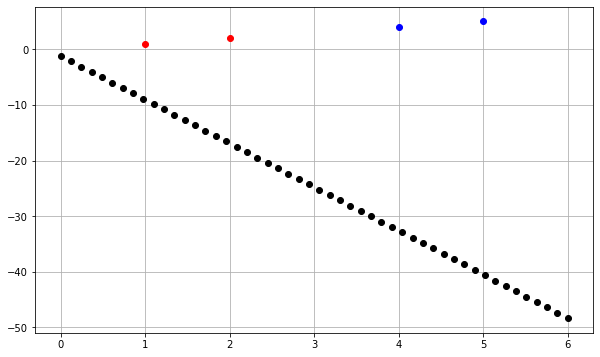

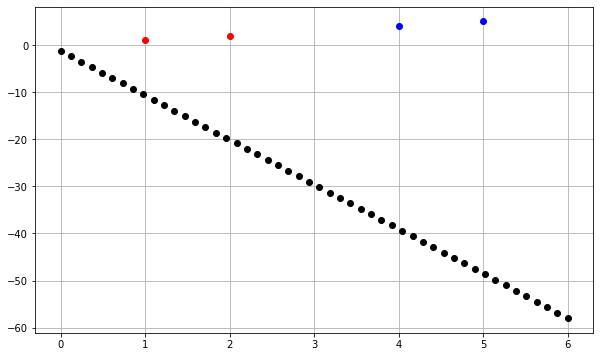

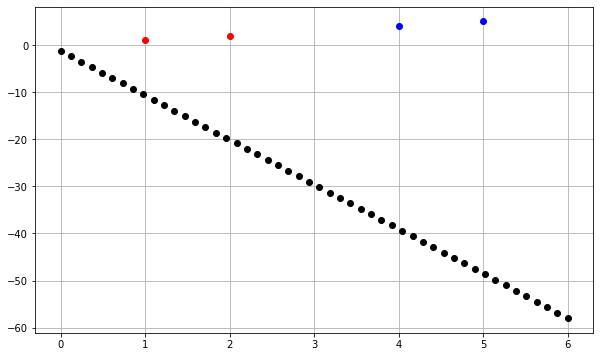

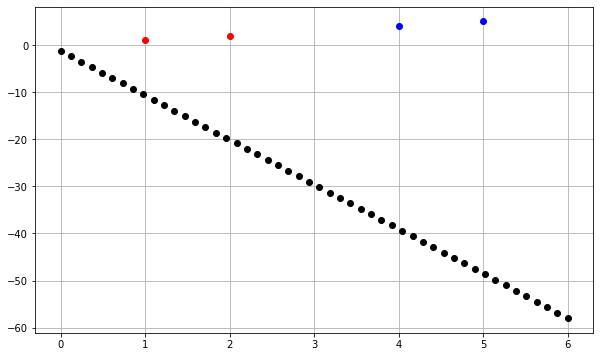

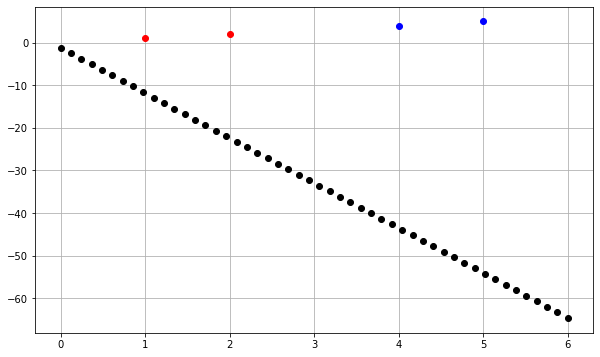

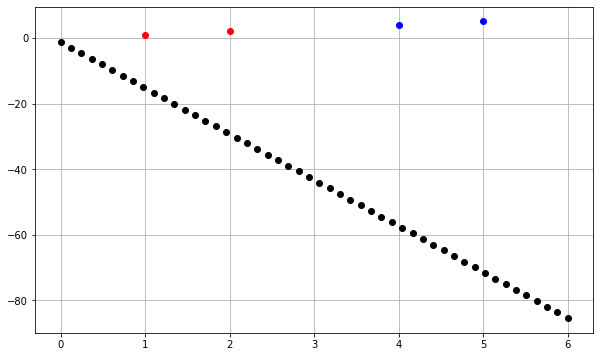

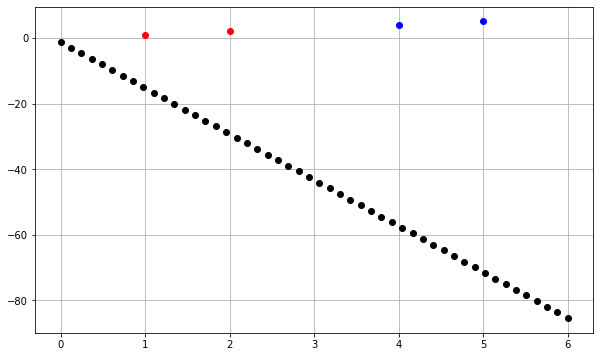

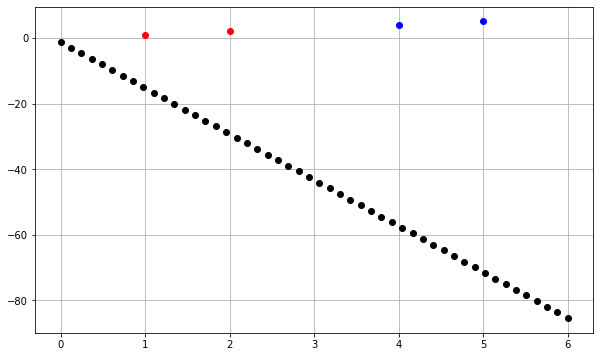

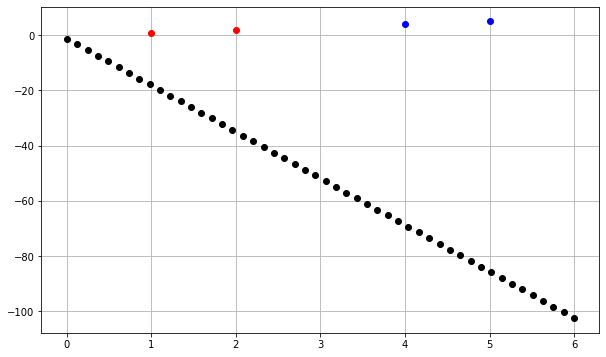

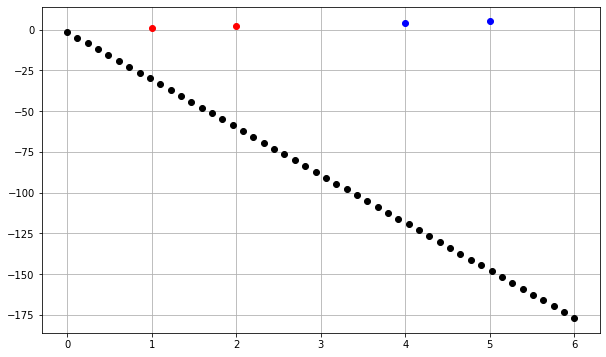

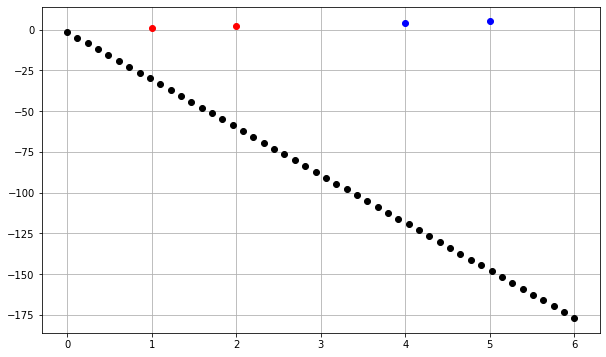

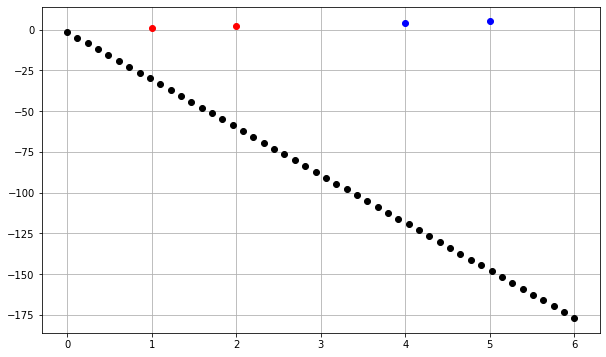

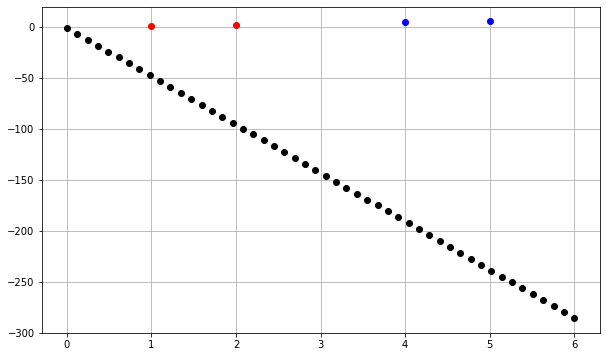

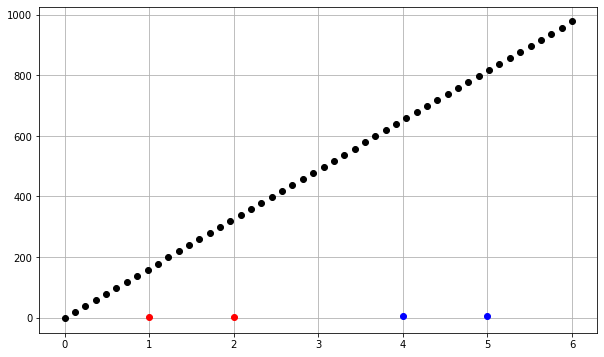

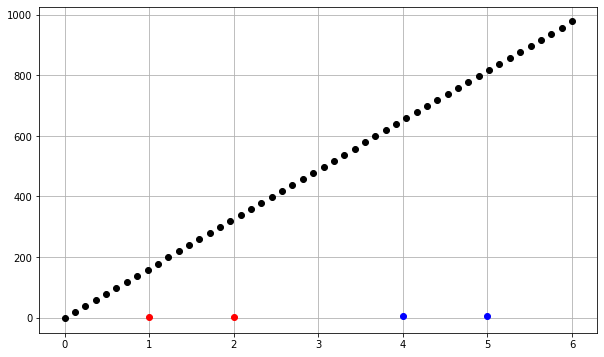

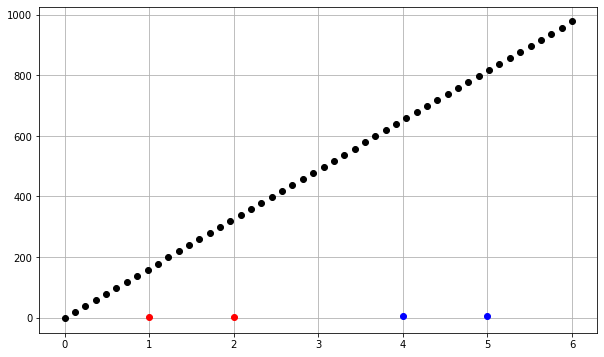

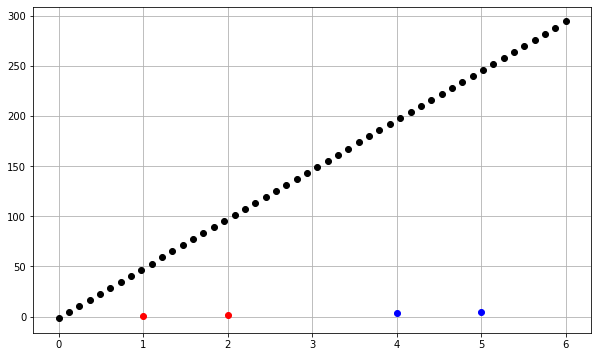

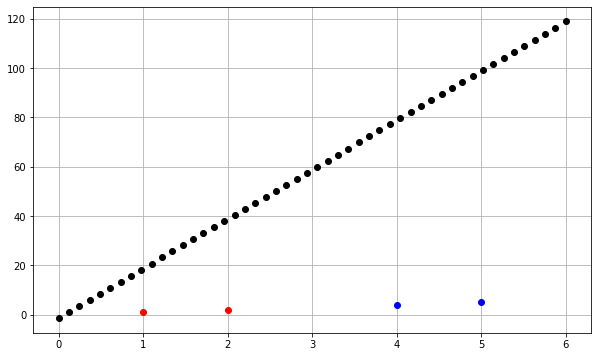

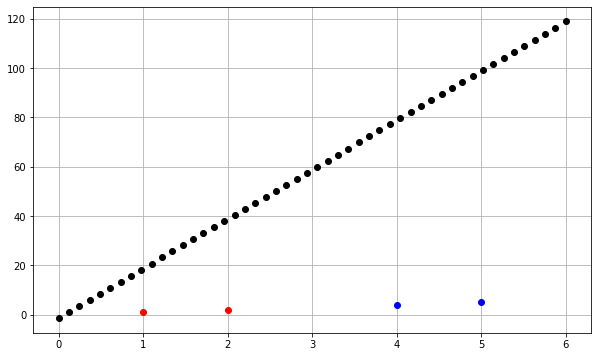

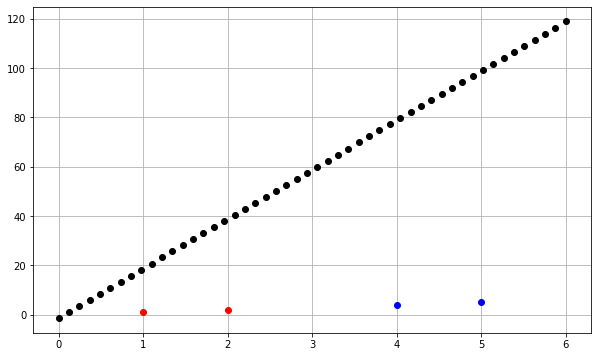

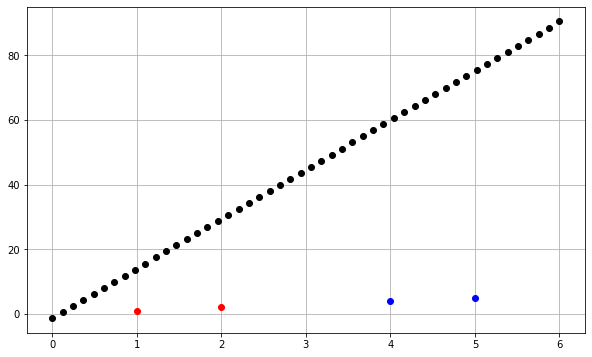

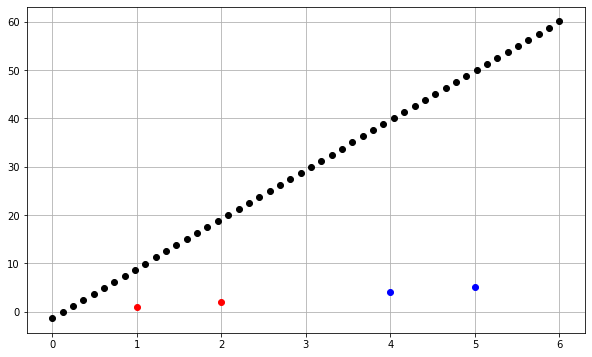

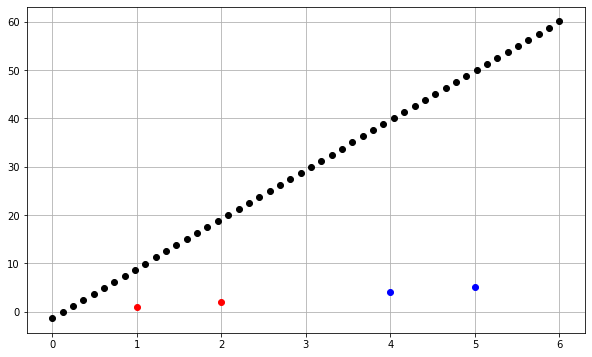

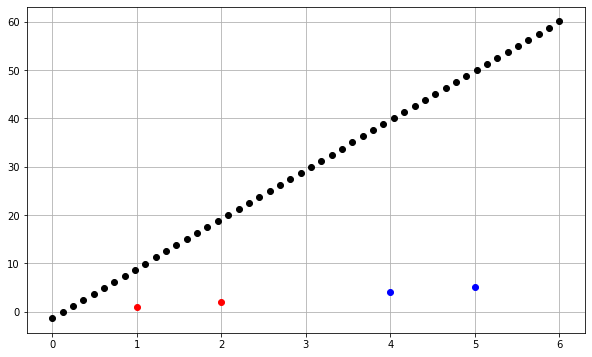

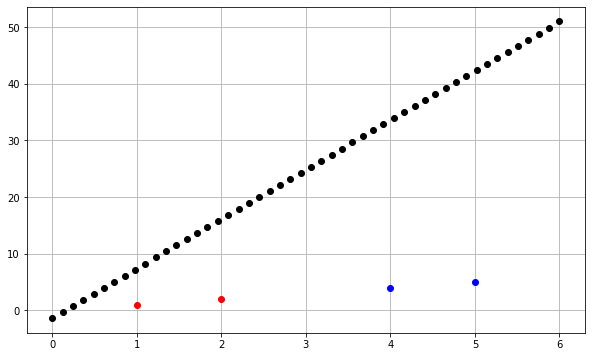

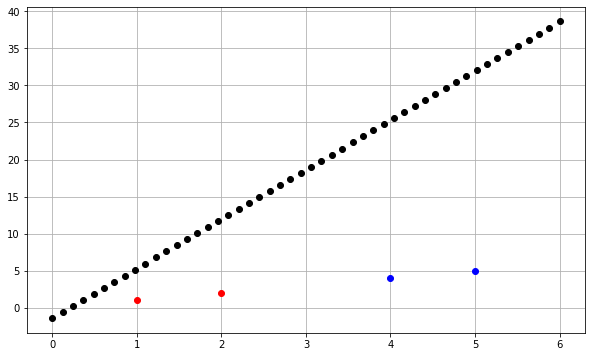

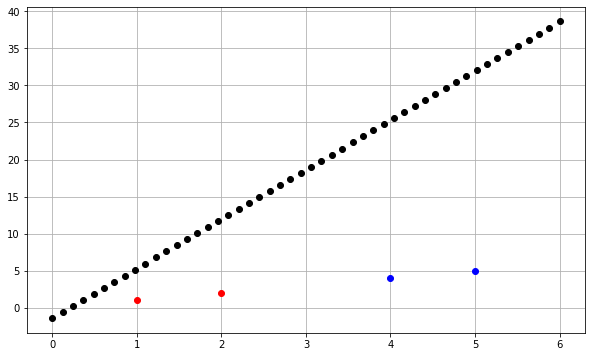

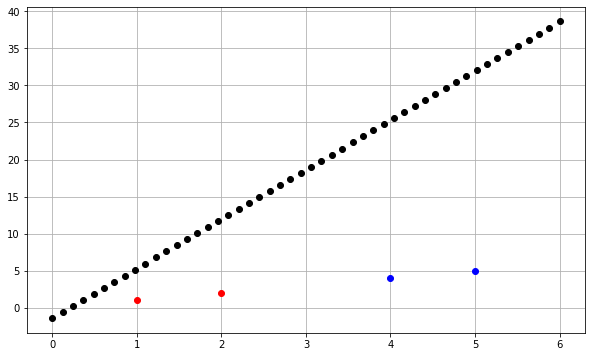

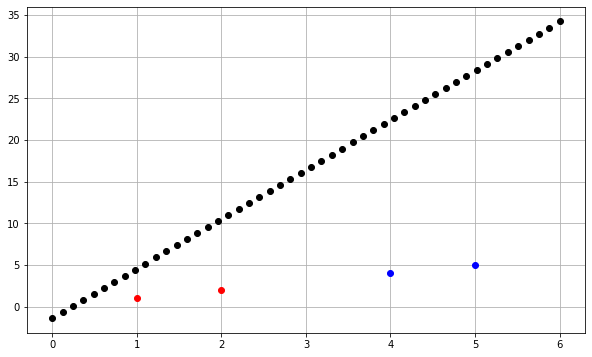

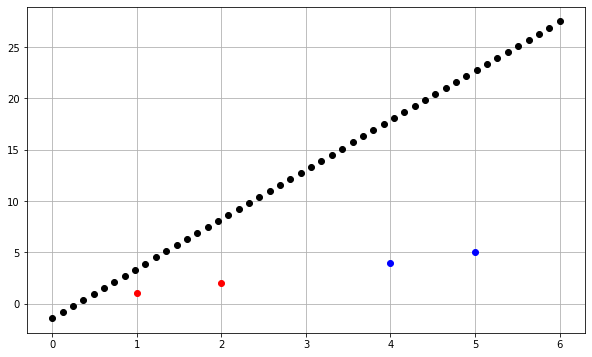

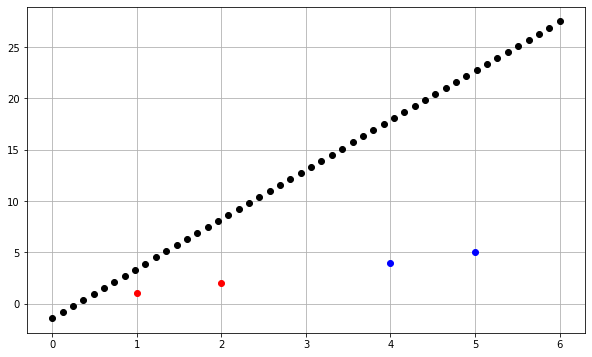

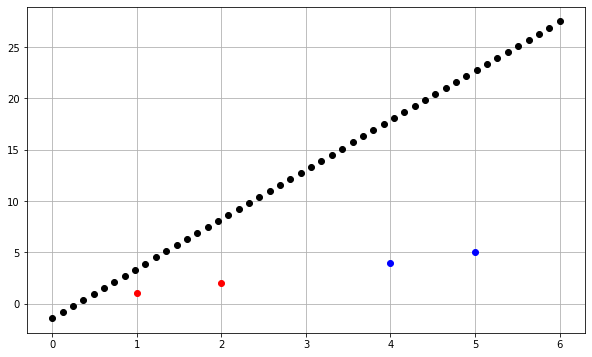

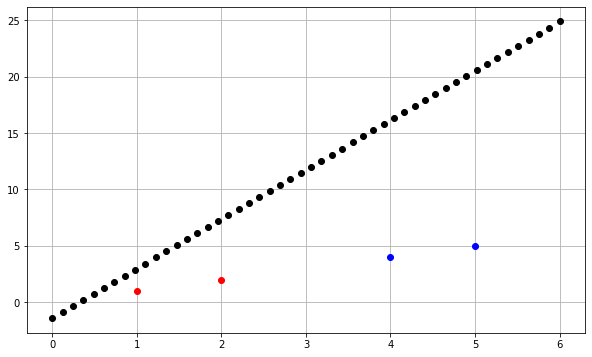

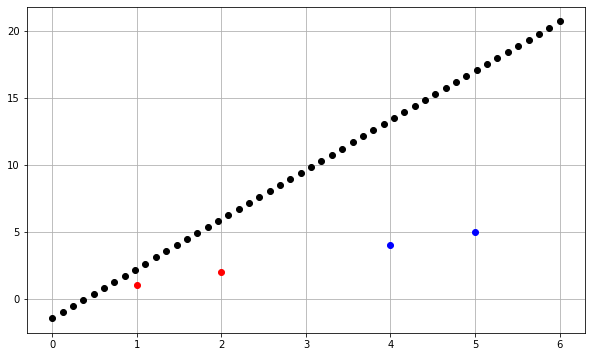

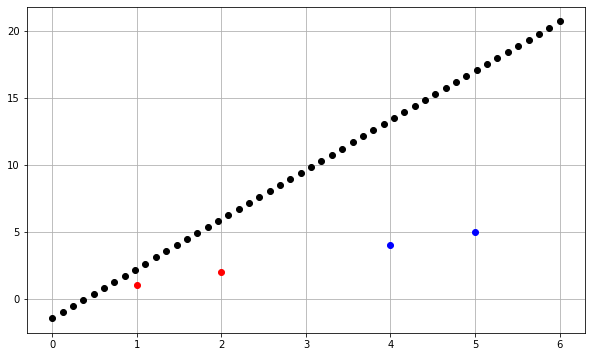

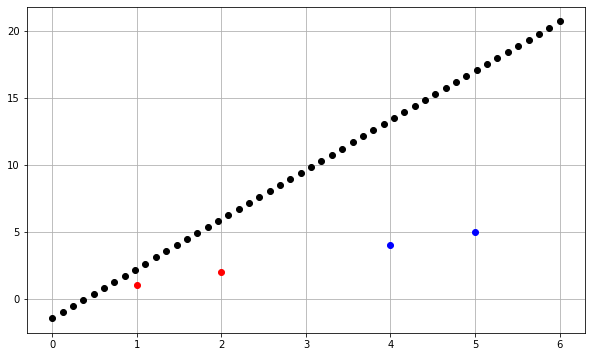

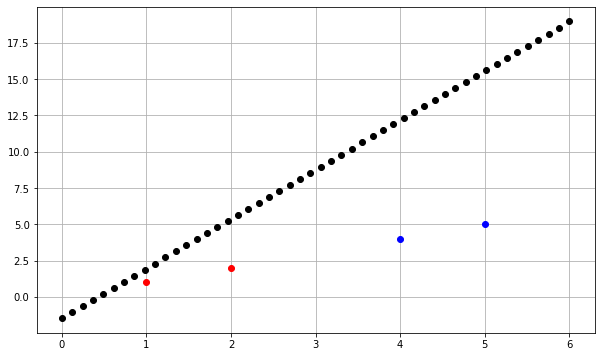

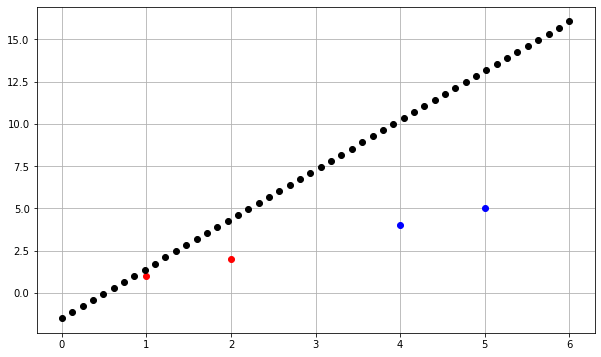

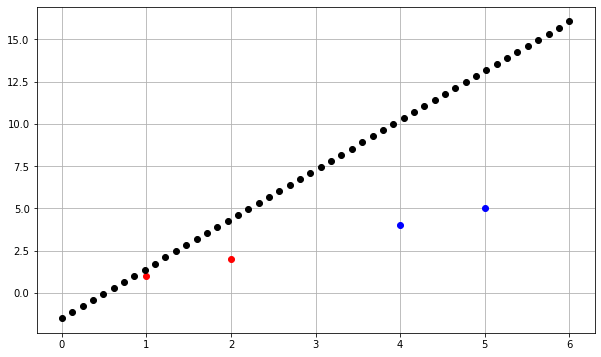

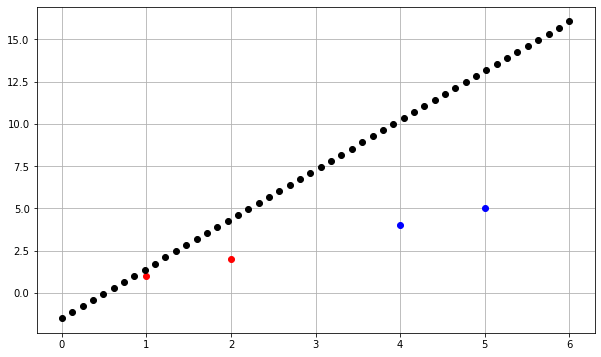

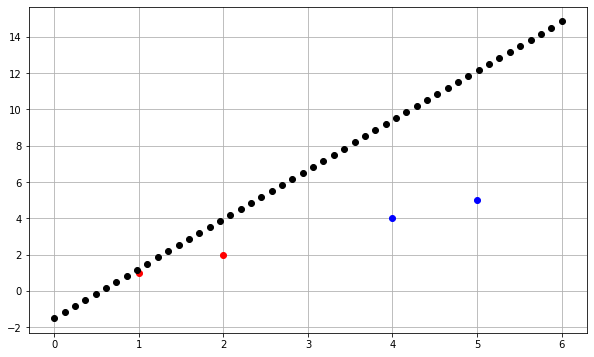

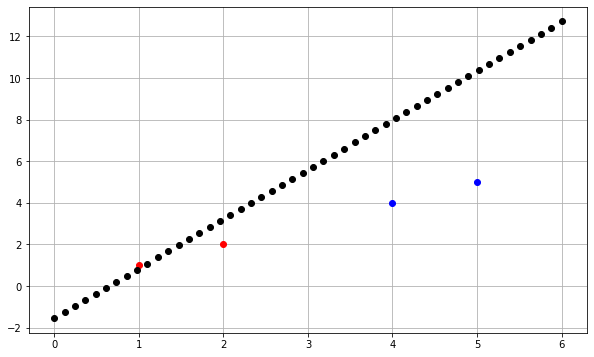

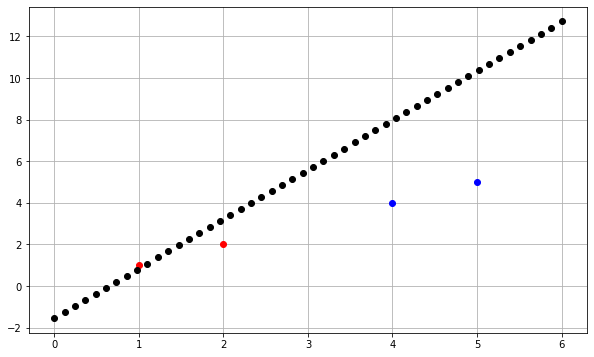

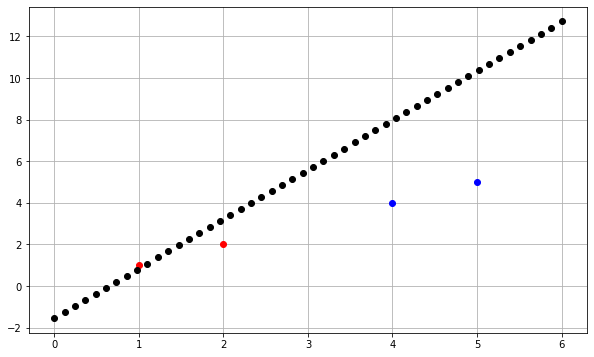

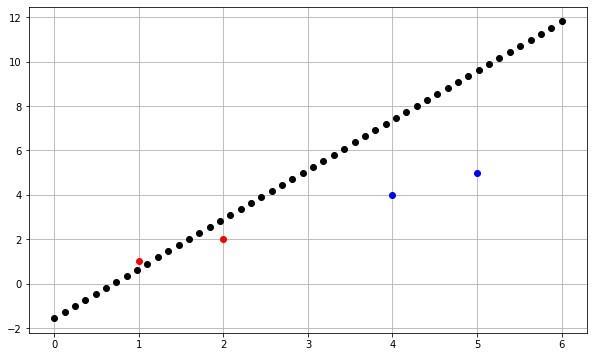

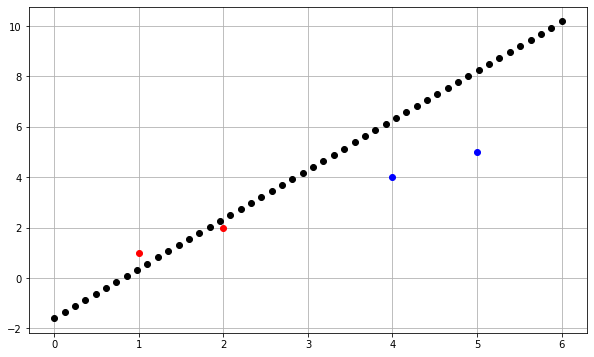

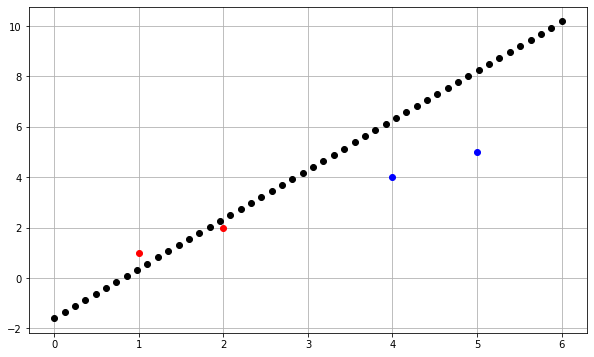

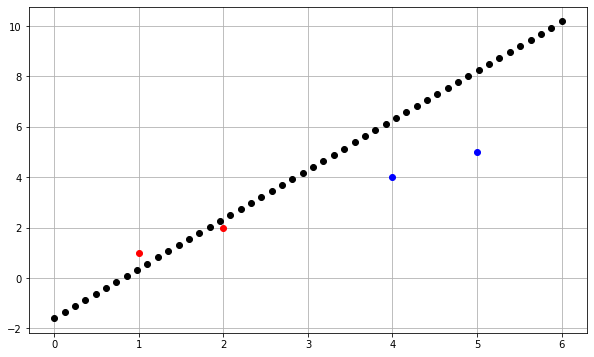

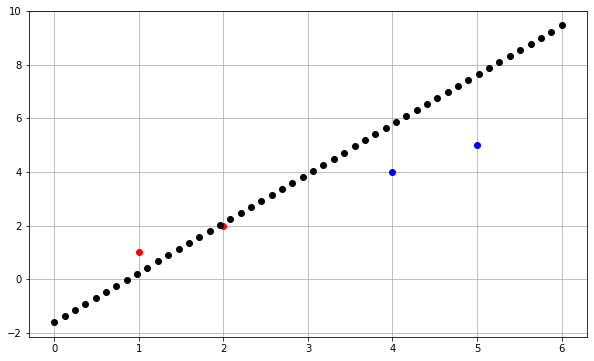

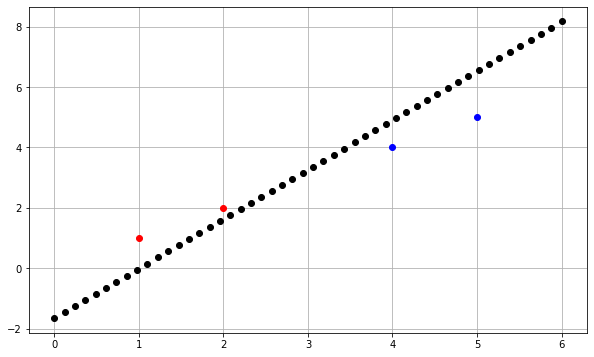

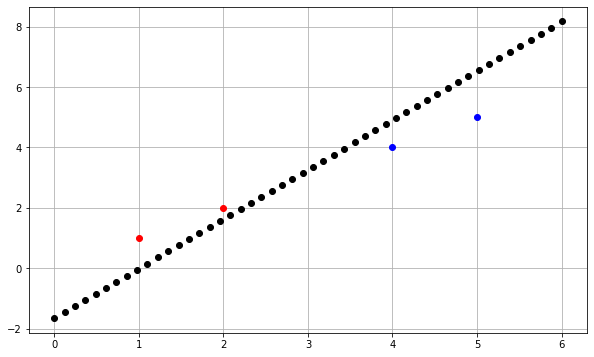

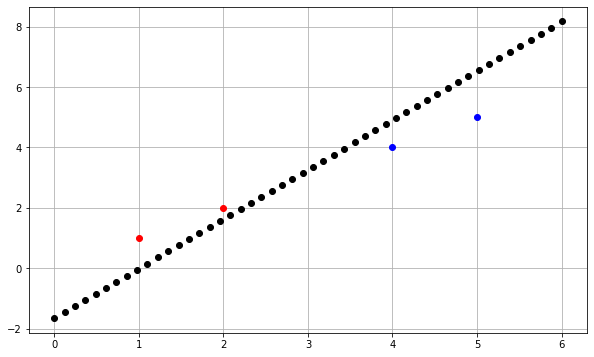

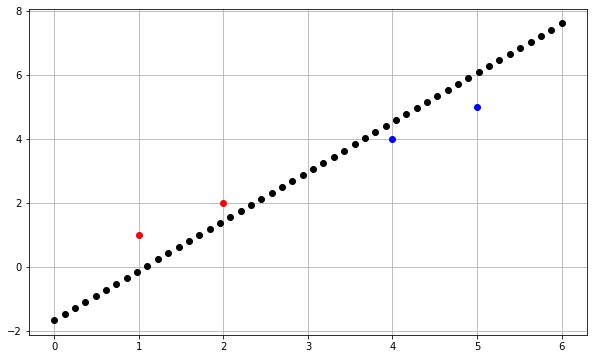

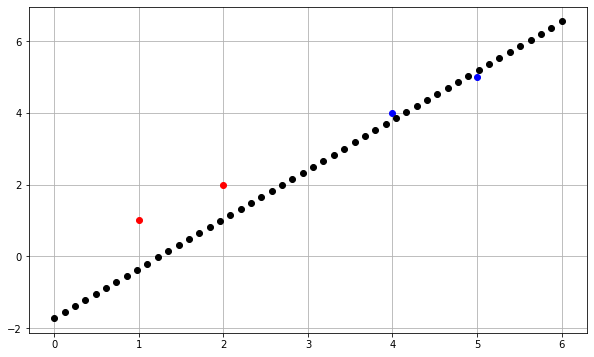

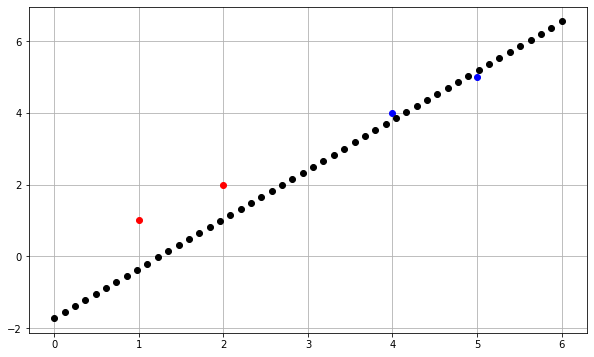

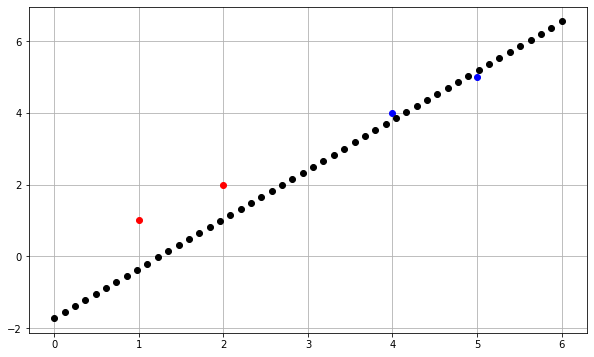

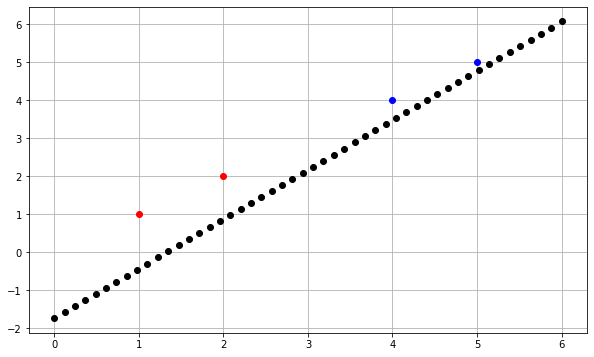

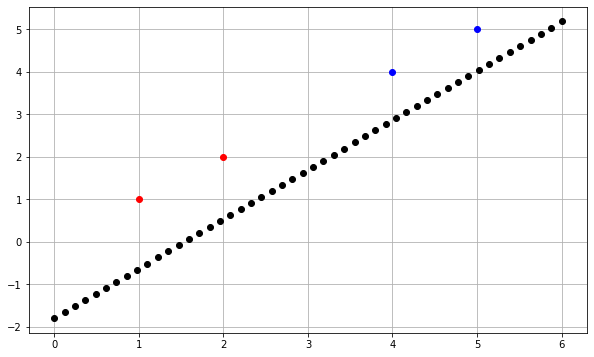

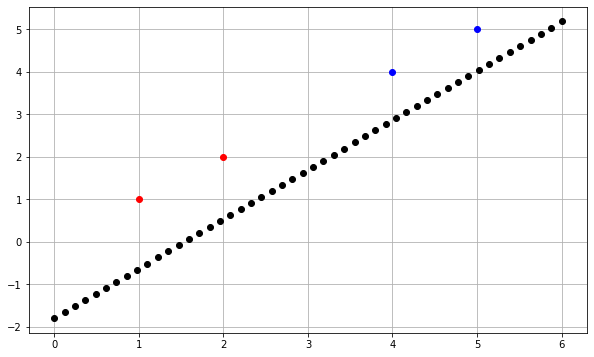

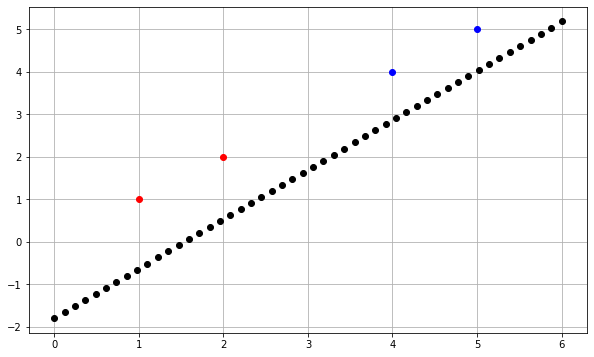

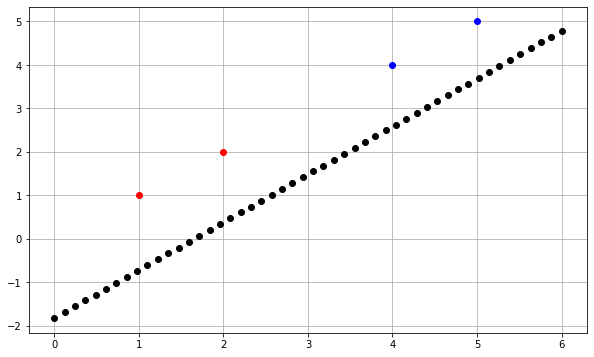

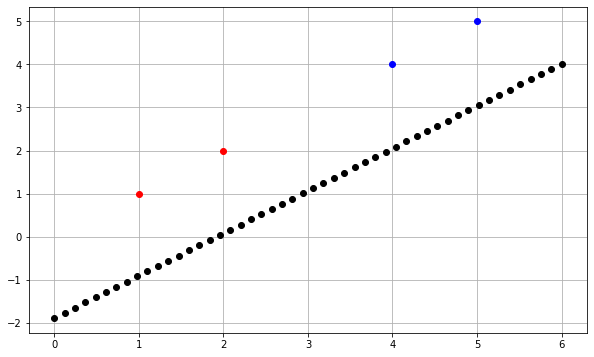

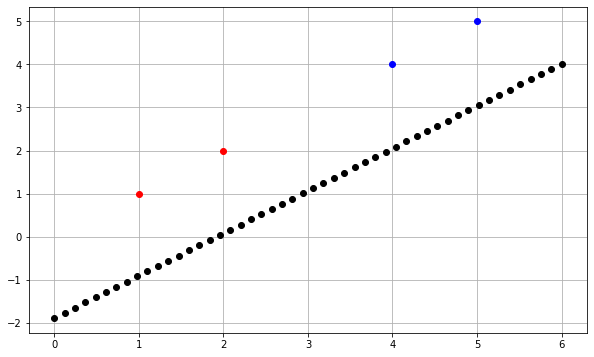

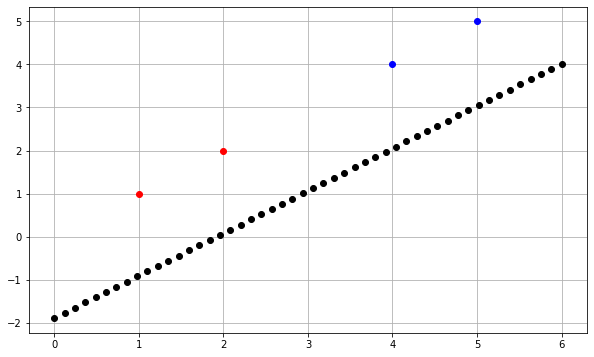

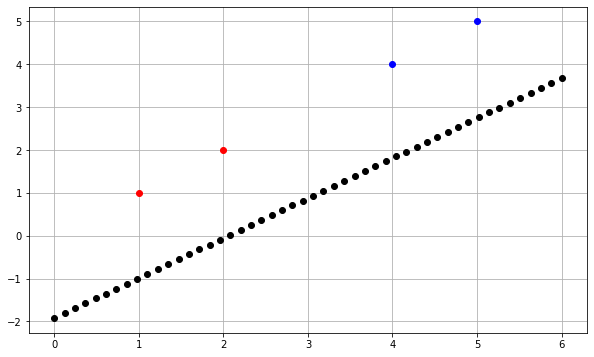

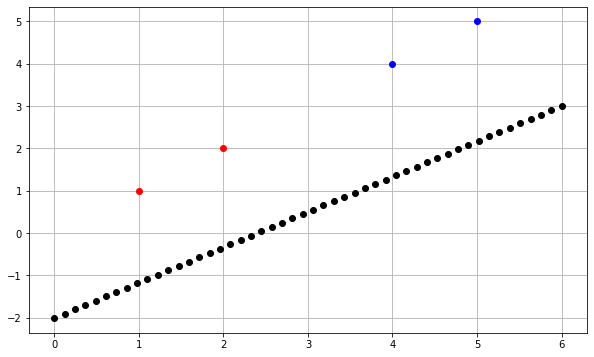

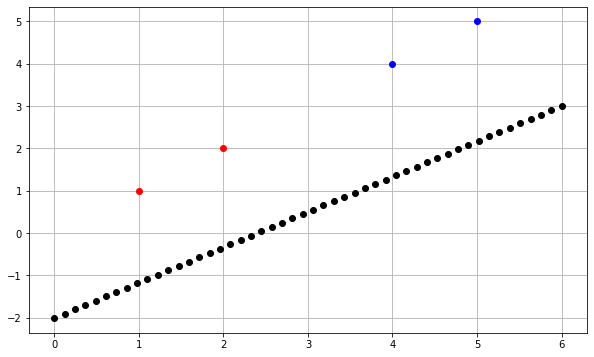

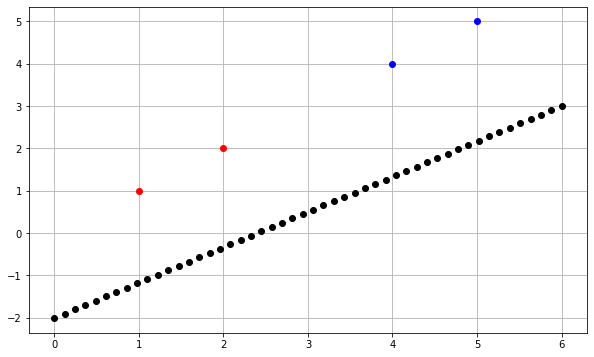

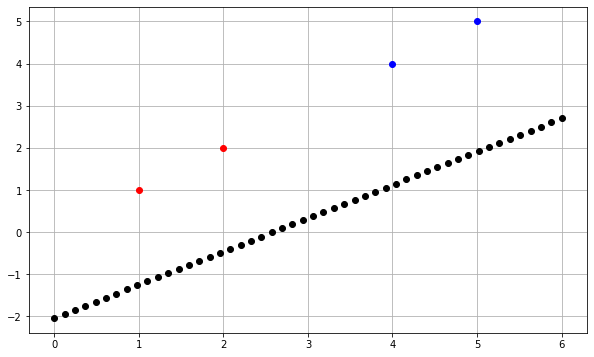

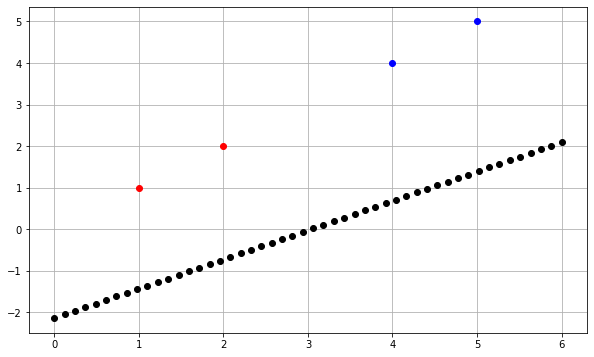

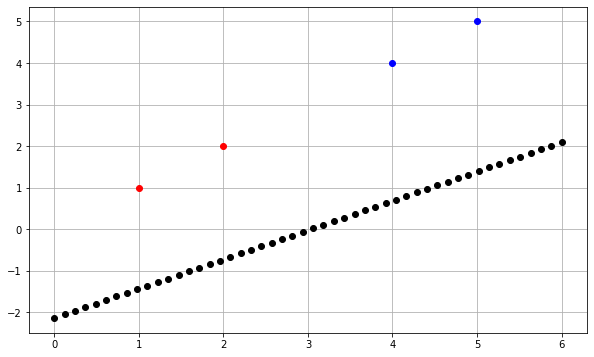

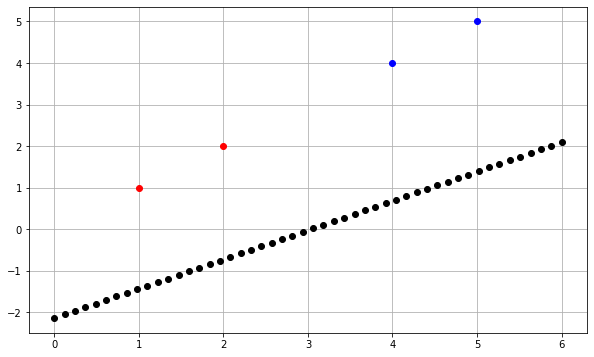

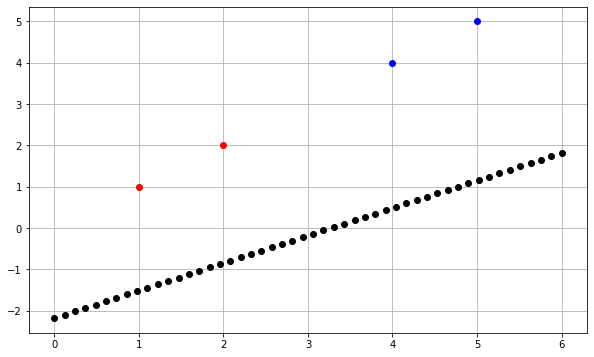

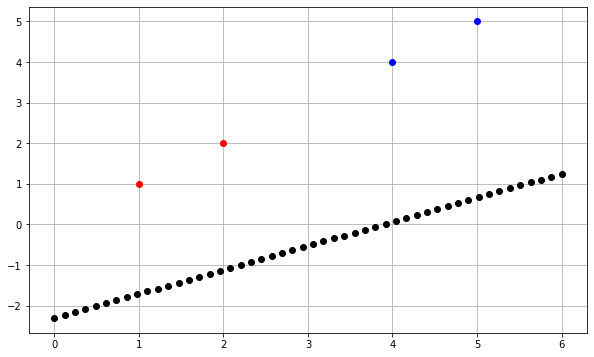

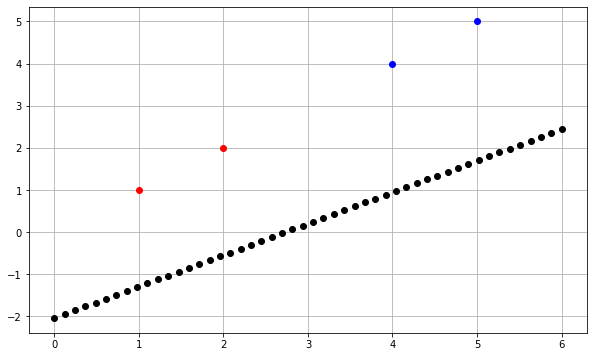

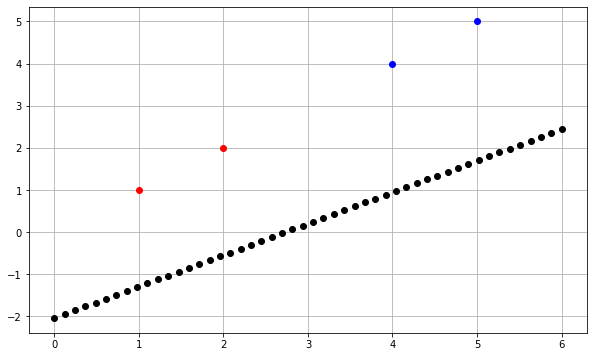

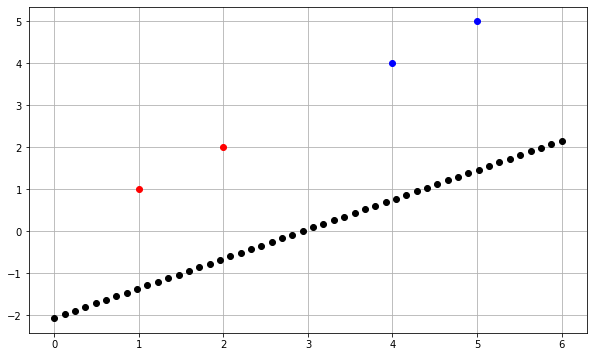

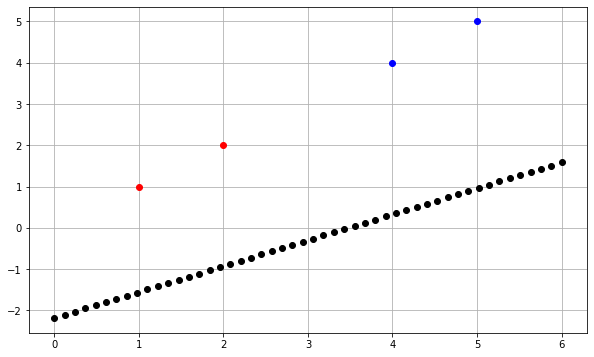

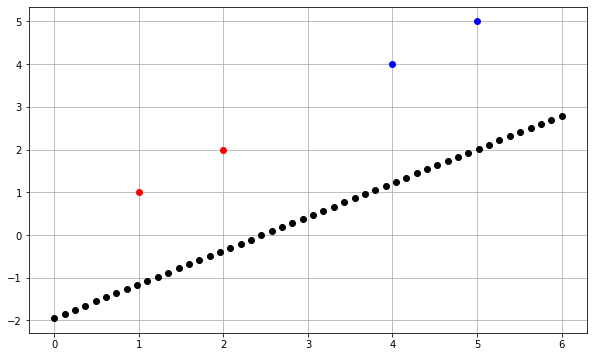

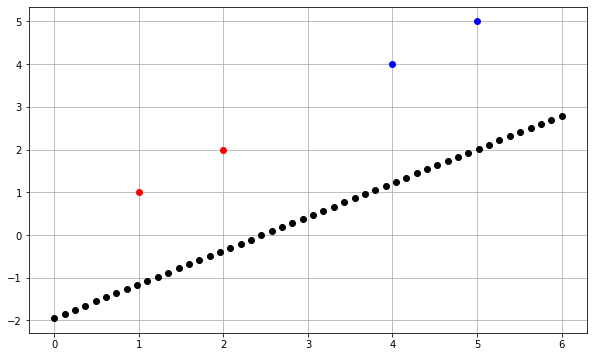

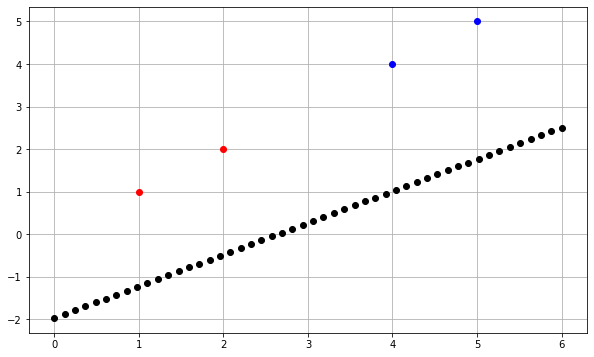

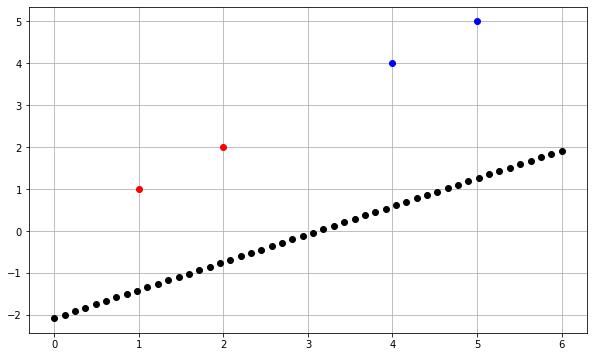

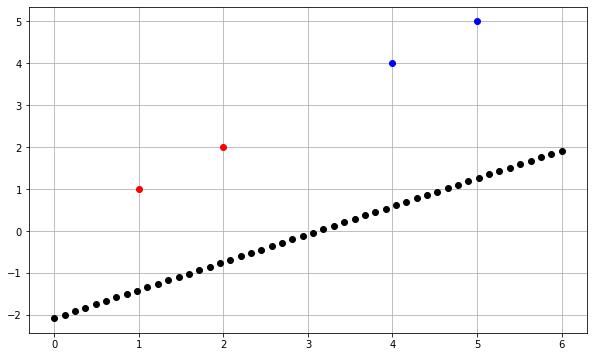

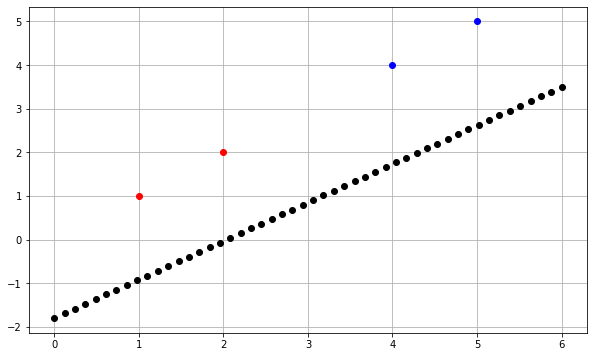

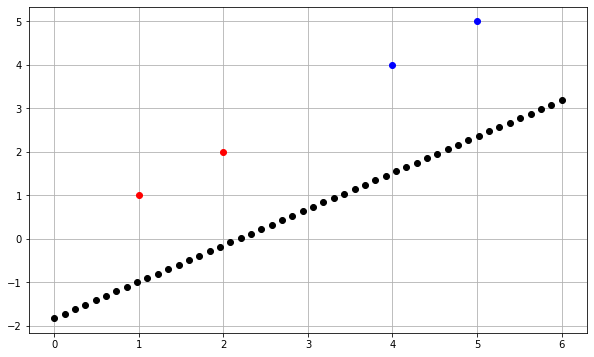

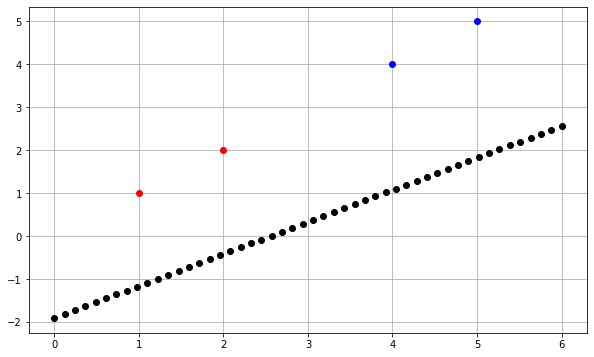

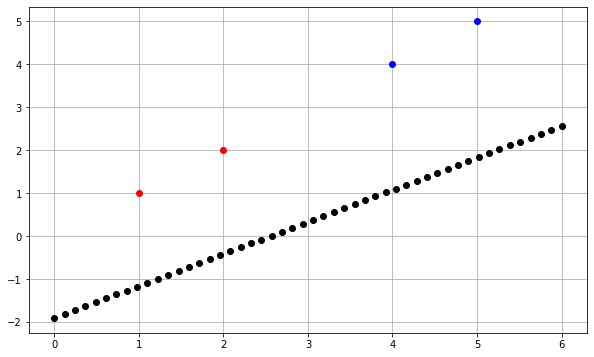

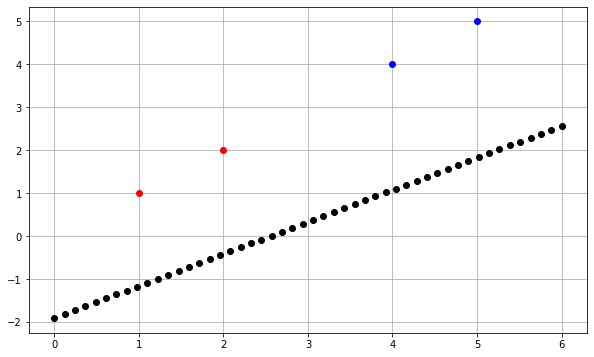

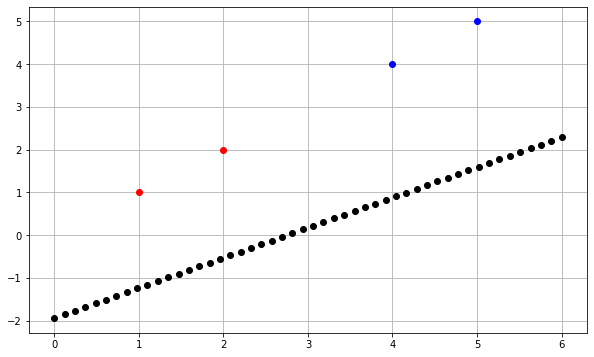

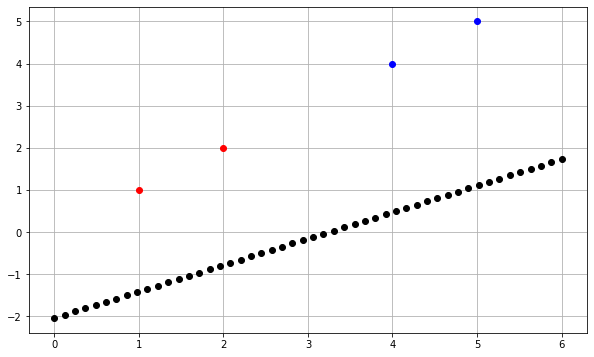

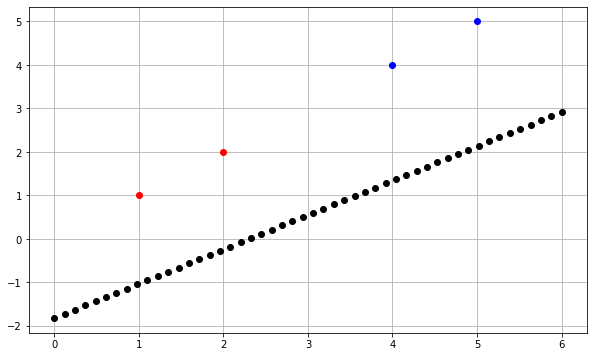

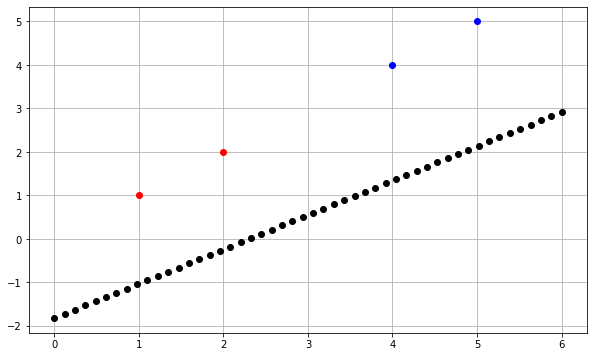

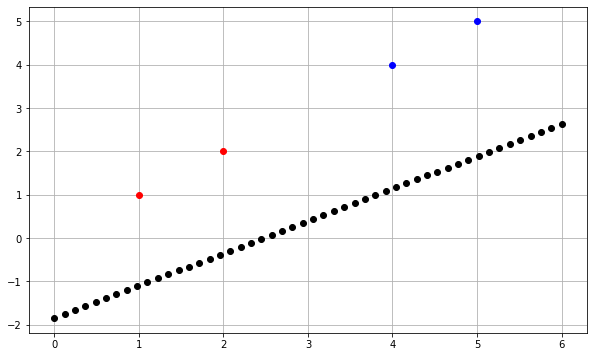

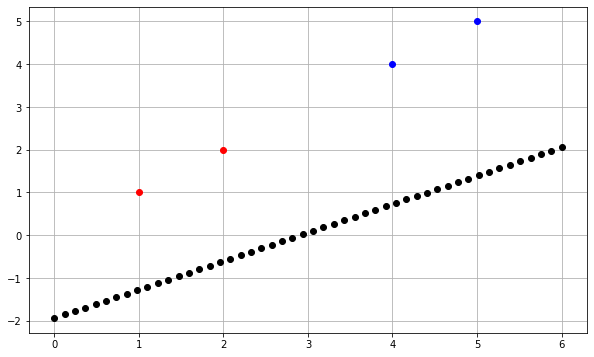

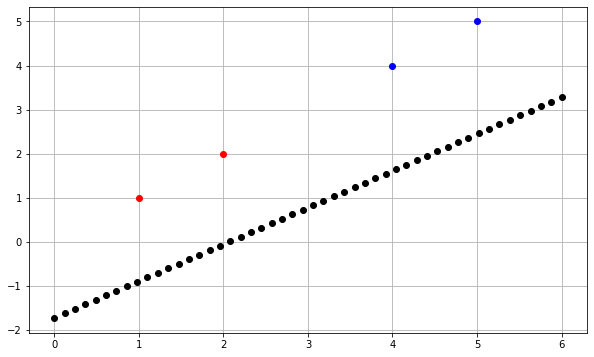

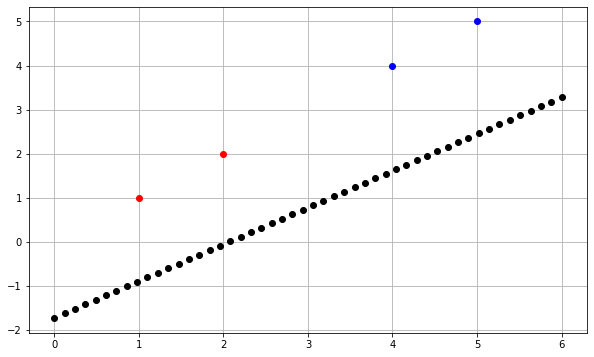

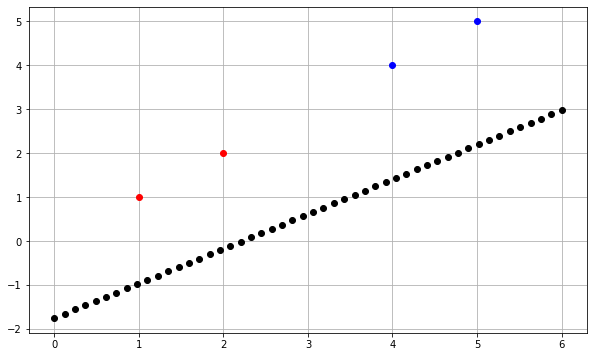

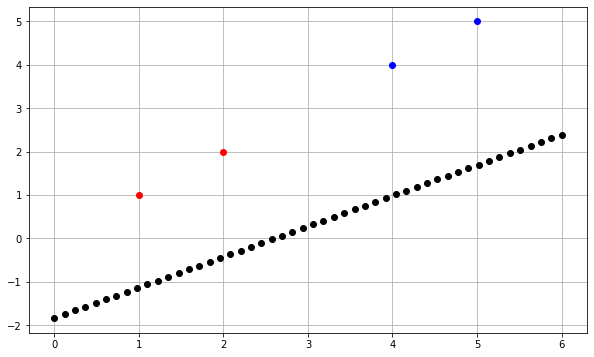

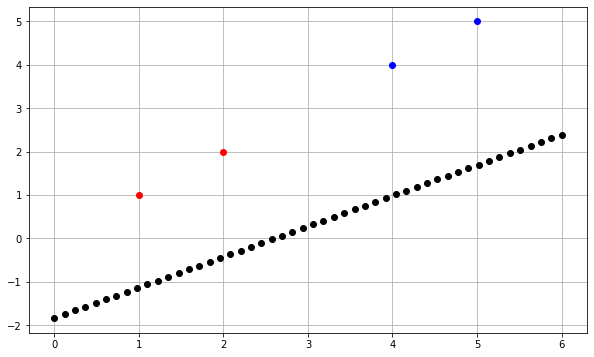

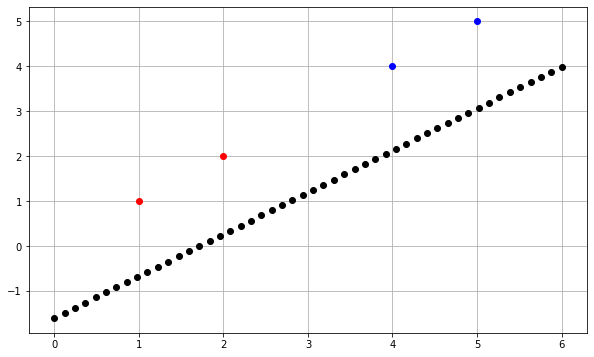

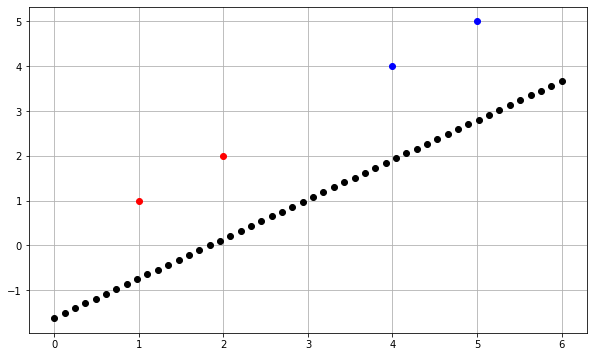

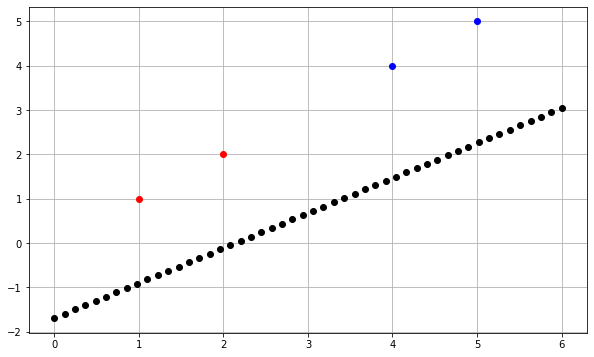

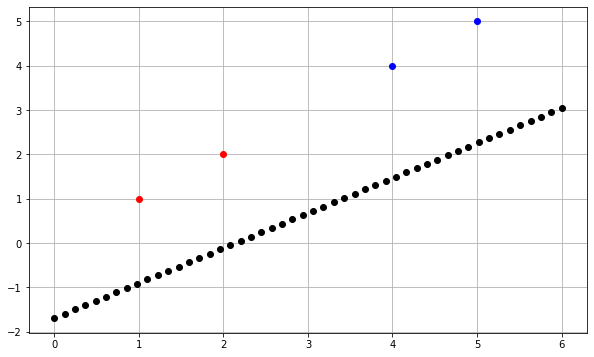

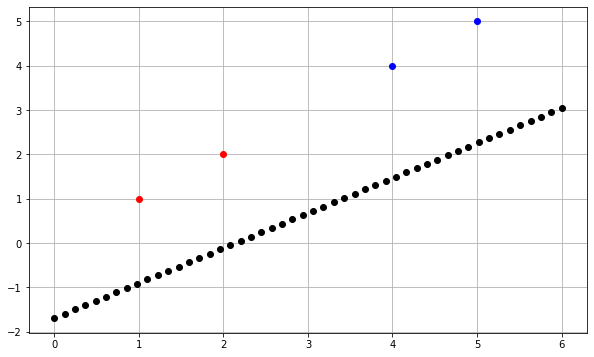

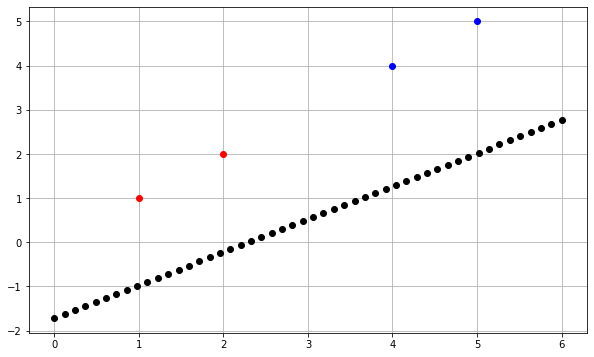

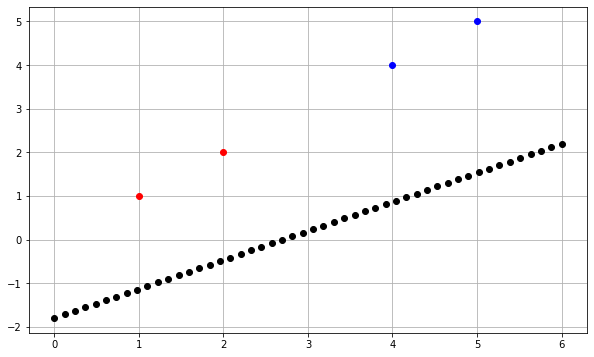

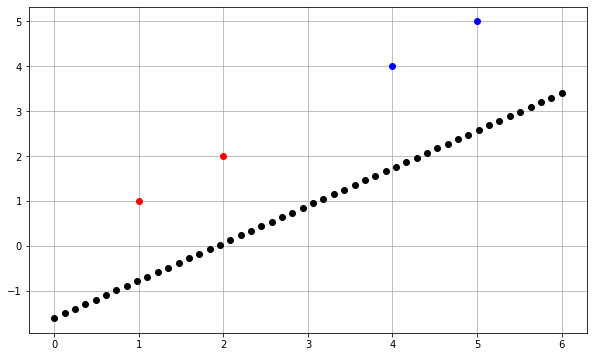

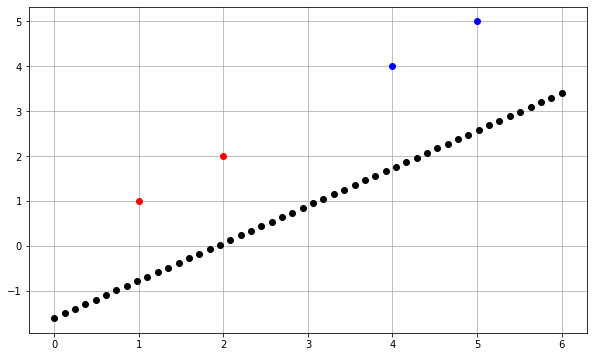

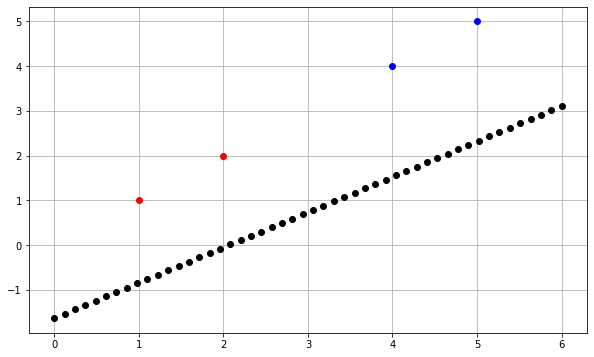

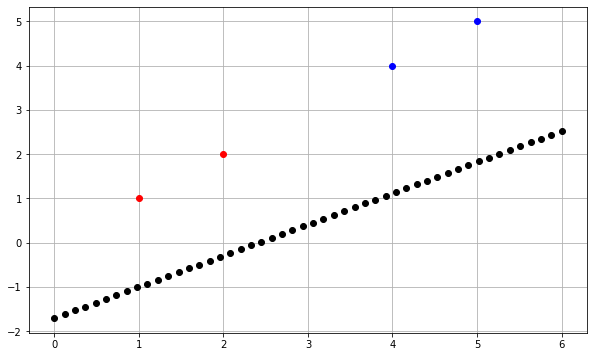

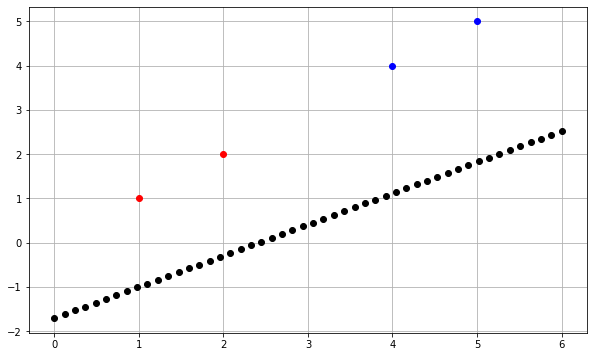

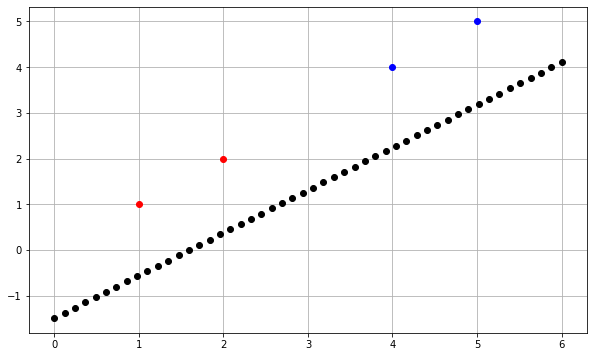

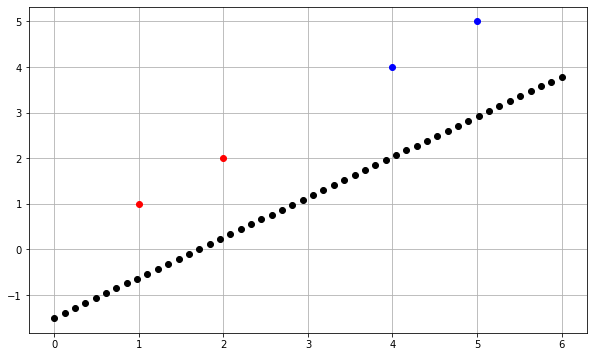

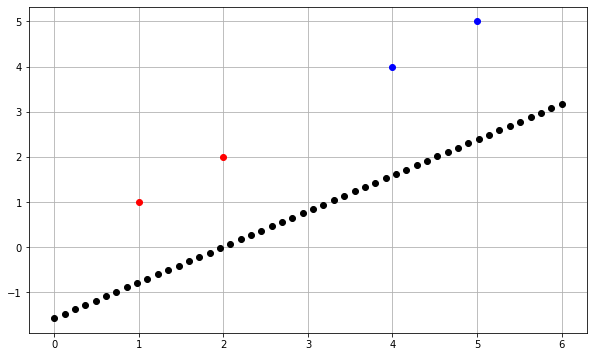

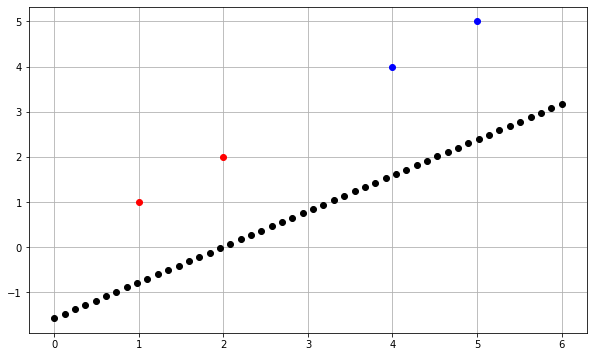

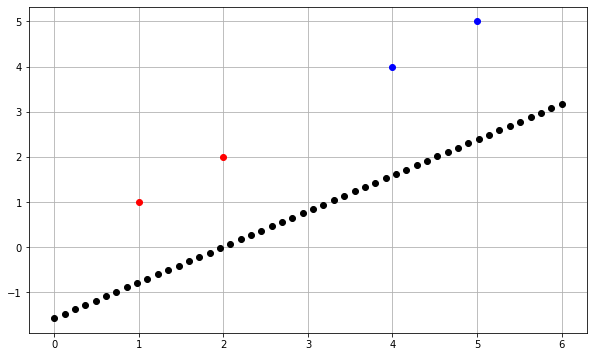

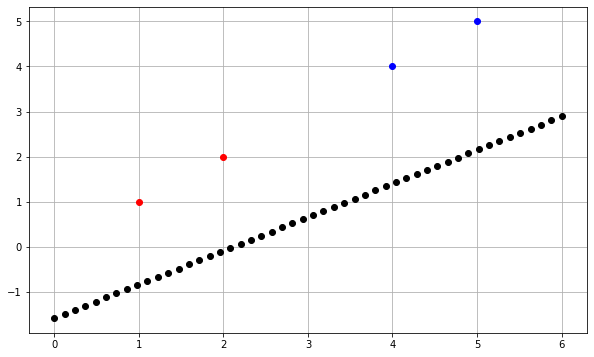

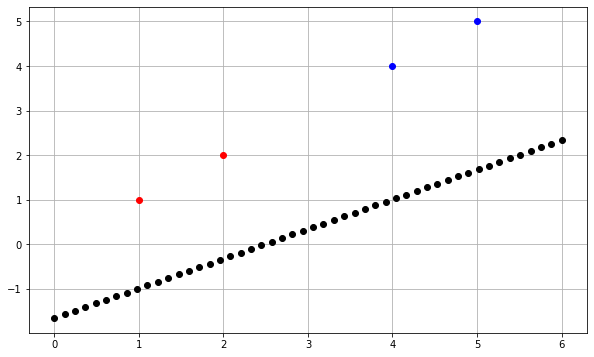

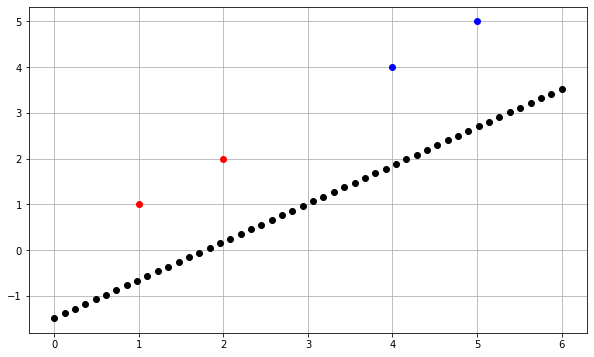

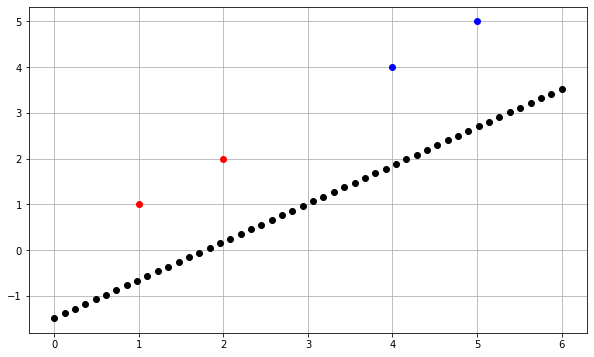

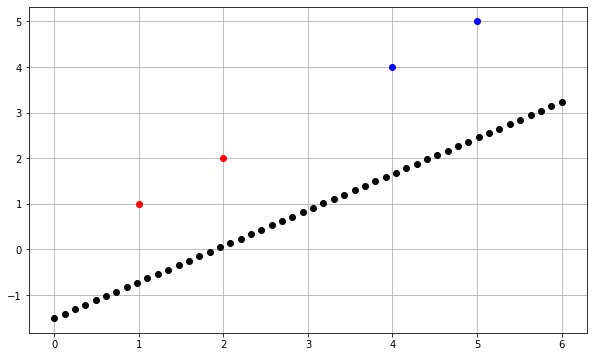

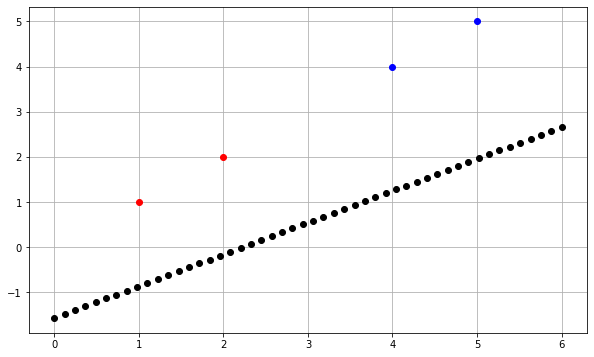

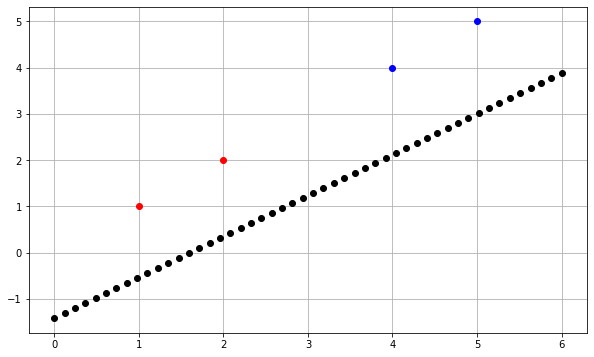

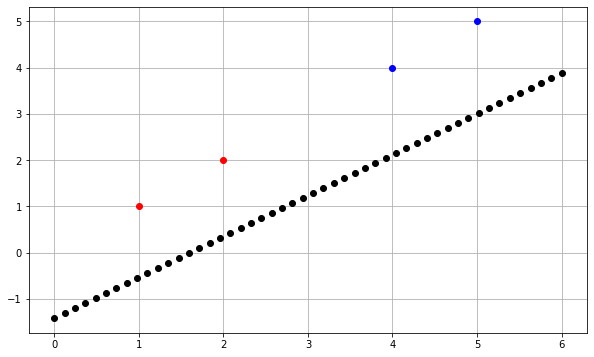

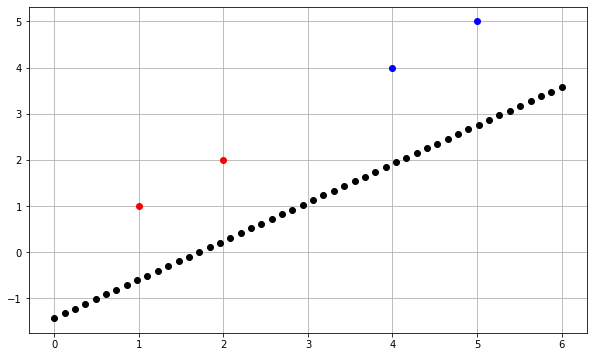

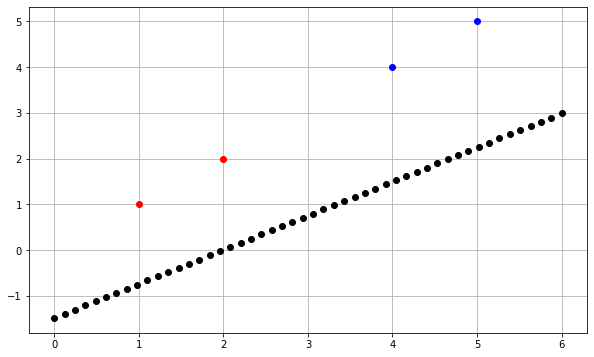

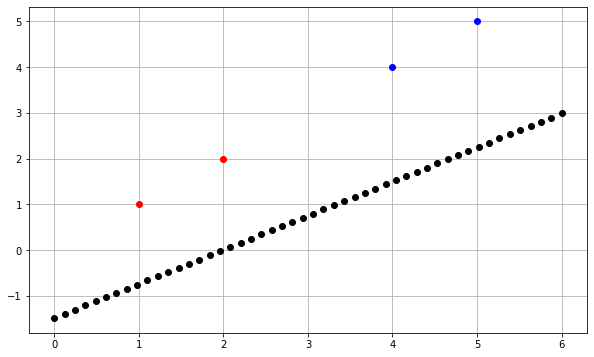

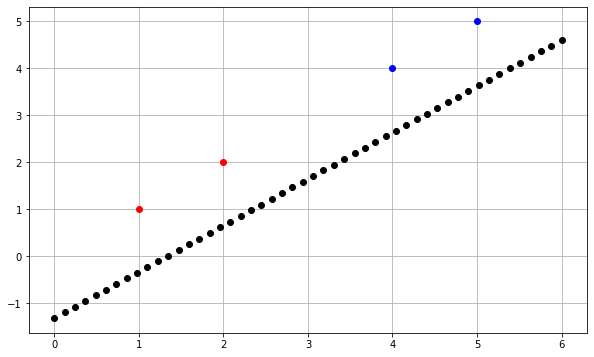

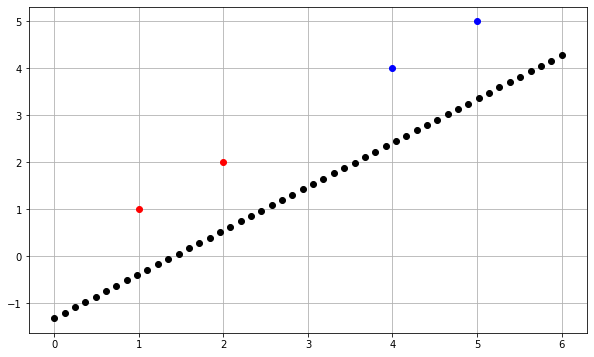

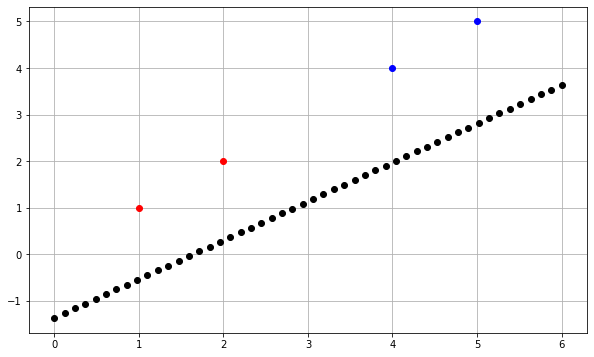

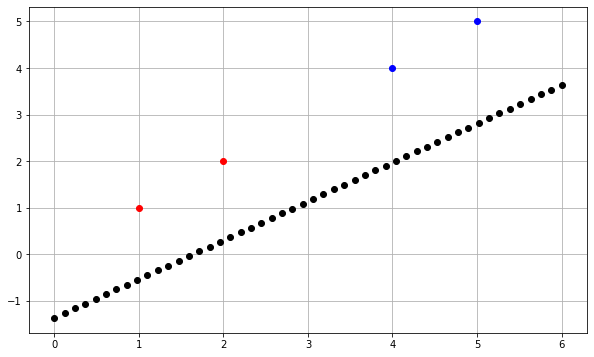

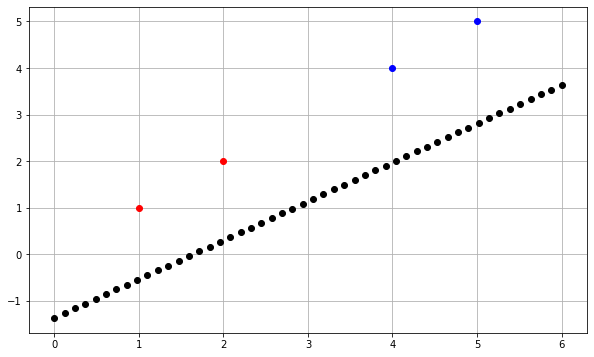

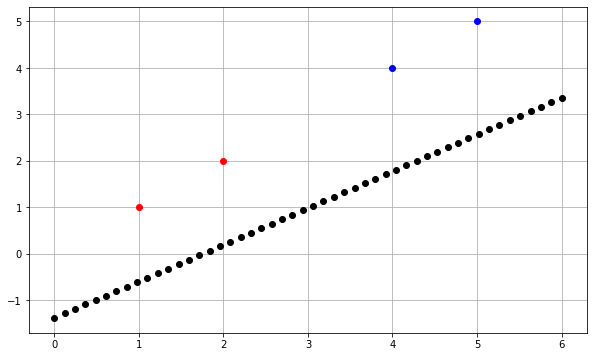

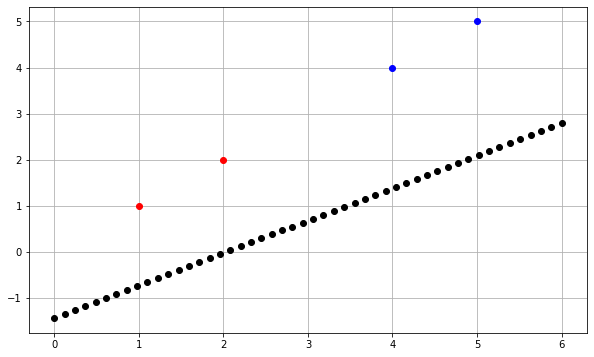

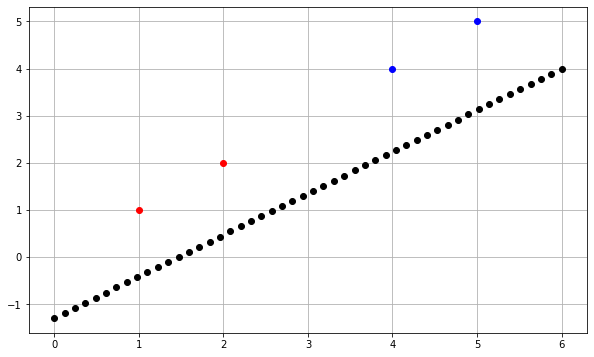

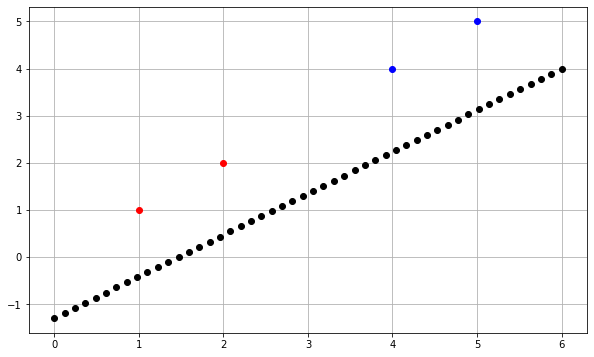

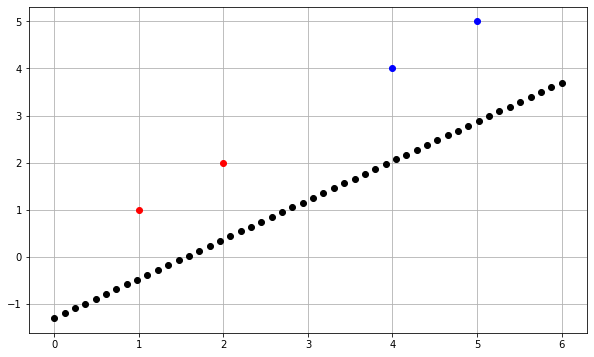

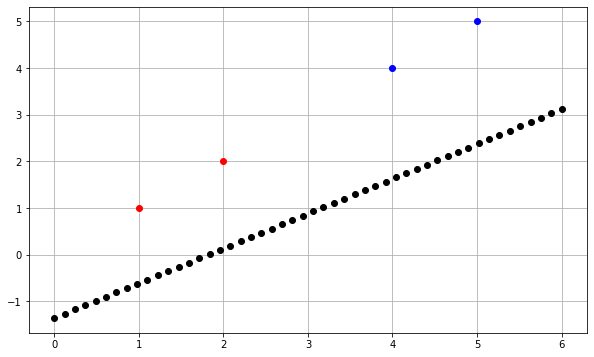

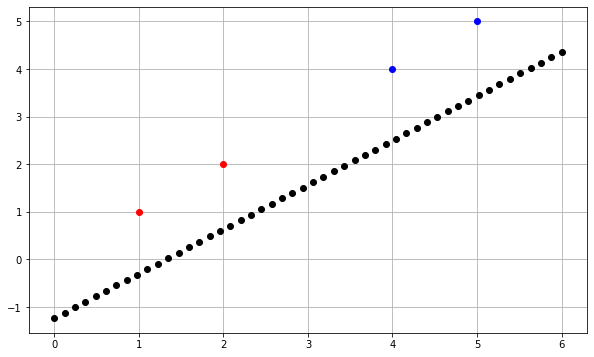

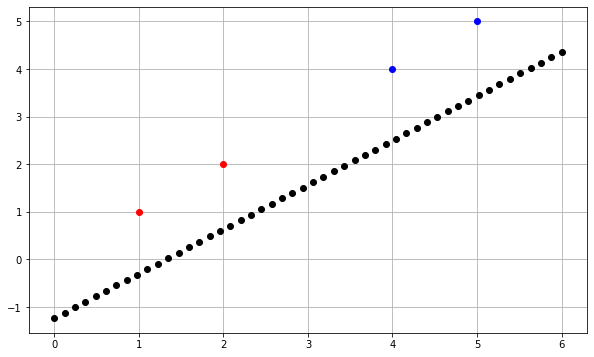

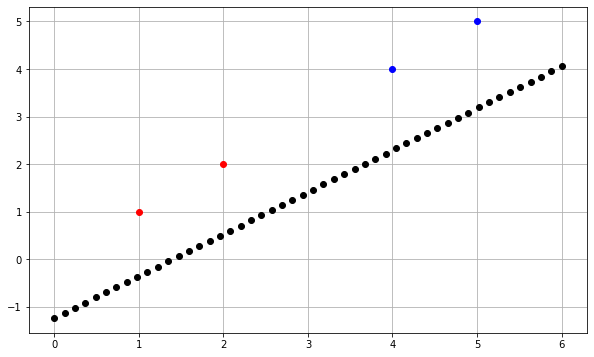

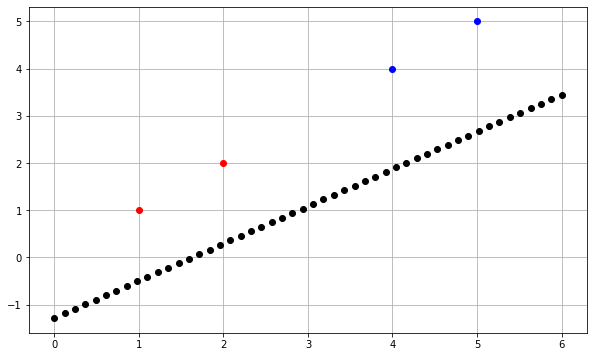

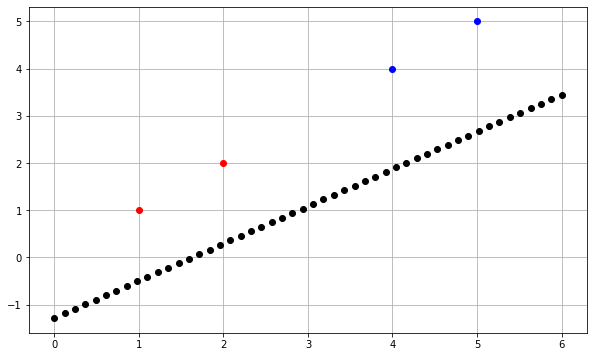

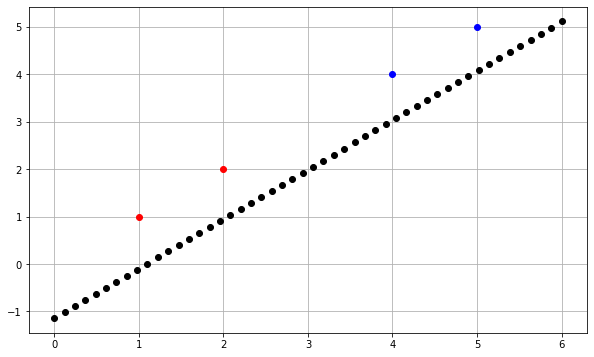

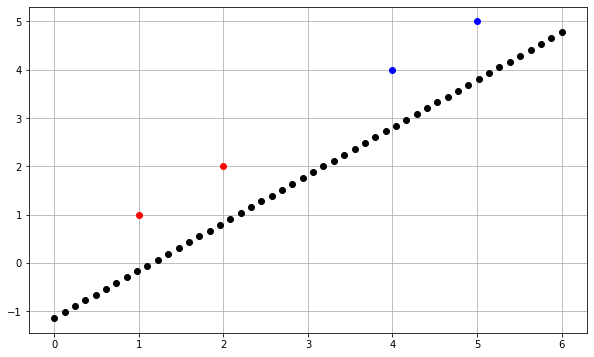

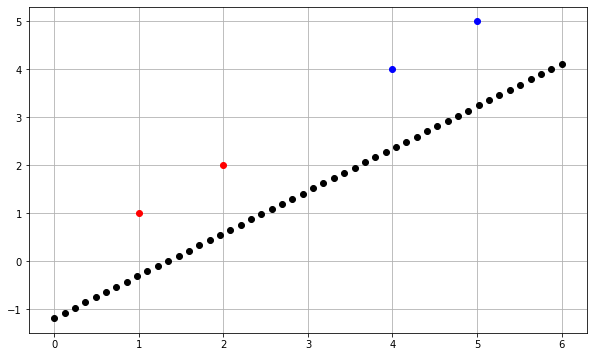

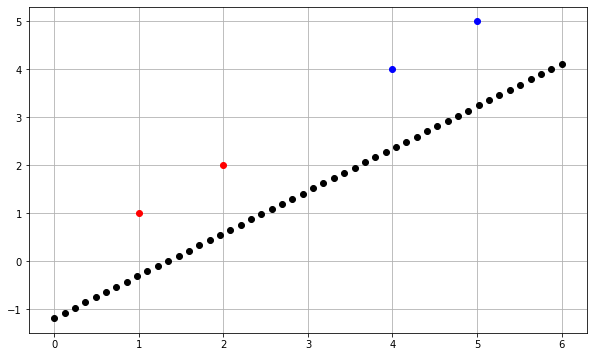

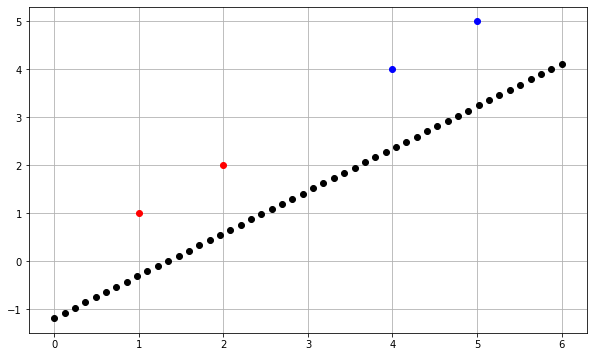

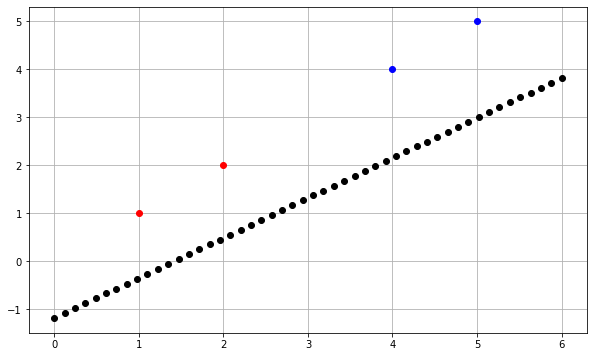

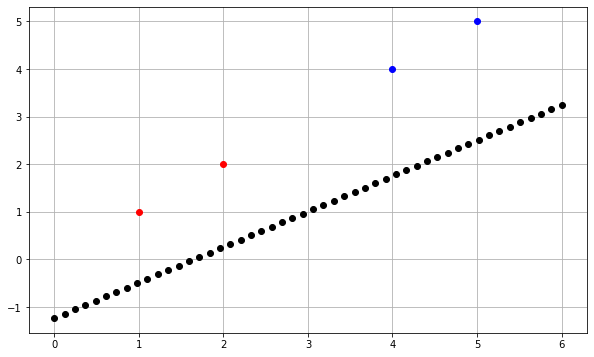

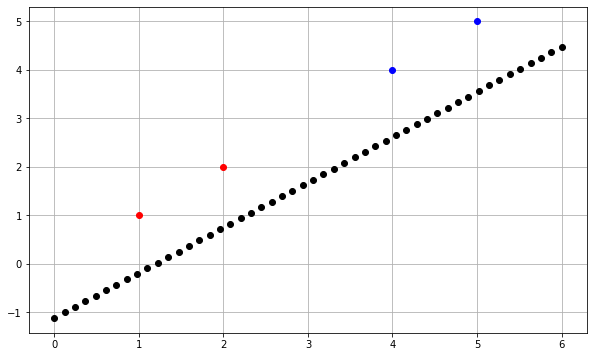

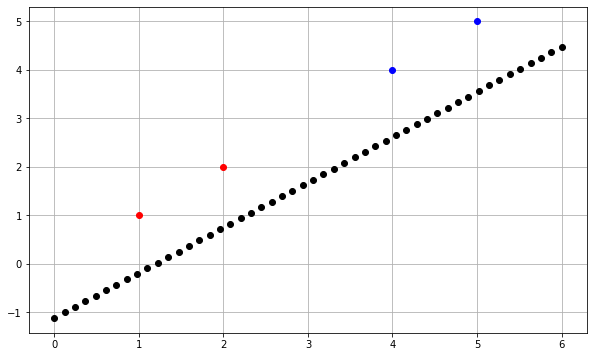

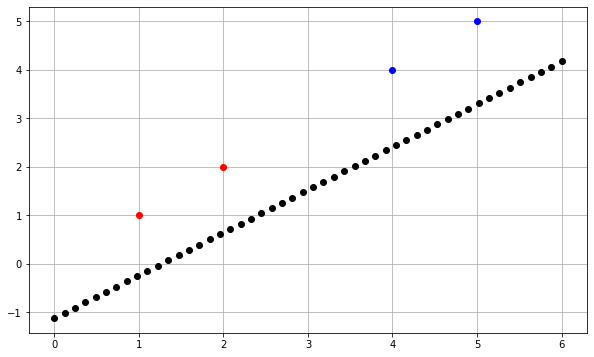

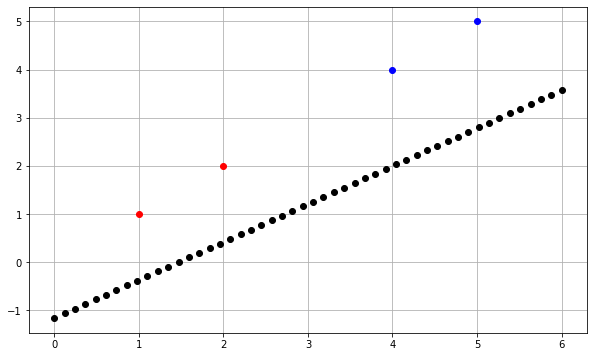

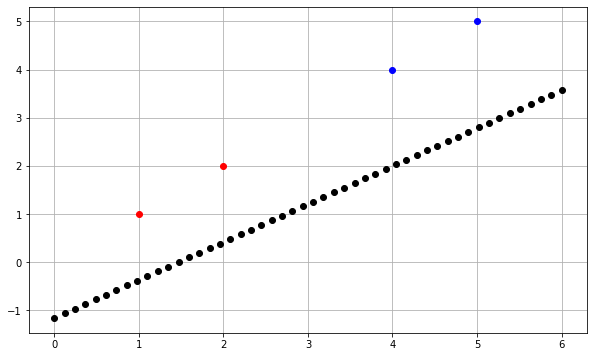

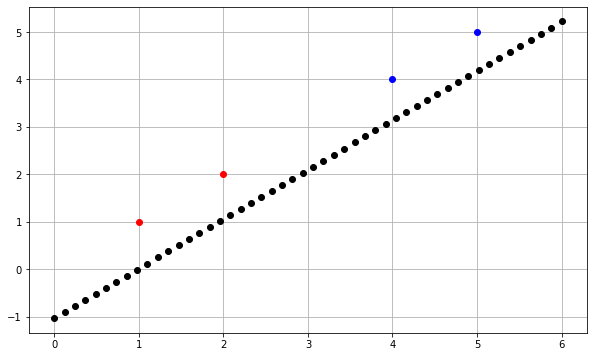

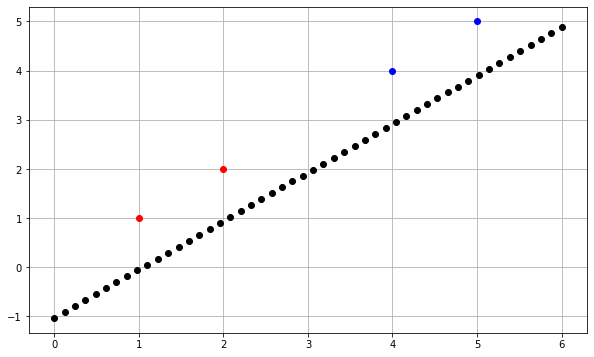

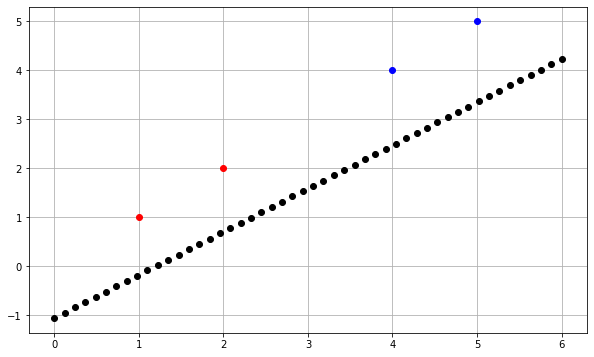

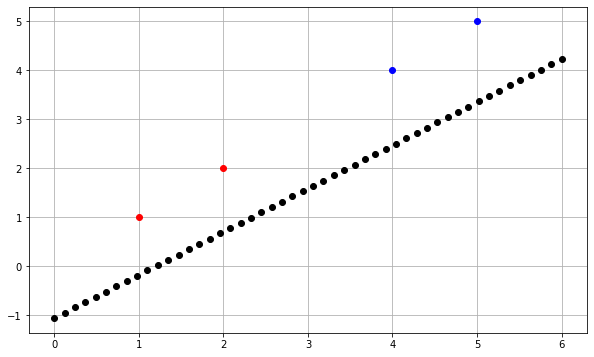

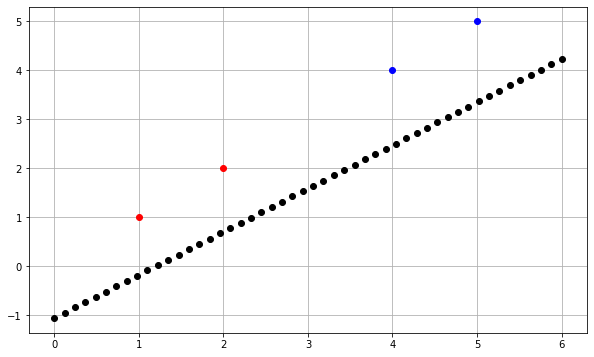

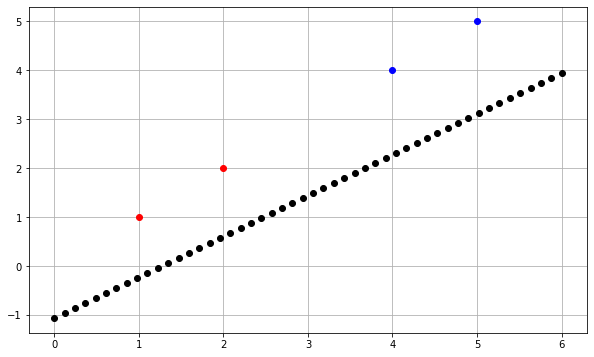

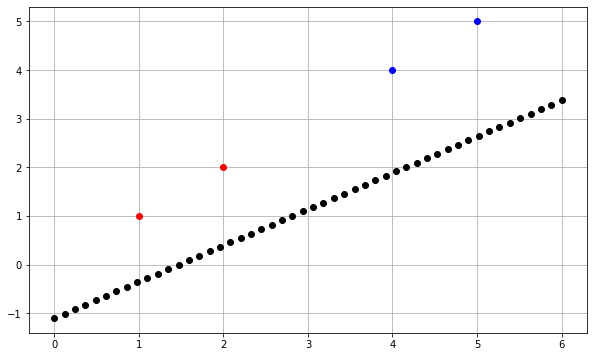

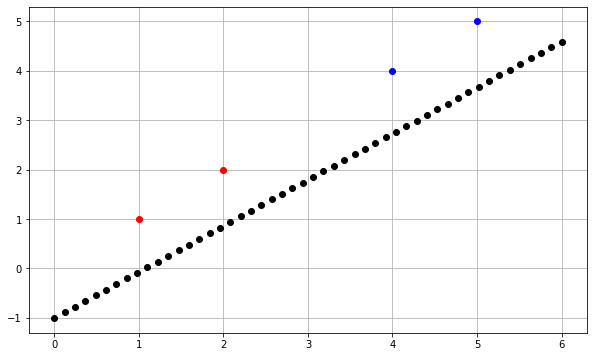

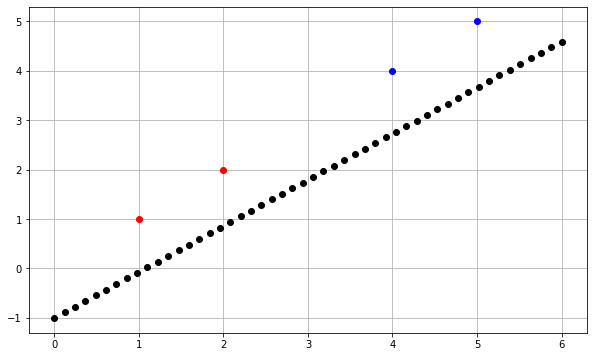

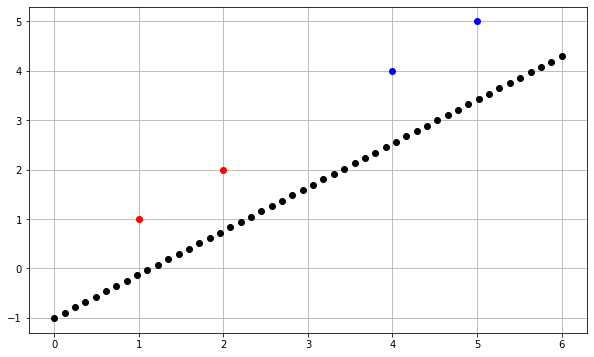

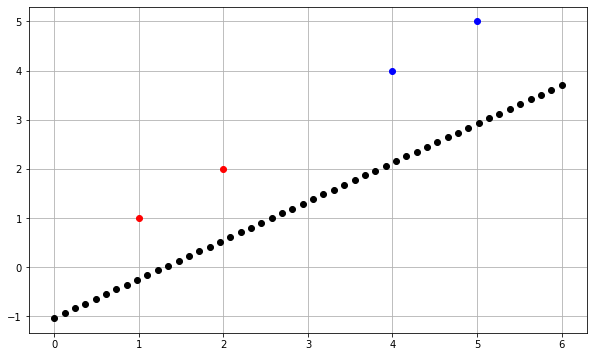

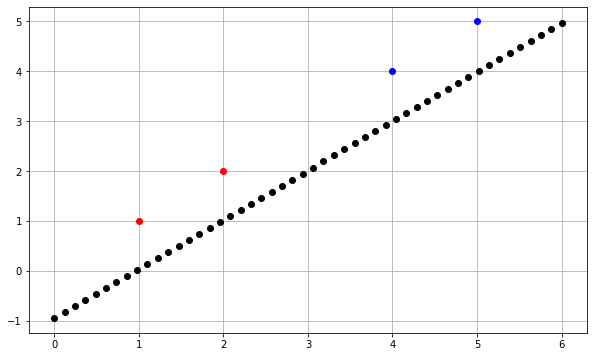

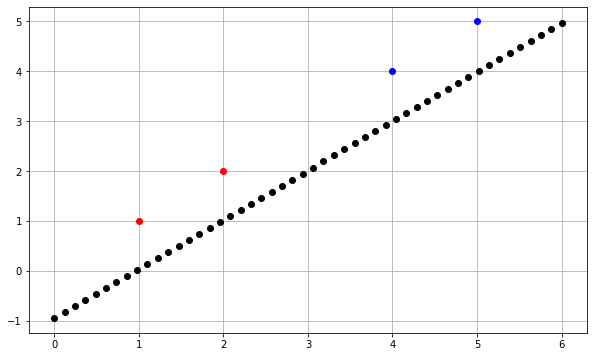

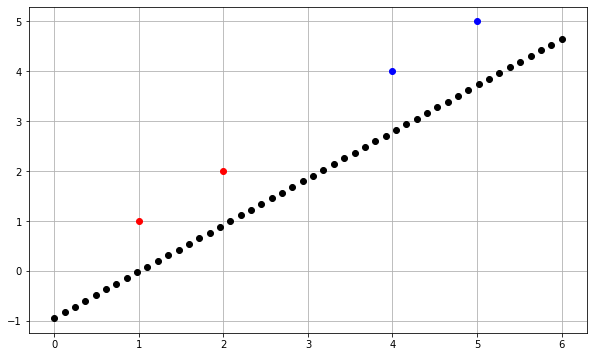

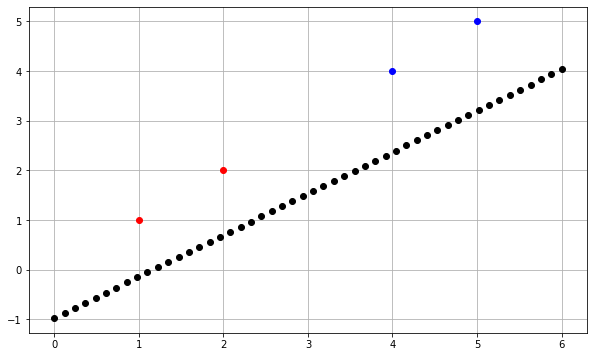

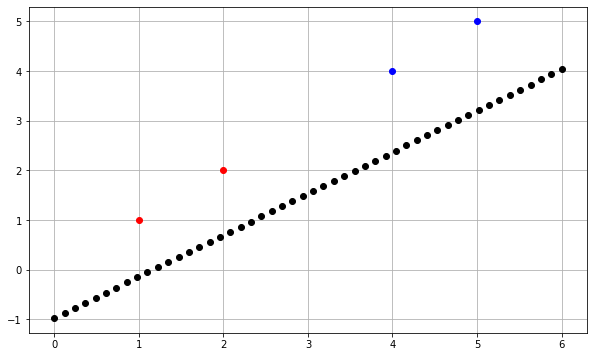

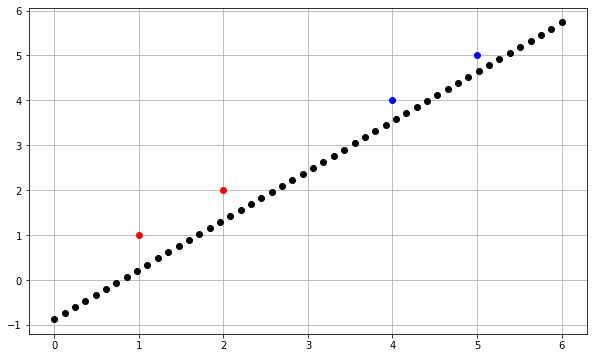

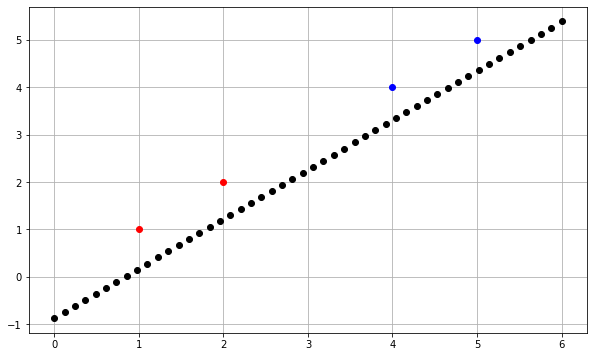

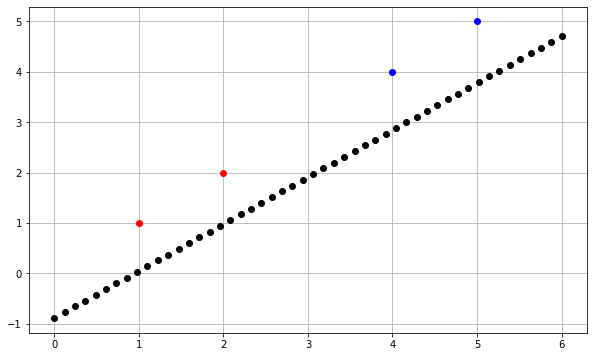

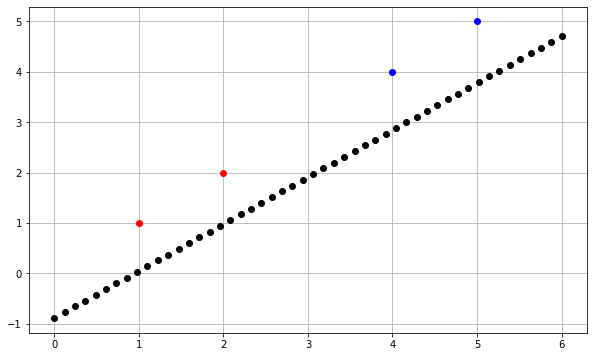

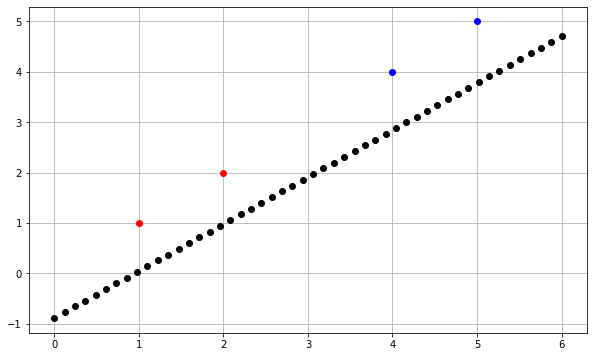

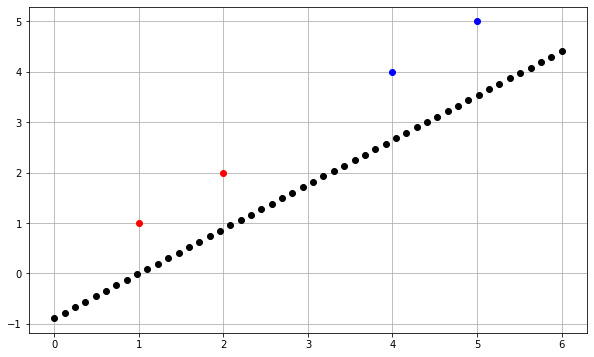

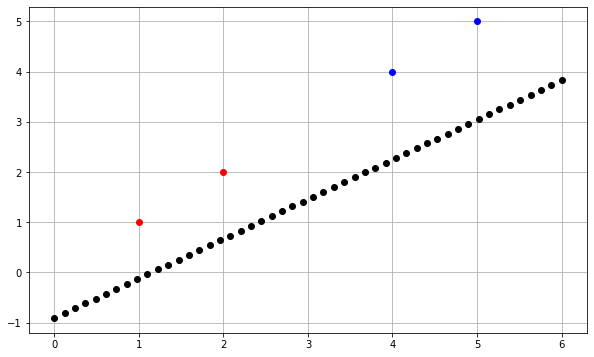

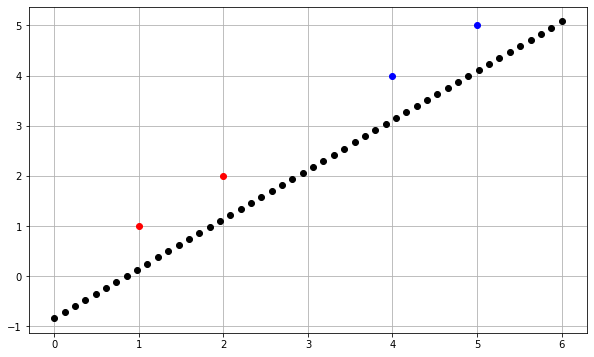

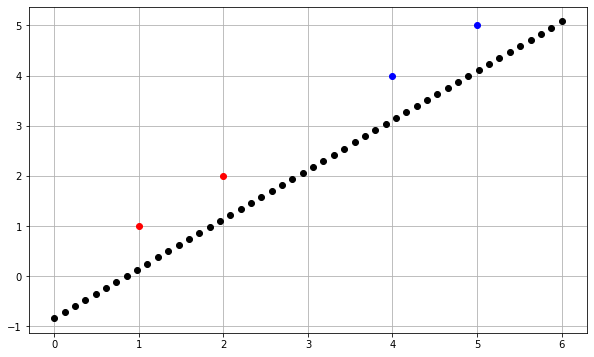

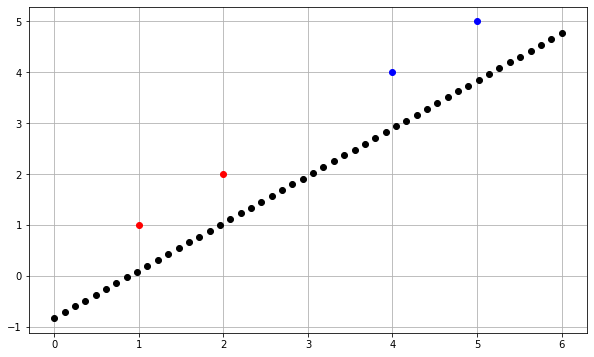

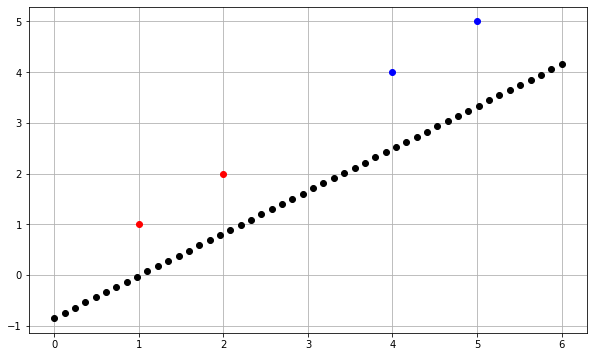

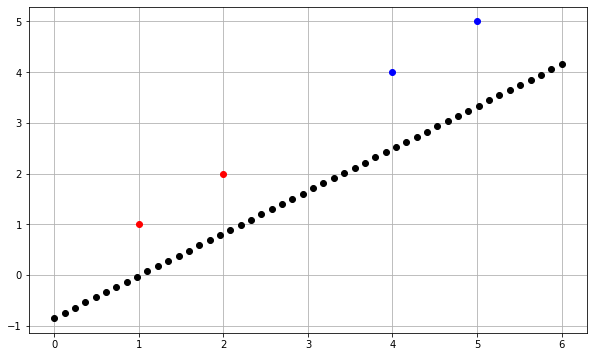

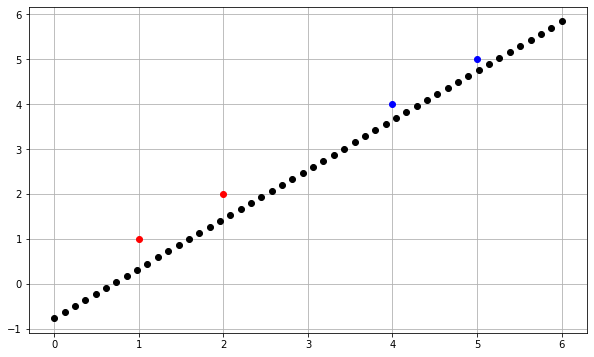

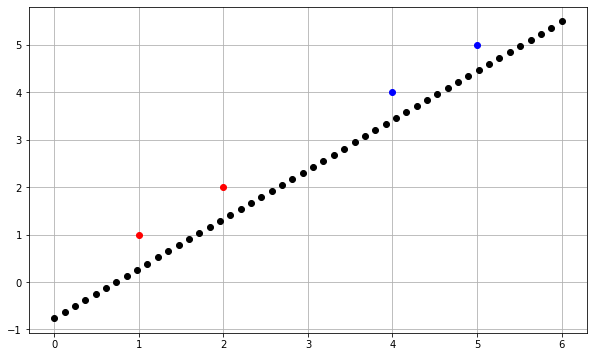

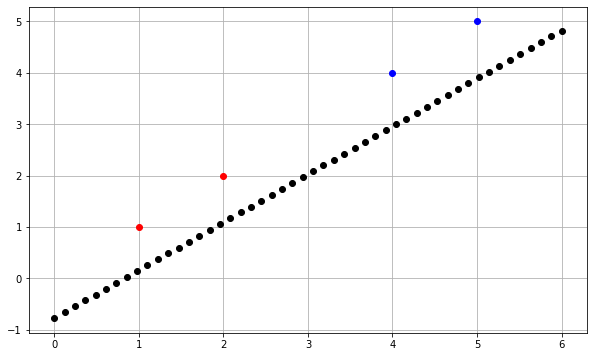

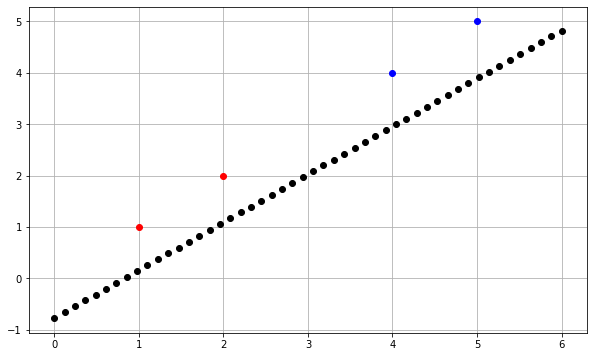

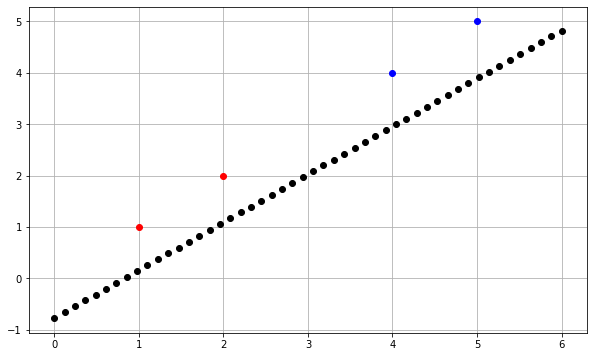

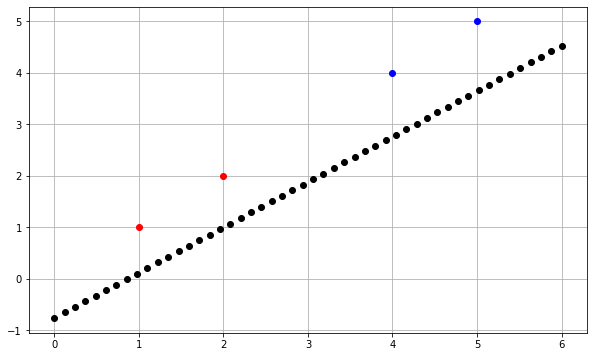

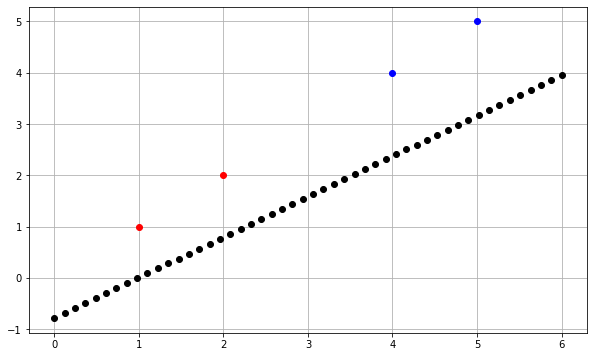

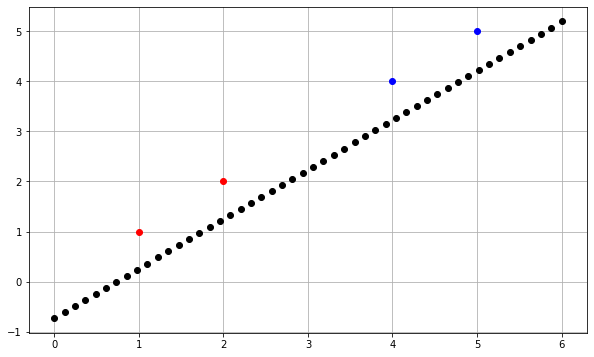

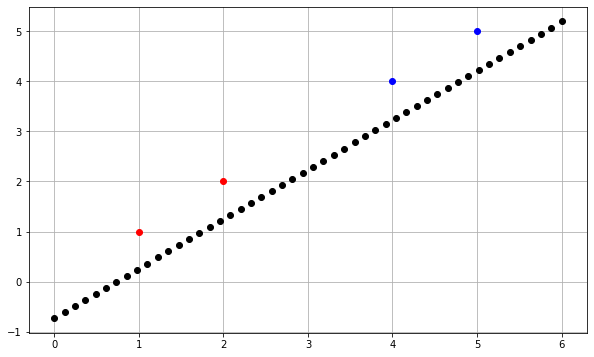

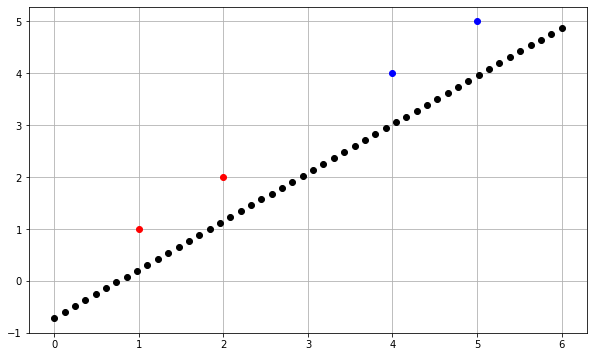

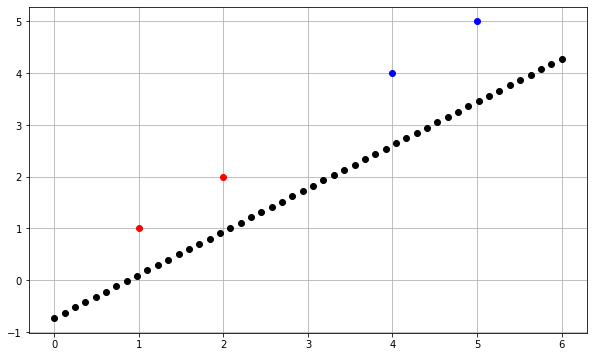

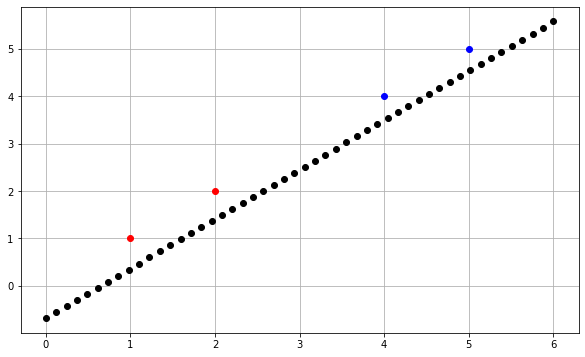

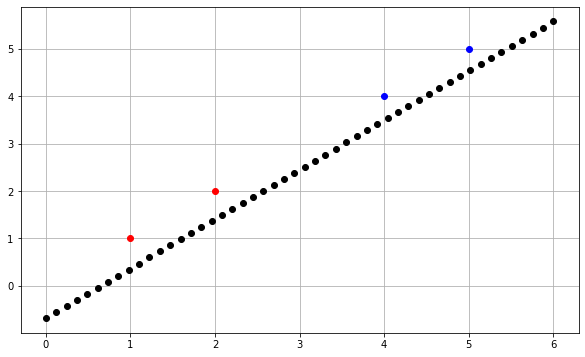

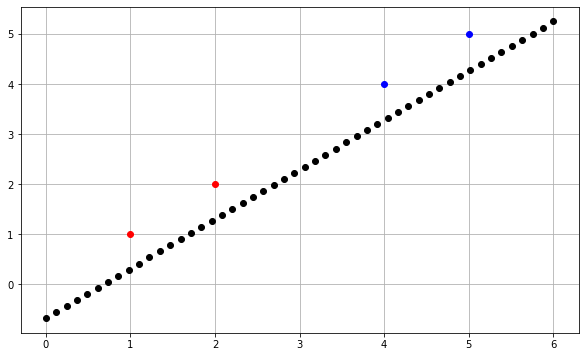

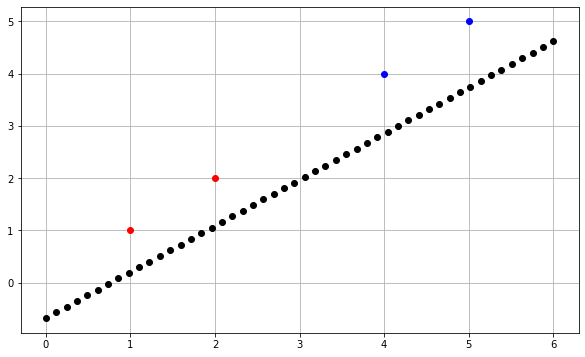

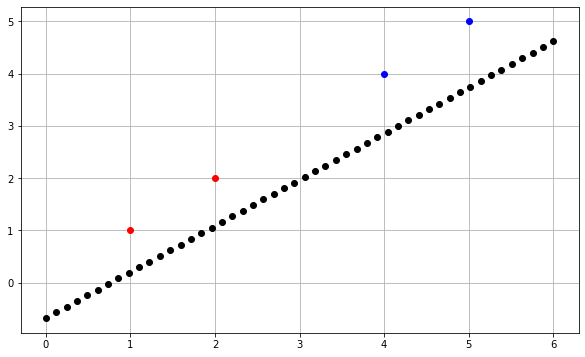

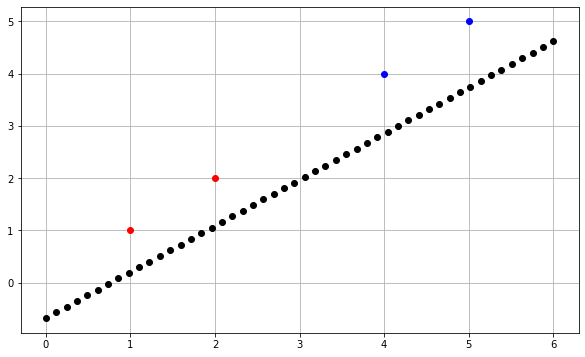

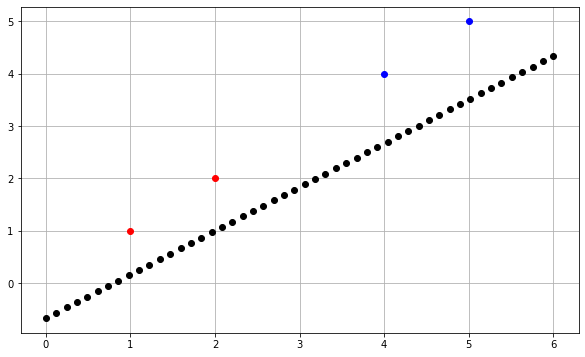

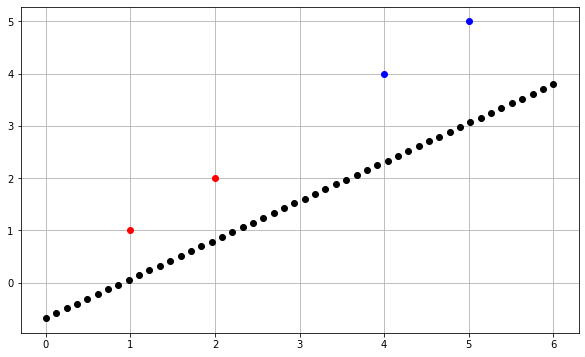

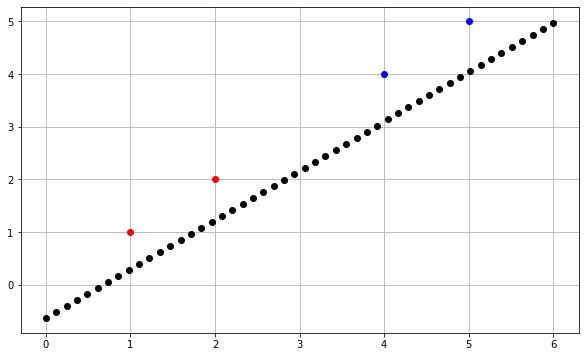

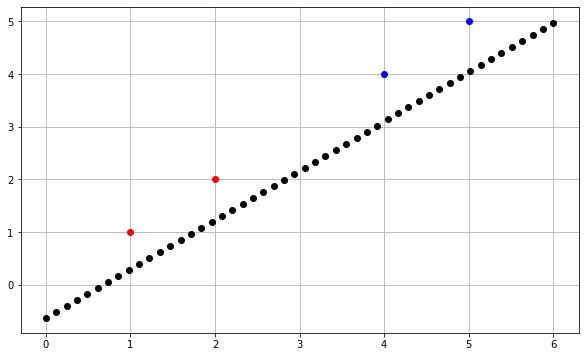

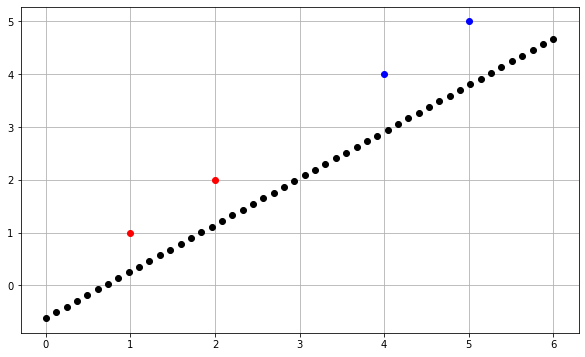

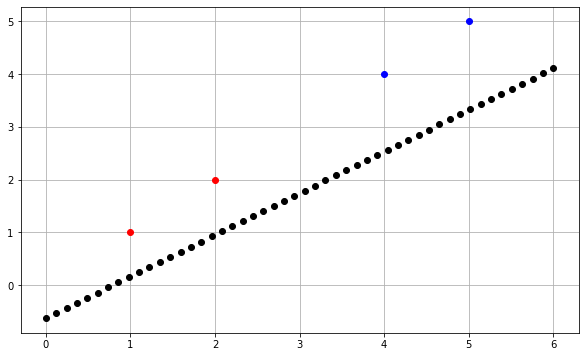

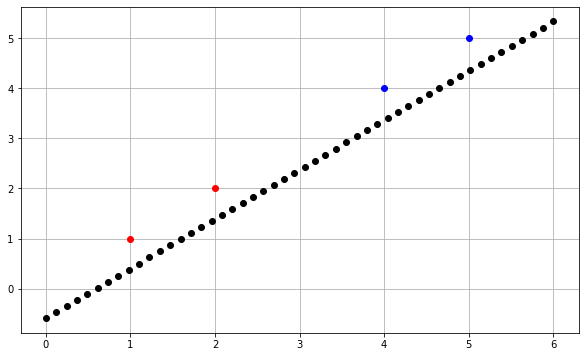

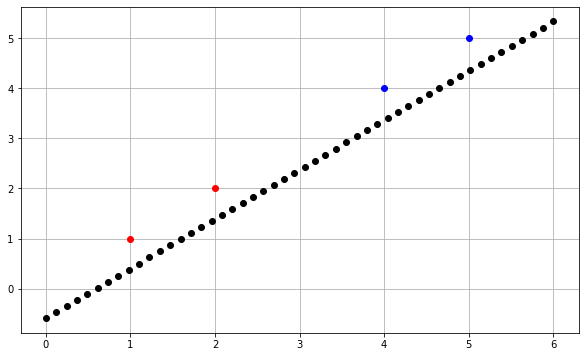

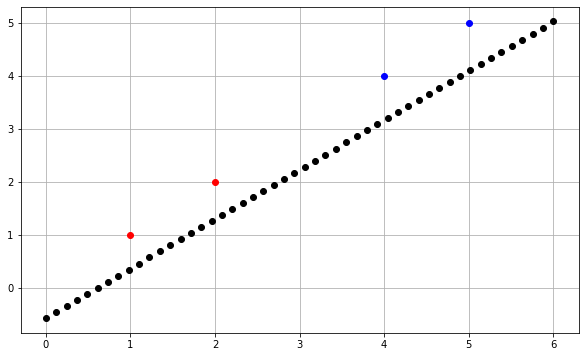

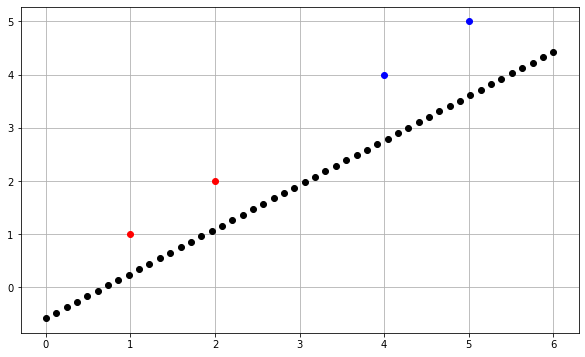

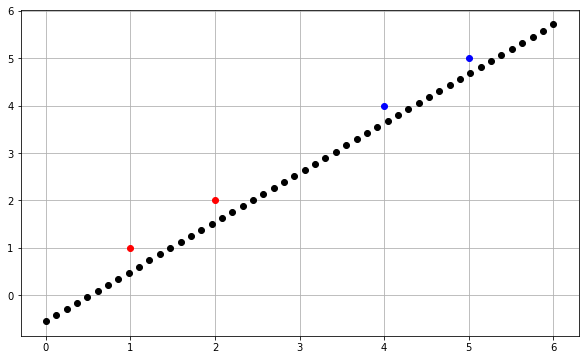

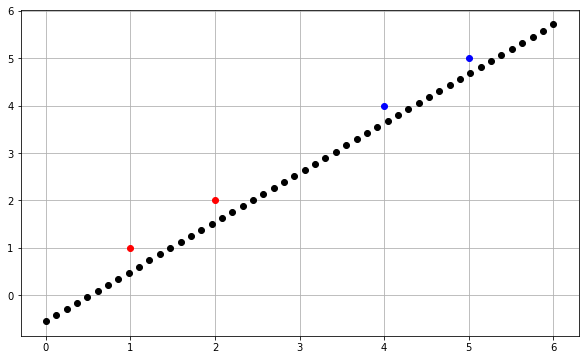

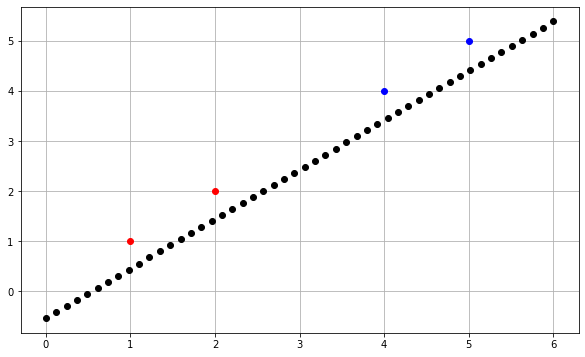

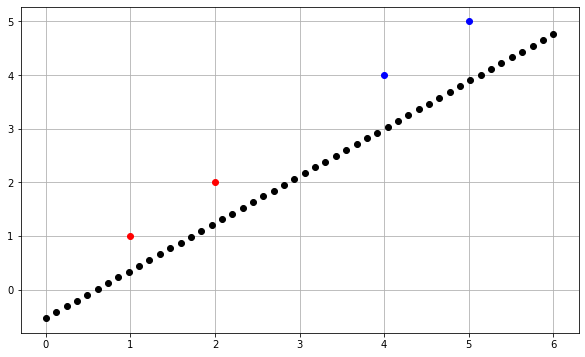

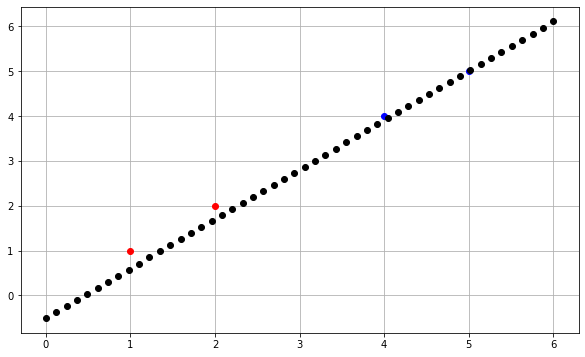

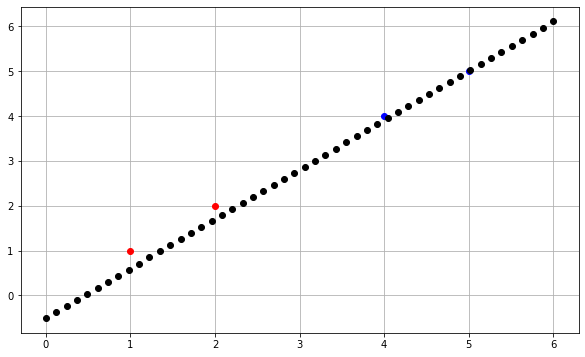

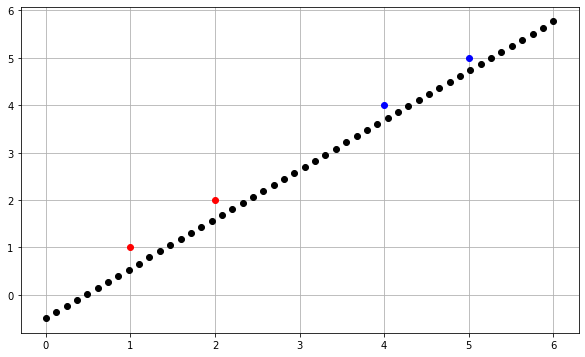

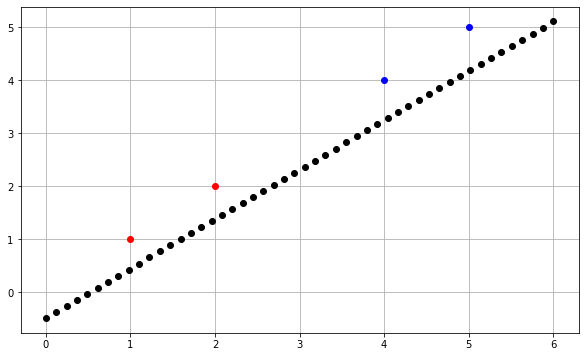

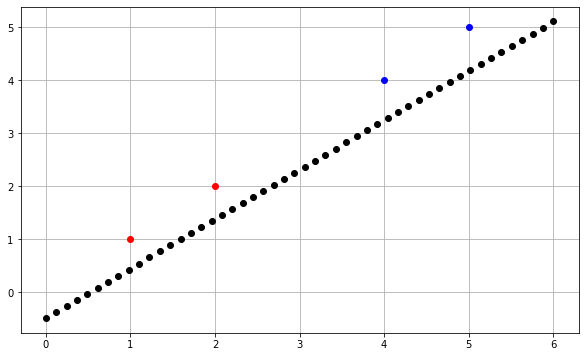

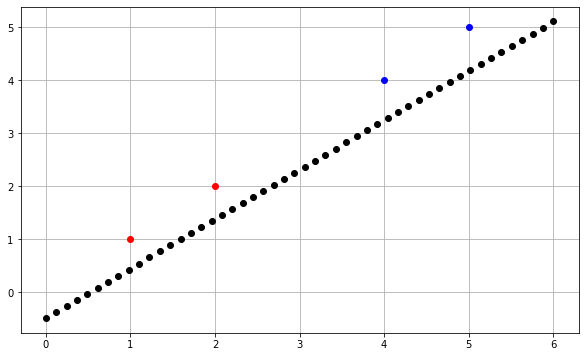

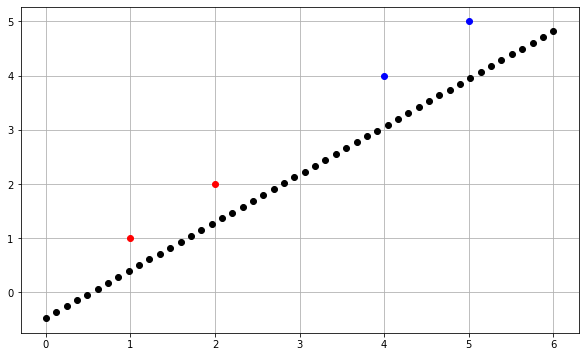

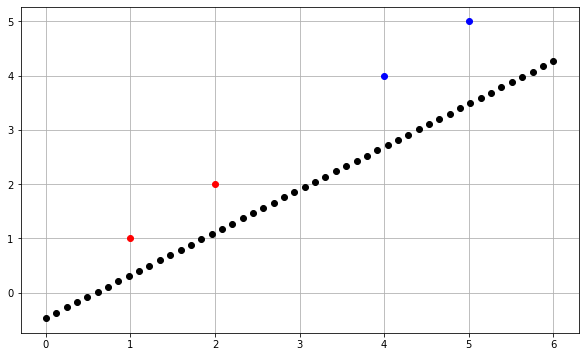

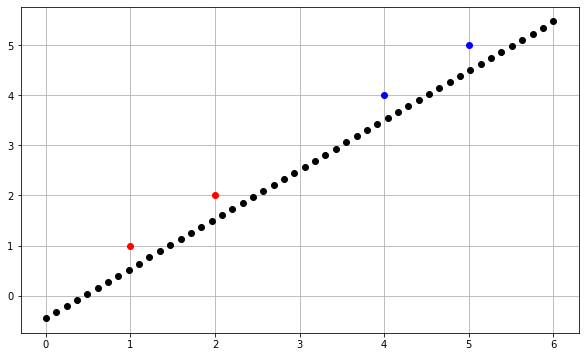

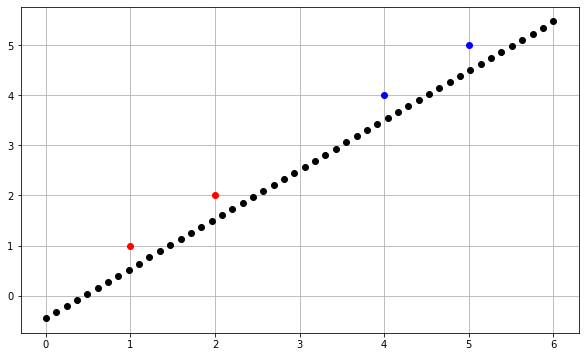

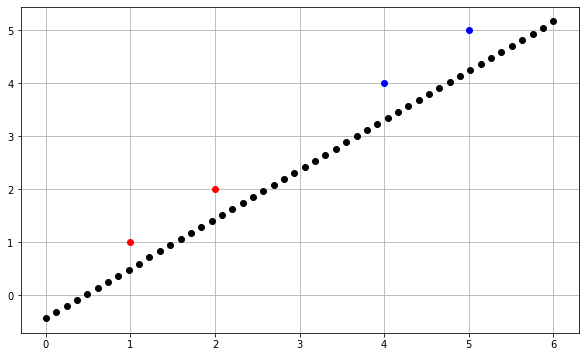

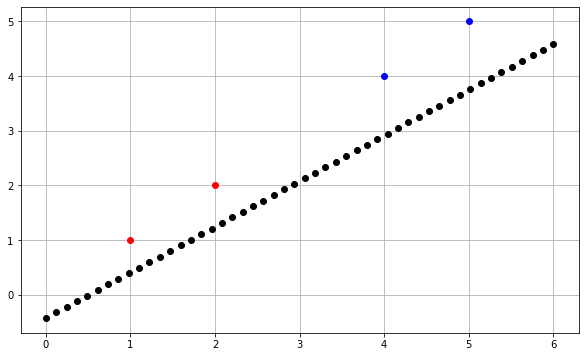

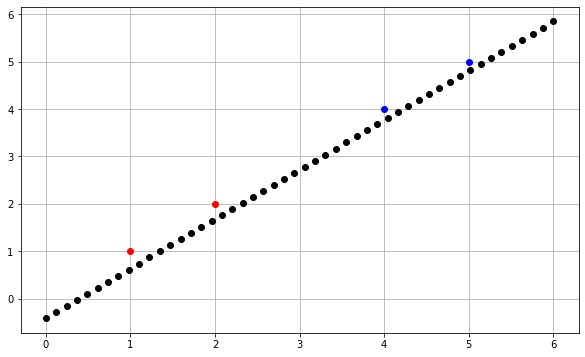

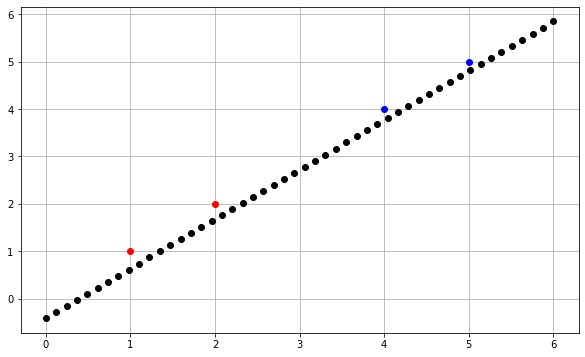

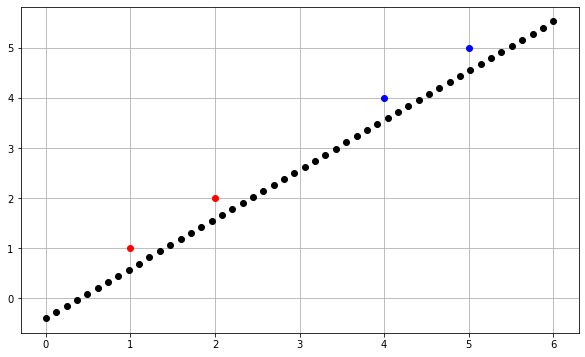

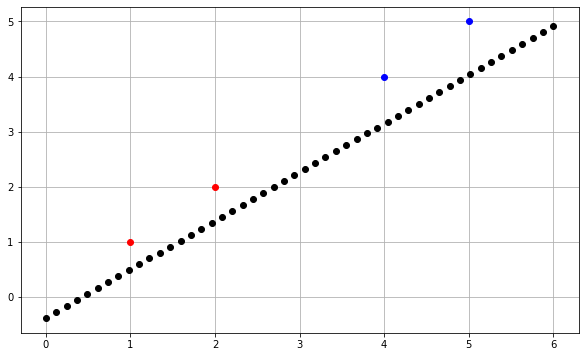

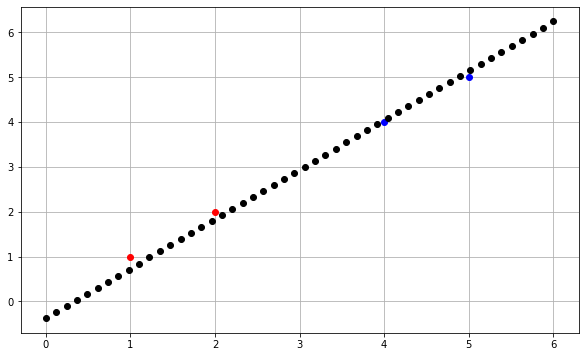

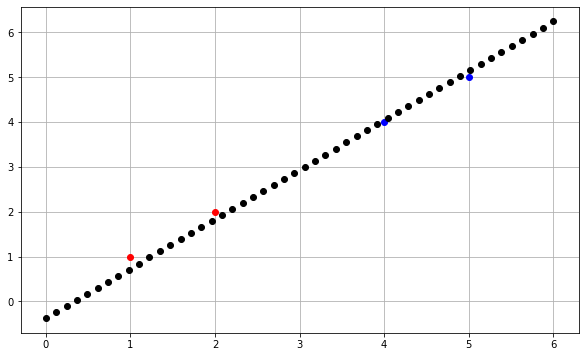

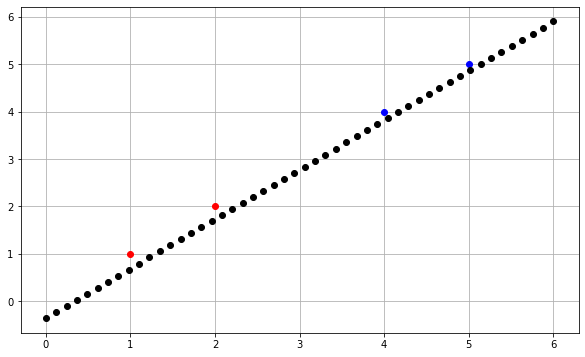

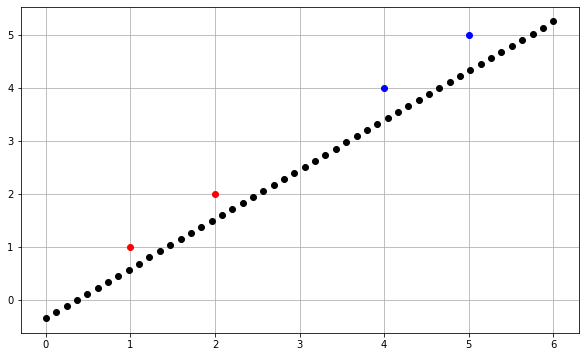

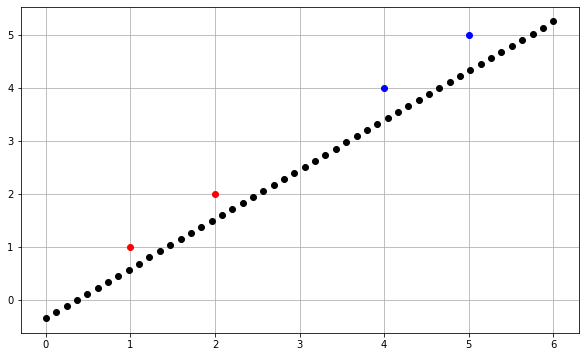

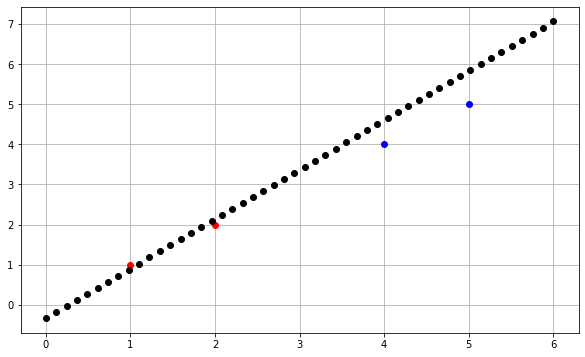

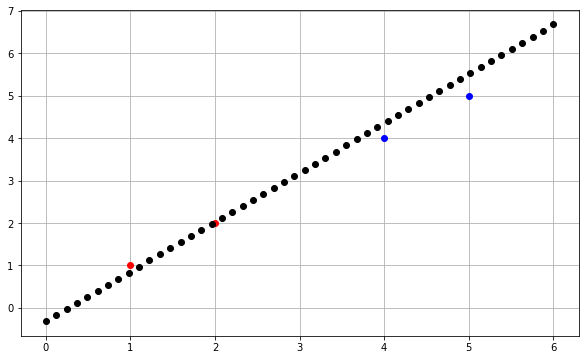

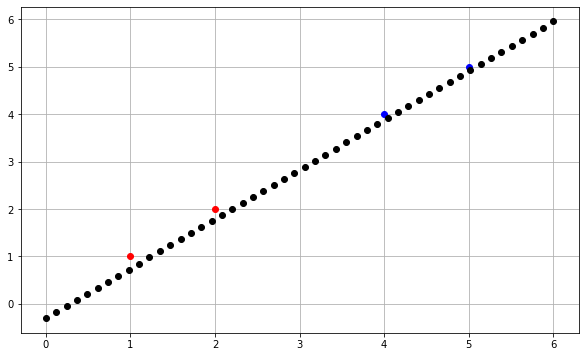

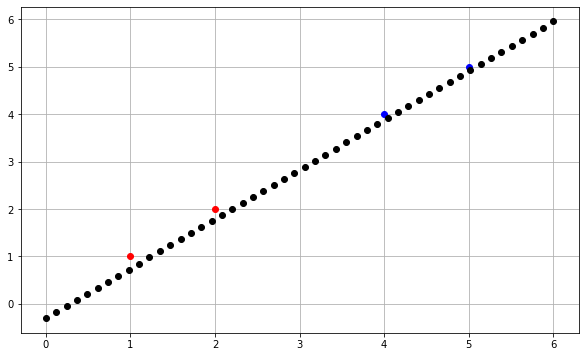

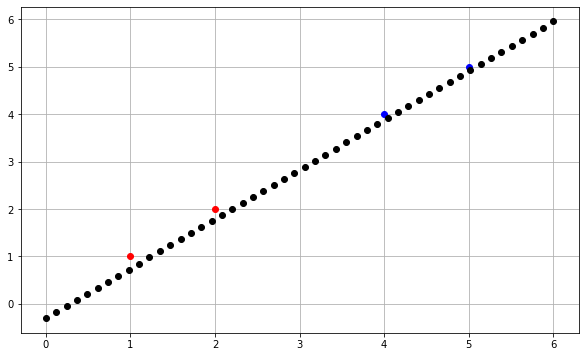

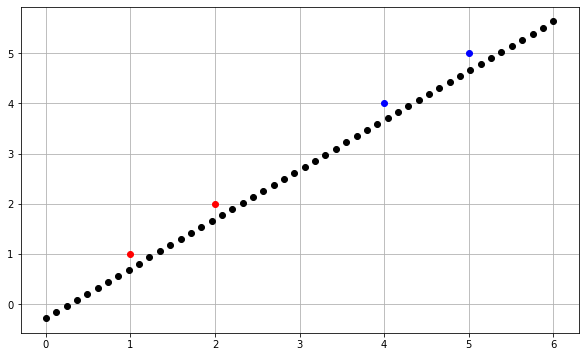

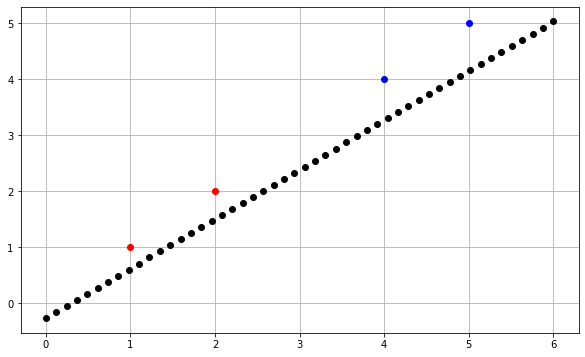

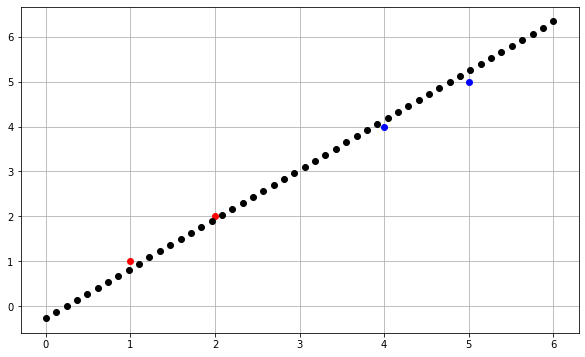

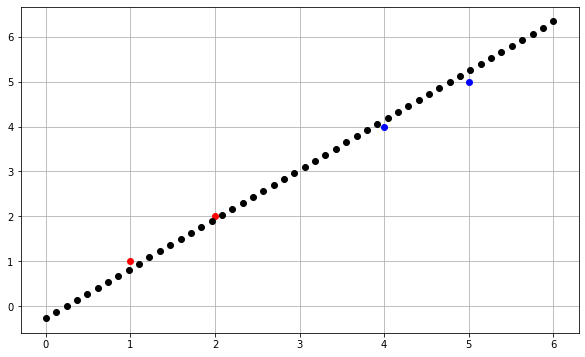

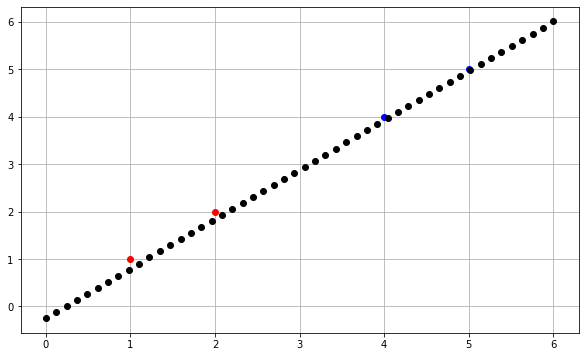

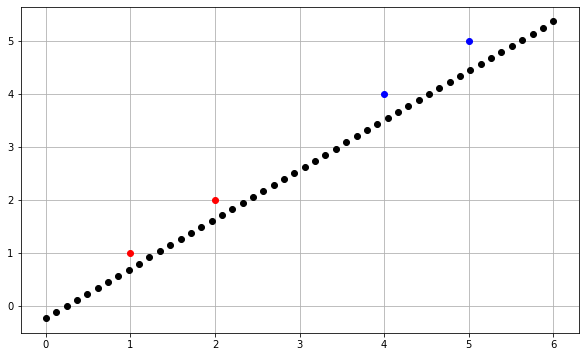

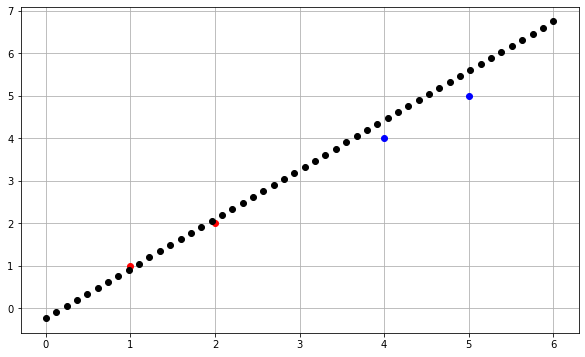

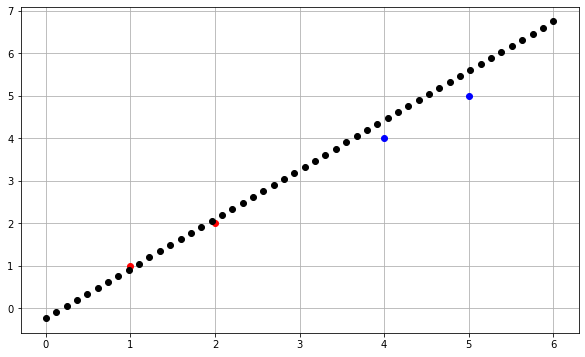

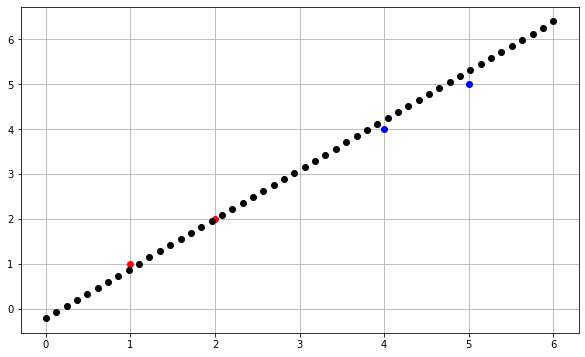

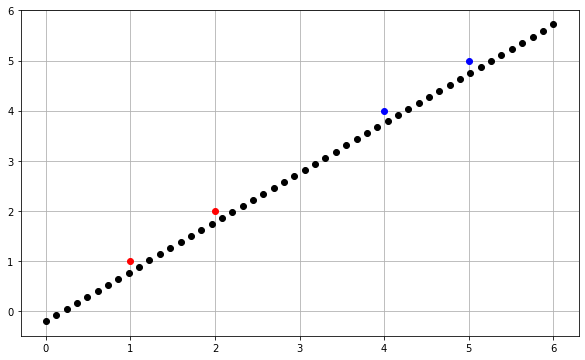

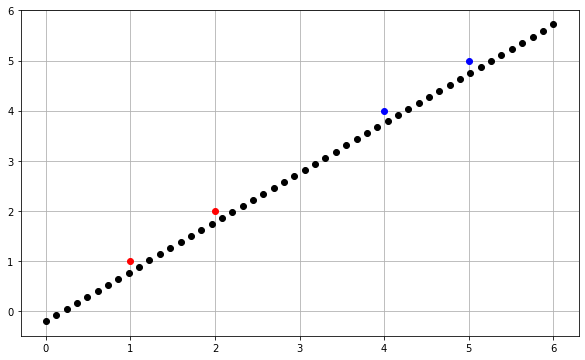

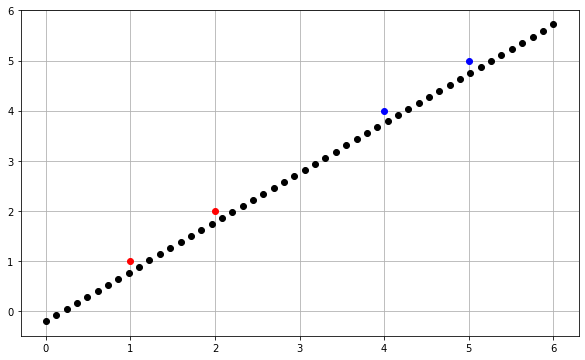

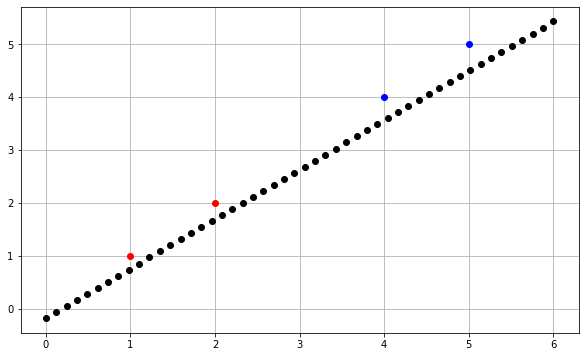

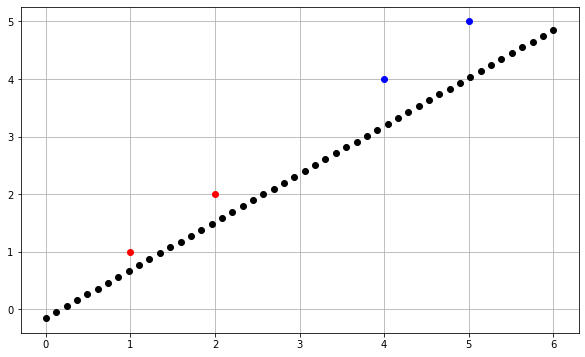

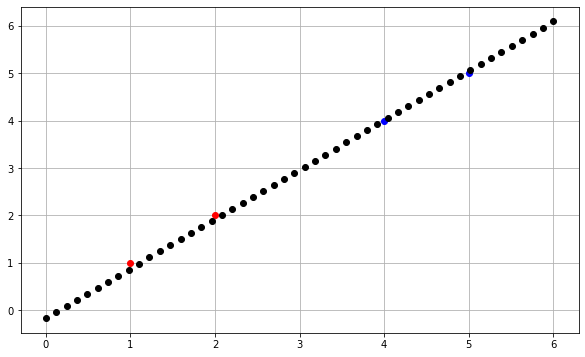

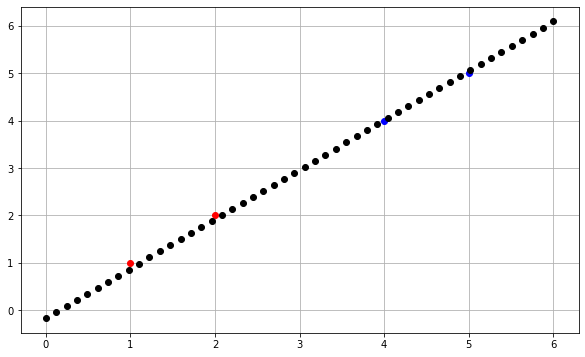

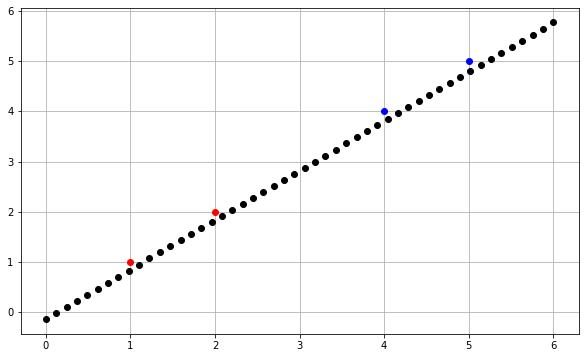

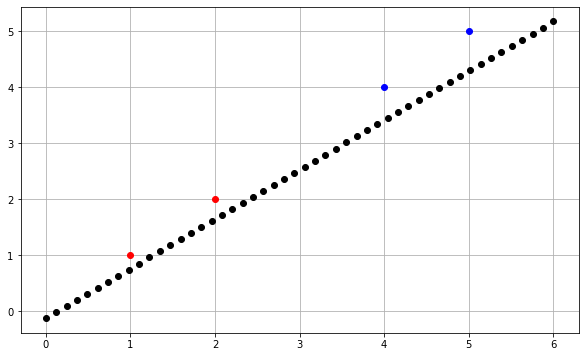

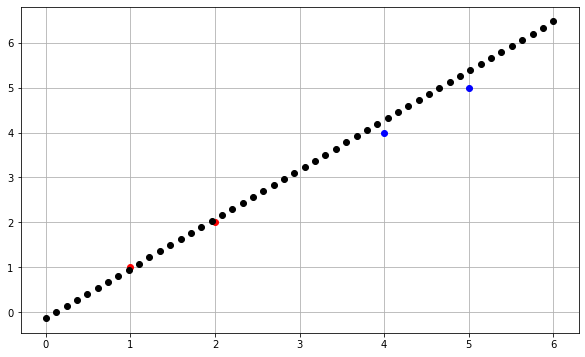

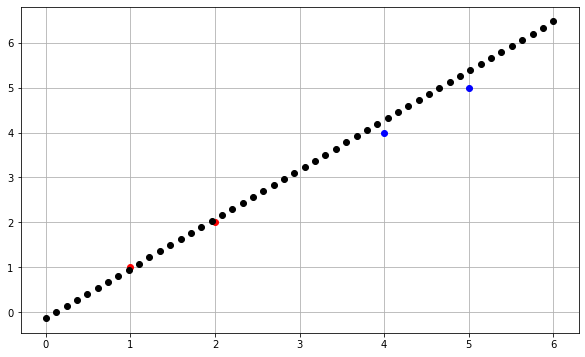

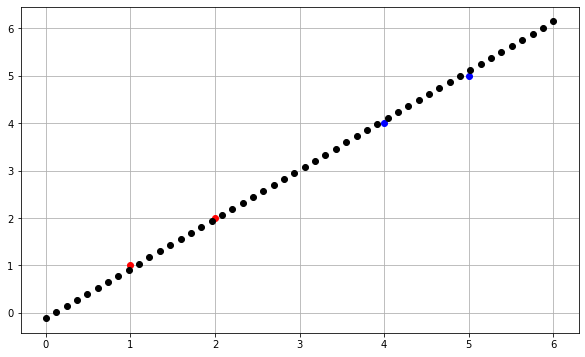

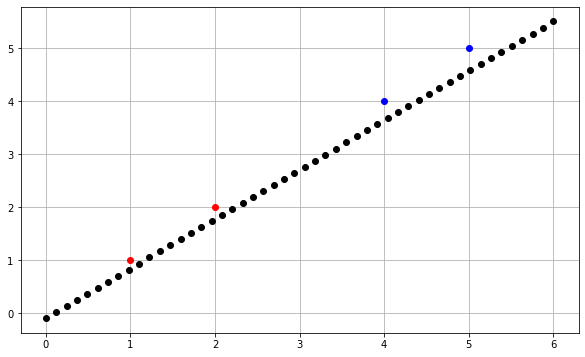

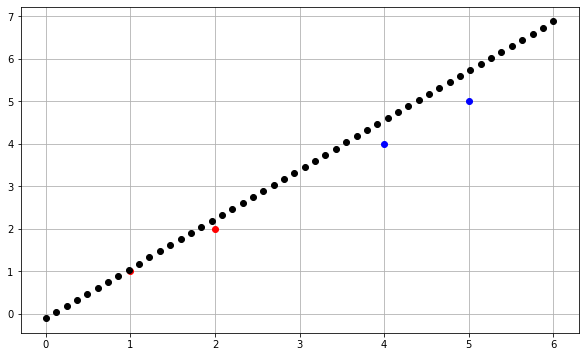

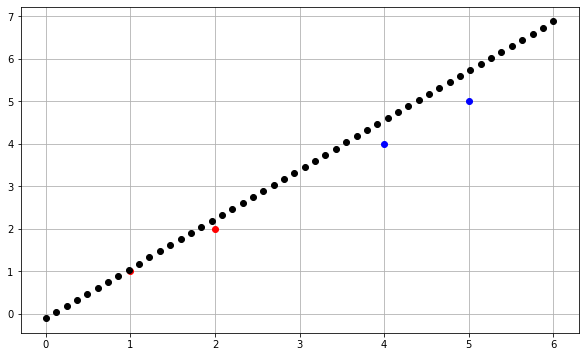

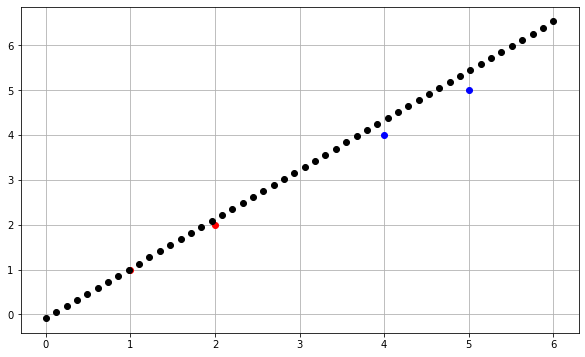

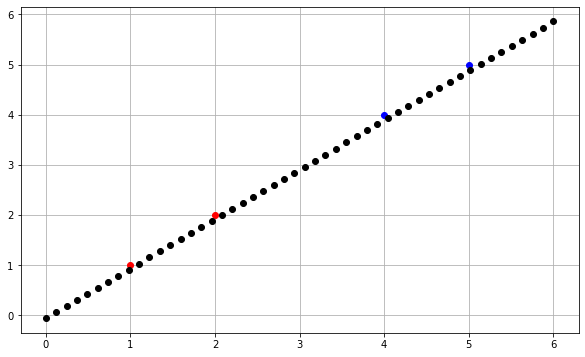

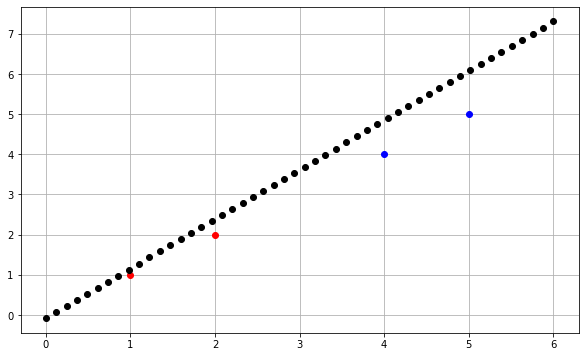

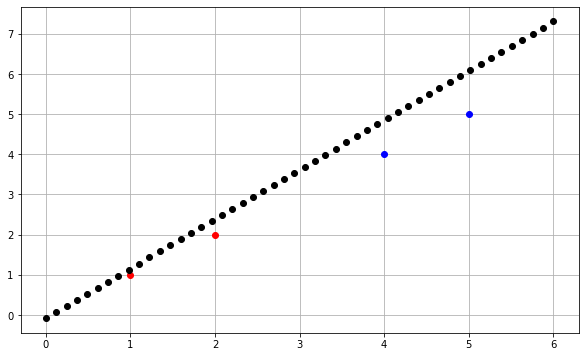

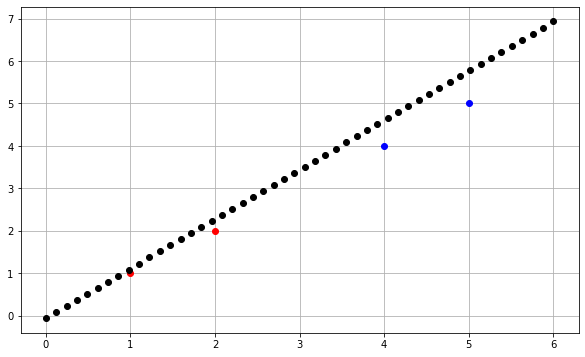

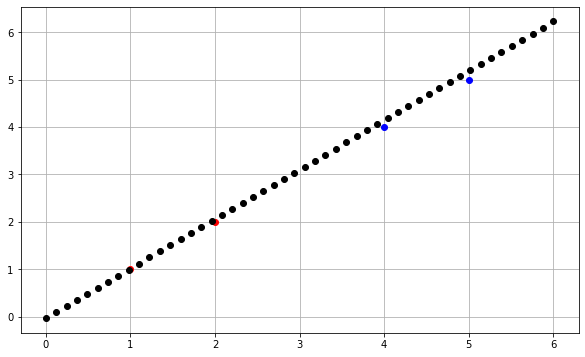

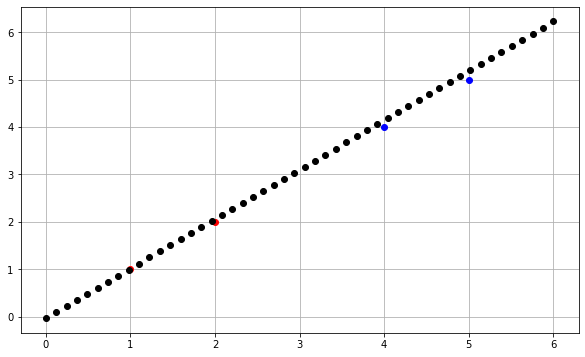

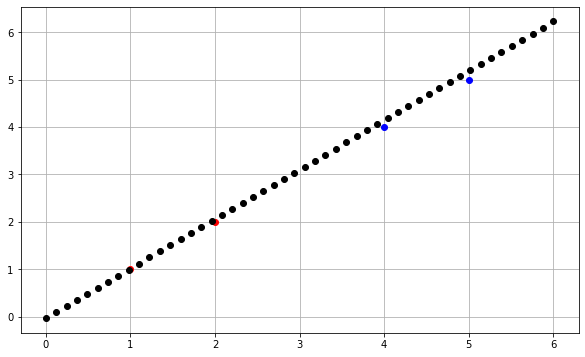

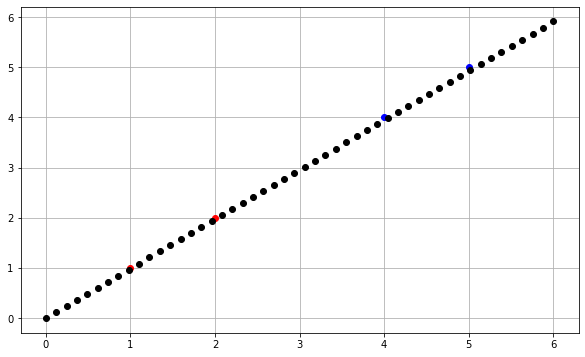

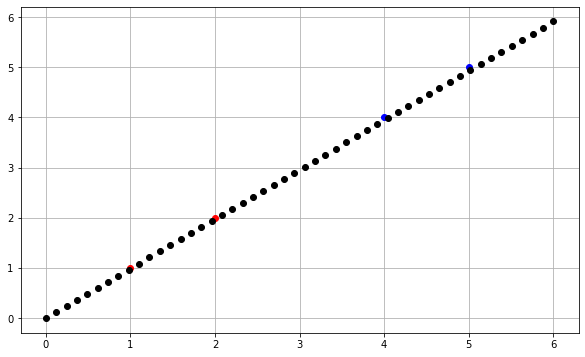

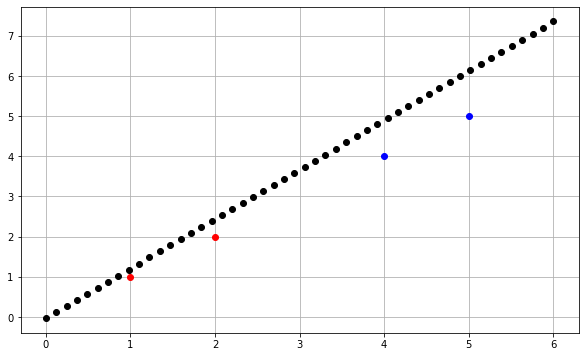

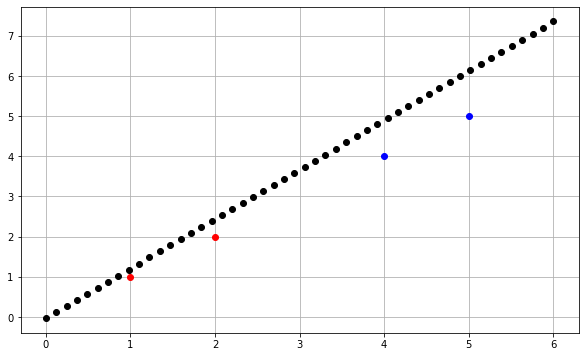

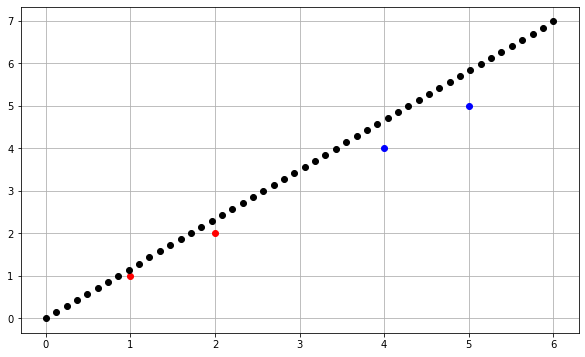

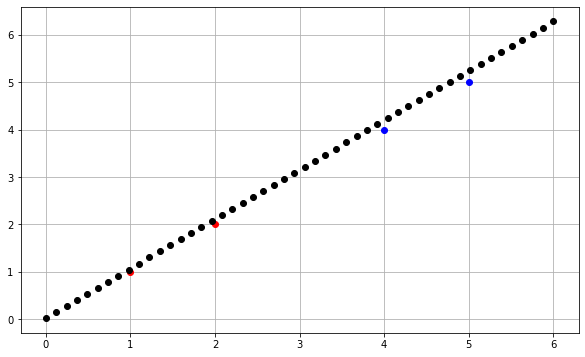

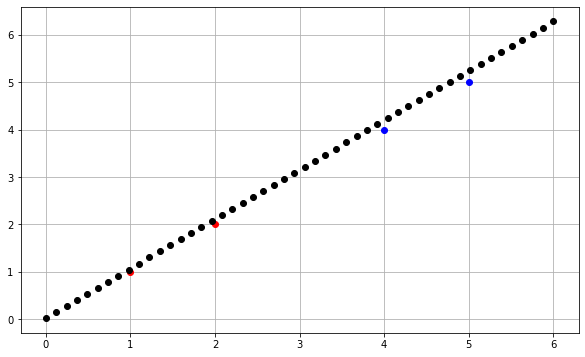

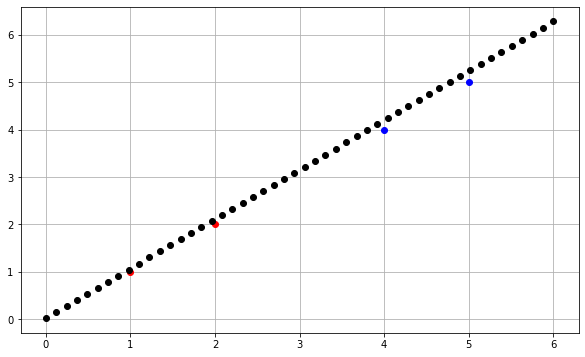

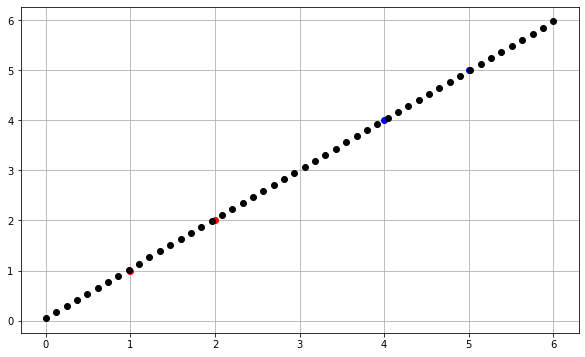

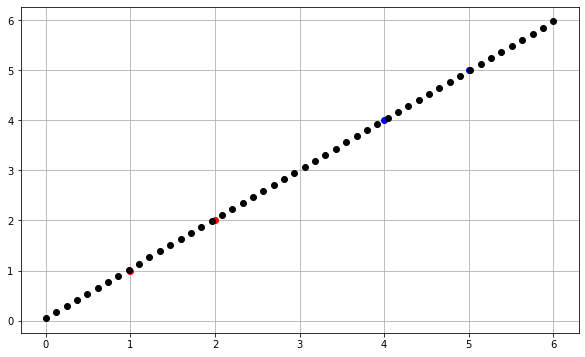

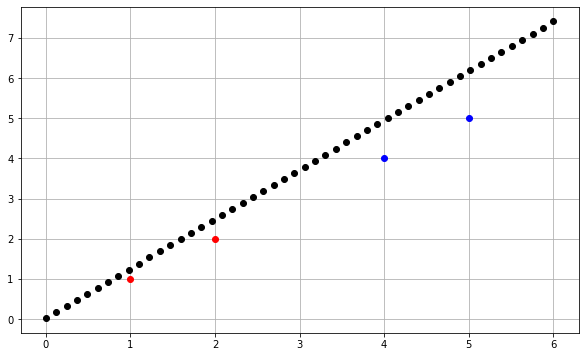

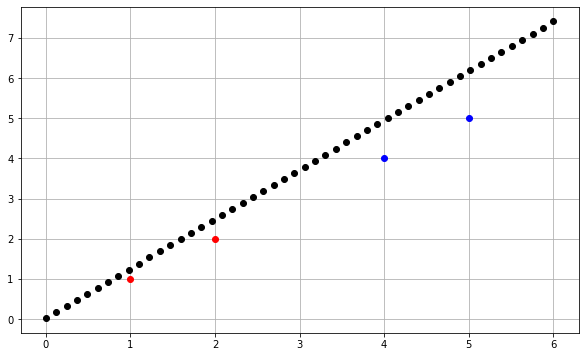

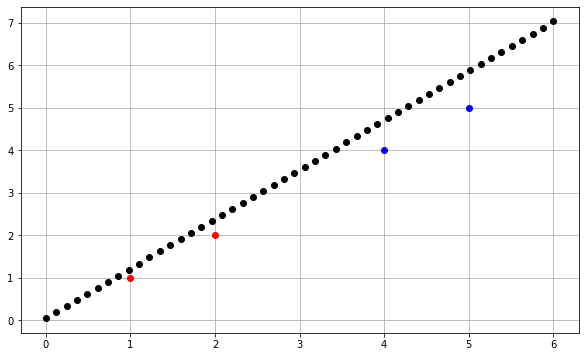

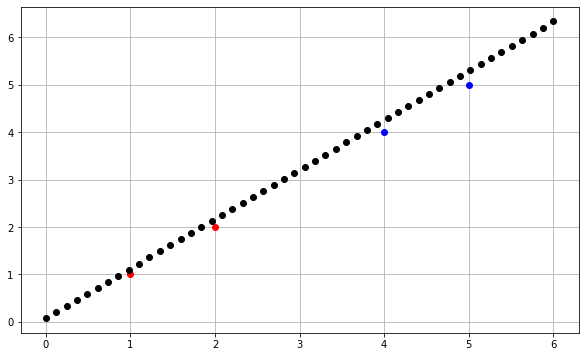

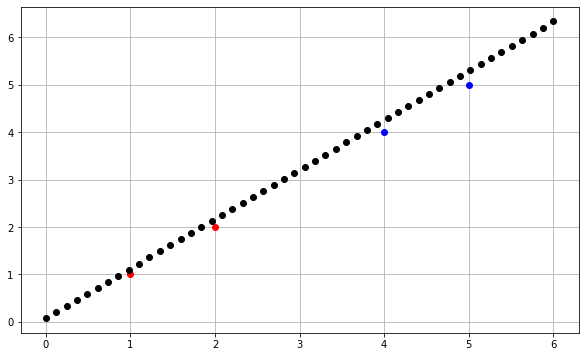

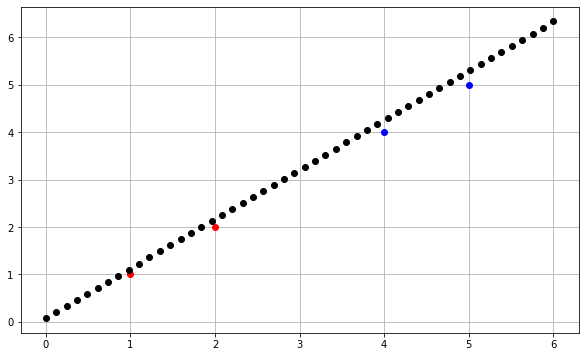

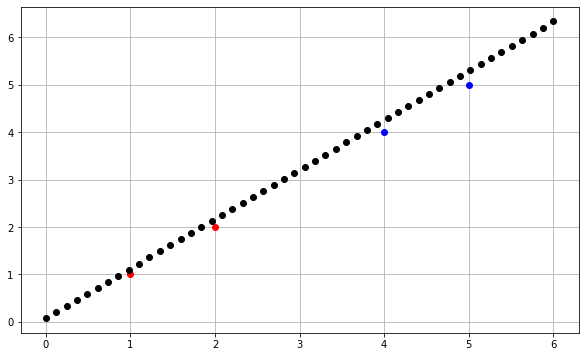

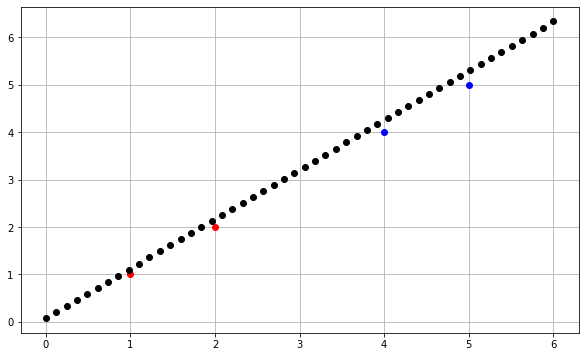

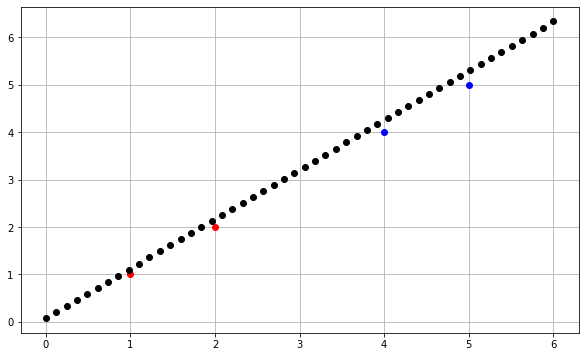

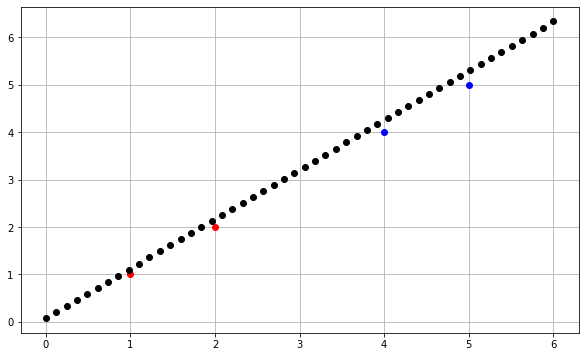

In [4]:
perp = Perceptron(X, Y)
perp.train()

Slope:  1.041747364597155 Y-Intercept:  0.08125650450663374


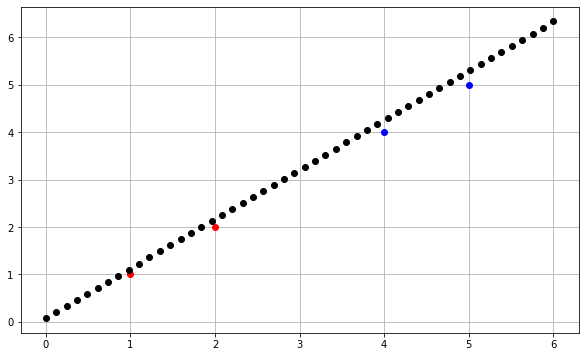

In [5]:
perp.plot_data()

Text(0, 0.5, 'cost')

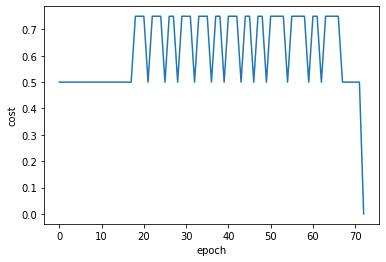

In [6]:
# Visualize Model progress
plt.plot(perp.cost_list)
plt.xlabel('epoch')
plt.ylabel('cost')

In [7]:
# OR
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([0, 1, 1, 1])

..........
Initial Weights:  [0.21908866 0.67501486]
Initial Bias:  1.0
Slope:  -0.32456864995727513 Y-Intercept:  -4.518718550922223
Slope:  -0.32456864995727513 Y-Intercept:  -4.518718550922223
Slope:  -0.32456864995727513 Y-Intercept:  -4.518718550922223
Slope:  -0.32456864995727513 Y-Intercept:  -4.518718550922223
Epoch: 0001	Misclassifed: 01 	Loss: 0.25000		Regression: 0.22(X1) + 0.68(X2) + 0.99
Slope:  -0.32456864995727513 Y-Intercept:  -4.473074929195736
Slope:  -0.32456864995727513 Y-Intercept:  -4.473074929195736
Slope:  -0.32456864995727513 Y-Intercept:  -4.473074929195736
Slope:  -0.32456864995727513 Y-Intercept:  -4.473074929195736
Epoch: 0002	Misclassifed: 01 	Loss: 0.25000		Regression: 0.22(X1) + 0.68(X2) + 0.98
Slope:  -0.32456864995727513 Y-Intercept:  -4.427431307469249
Slope:  -0.32456864995727513 Y-Intercept:  -4.427431307469249
Slope:  -0.32456864995727513 Y-Intercept:  -4.427431307469249
Slope:  -0.32456864995727513 Y-Intercept:  -4.427431307469249
Epoch: 0003	Misc

D:\ProgramData\Anaconda3\envs\appliedaicourse\lib\site-packages\ipykernel_launcher.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Slope:  -0.3245686499572751 Y-Intercept:  -4.290500442289788
Slope:  -0.3245686499572751 Y-Intercept:  -4.290500442289788
Epoch: 0006	Misclassifed: 01 	Loss: 0.25000		Regression: 0.22(X1) + 0.68(X2) + 0.94
Slope:  -0.32456864995727513 Y-Intercept:  -4.2448568205633
Slope:  -0.32456864995727513 Y-Intercept:  -4.2448568205633
Slope:  -0.32456864995727513 Y-Intercept:  -4.2448568205633
Slope:  -0.32456864995727513 Y-Intercept:  -4.2448568205633
Epoch: 0007	Misclassifed: 01 	Loss: 0.25000		Regression: 0.22(X1) + 0.68(X2) + 0.93
Slope:  -0.32456864995727513 Y-Intercept:  -4.199213198836813
Slope:  -0.32456864995727513 Y-Intercept:  -4.199213198836813
Slope:  -0.32456864995727513 Y-Intercept:  -4.199213198836813
Slope:  -0.32456864995727513 Y-Intercept:  -4.199213198836813
Epoch: 0008	Misclassifed: 01 	Loss: 0.25000		Regression: 0.22(X1) + 0.68(X2) + 0.92
Slope:  -0.32456864995727513 Y-Intercept:  -4.153569577110326
Slope:  -0.32456864995727513 Y-Intercept:  -4.153569577110326
Slope:  -0.324

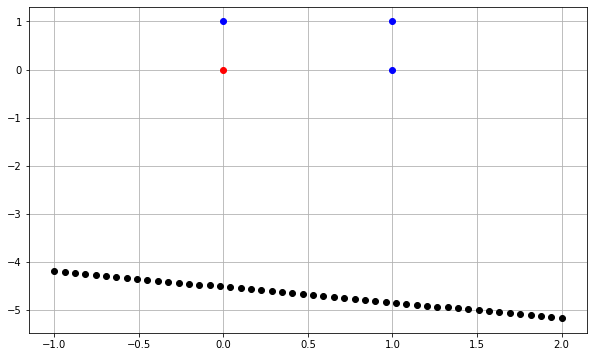

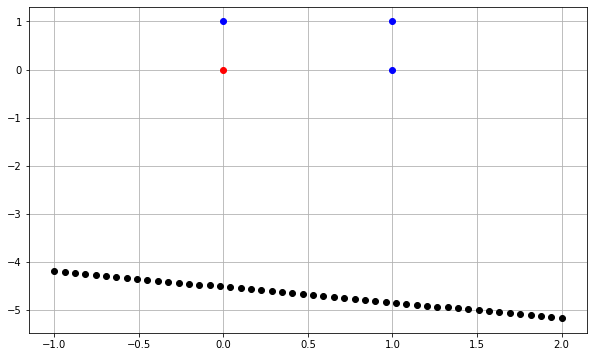

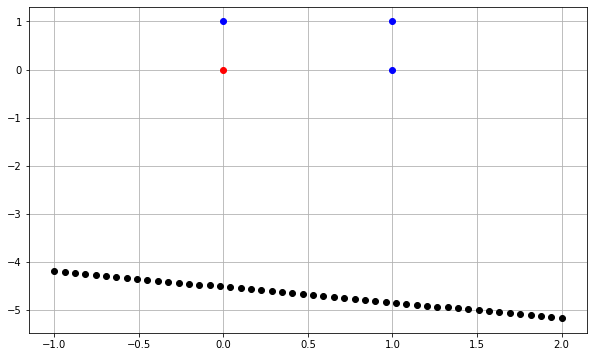

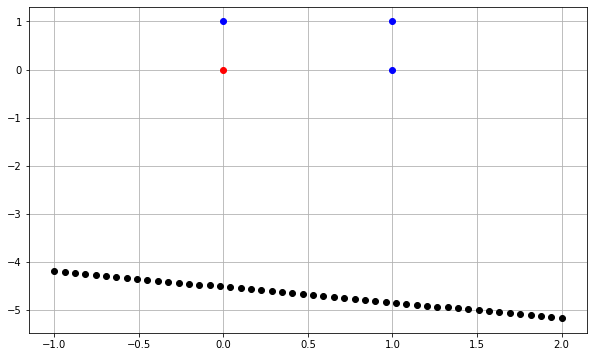

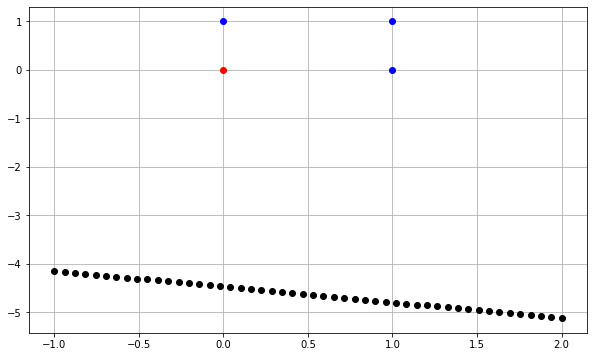

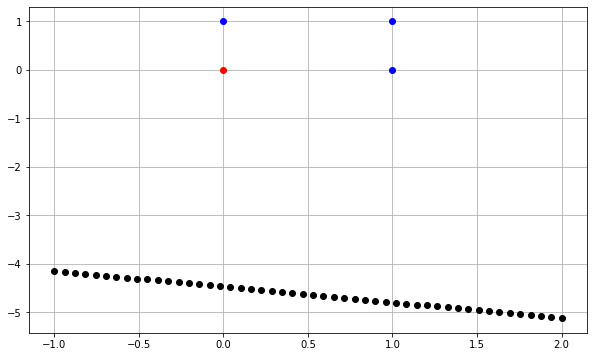

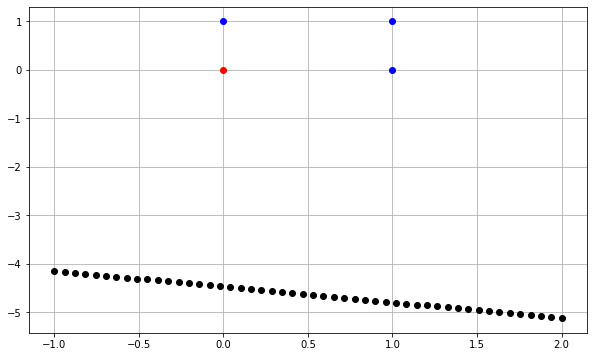

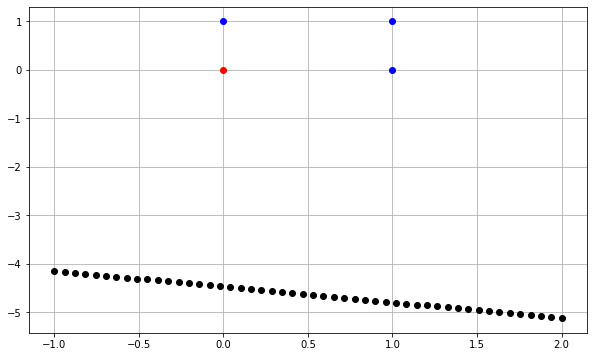

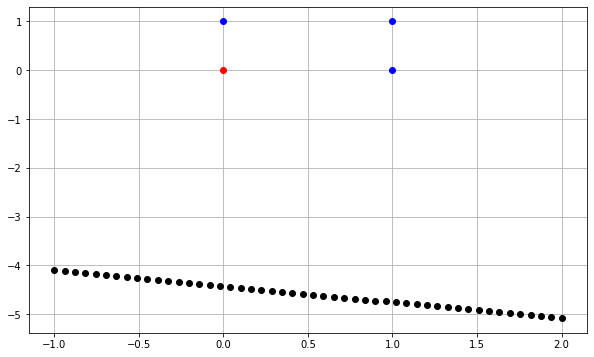

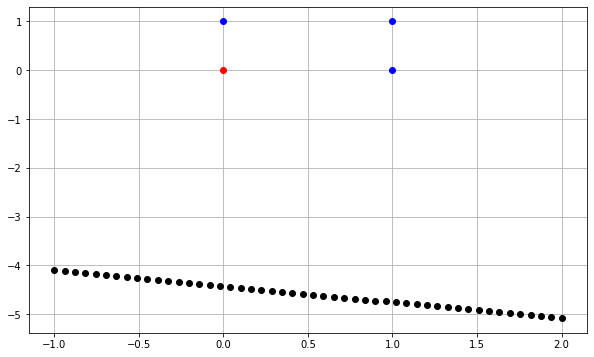

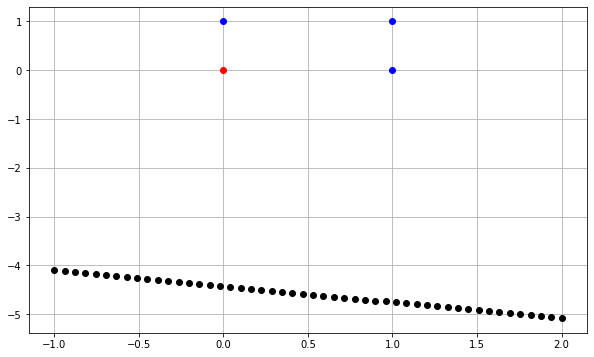

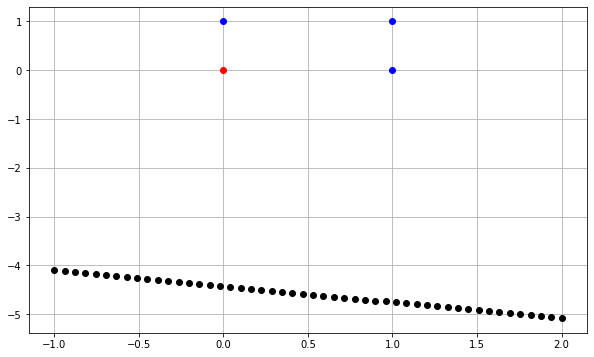

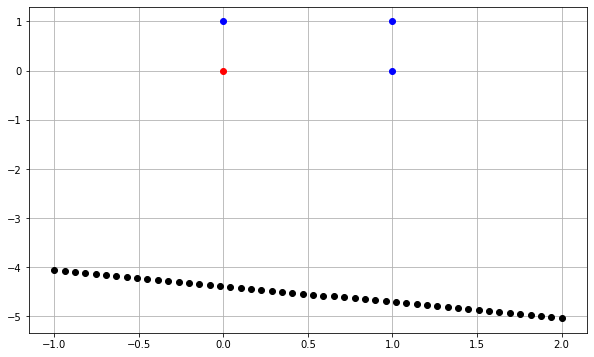

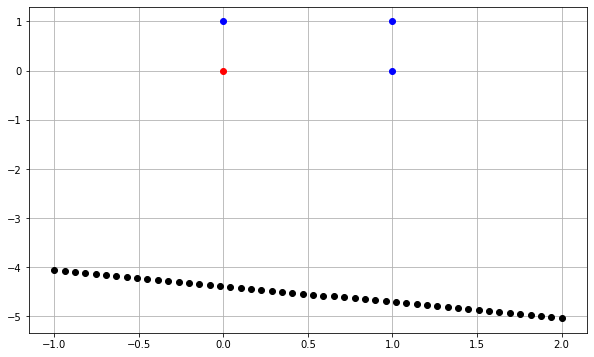

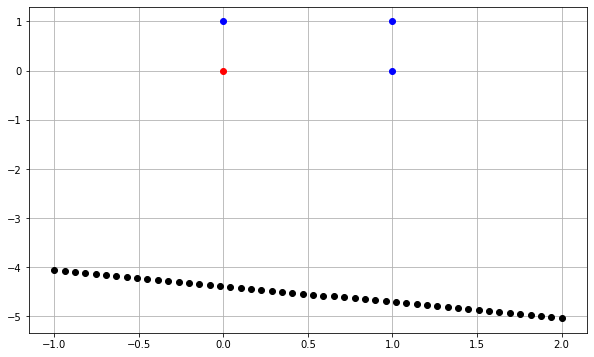

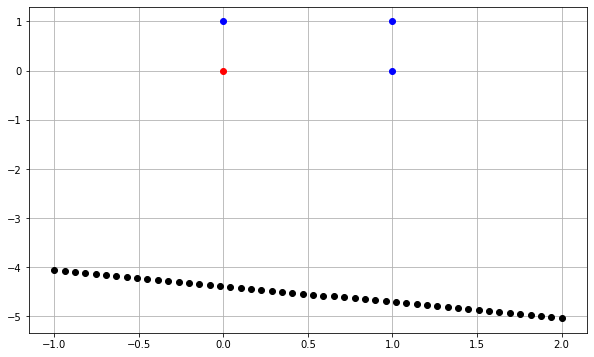

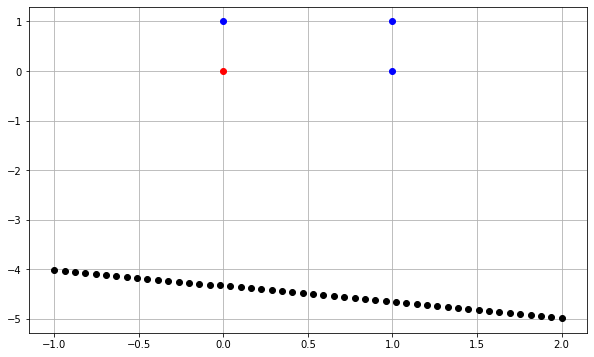

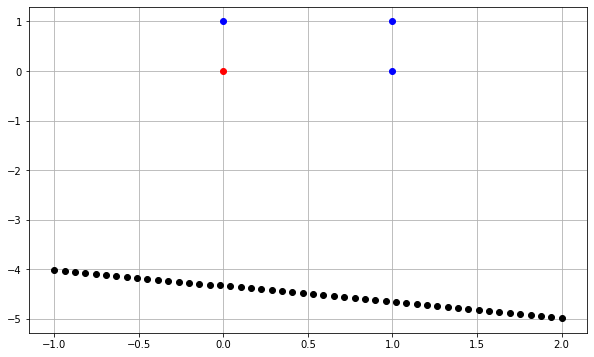

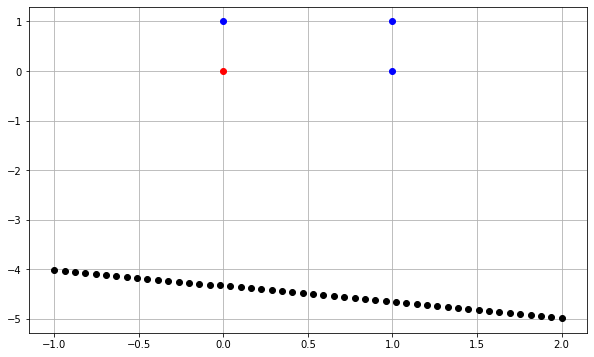

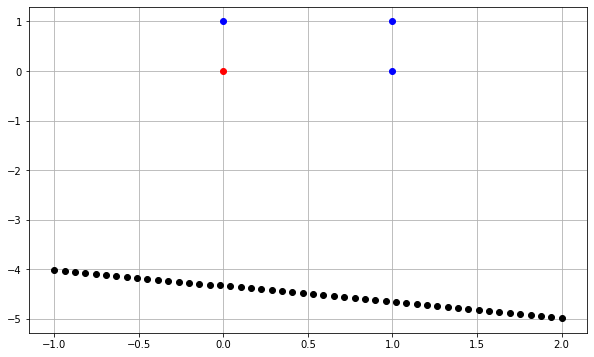

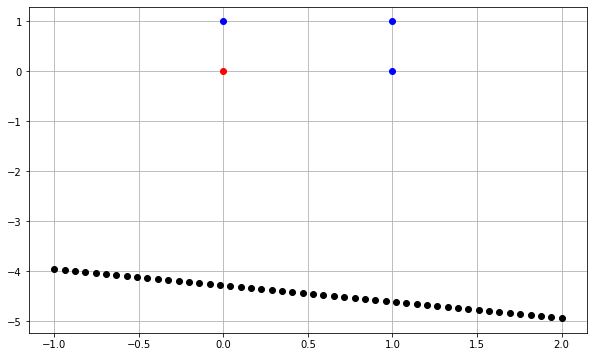

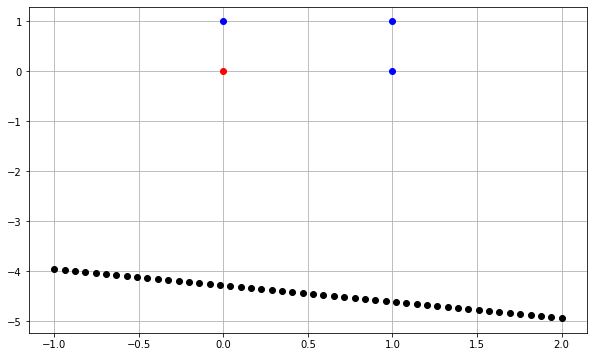

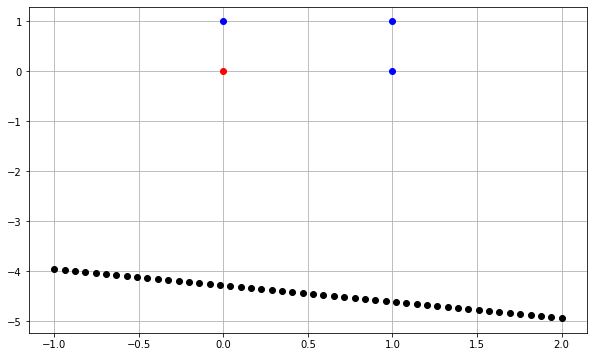

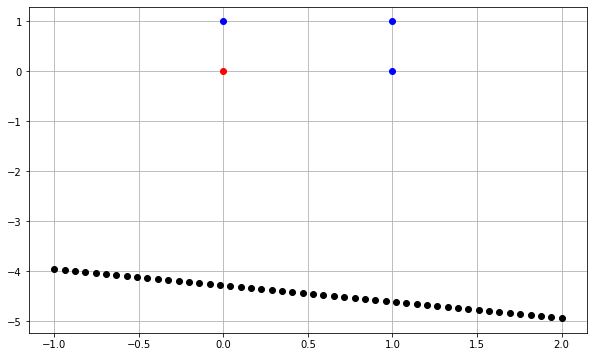

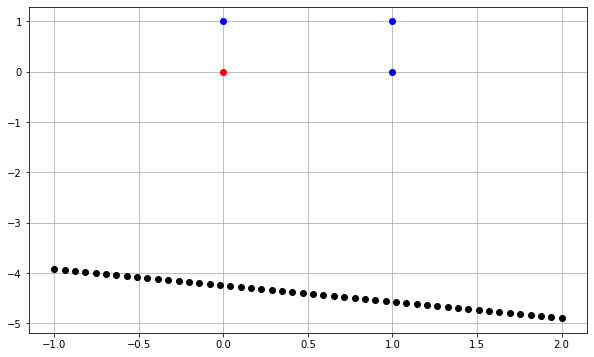

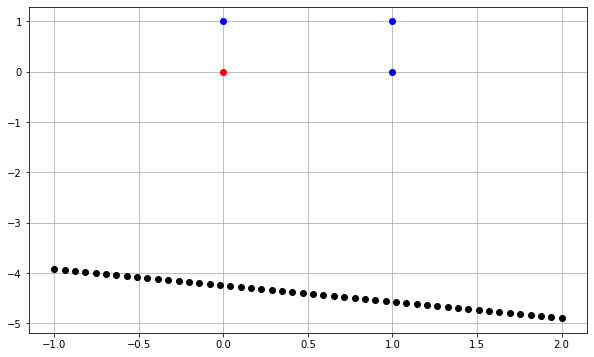

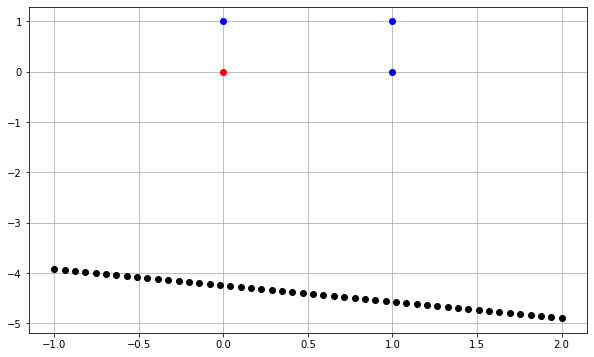

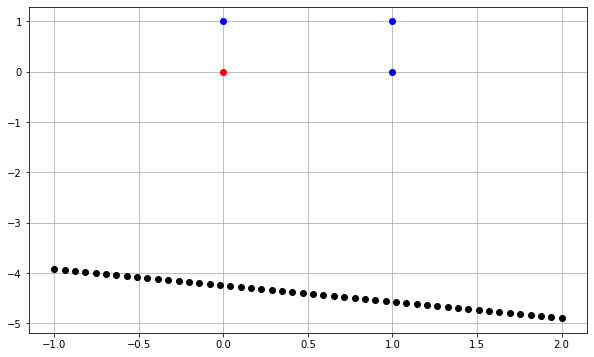

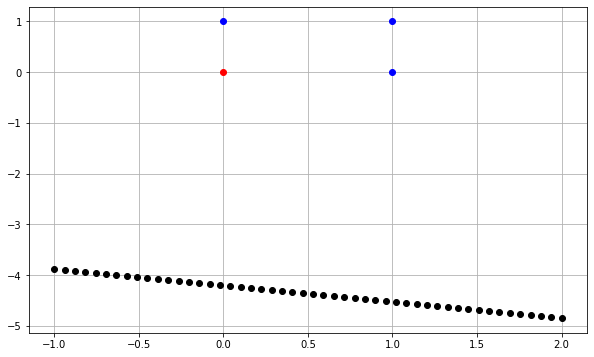

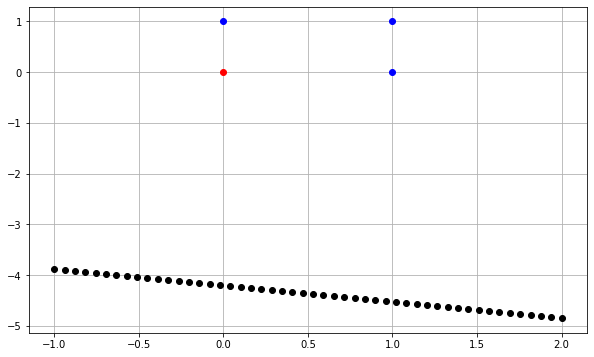

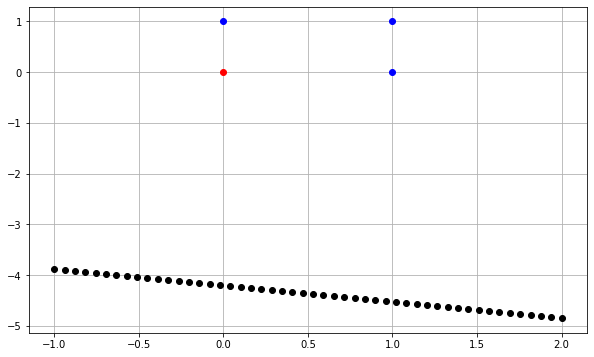

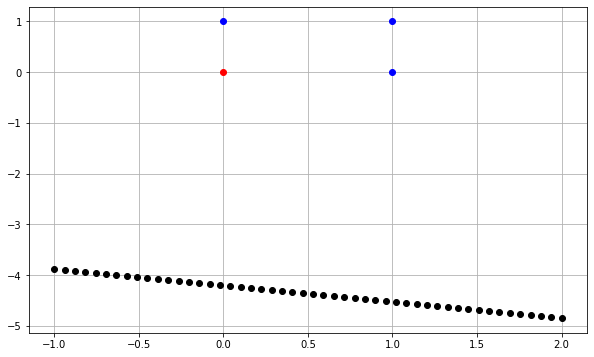

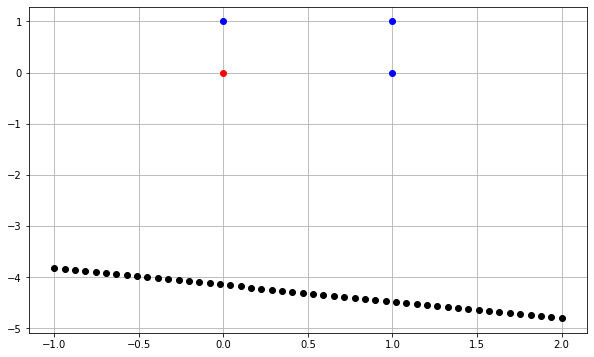

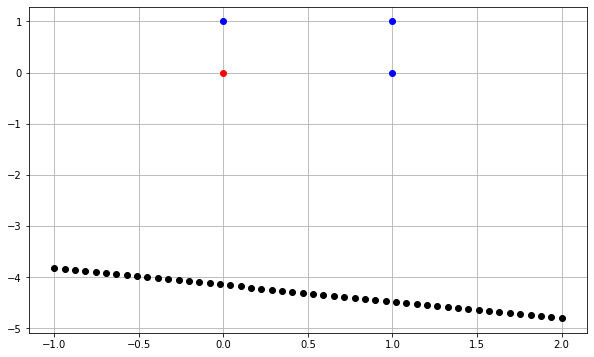

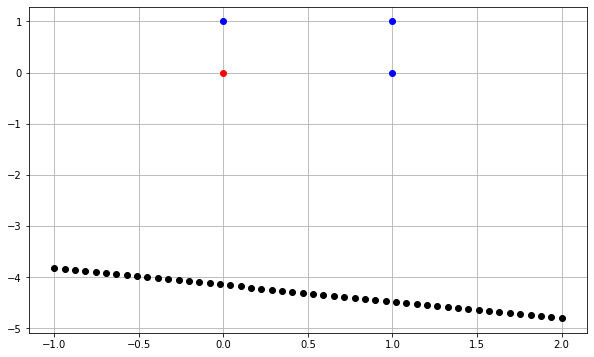

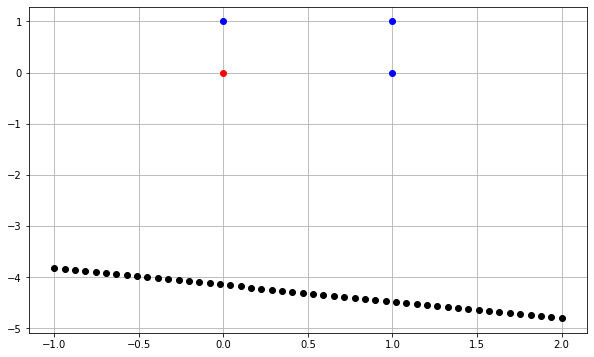

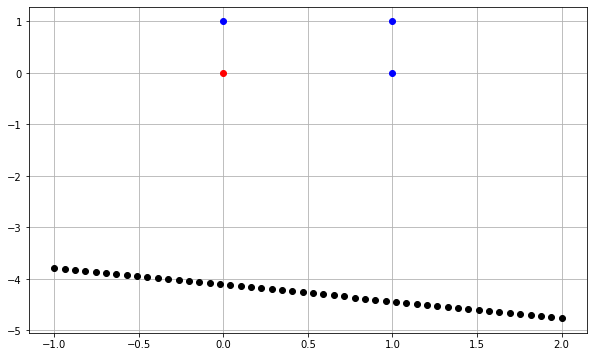

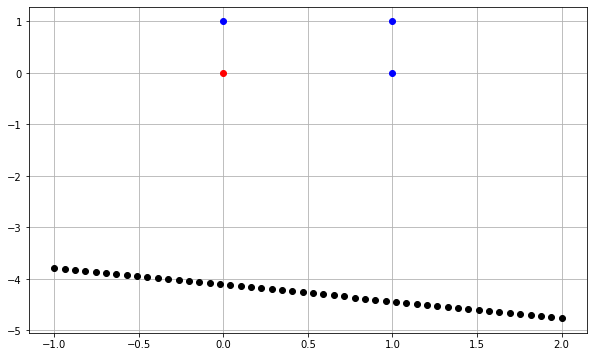

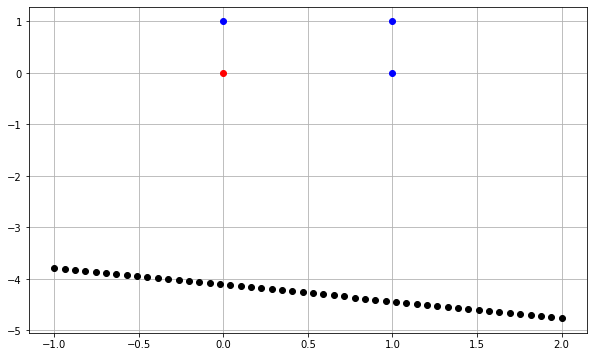

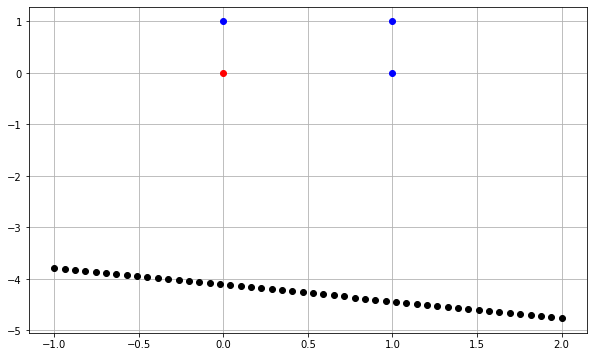

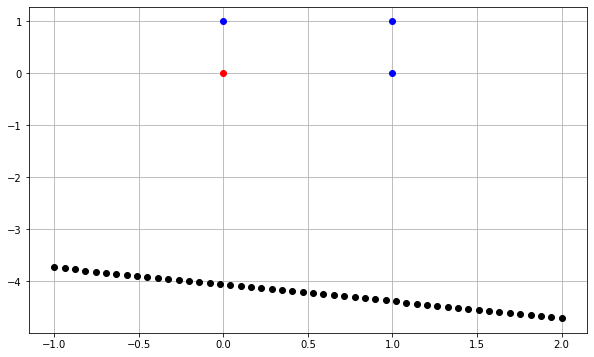

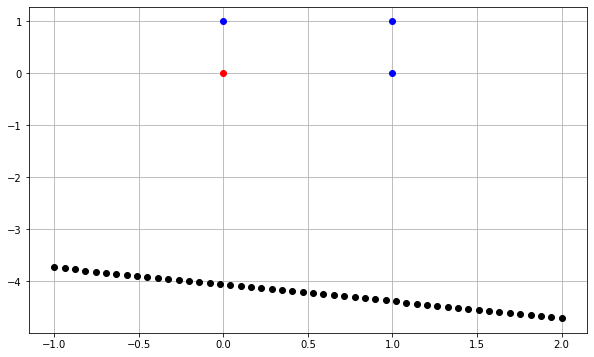

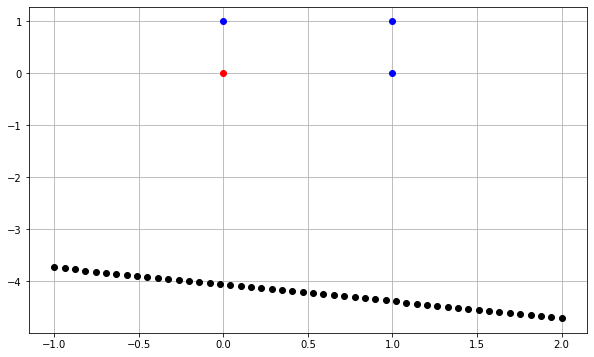

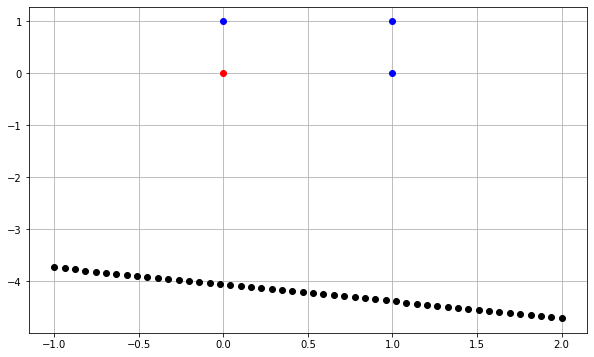

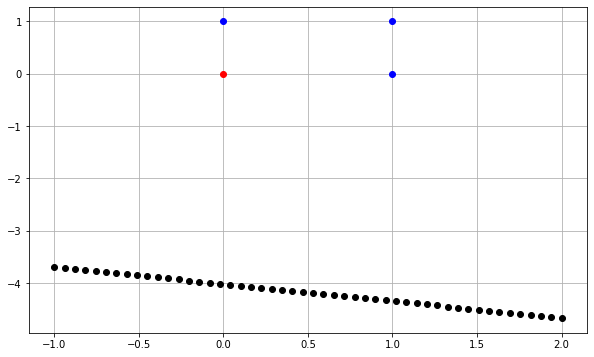

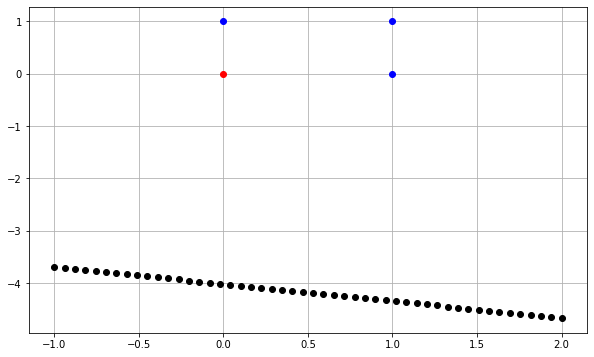

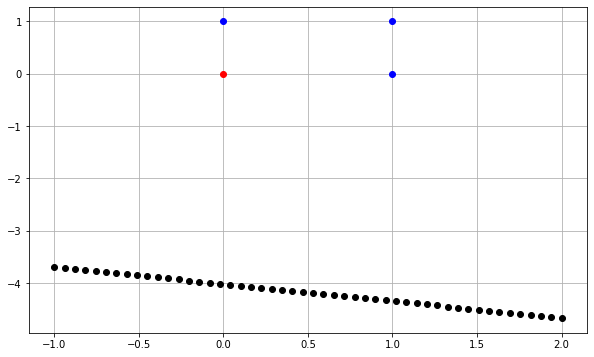

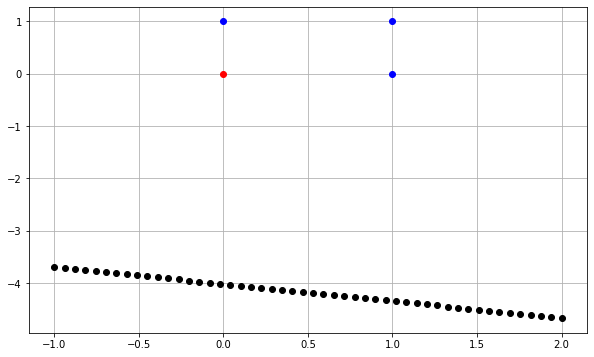

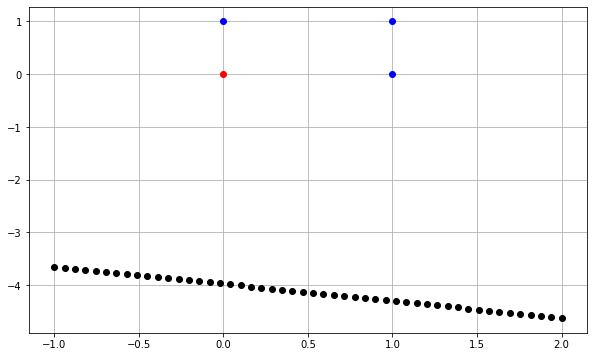

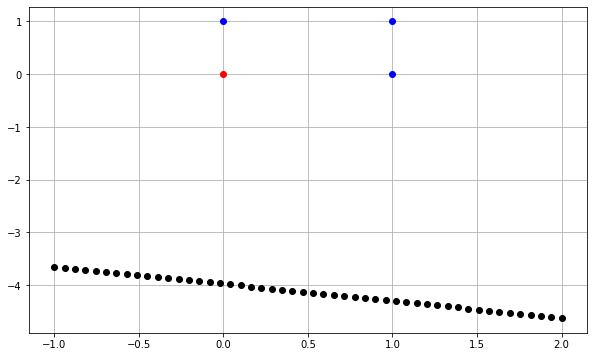

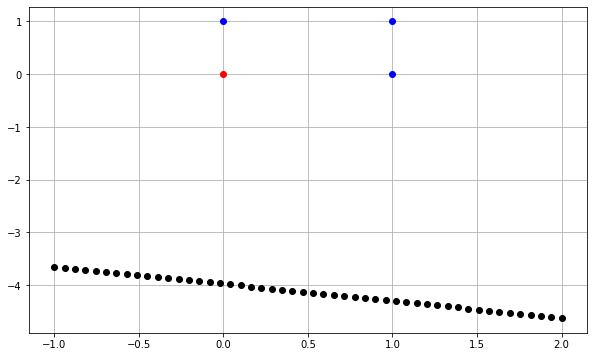

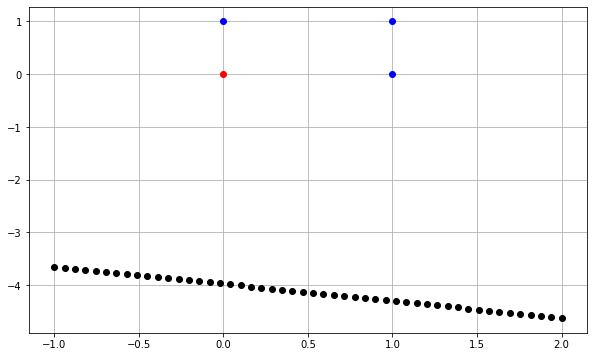

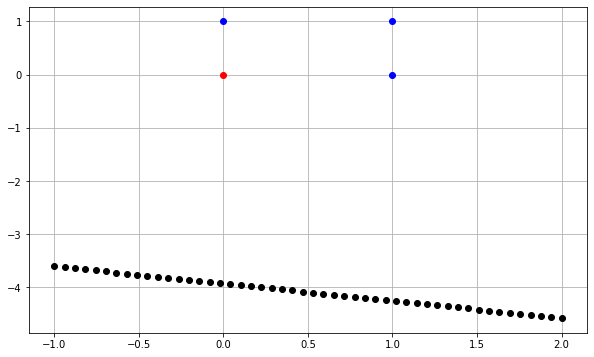

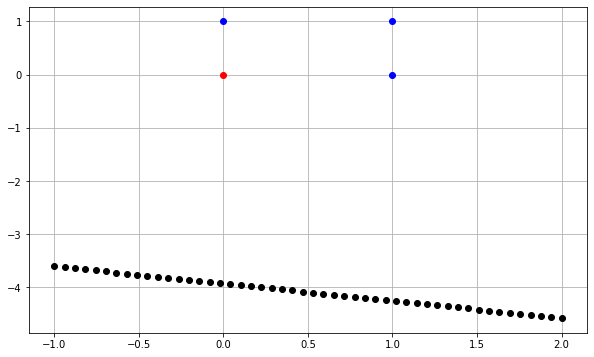

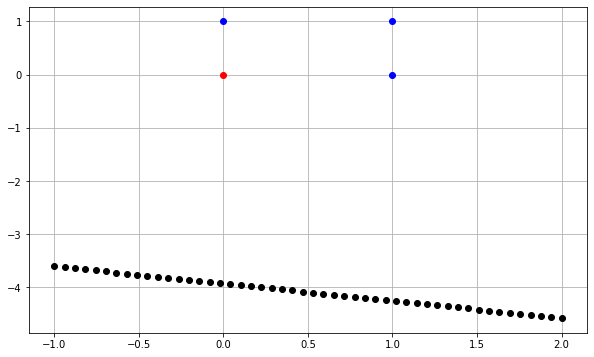

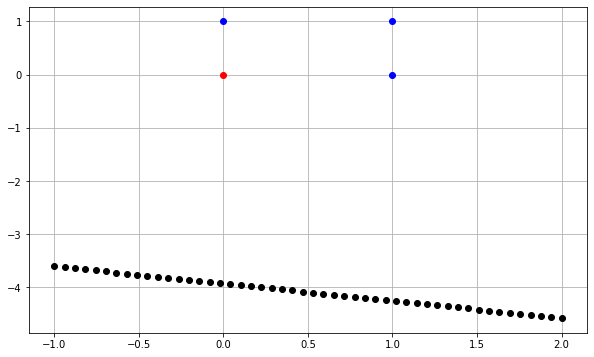

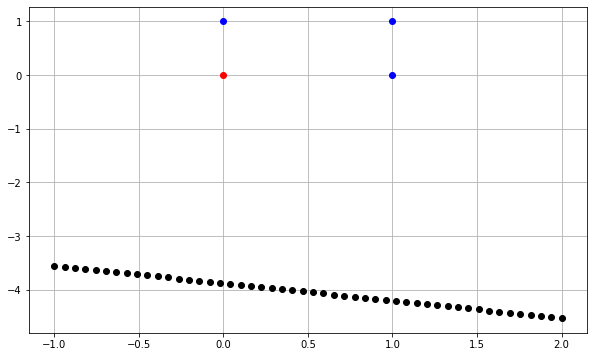

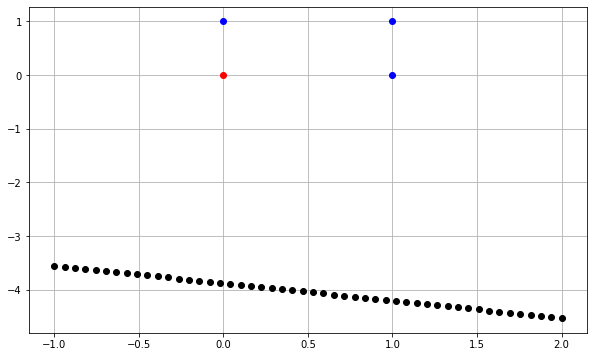

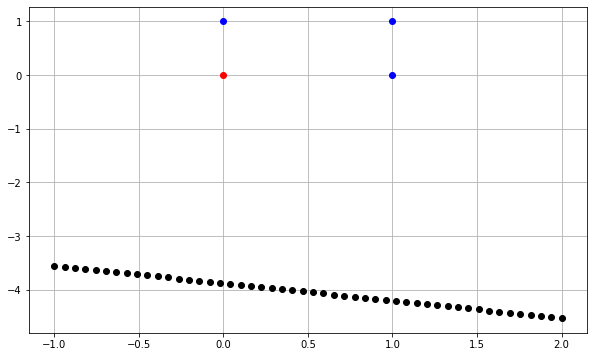

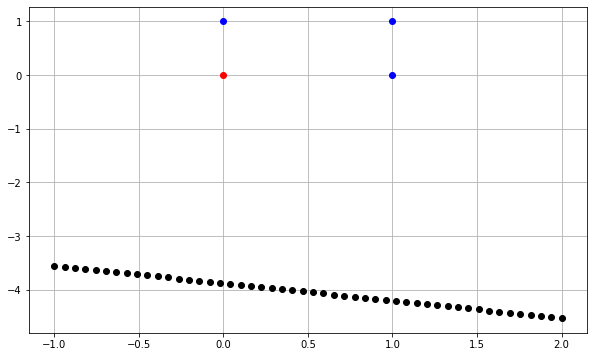

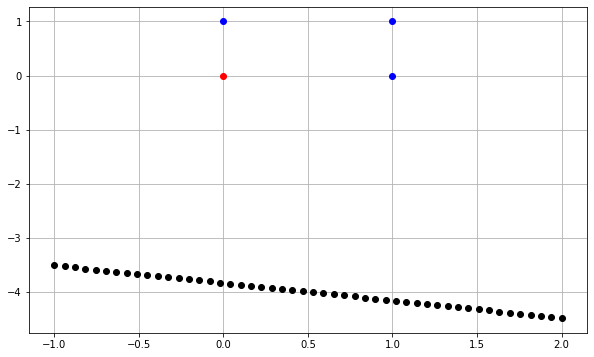

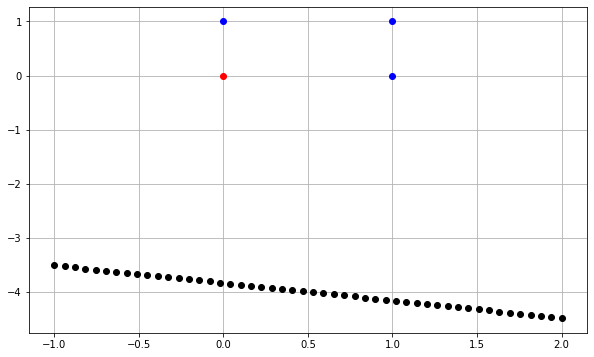

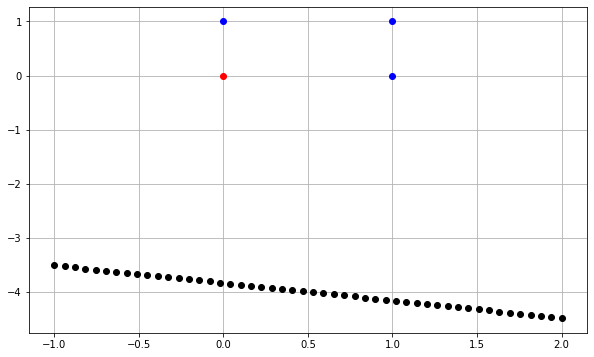

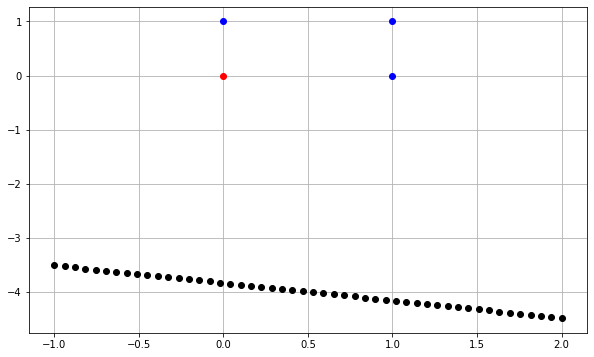

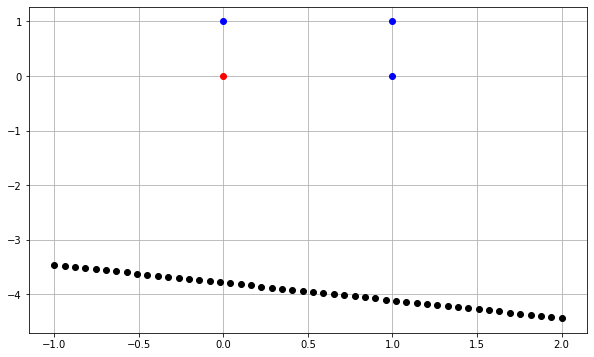

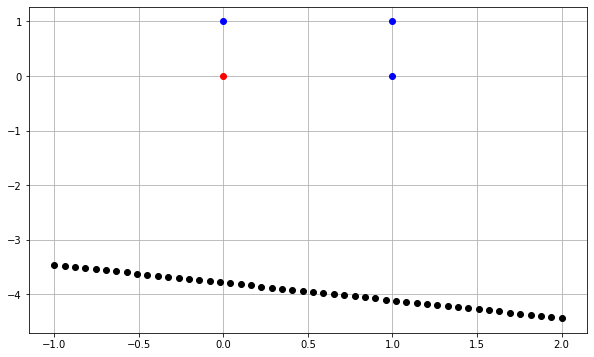

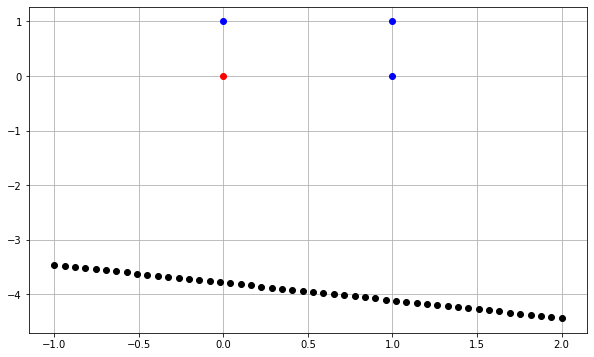

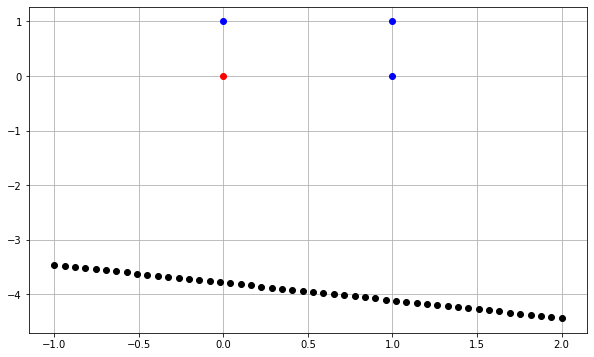

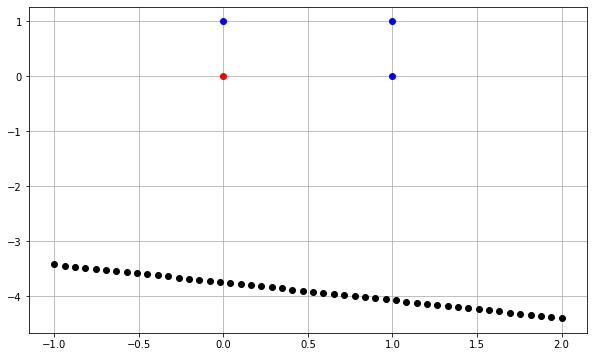

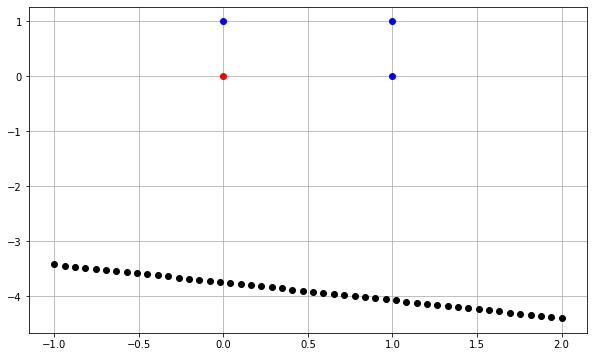

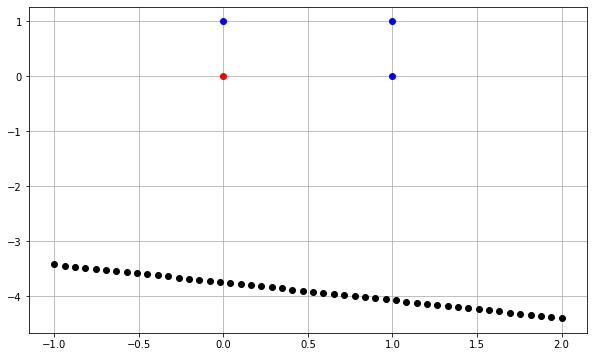

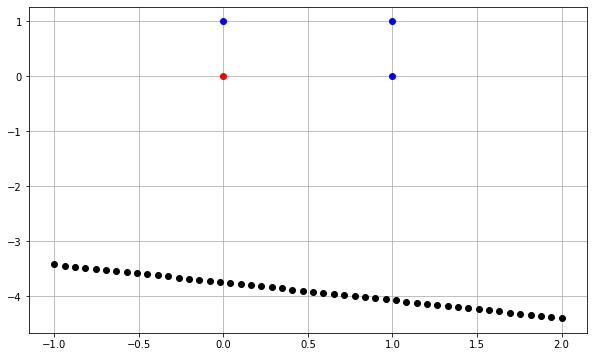

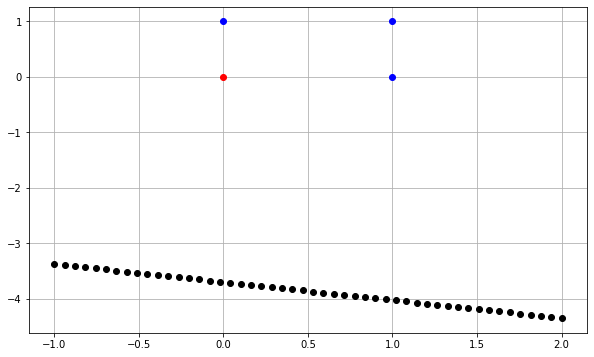

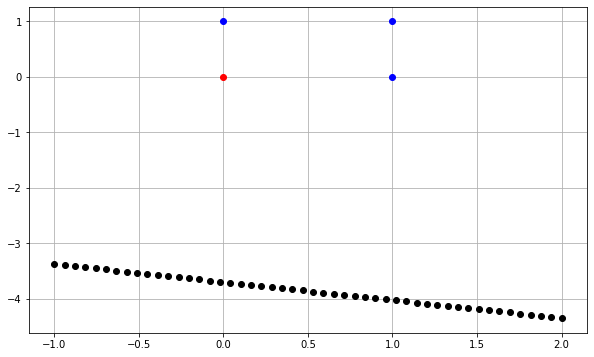

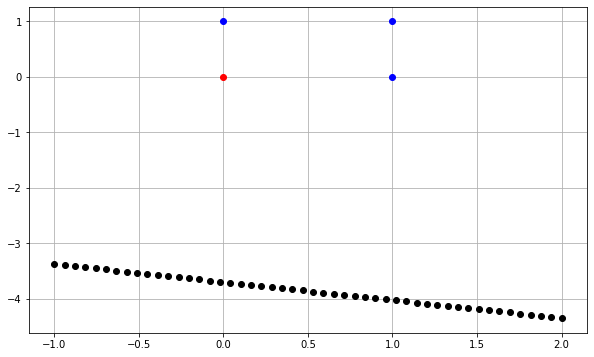

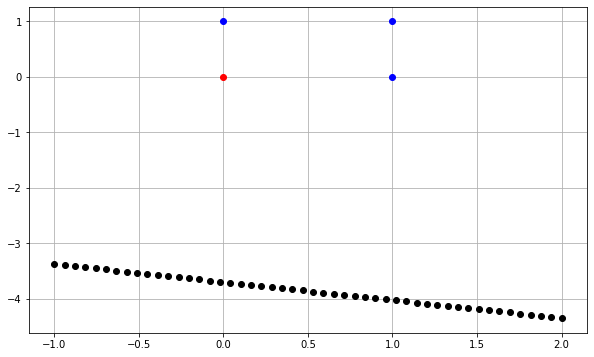

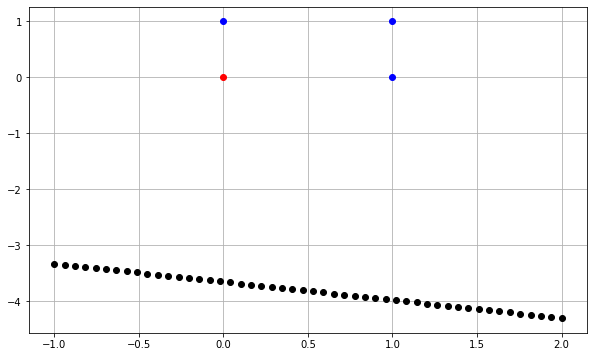

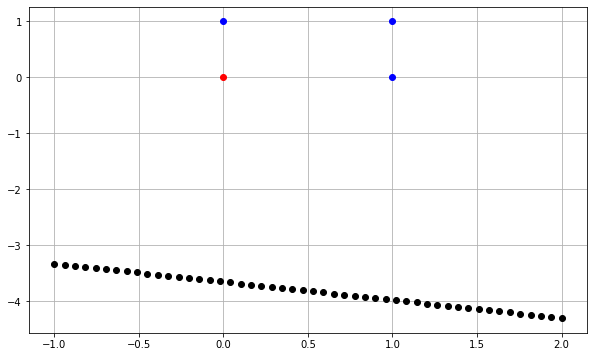

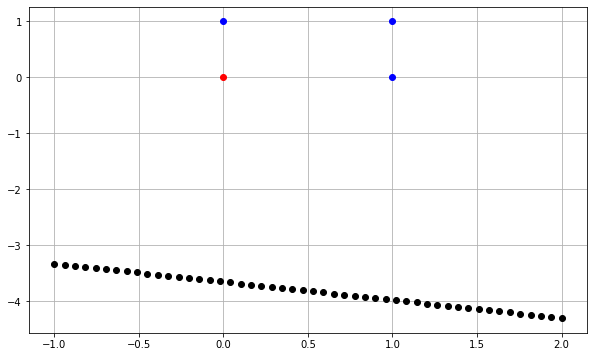

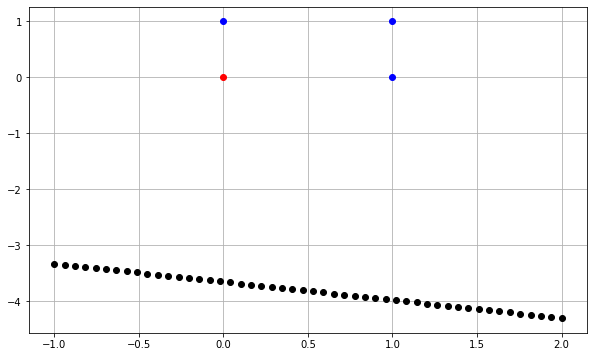

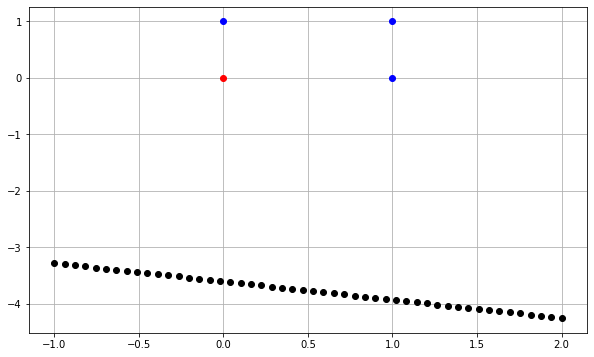

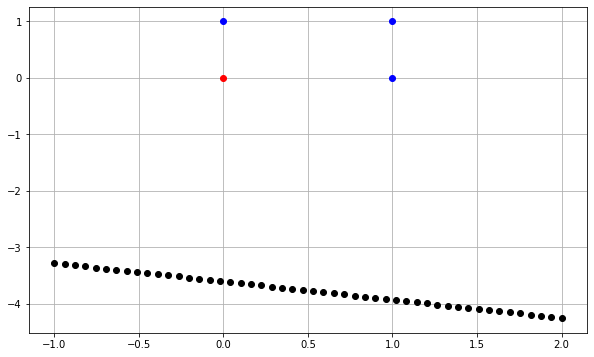

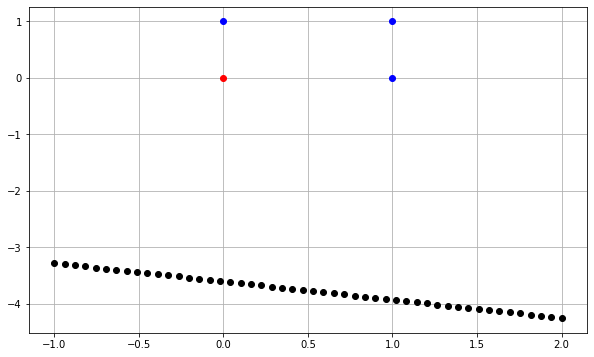

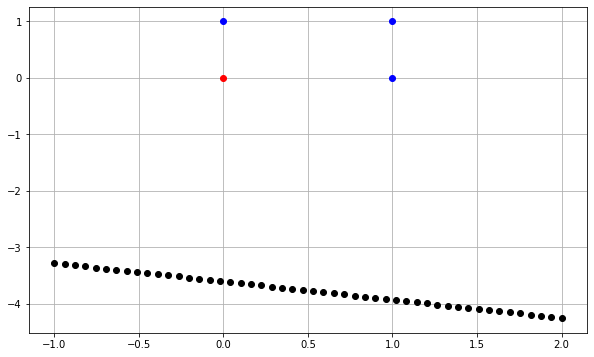

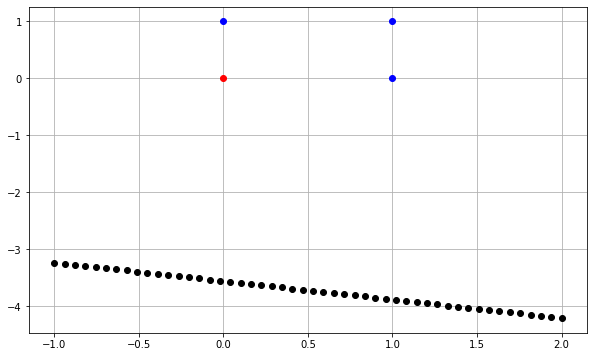

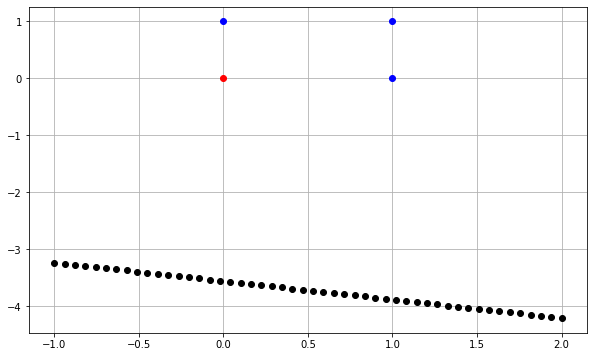

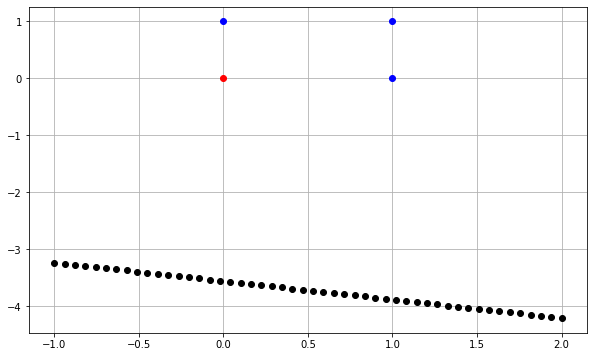

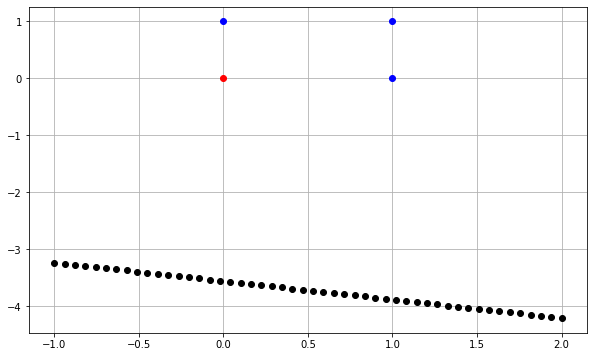

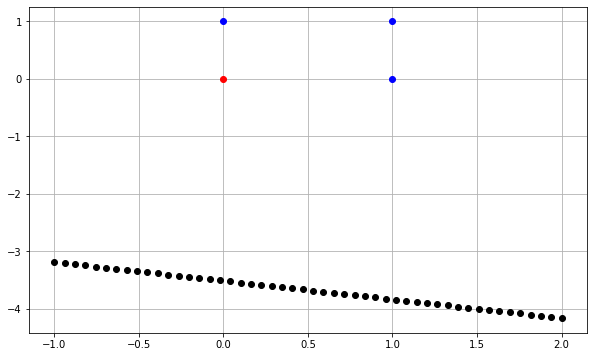

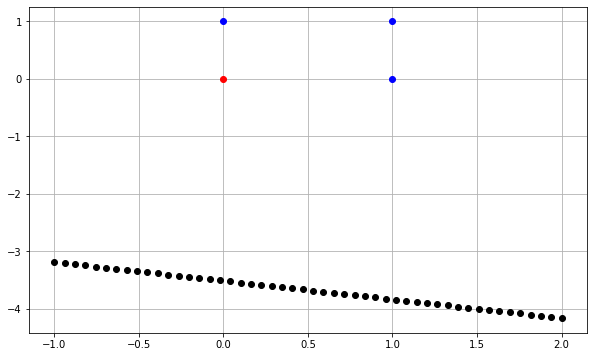

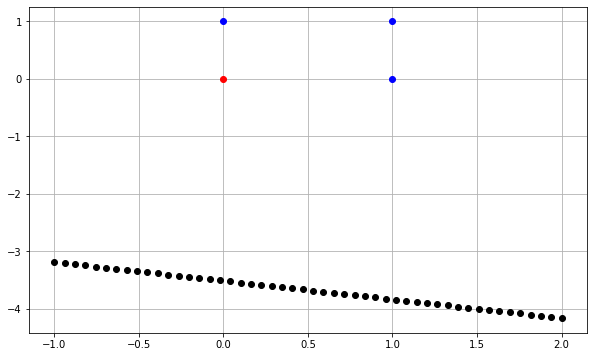

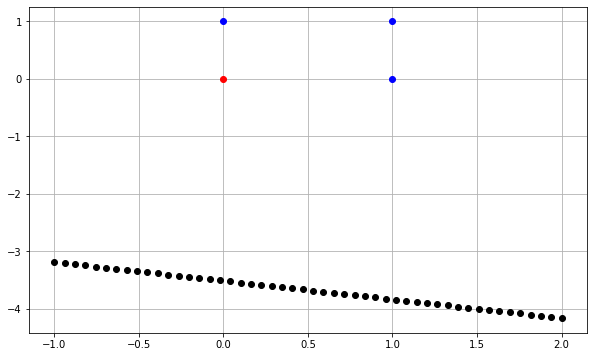

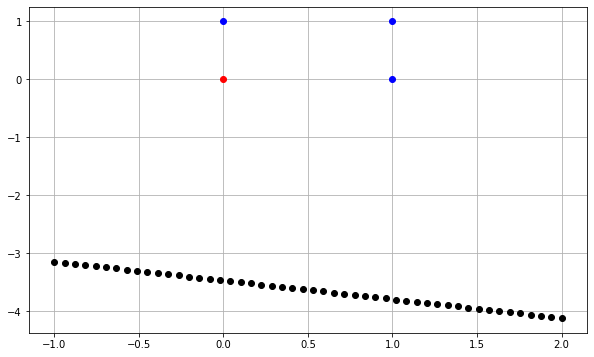

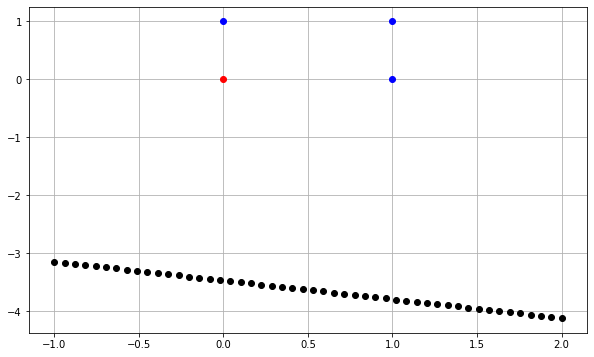

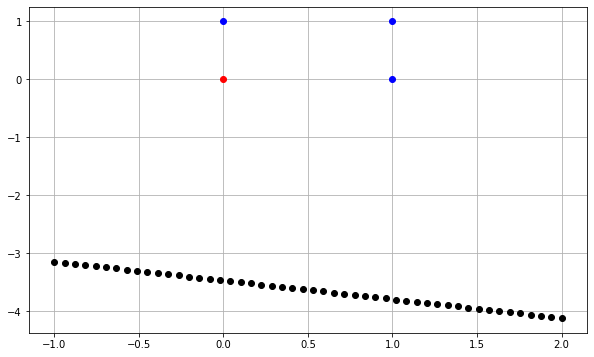

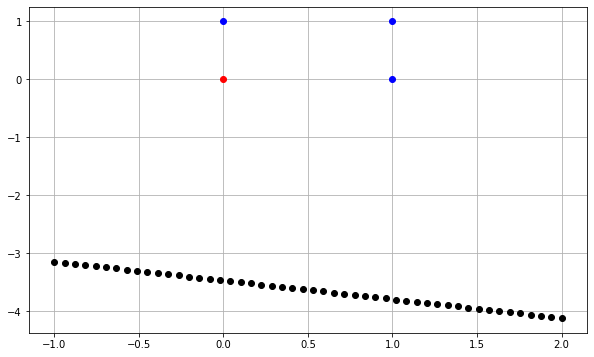

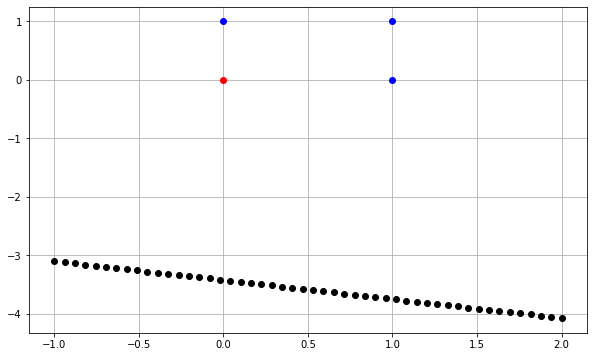

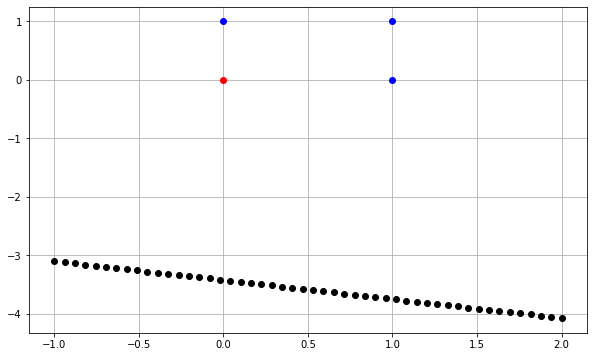

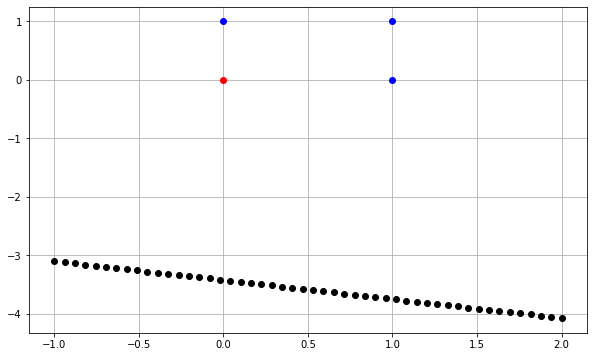

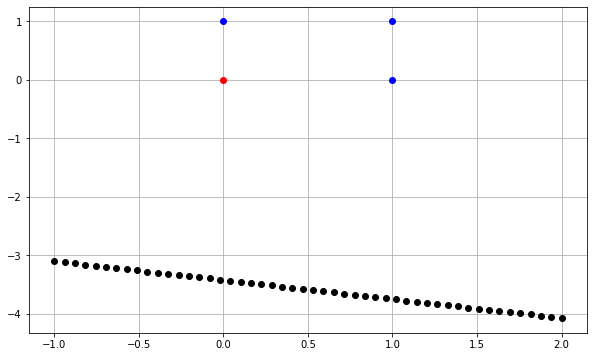

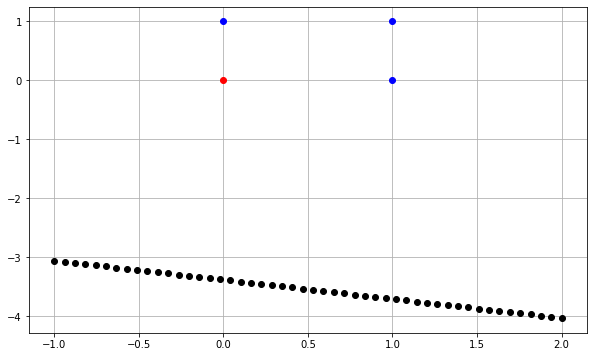

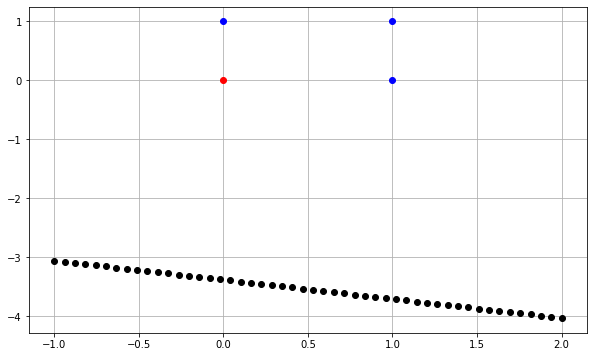

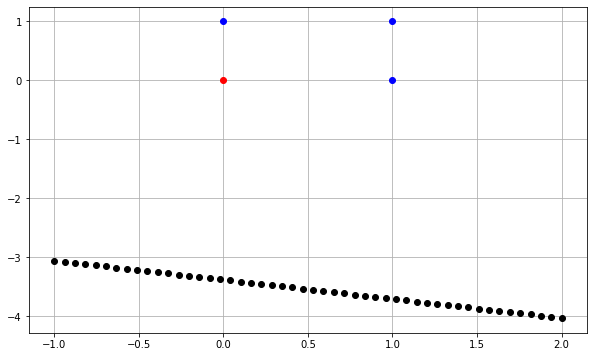

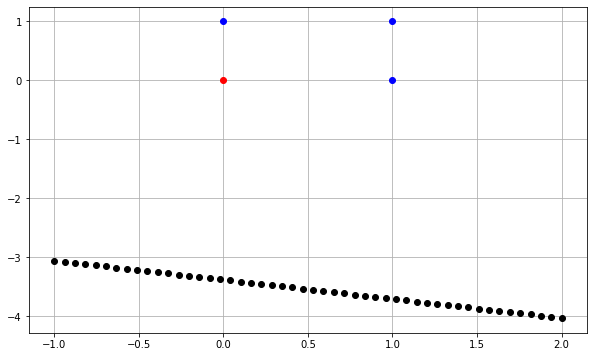

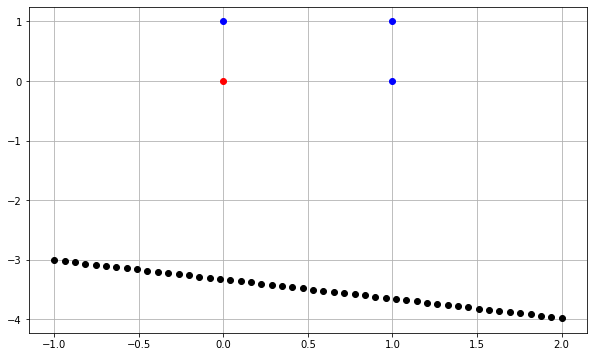

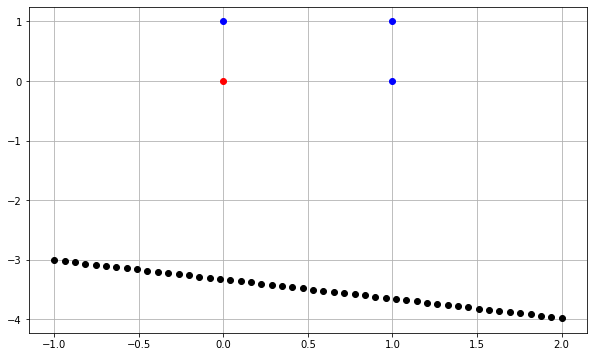

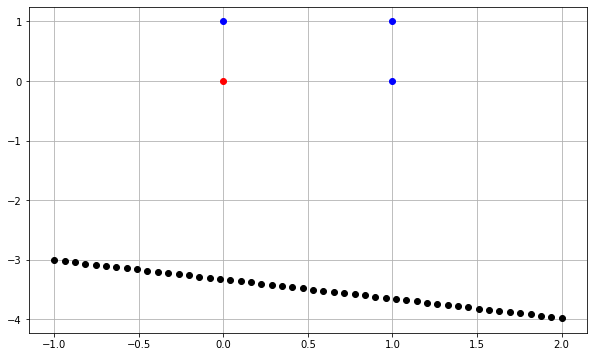

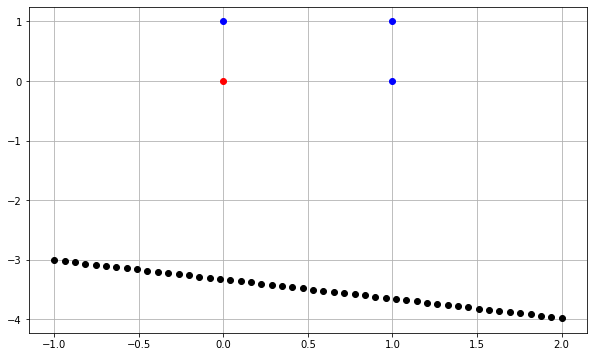

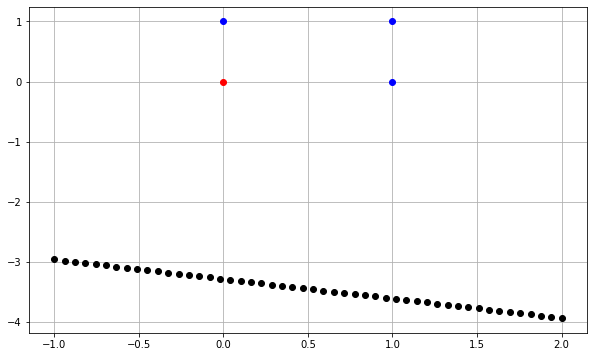

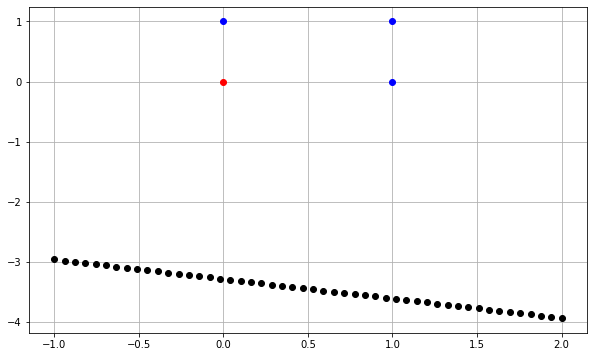

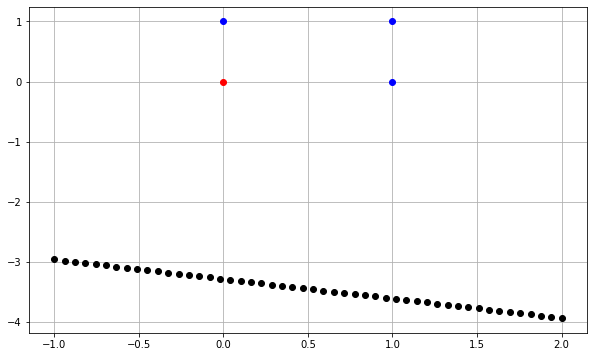

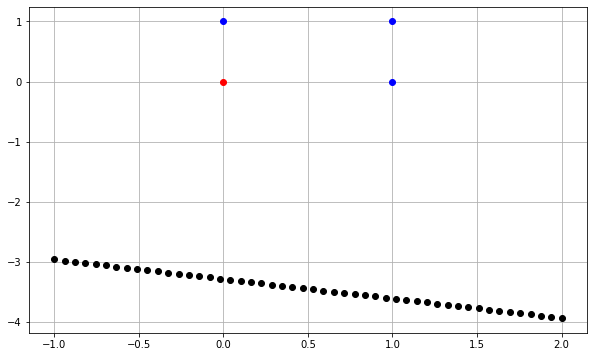

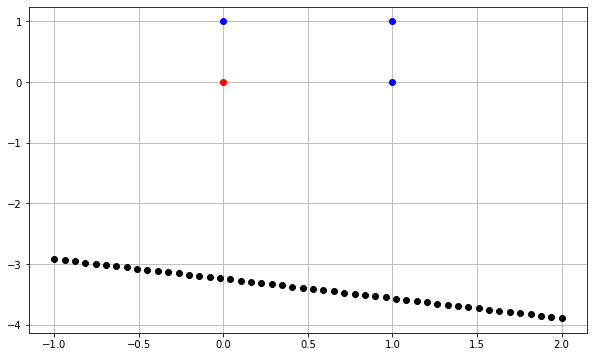

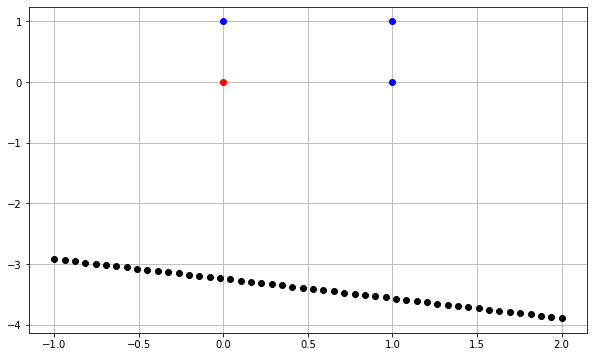

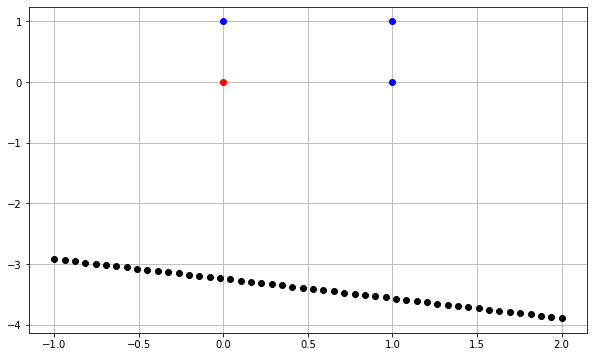

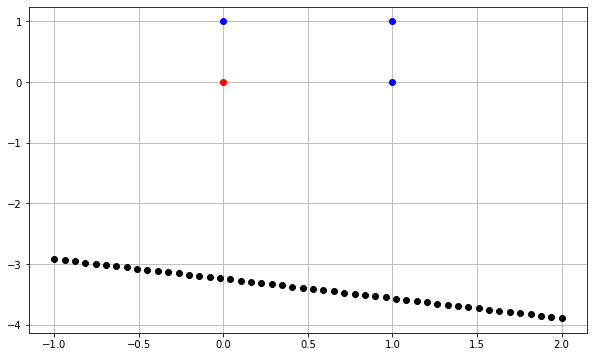

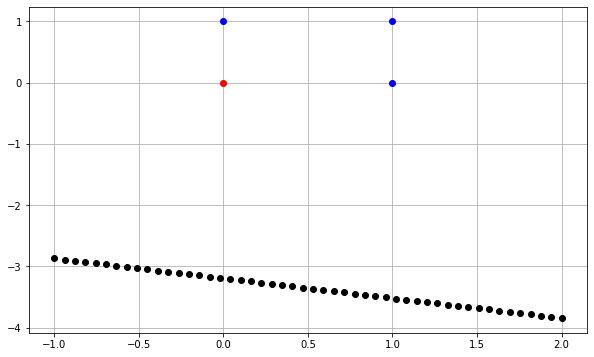

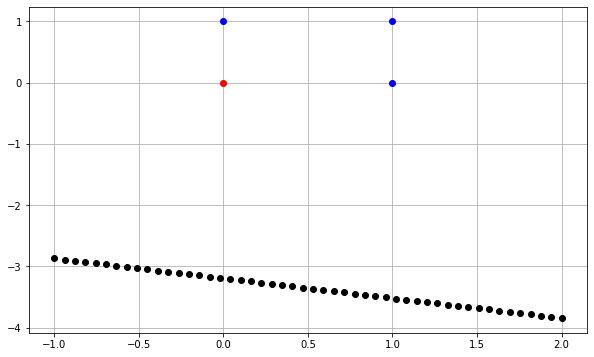

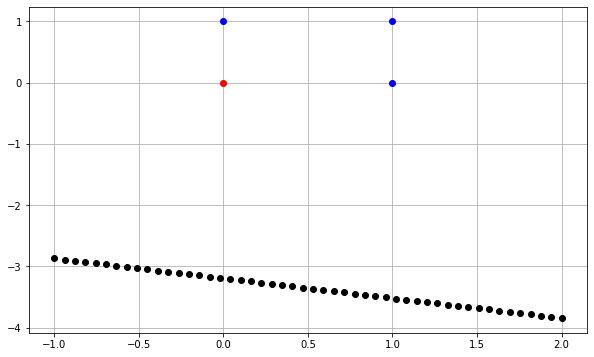

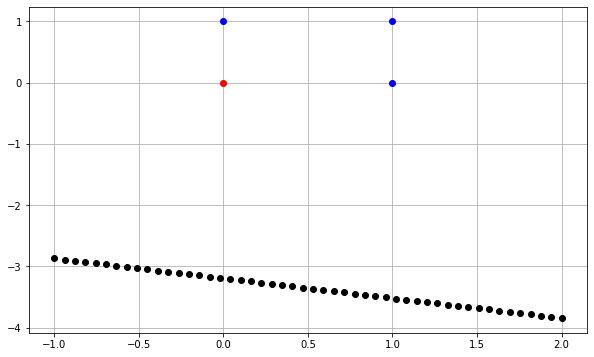

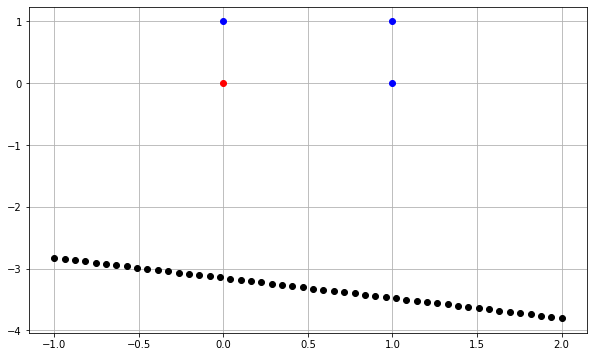

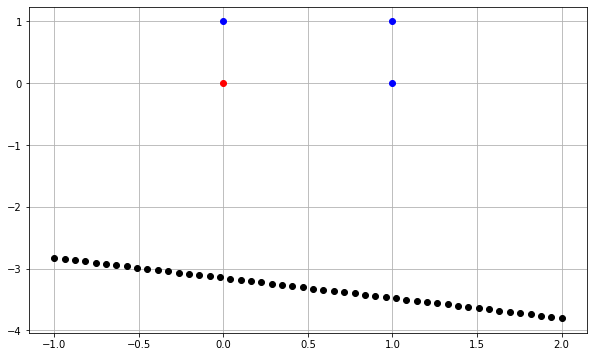

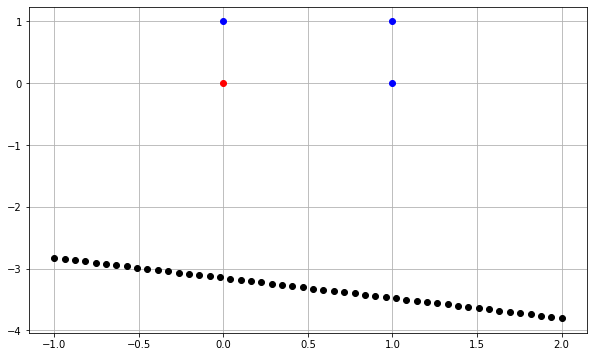

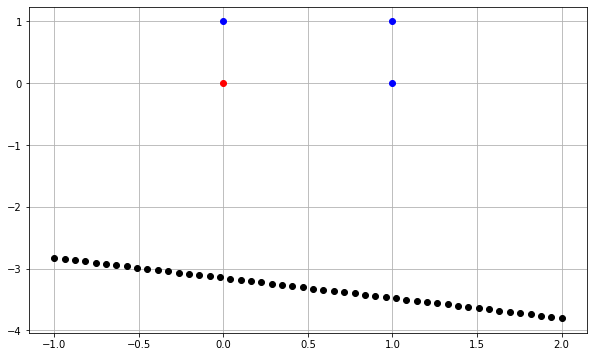

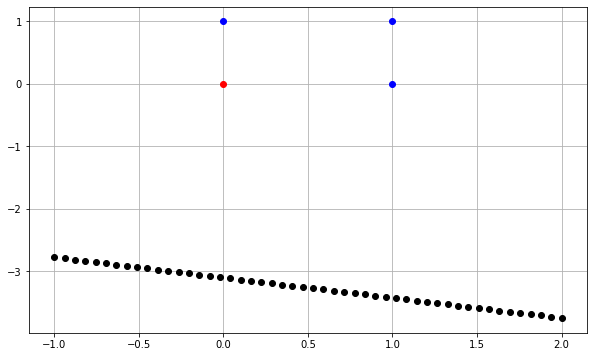

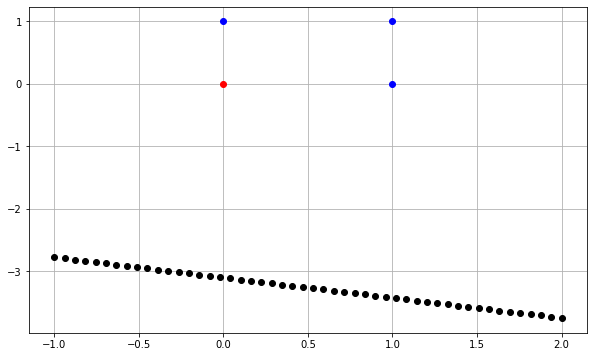

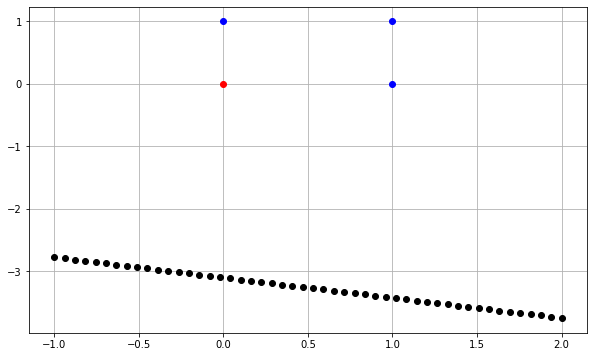

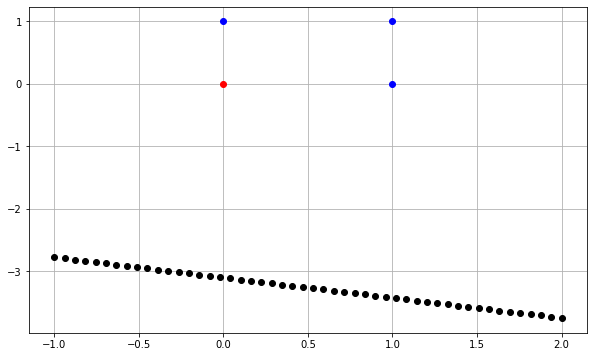

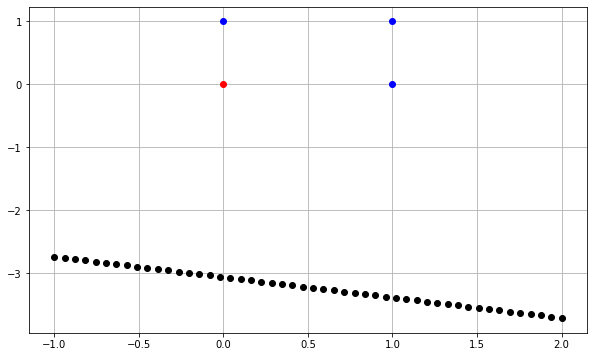

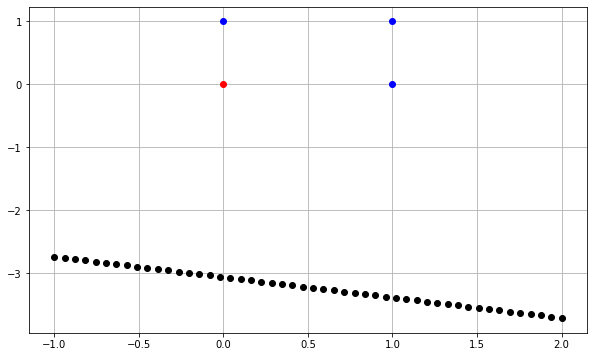

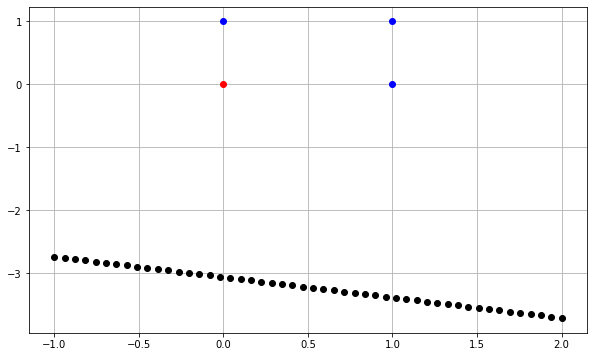

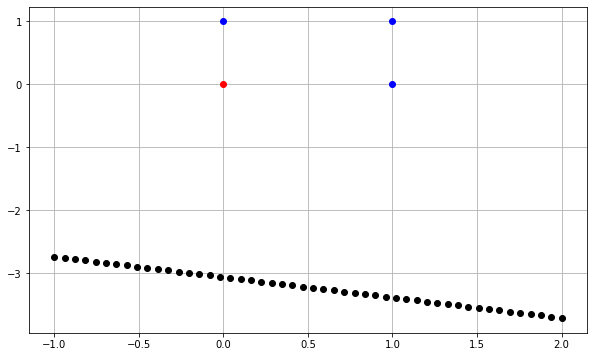

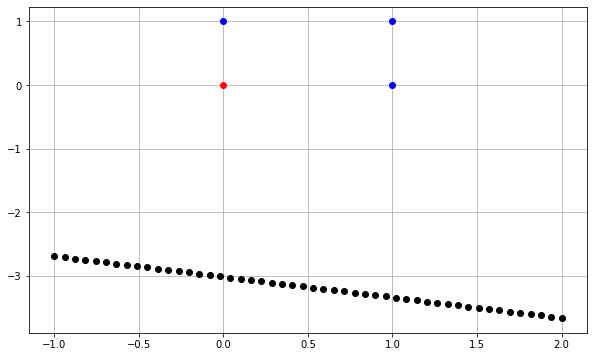

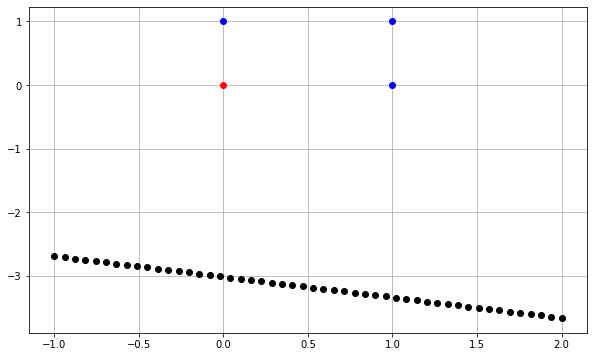

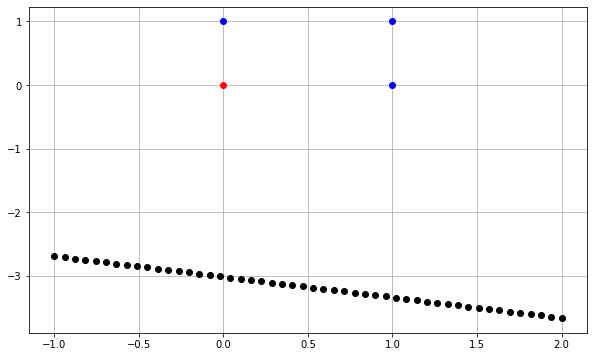

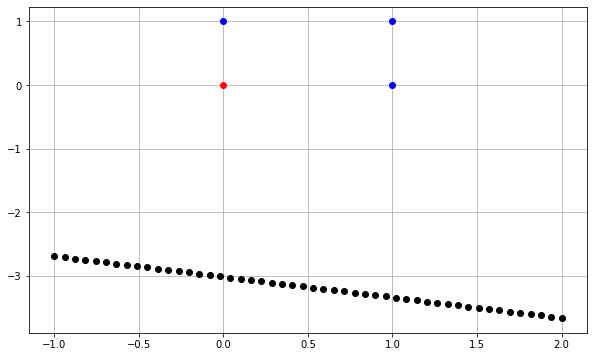

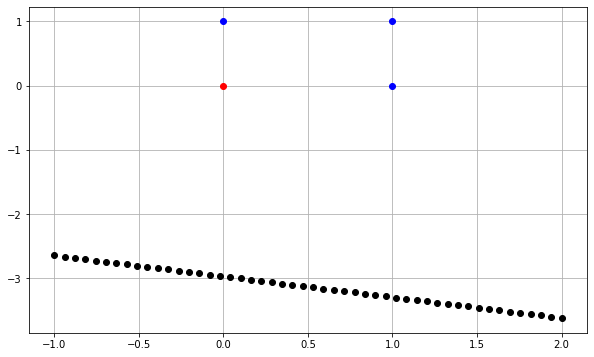

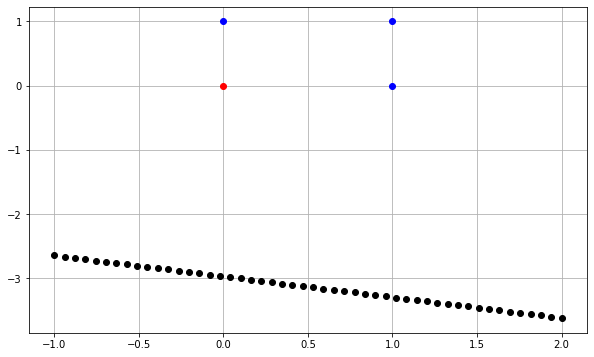

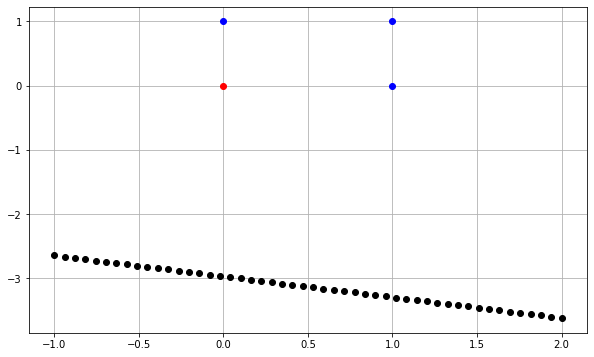

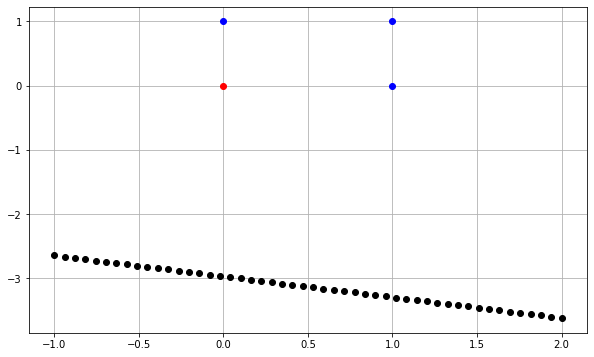

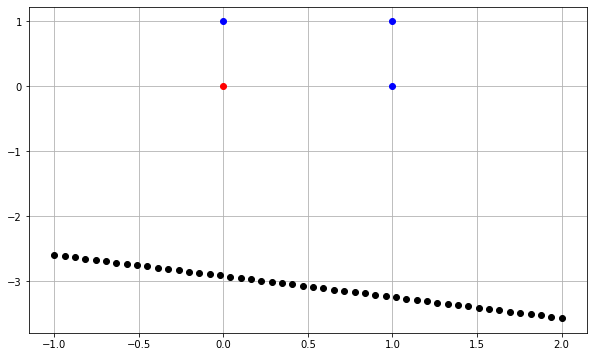

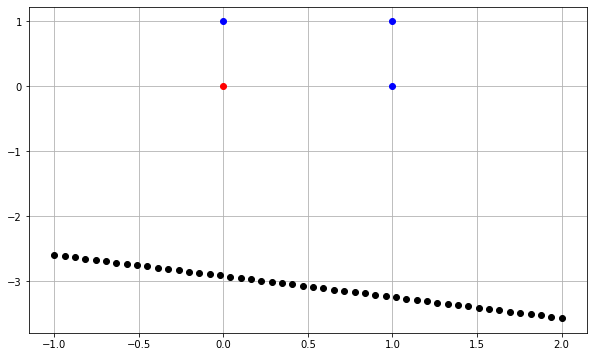

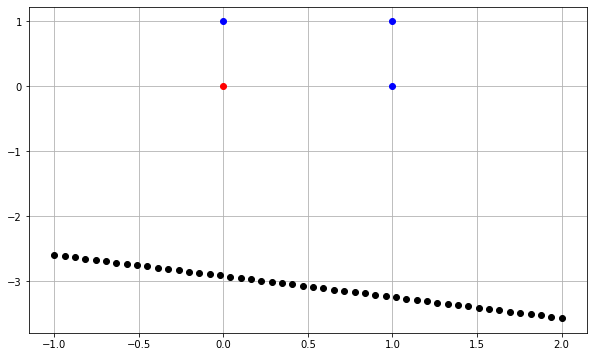

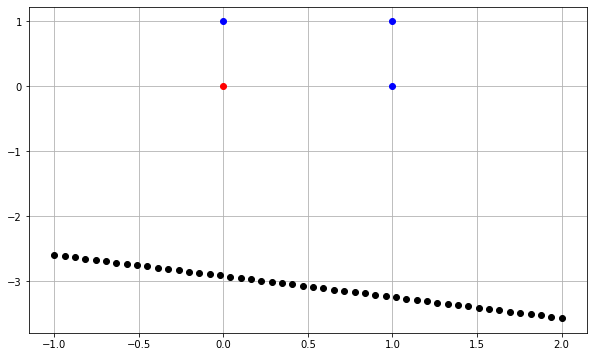

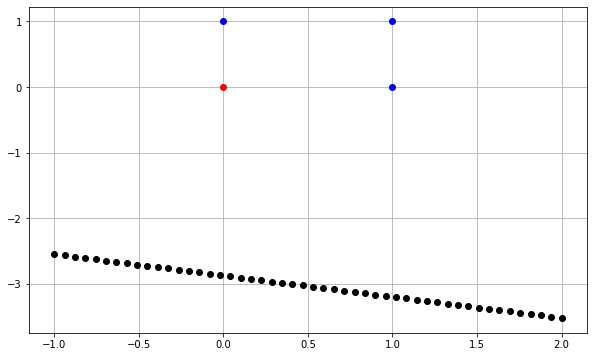

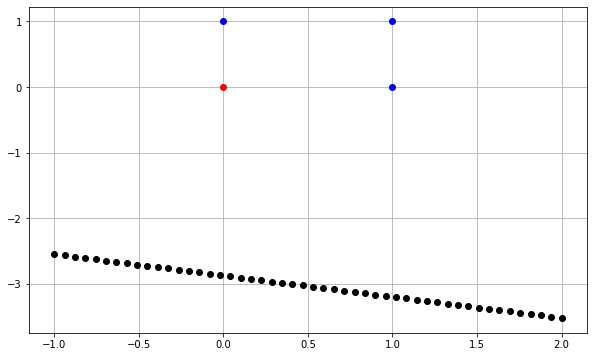

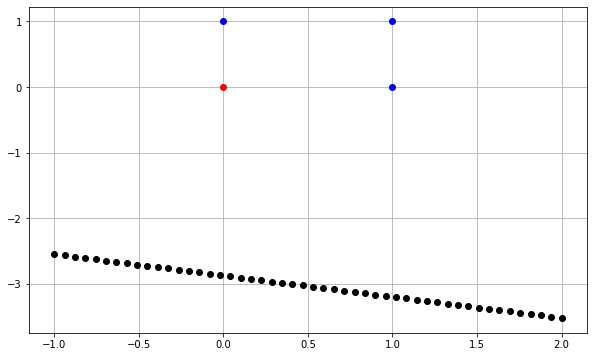

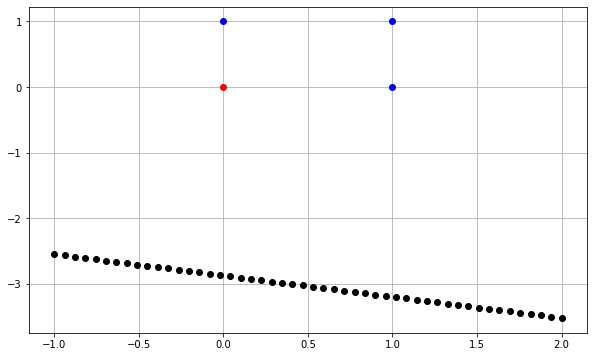

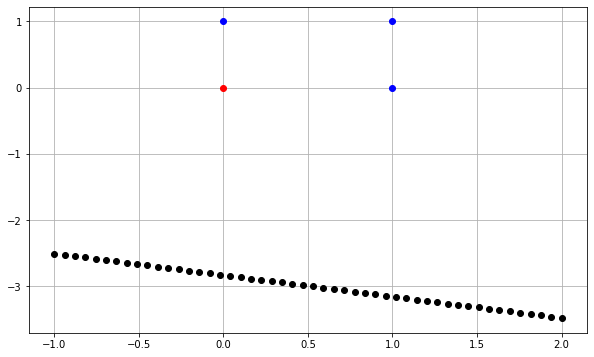

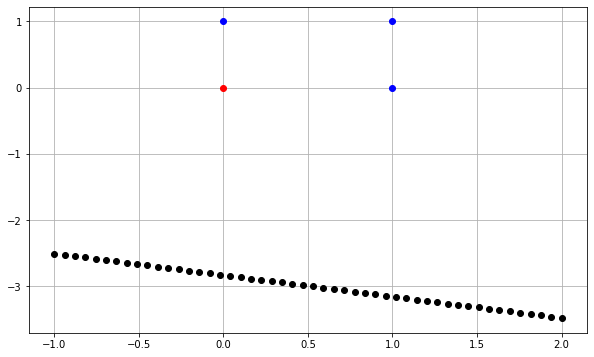

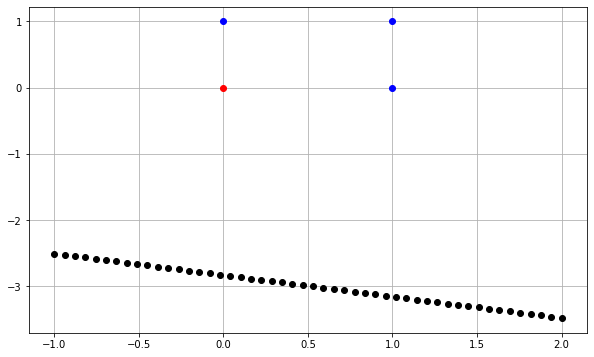

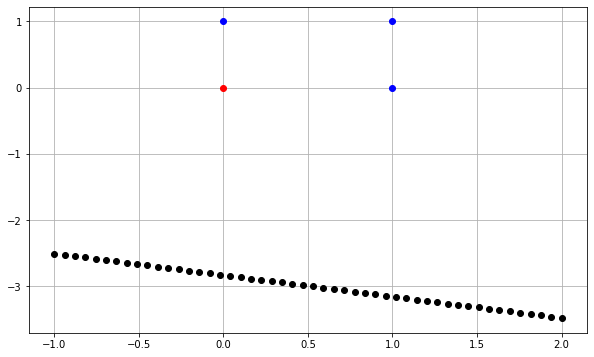

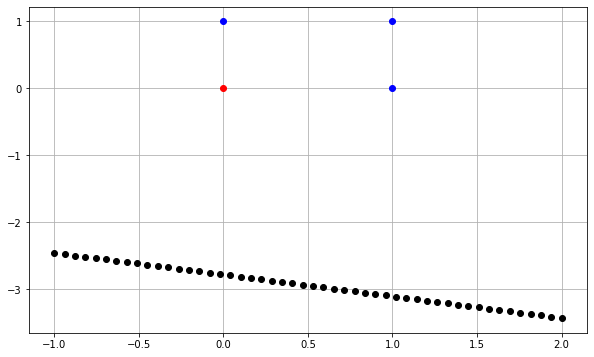

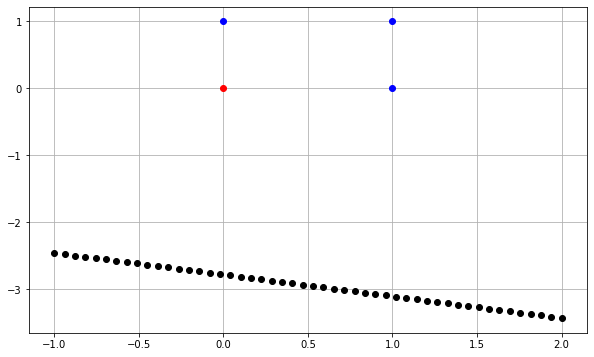

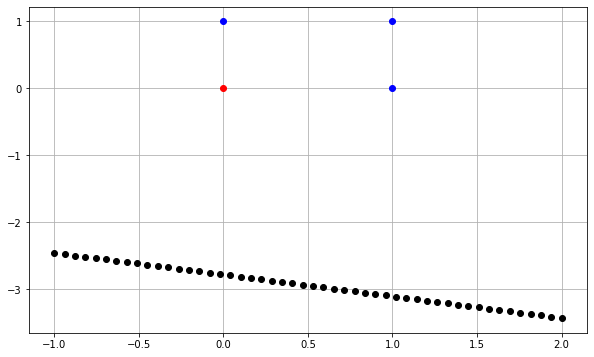

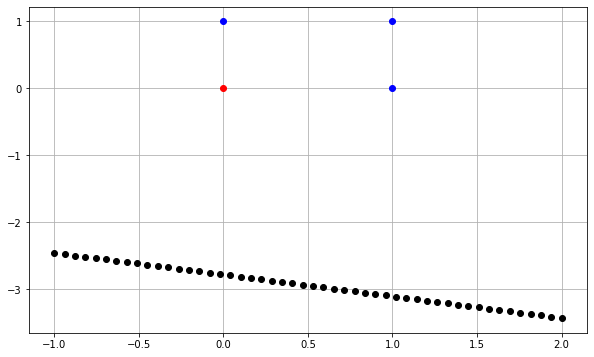

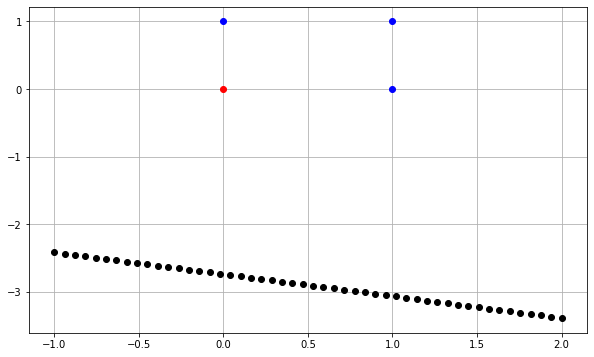

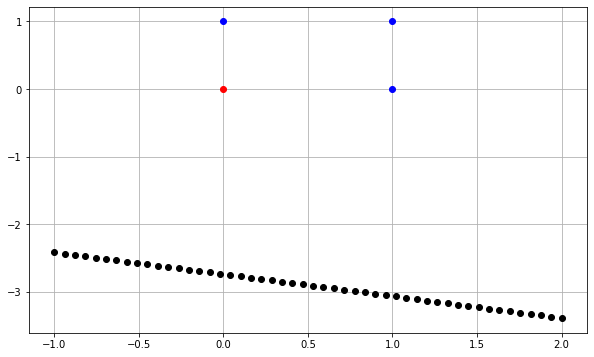

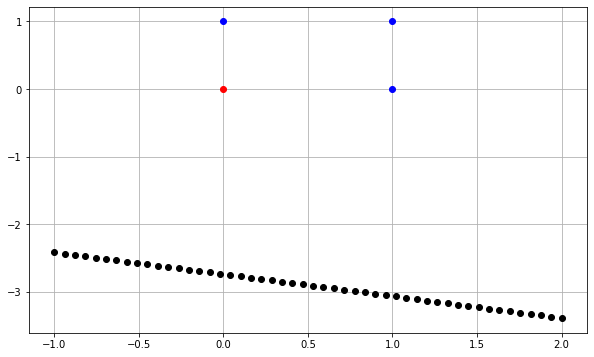

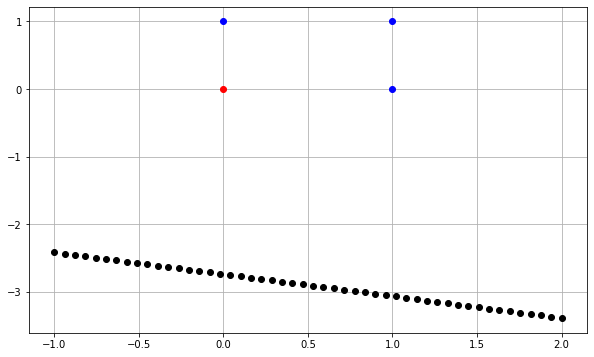

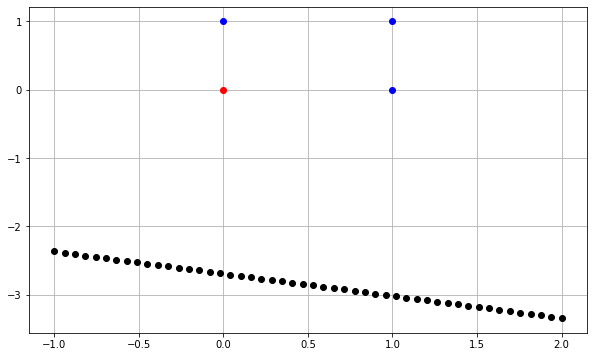

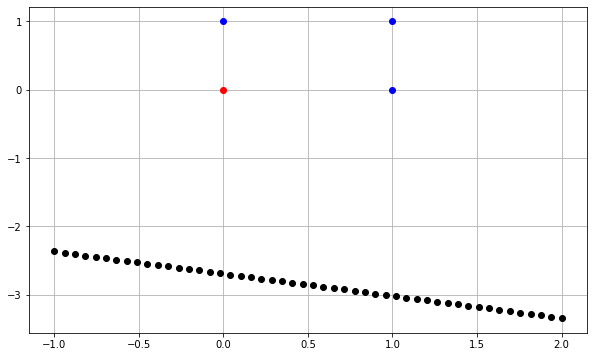

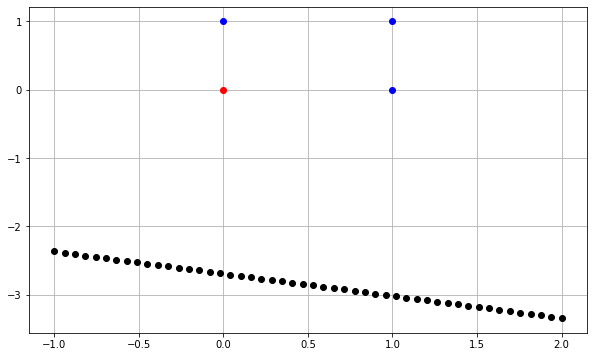

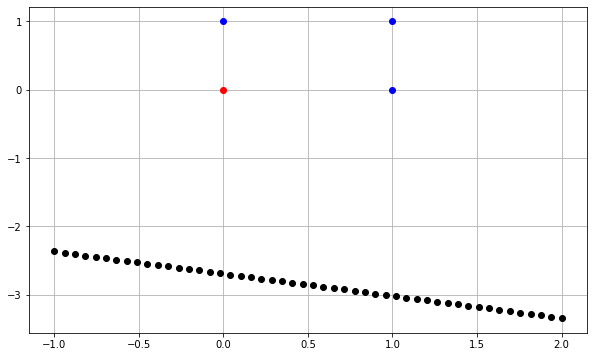

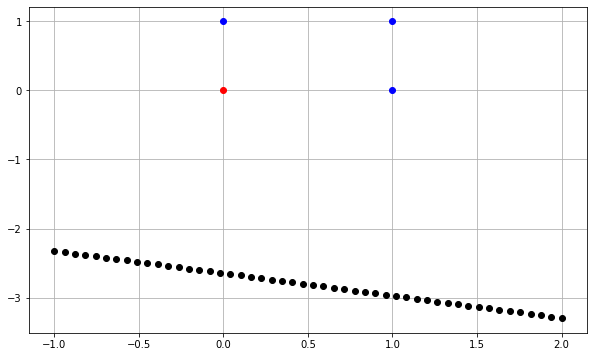

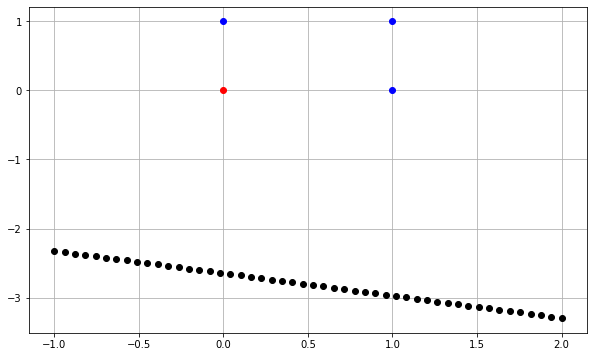

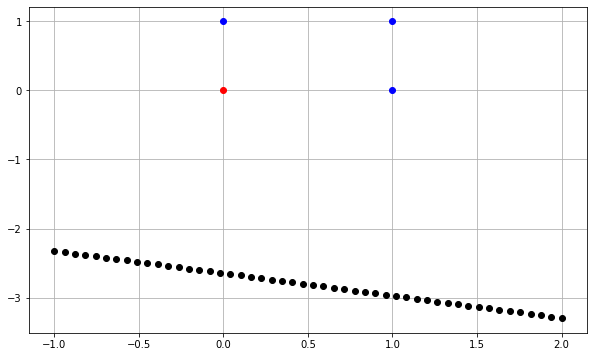

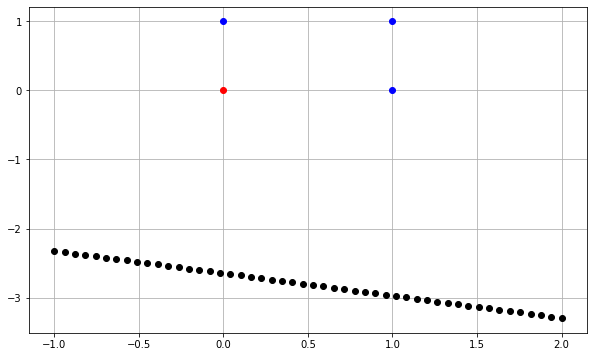

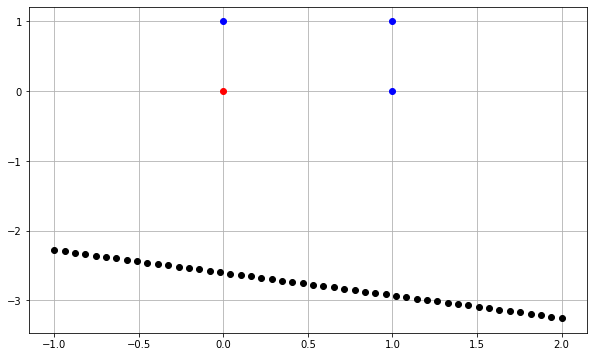

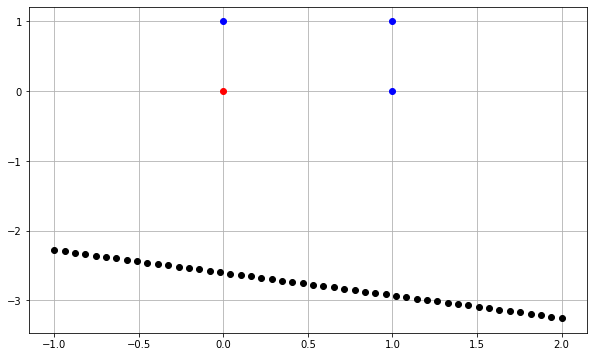

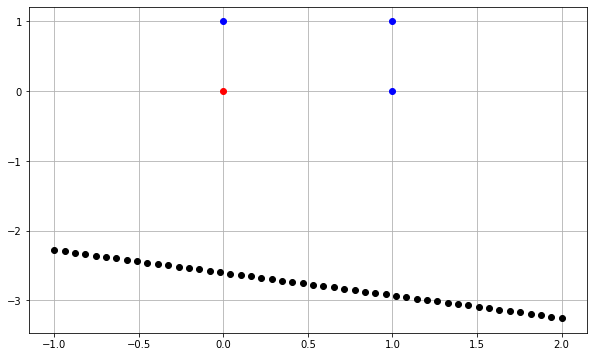

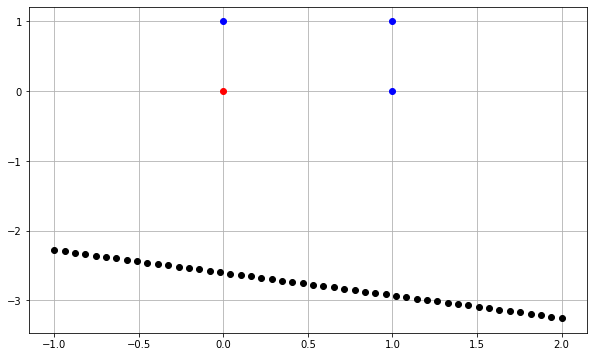

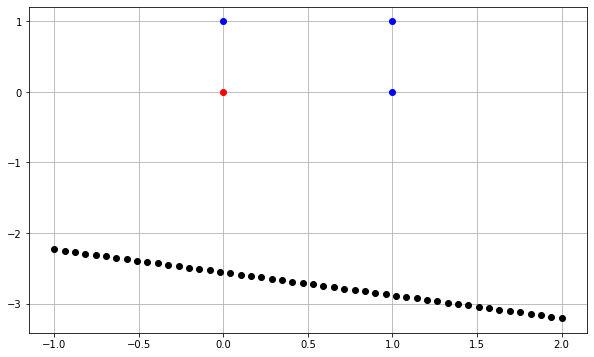

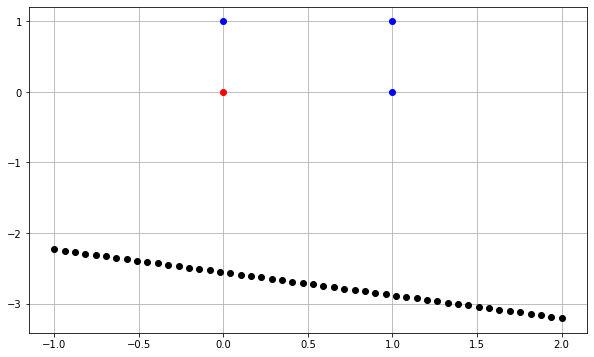

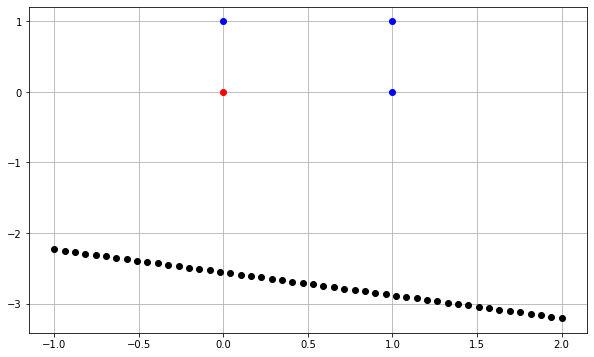

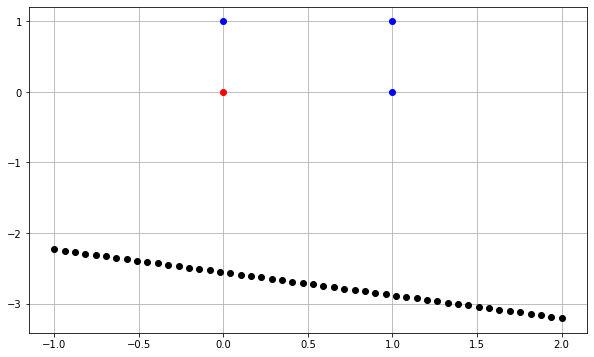

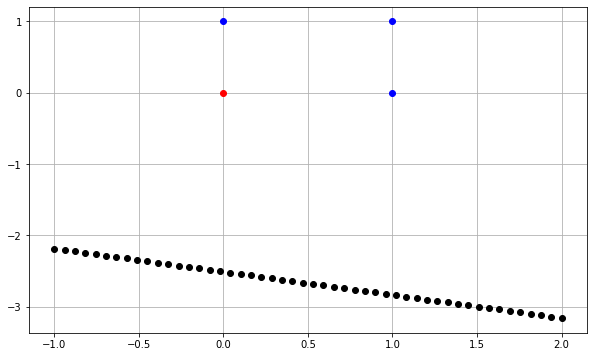

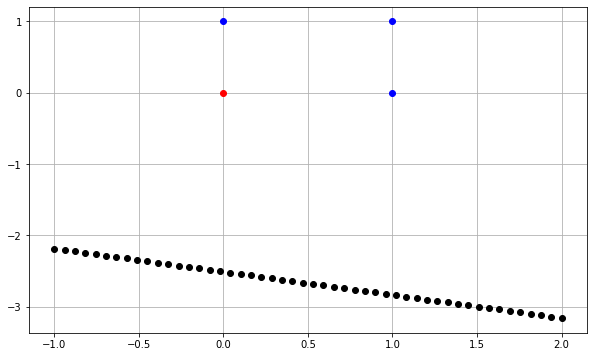

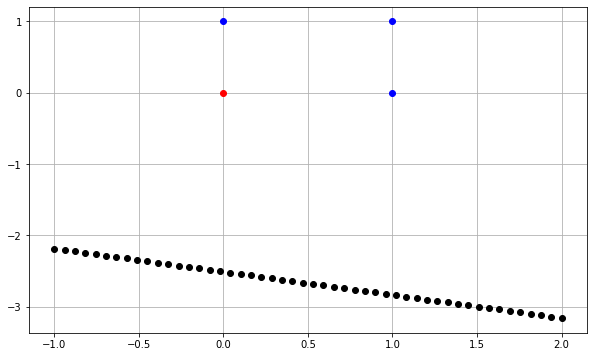

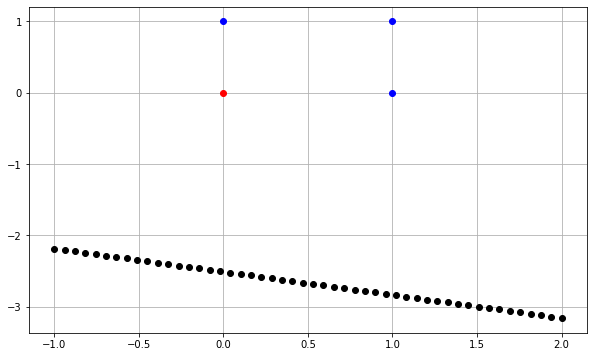

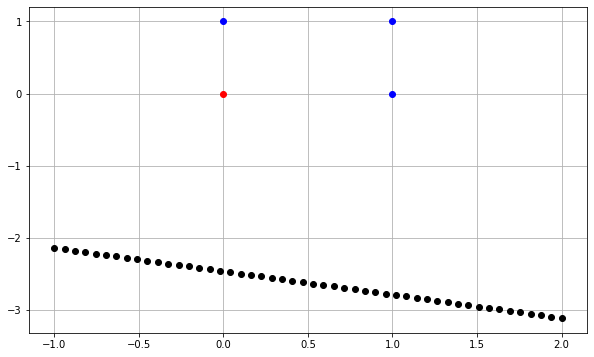

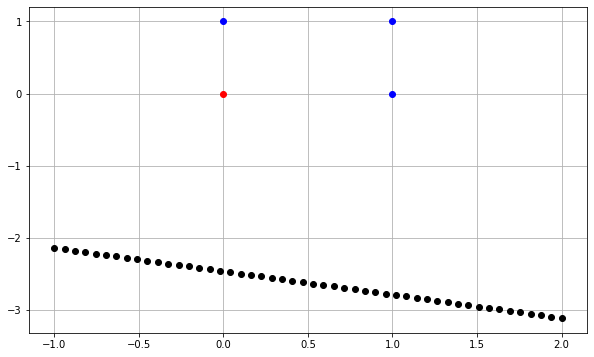

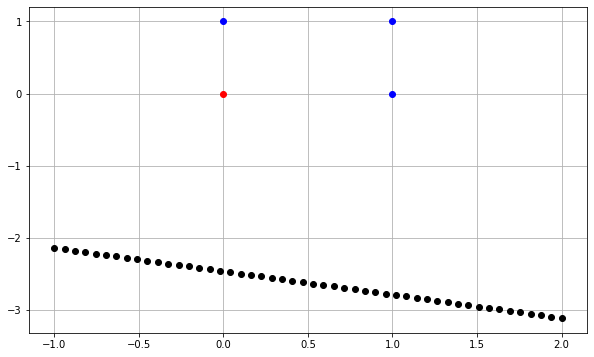

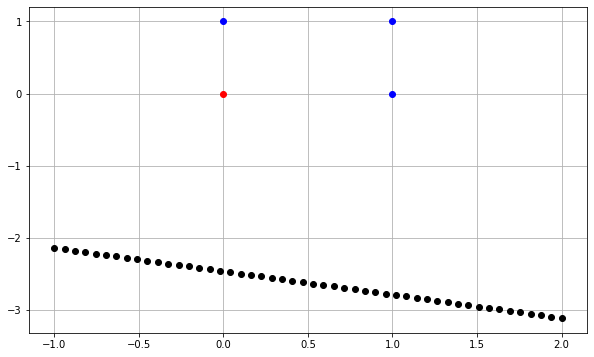

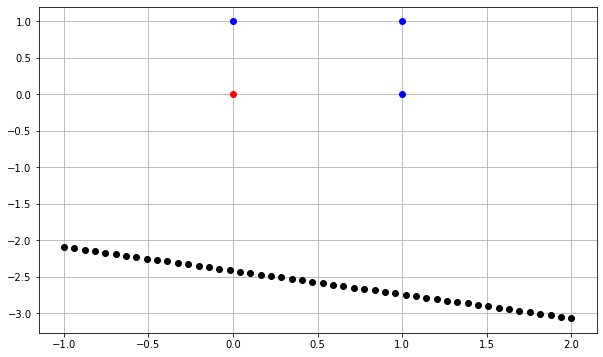

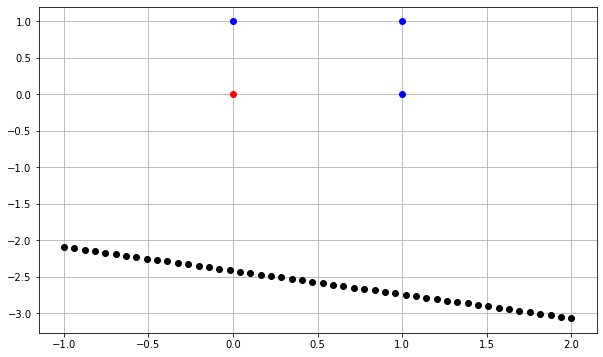

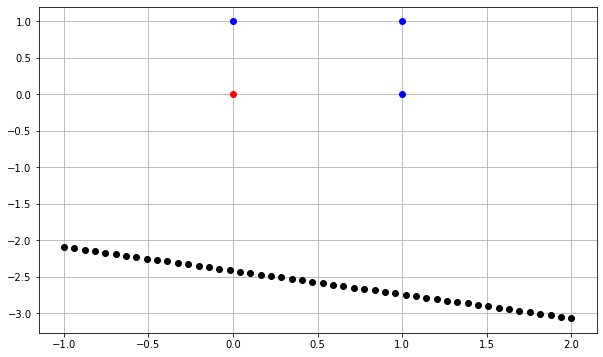

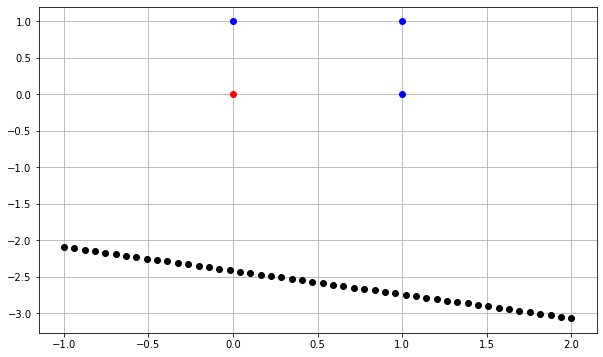

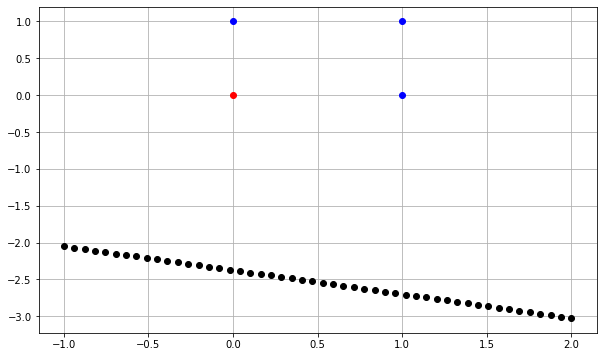

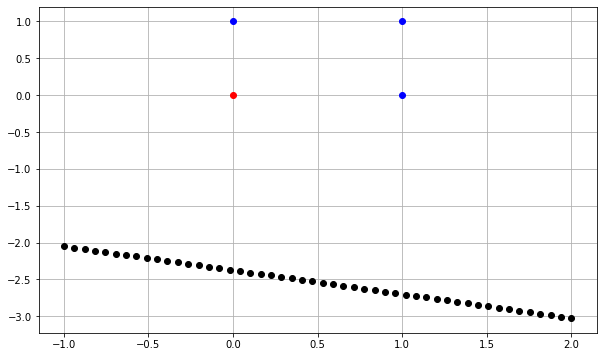

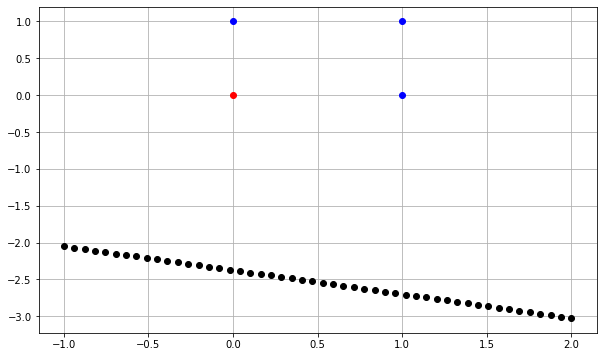

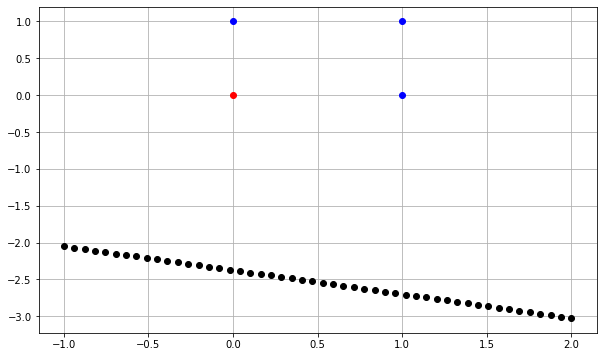

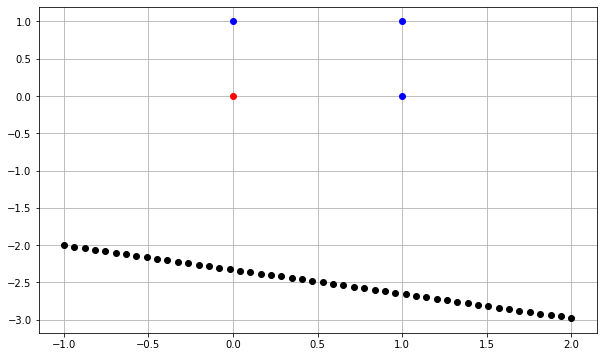

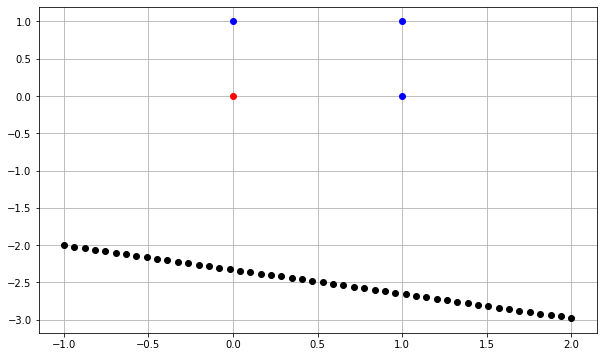

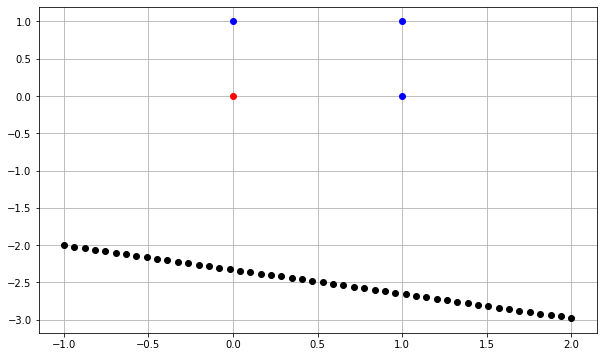

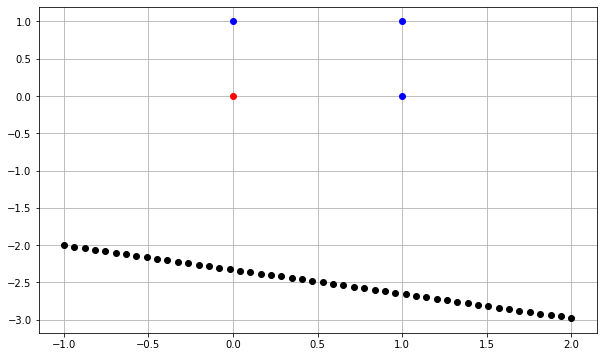

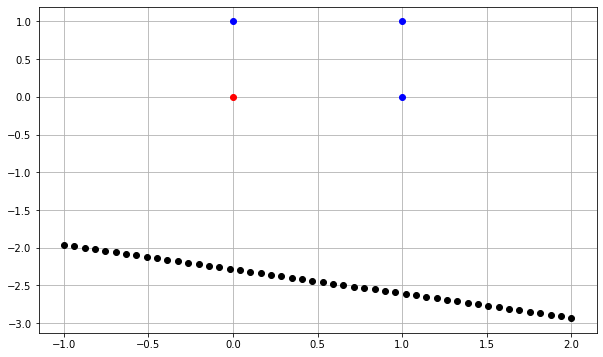

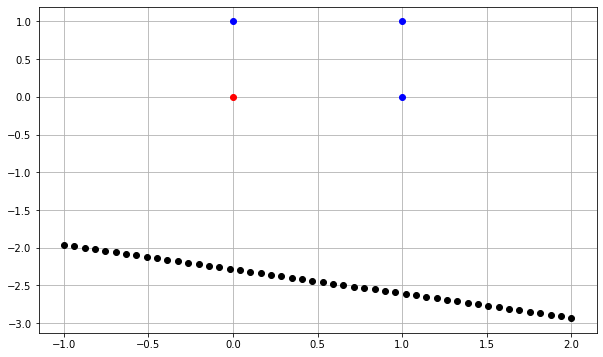

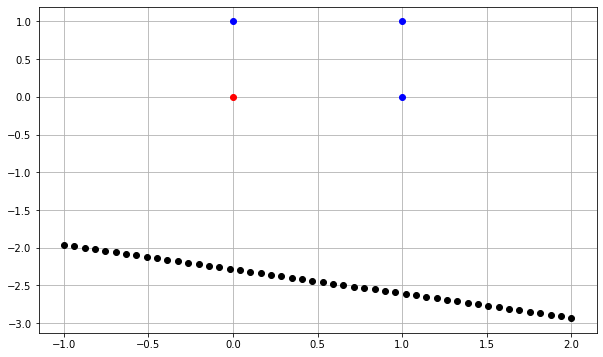

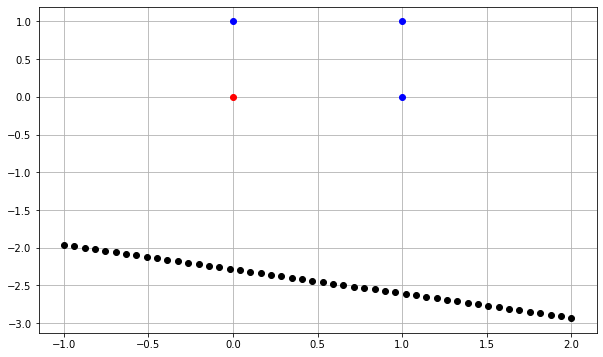

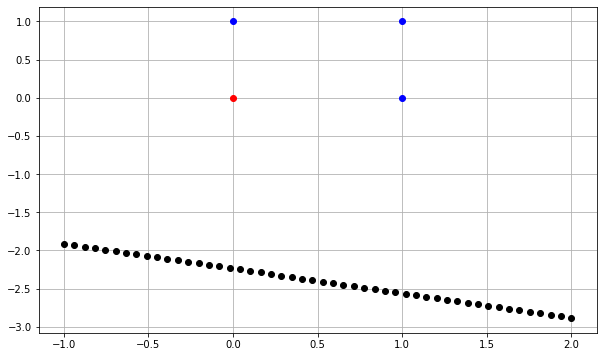

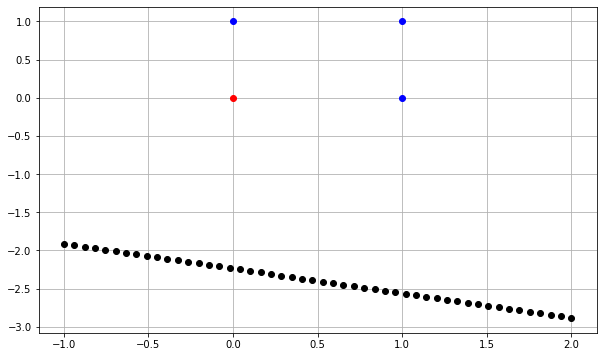

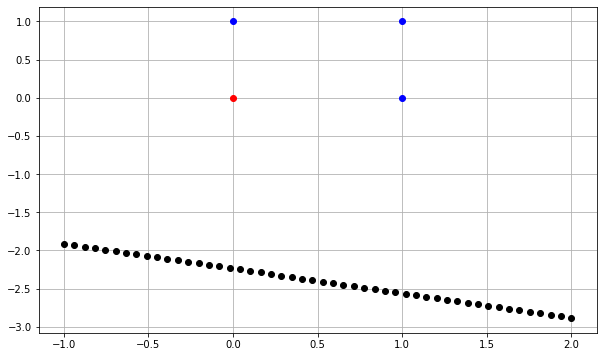

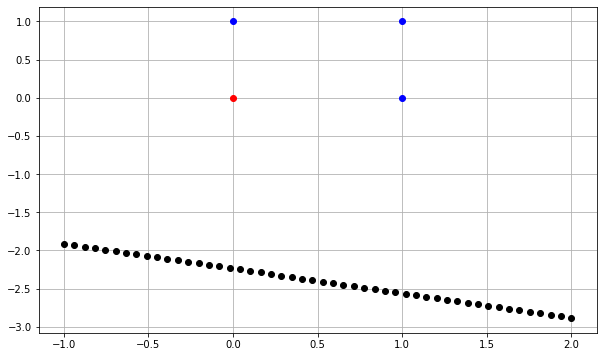

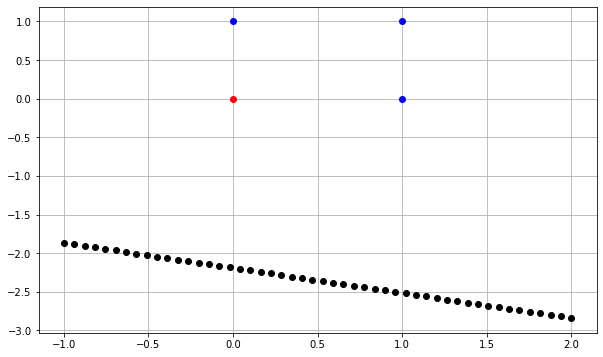

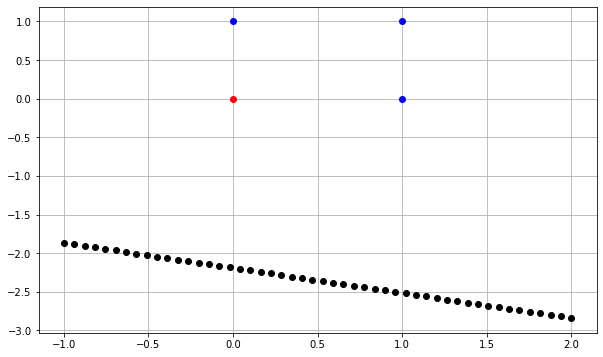

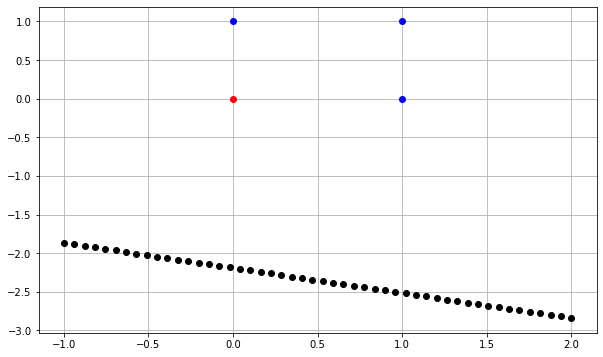

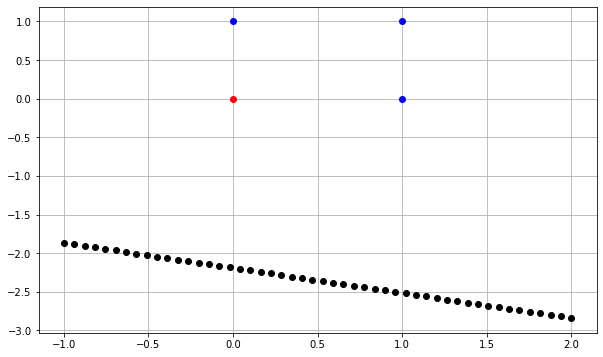

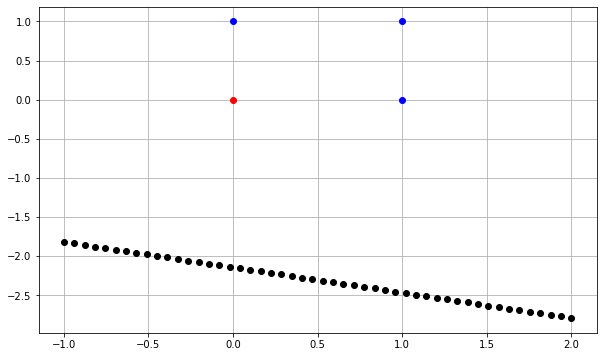

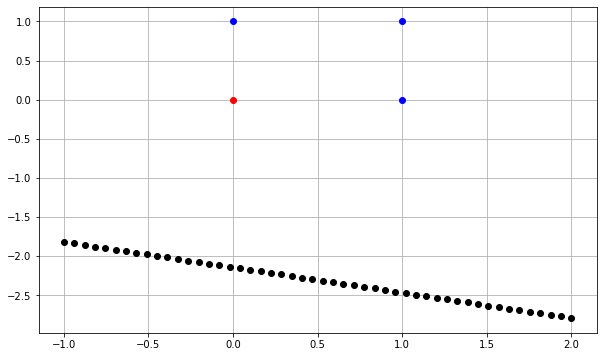

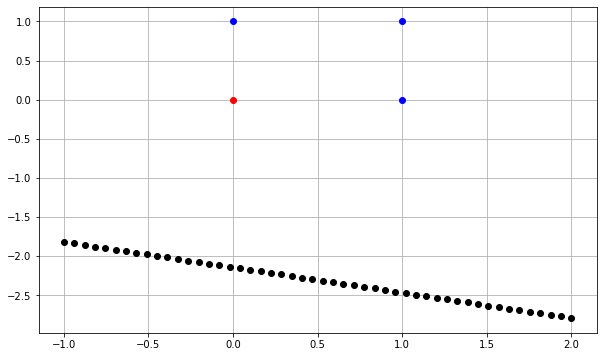

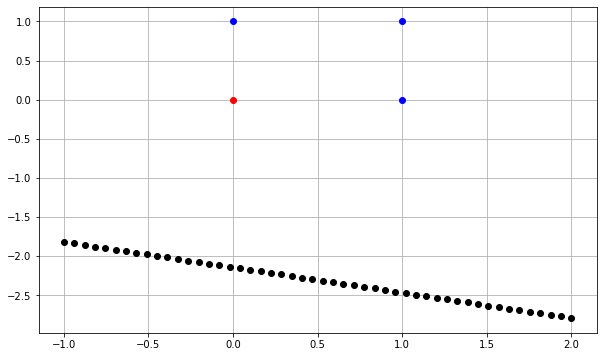

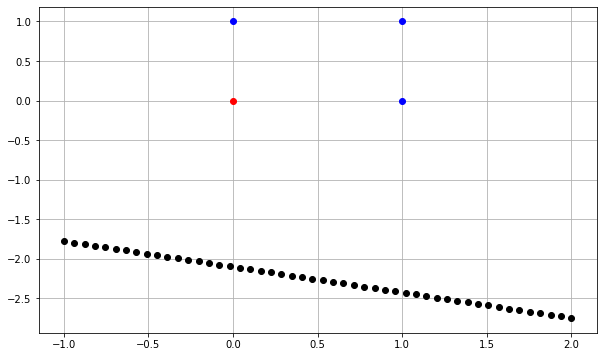

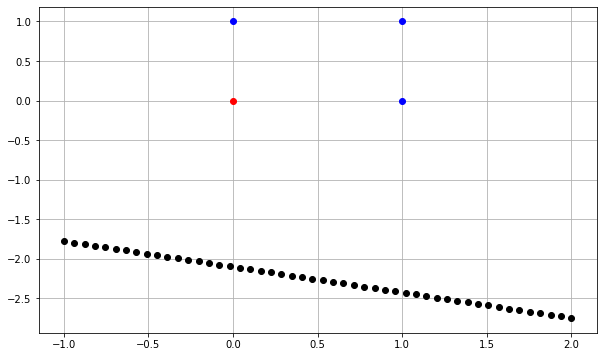

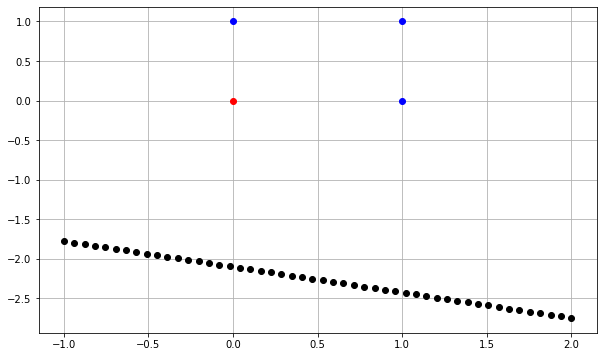

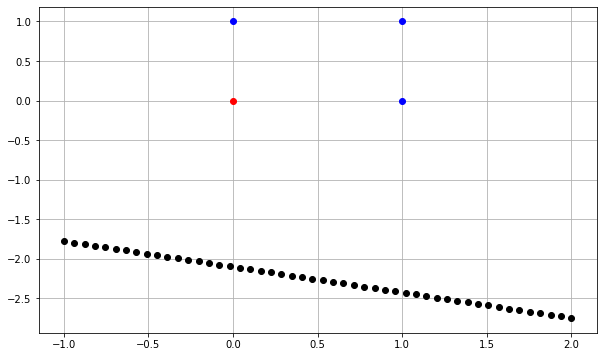

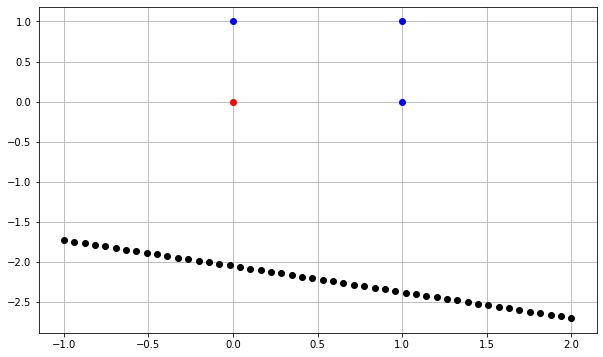

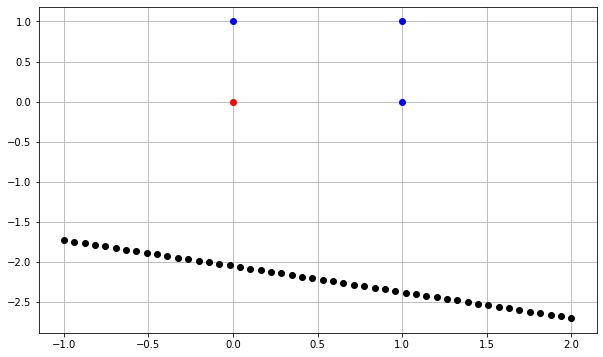

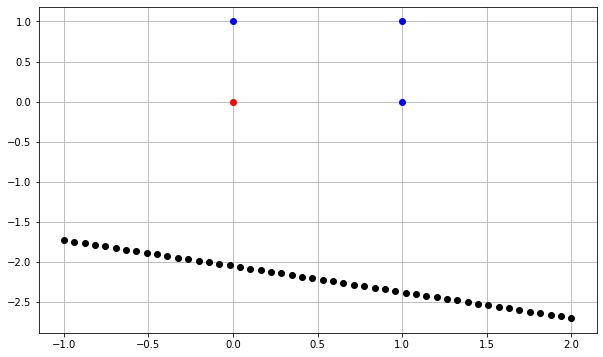

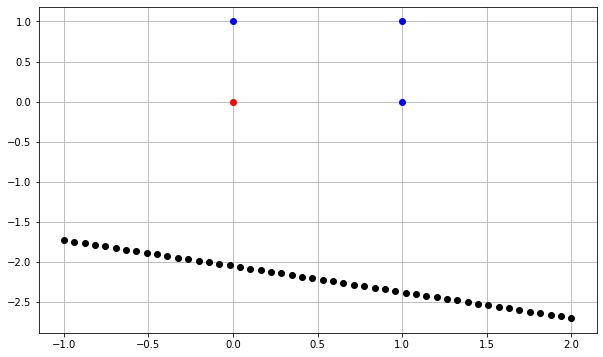

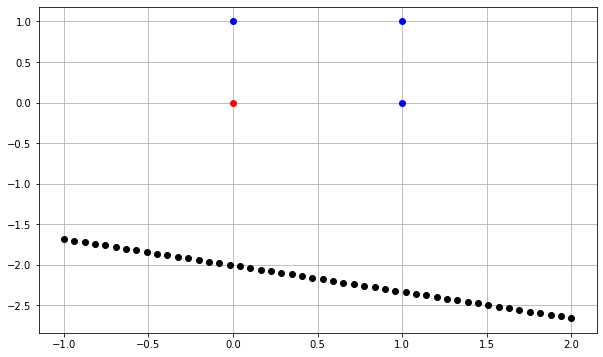

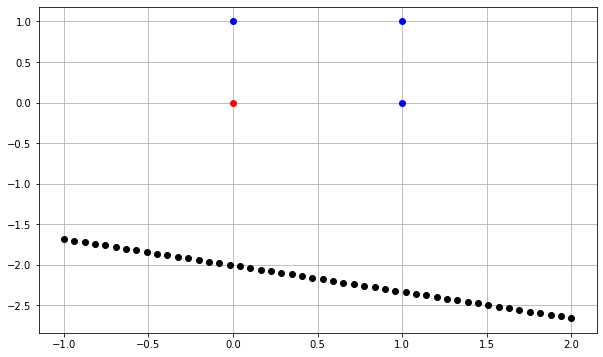

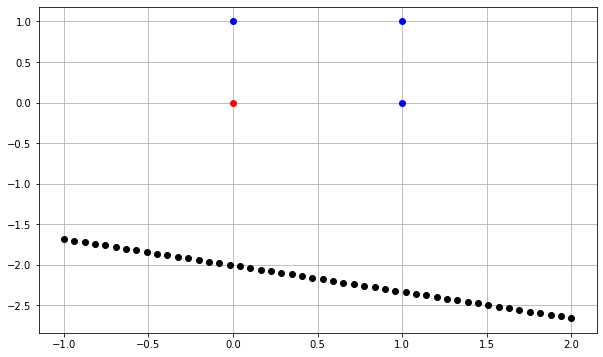

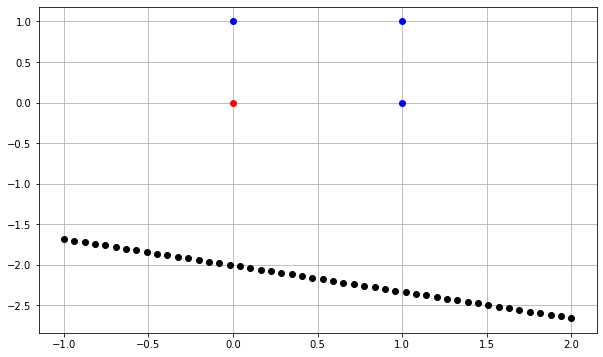

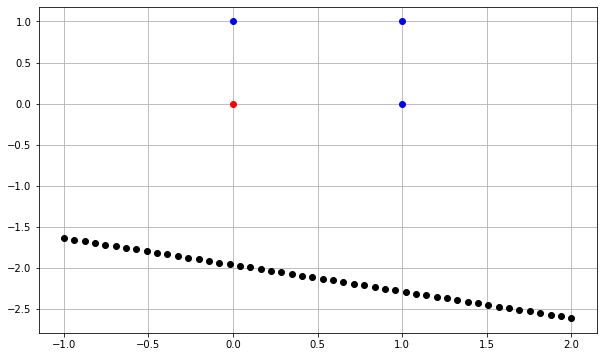

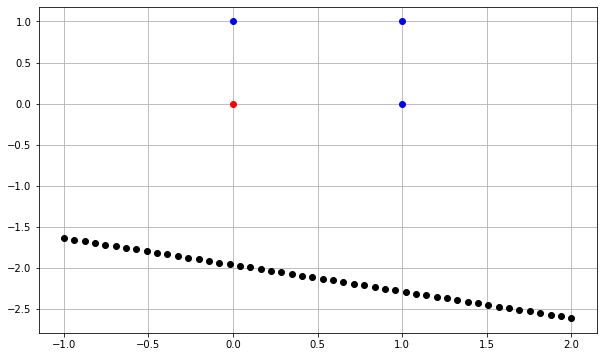

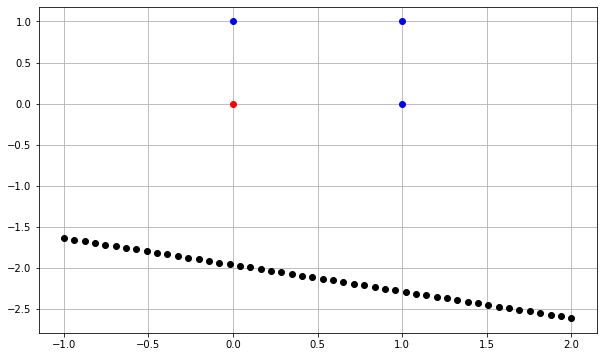

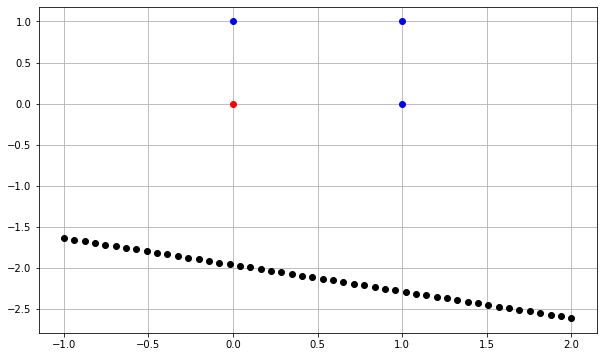

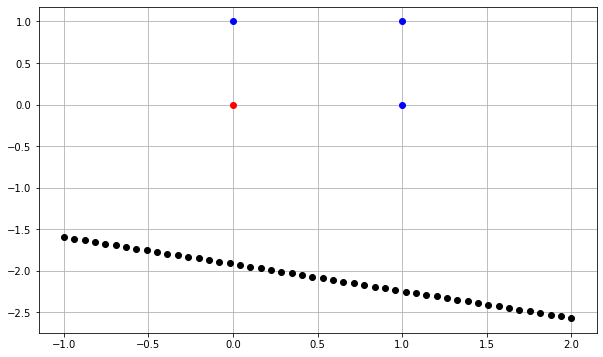

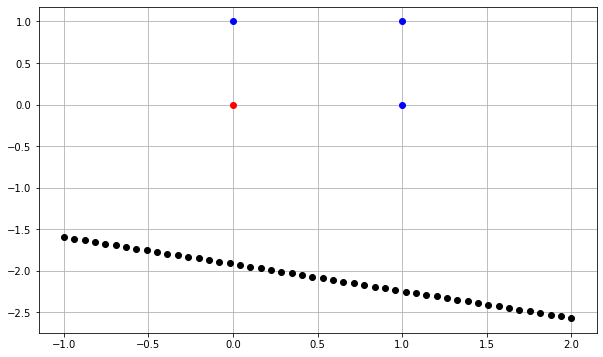

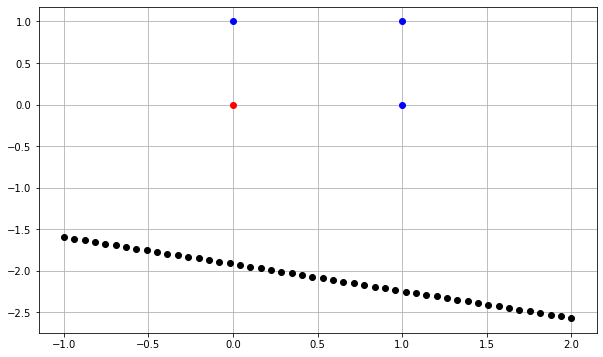

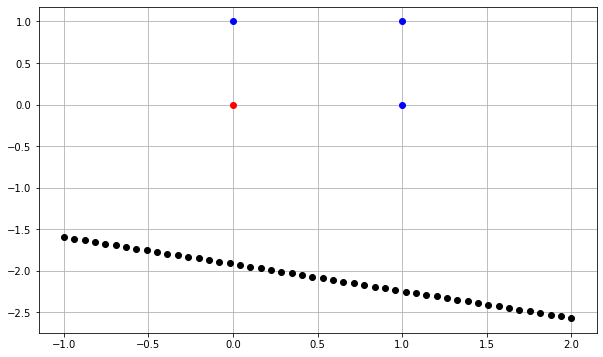

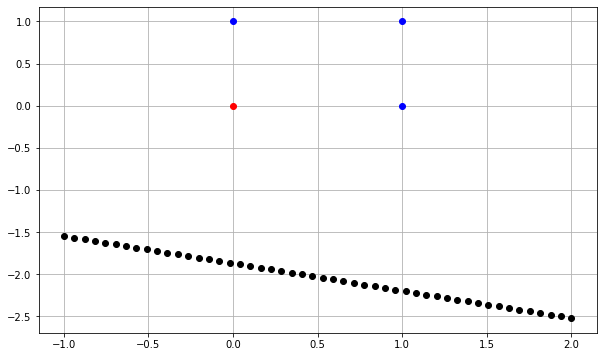

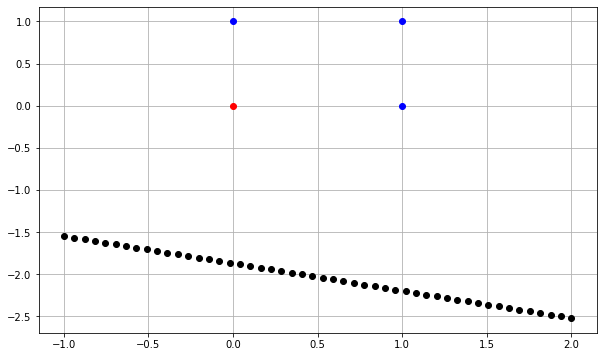

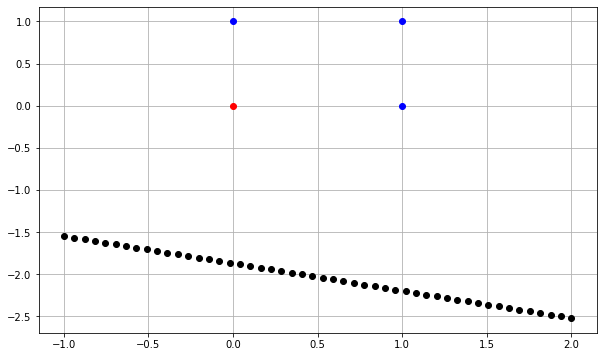

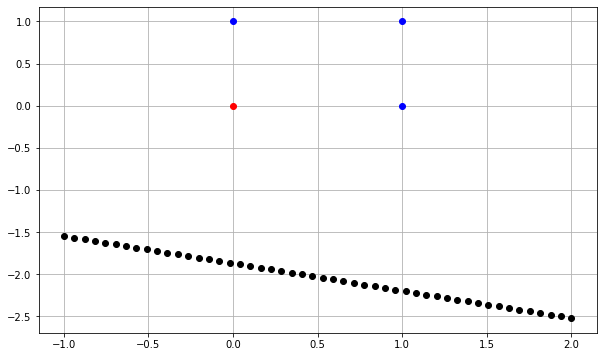

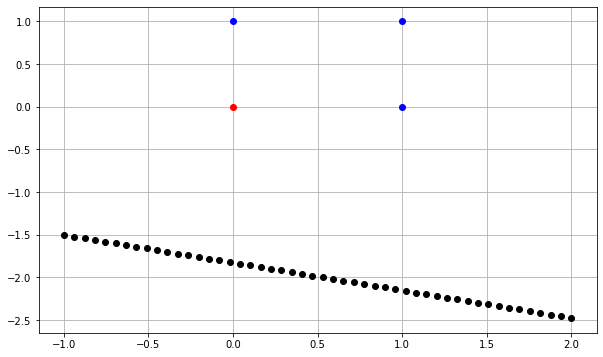

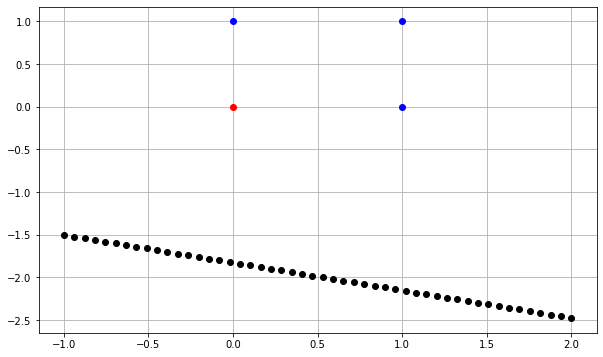

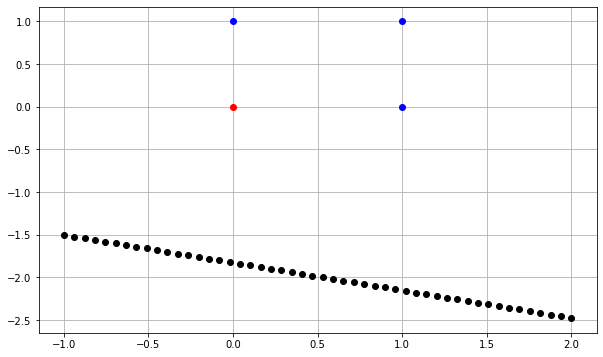

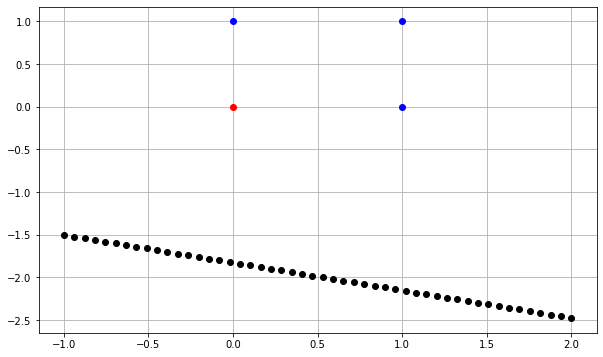

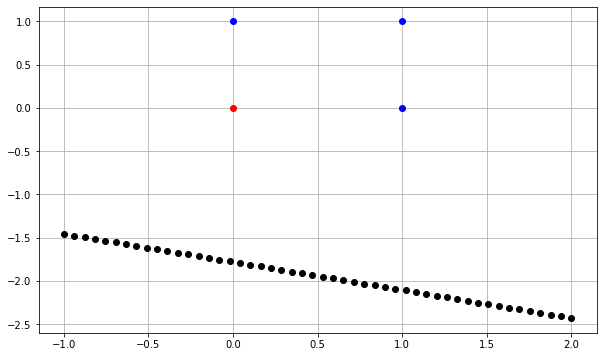

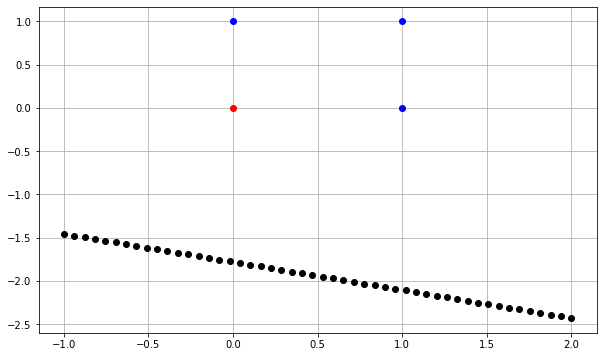

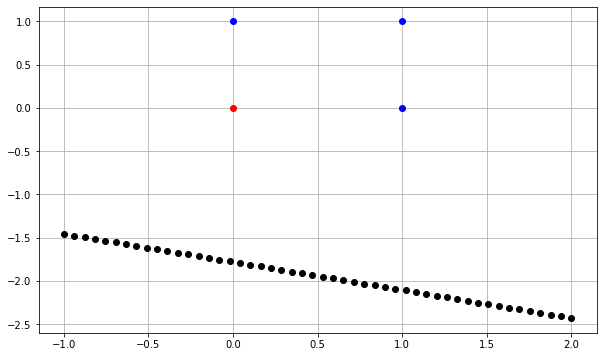

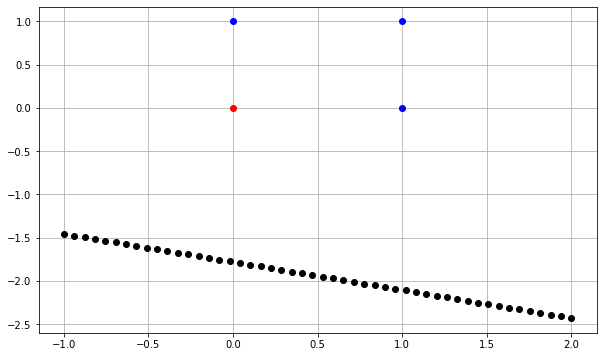

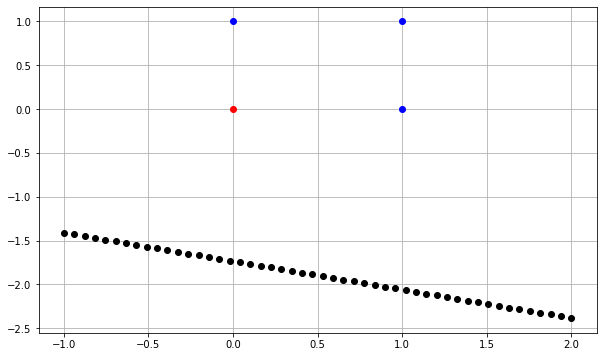

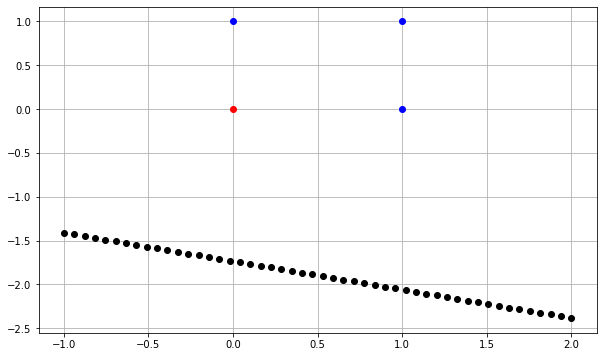

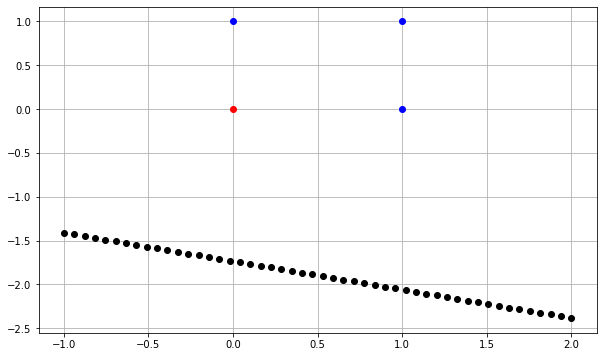

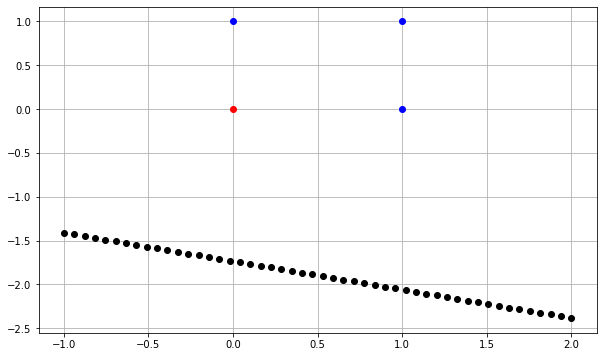

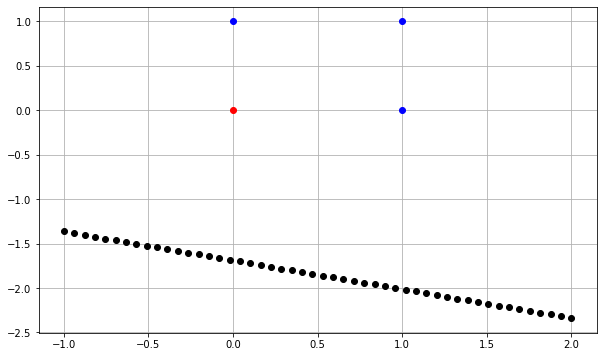

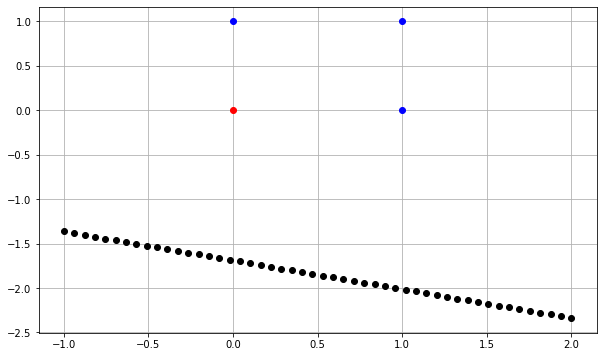

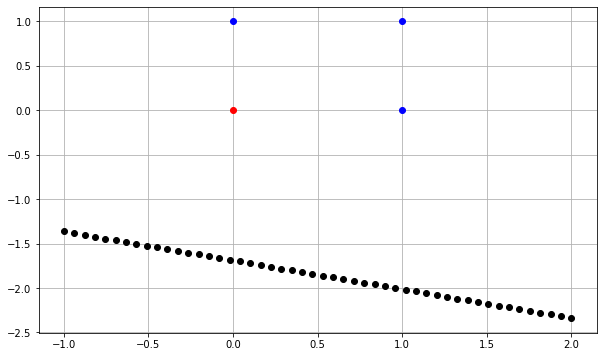

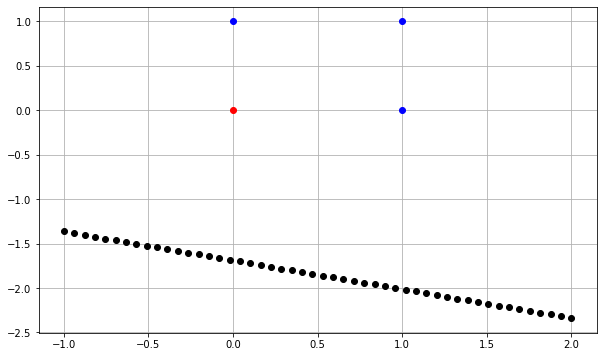

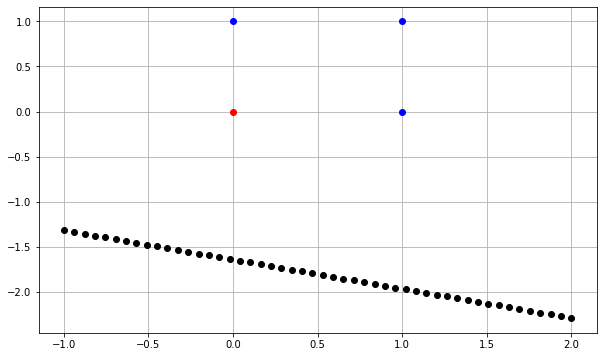

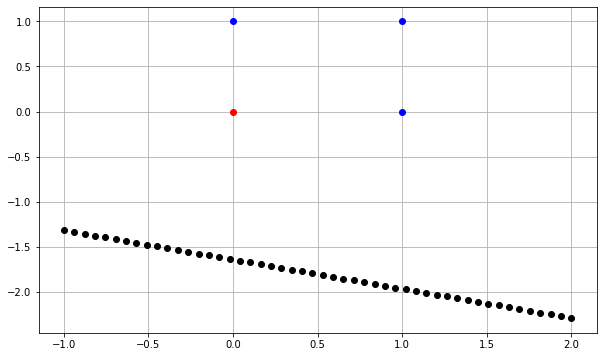

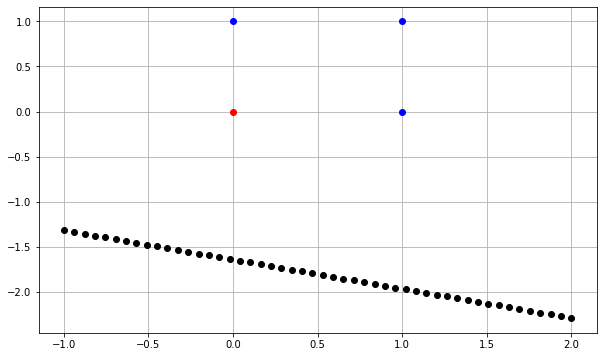

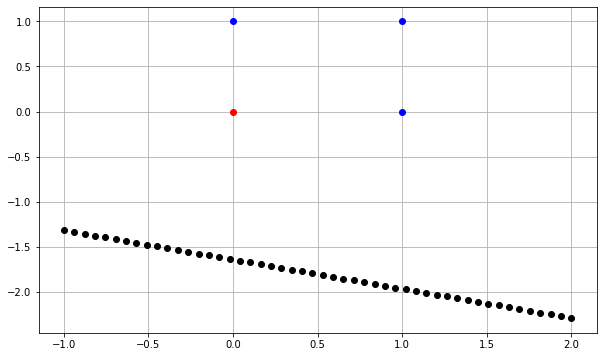

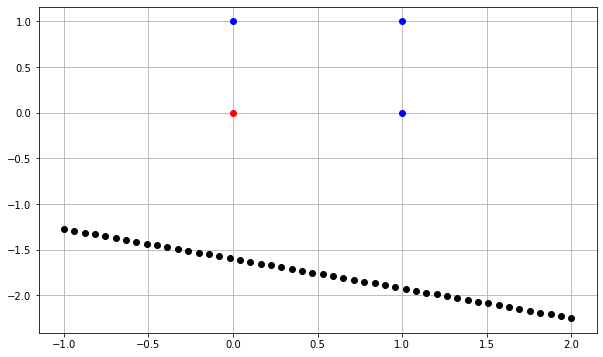

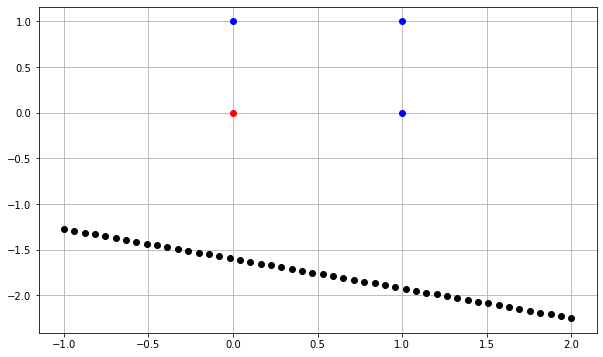

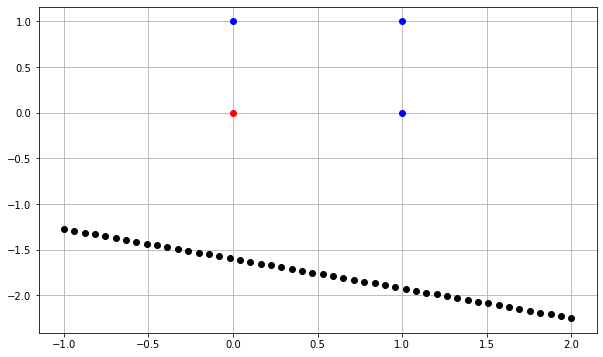

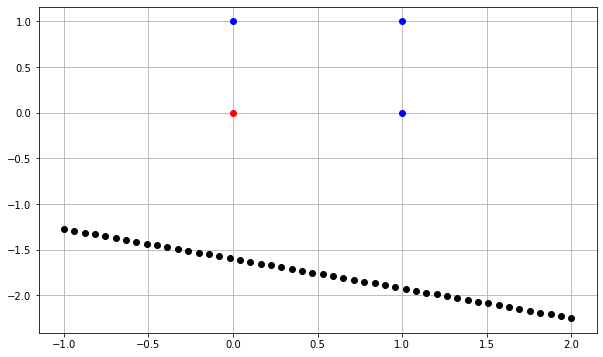

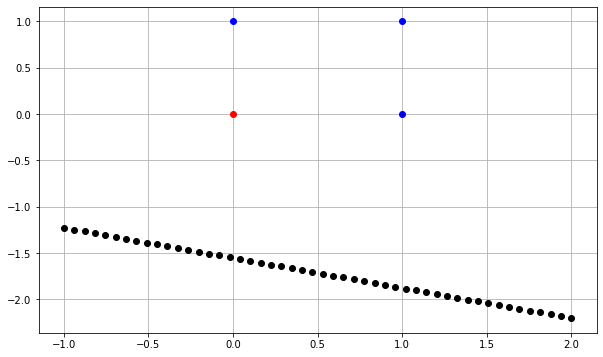

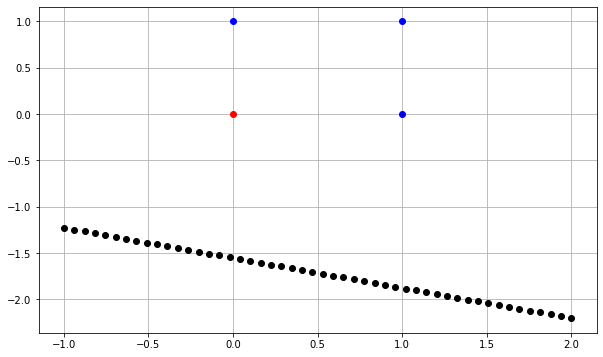

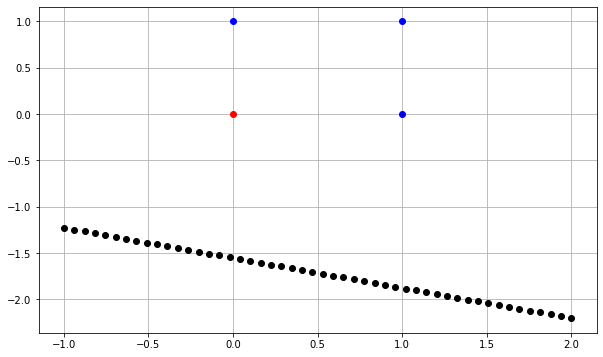

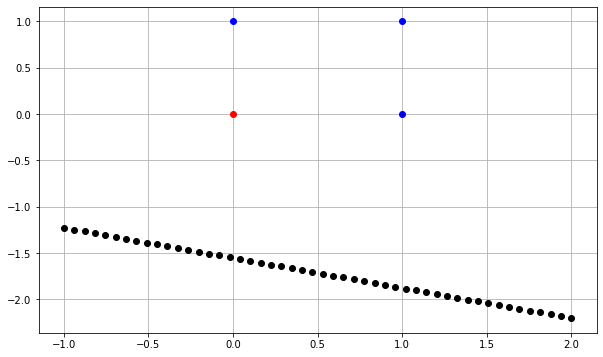

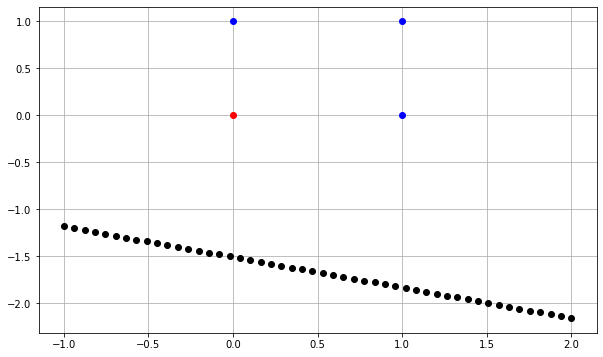

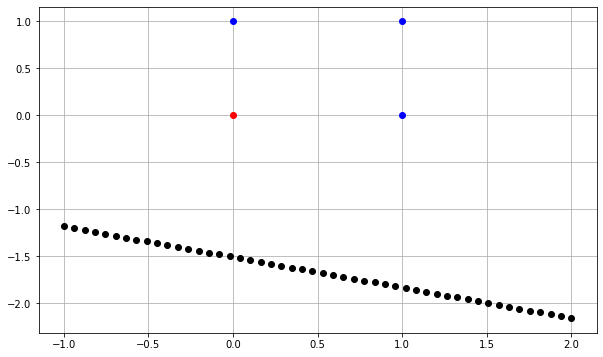

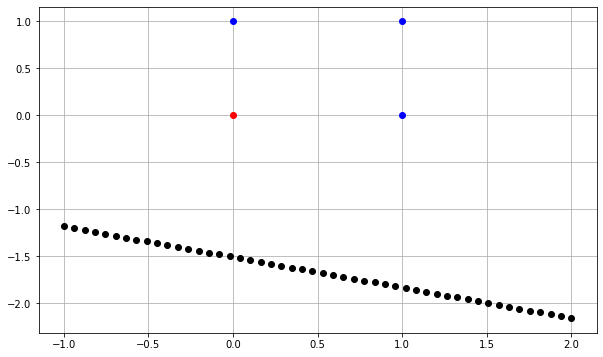

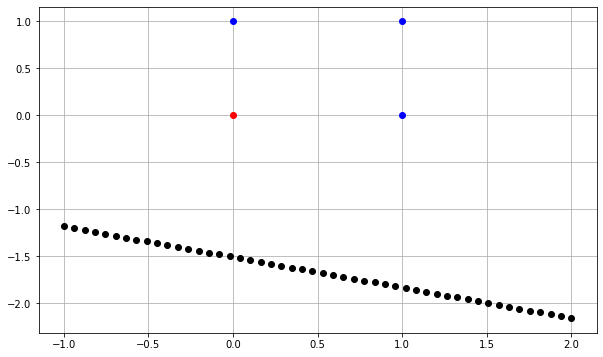

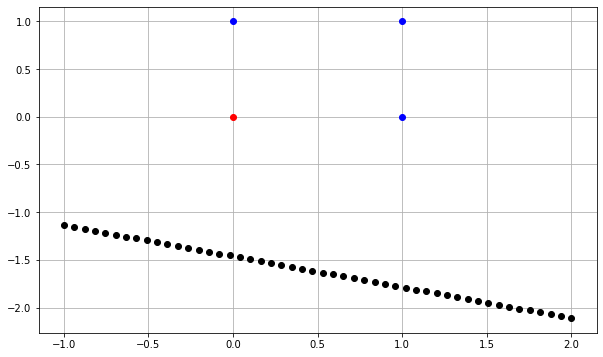

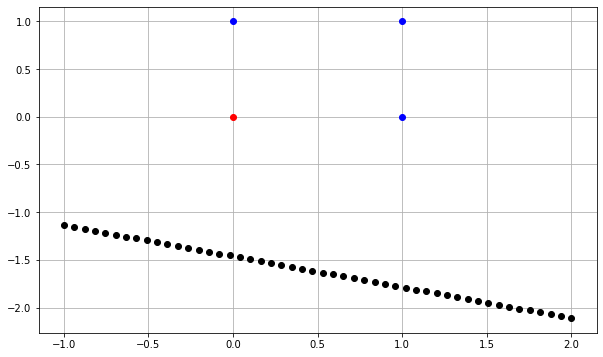

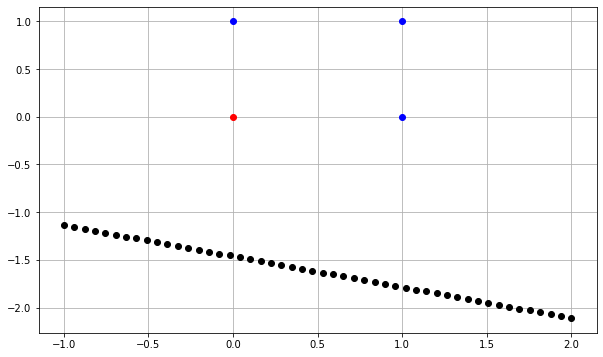

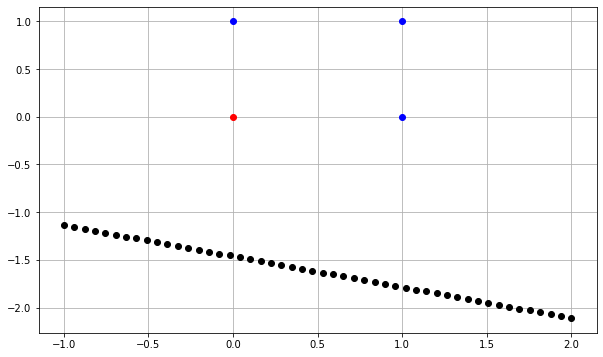

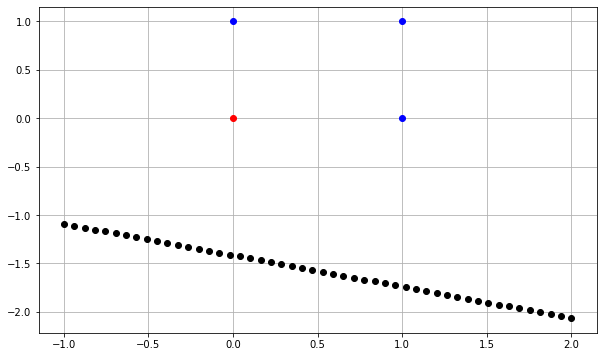

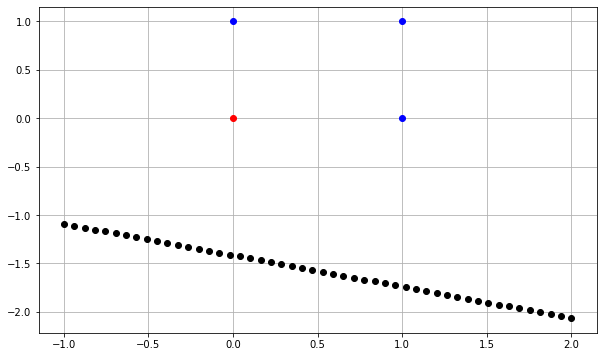

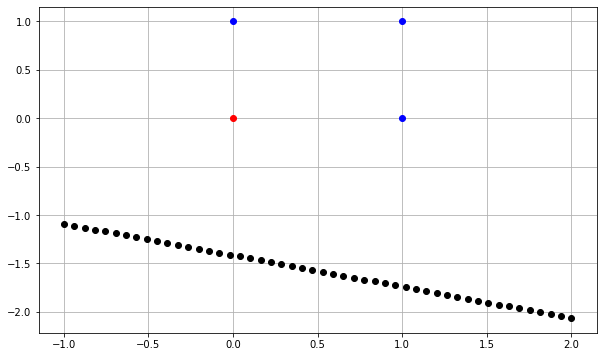

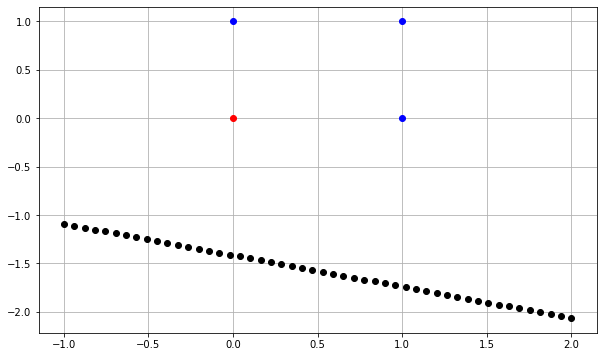

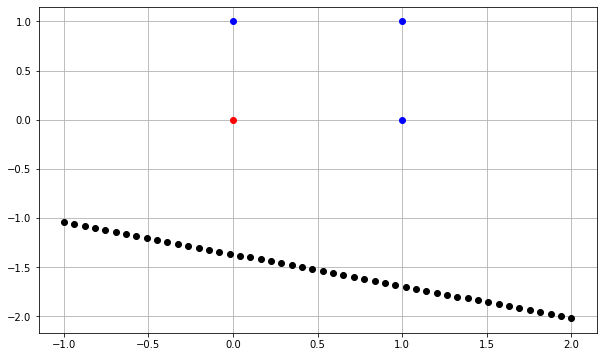

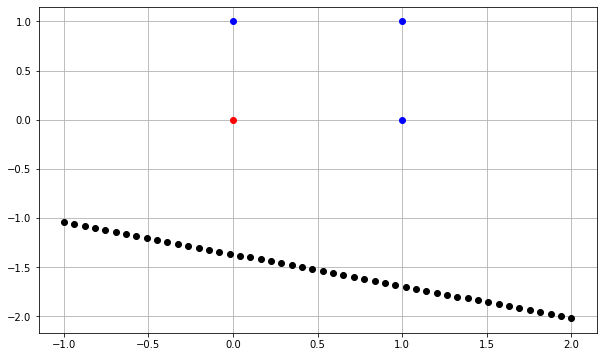

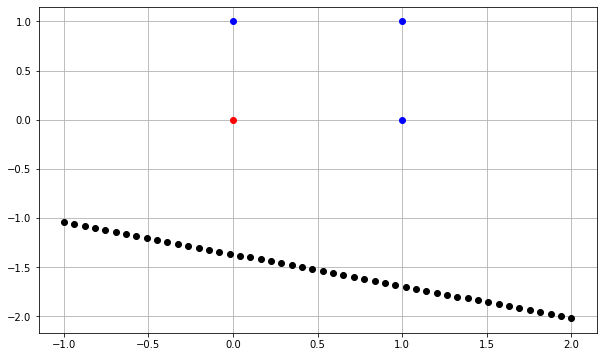

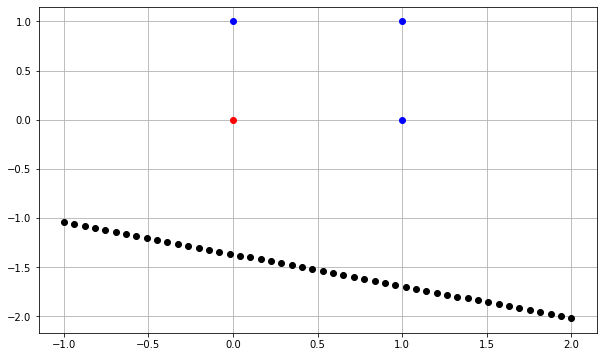

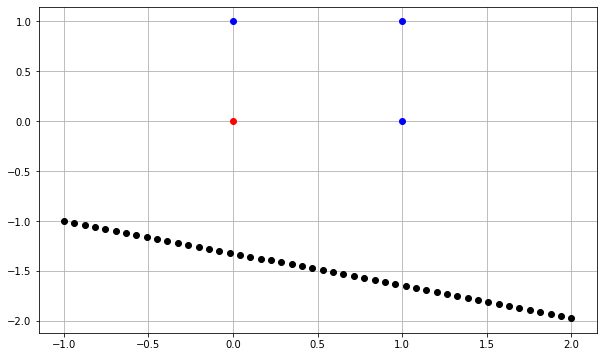

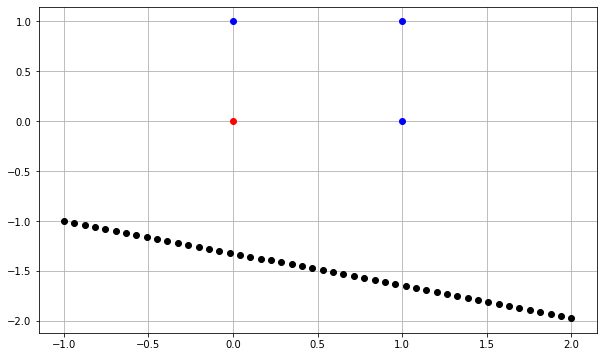

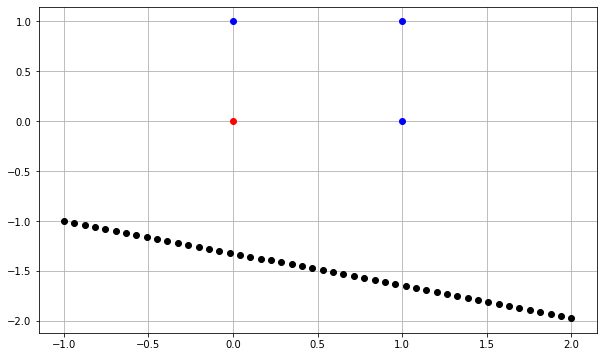

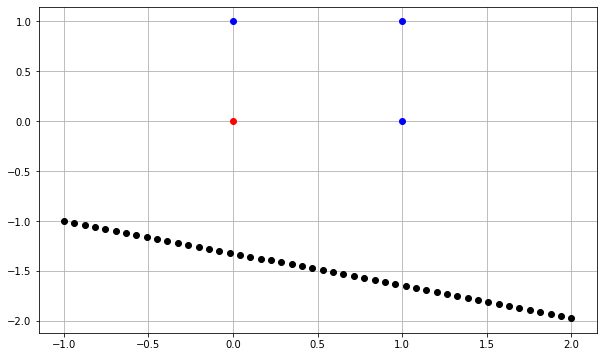

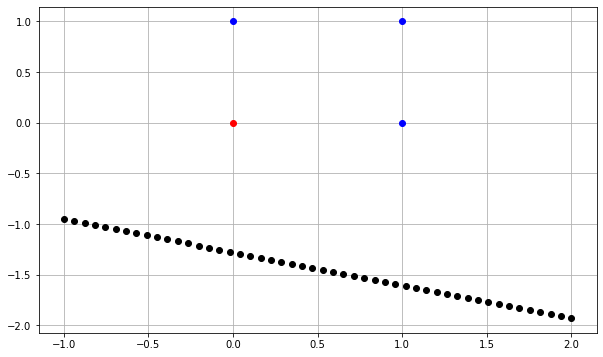

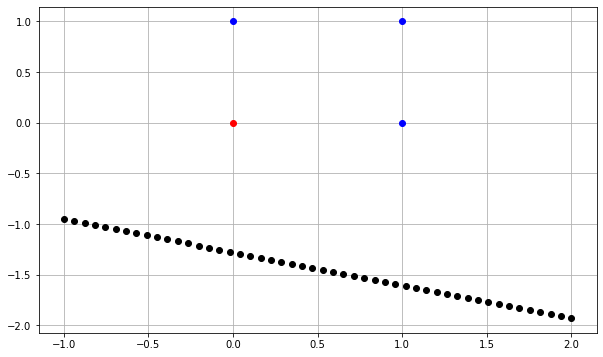

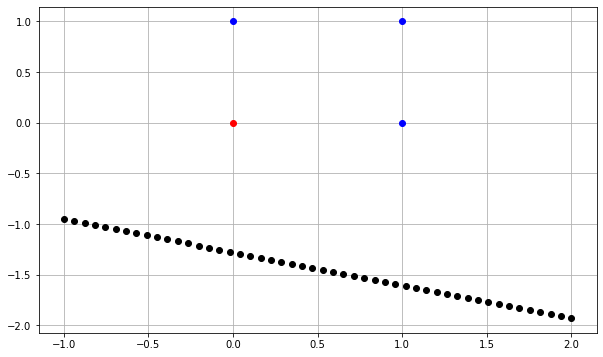

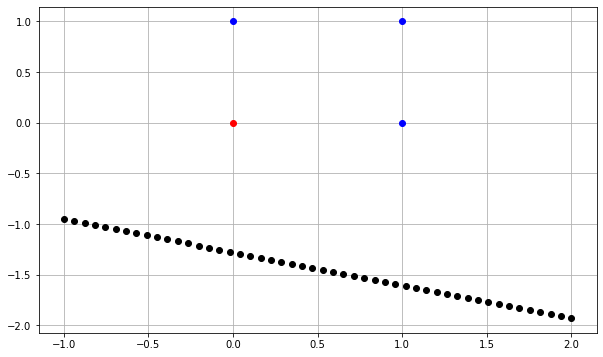

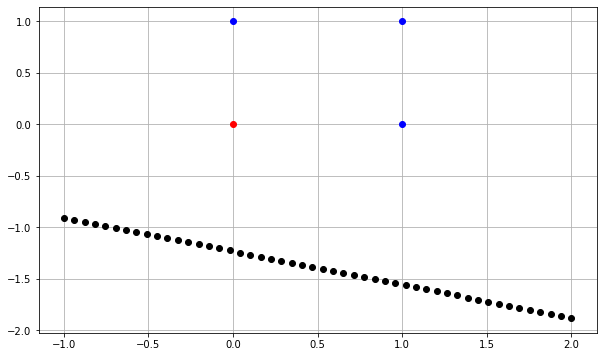

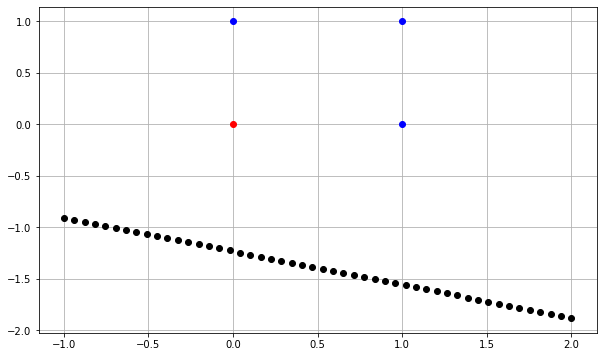

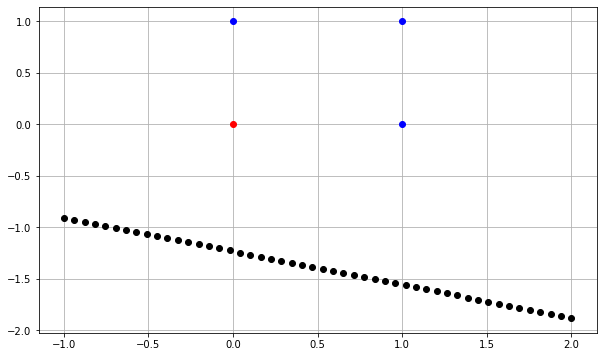

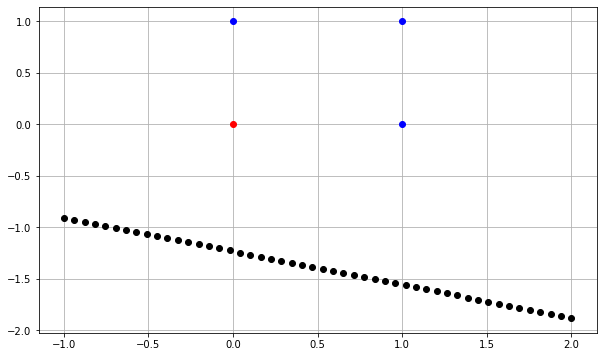

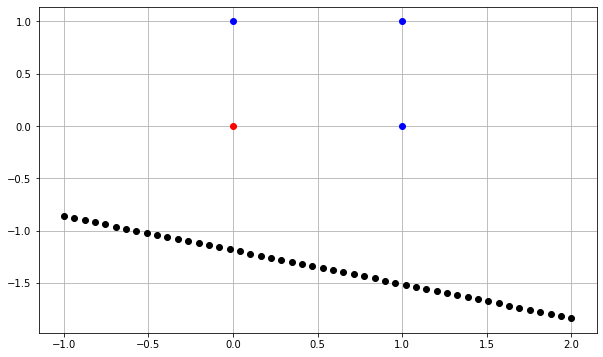

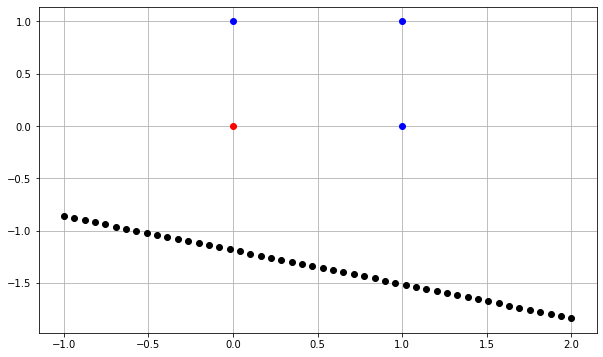

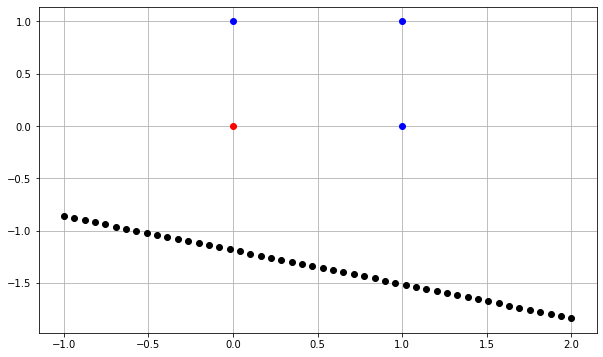

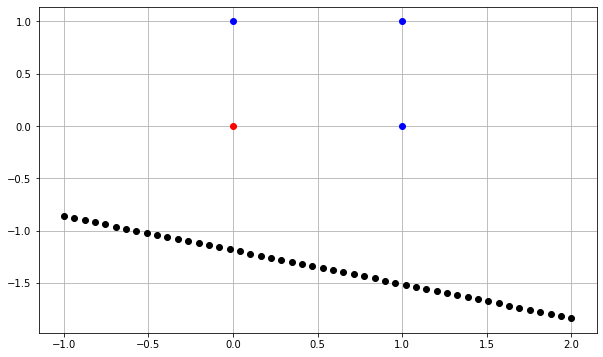

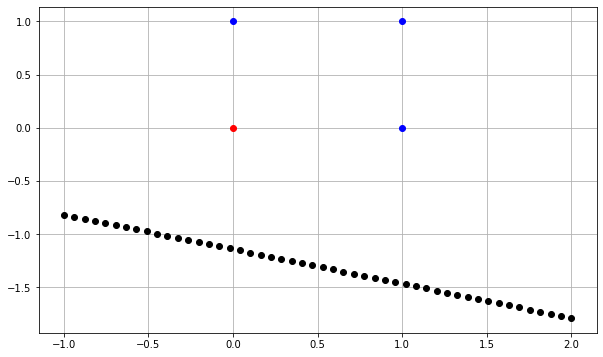

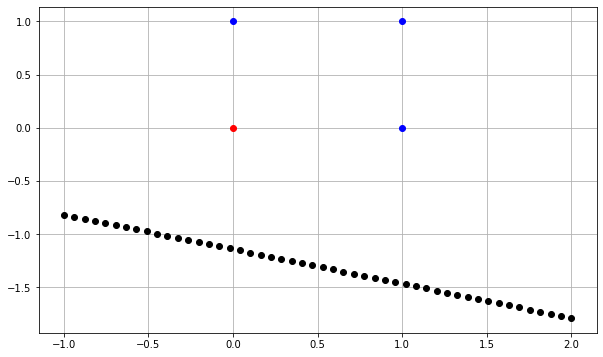

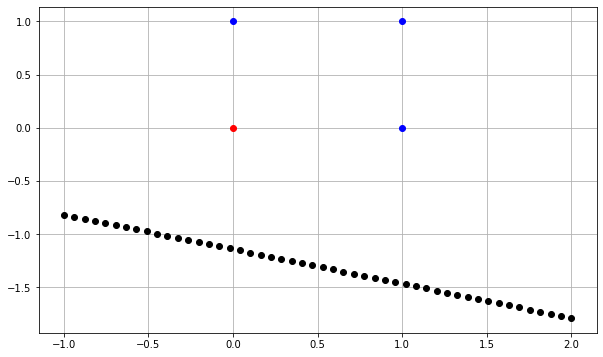

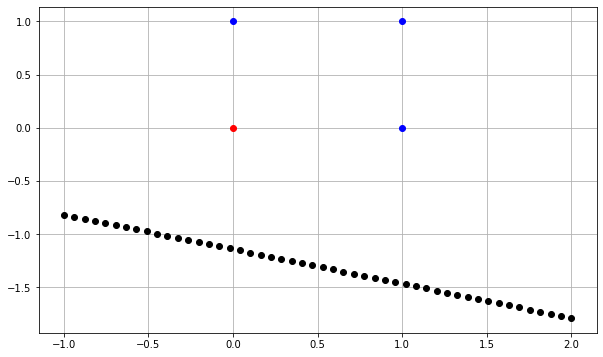

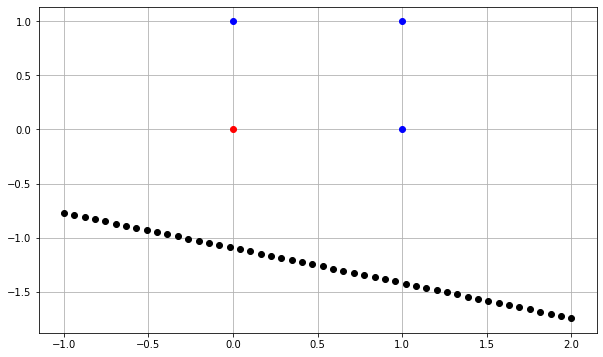

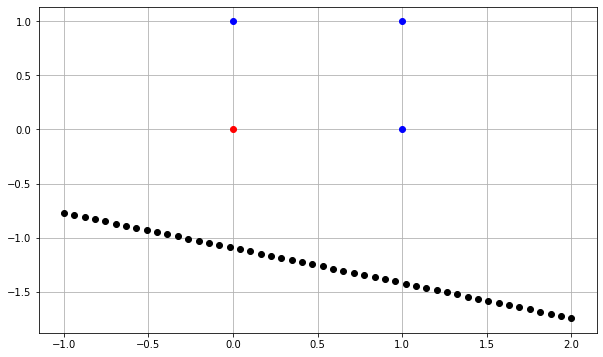

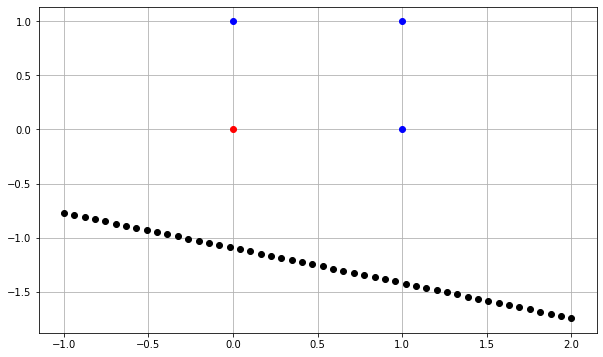

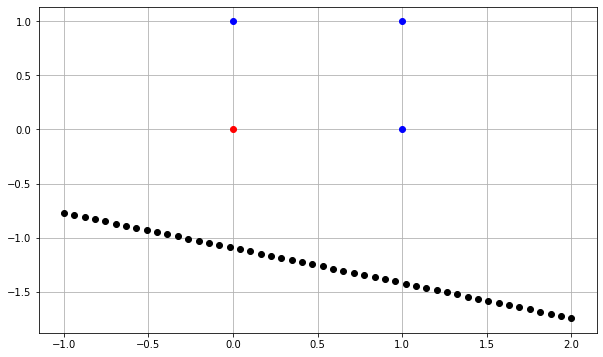

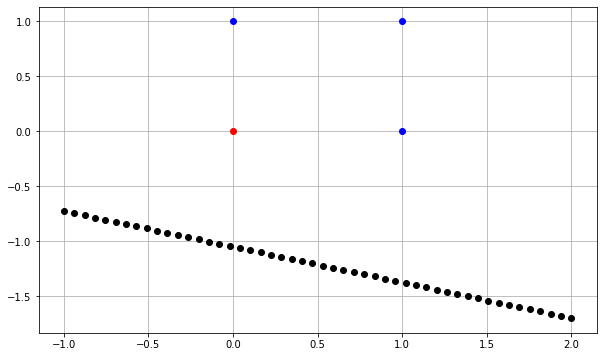

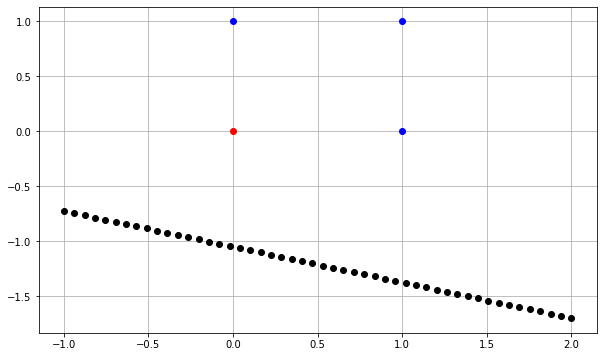

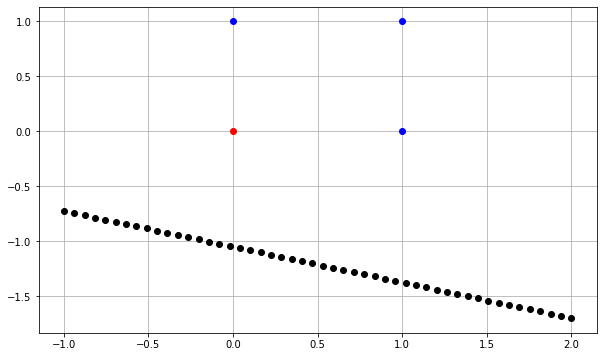

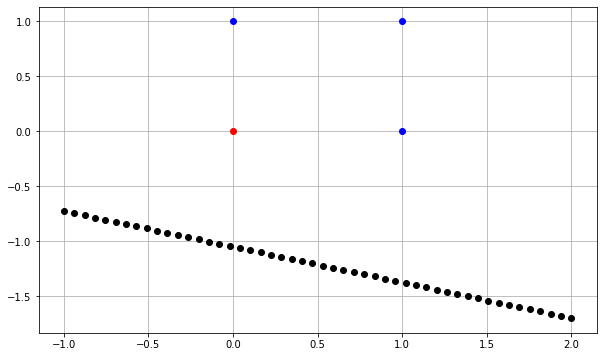

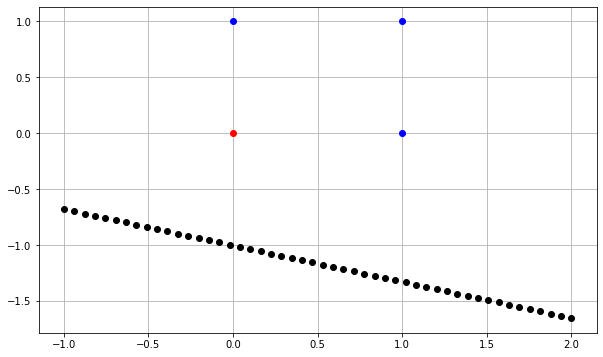

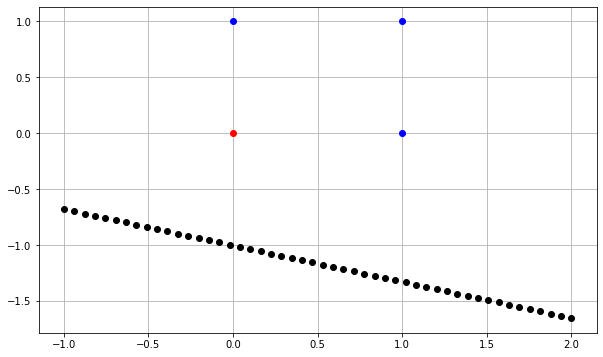

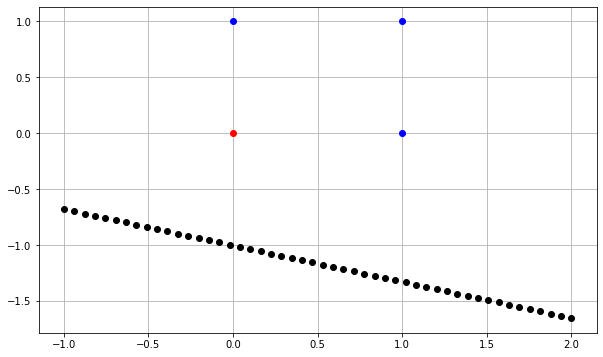

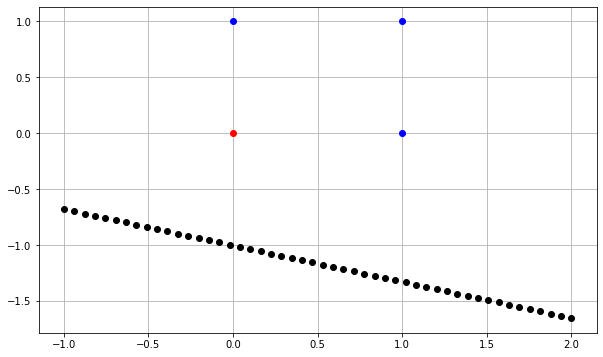

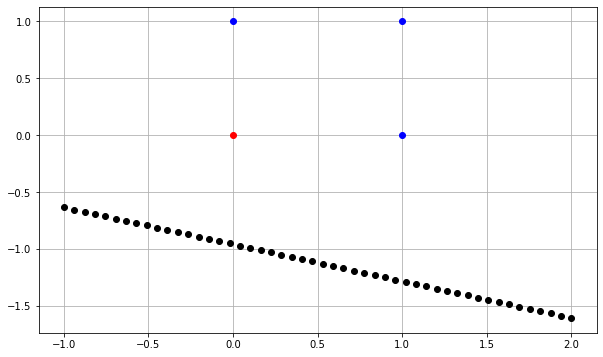

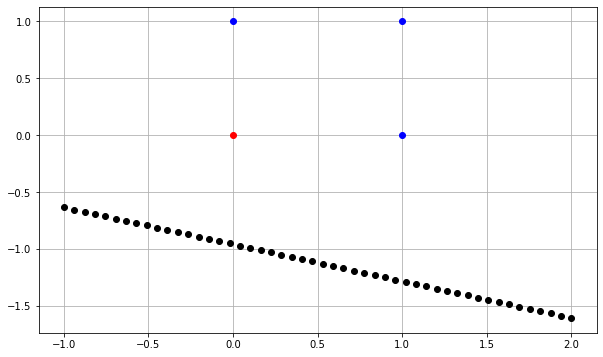

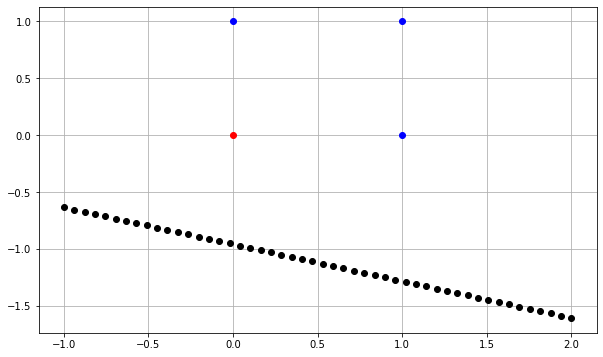

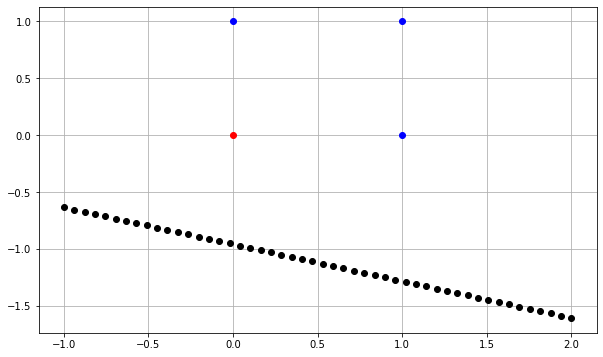

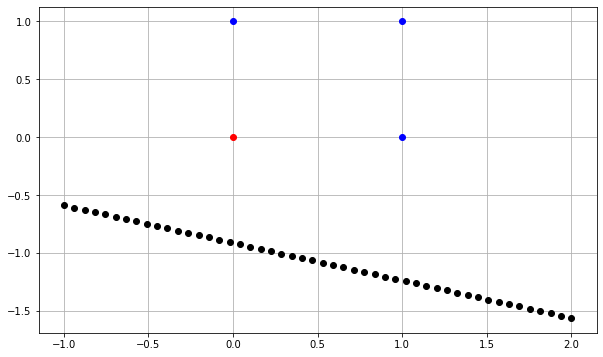

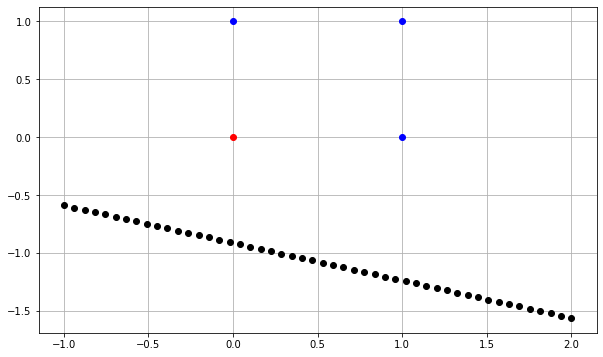

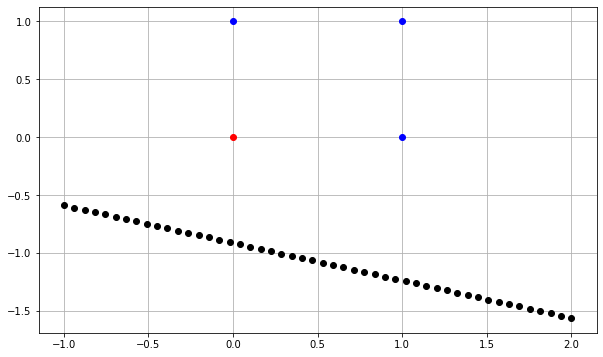

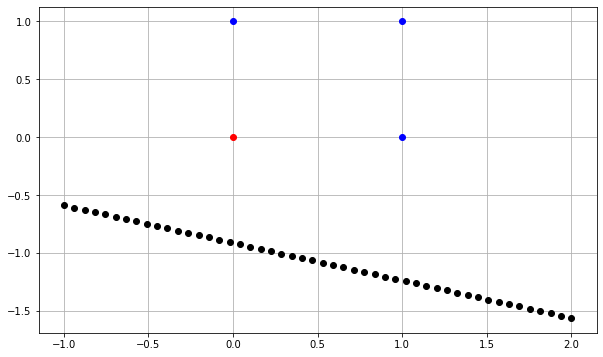

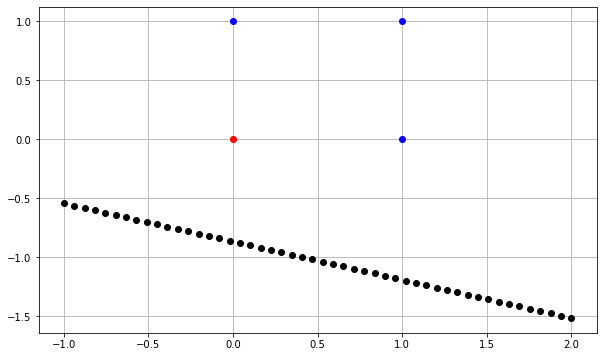

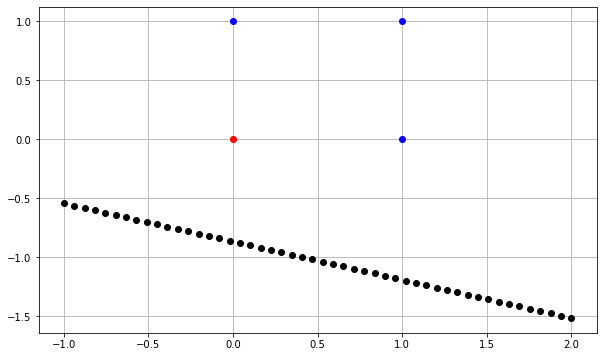

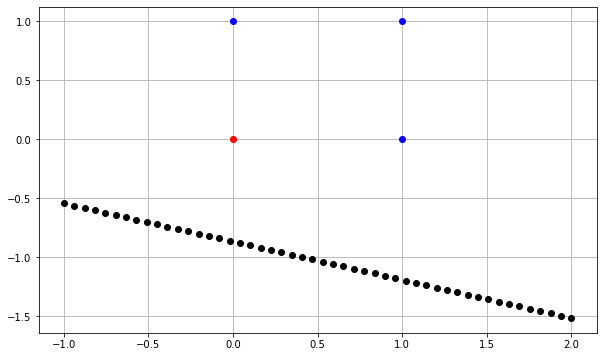

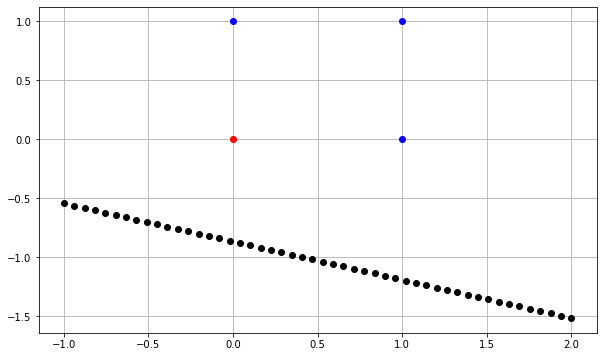

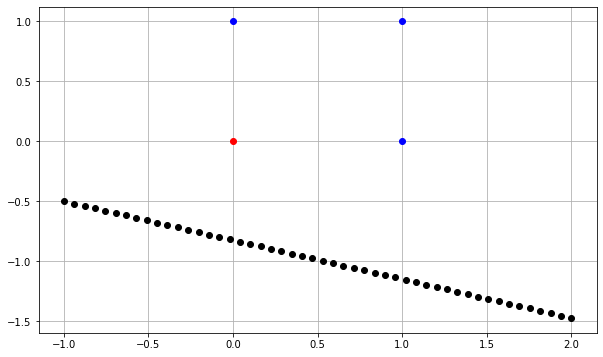

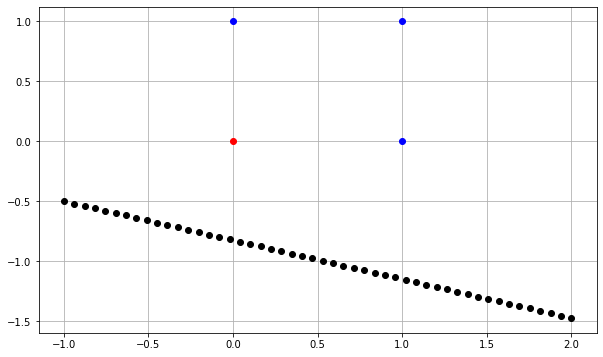

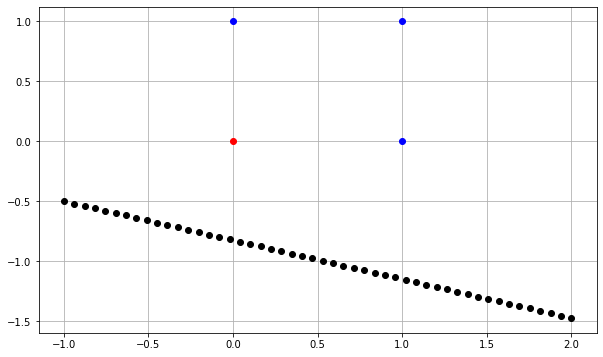

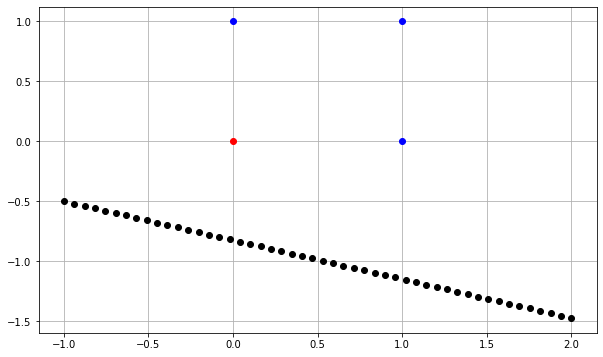

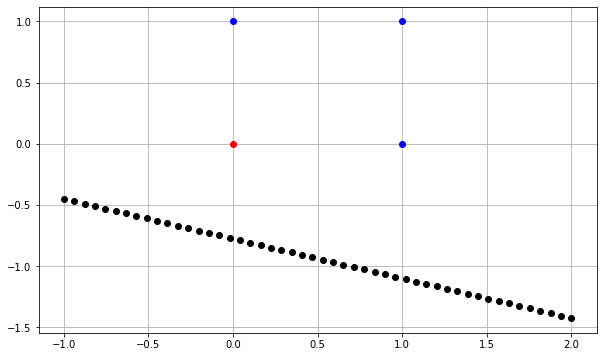

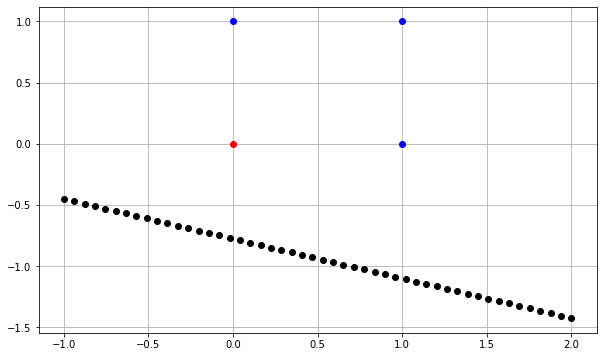

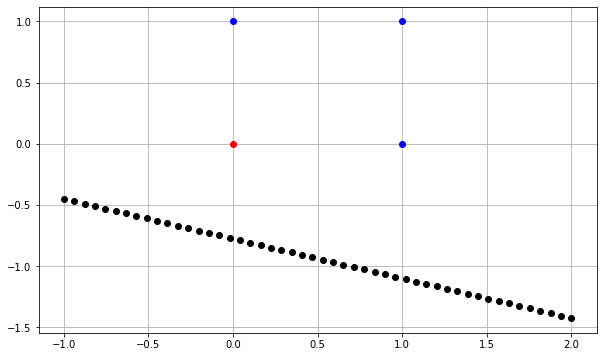

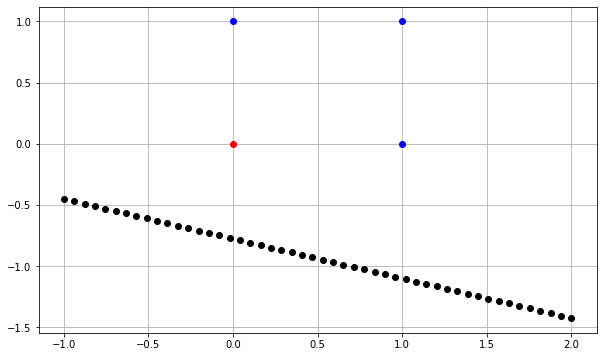

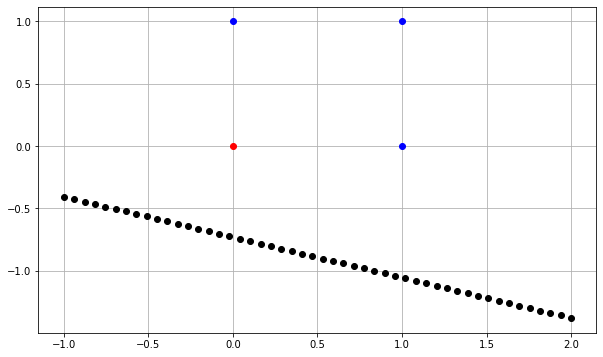

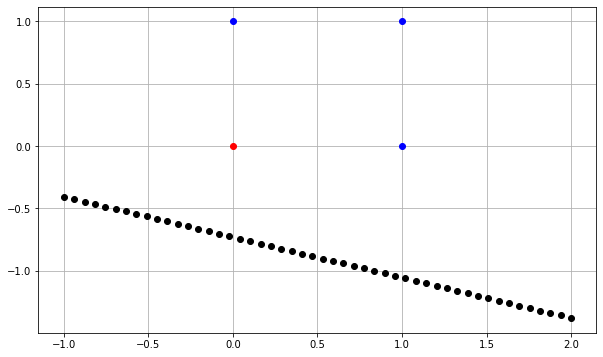

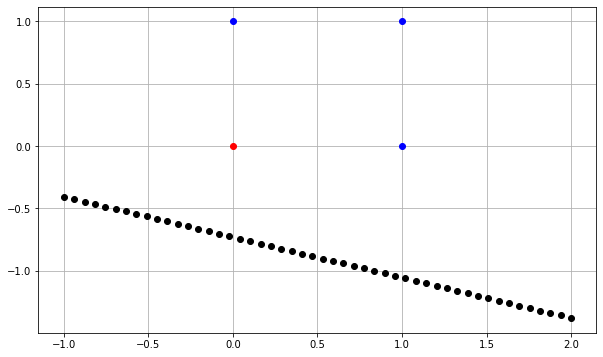

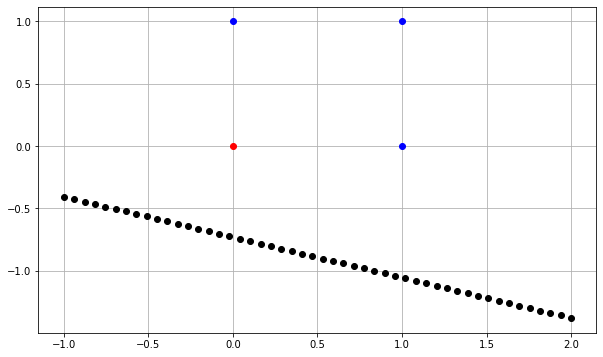

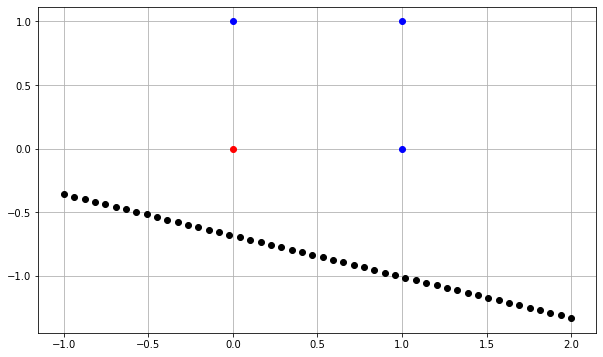

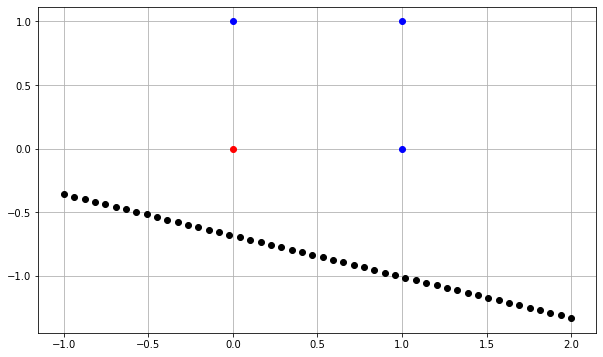

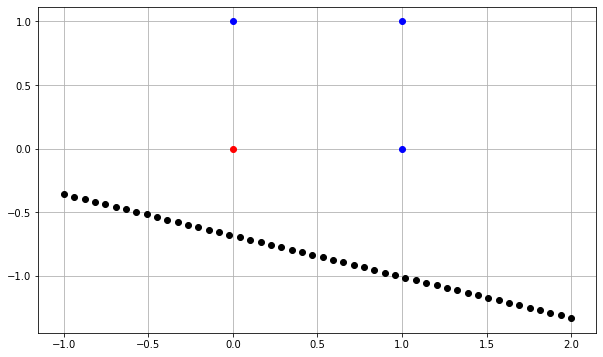

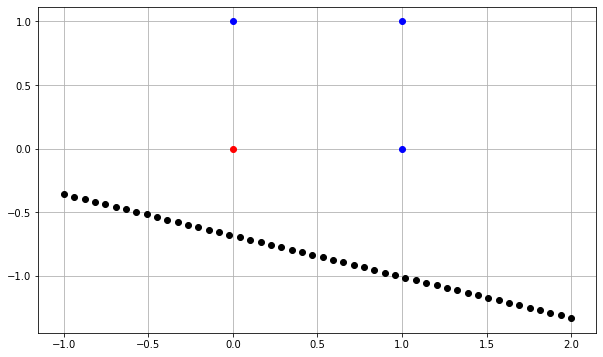

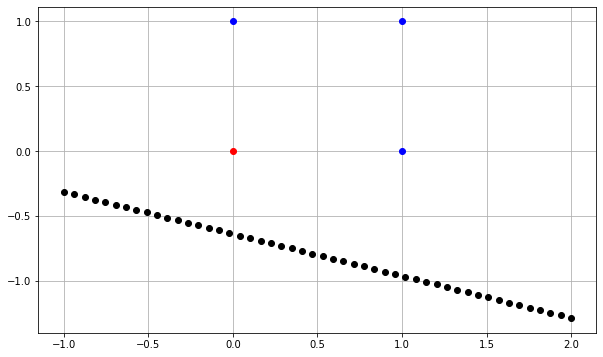

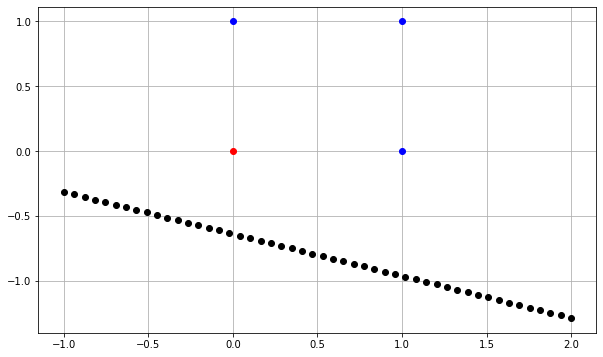

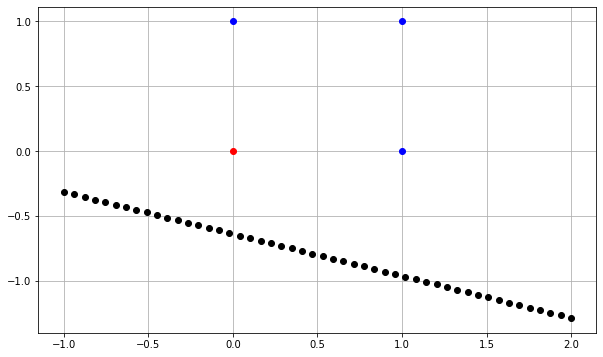

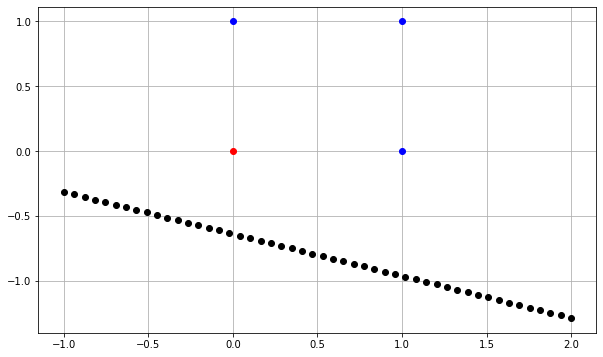

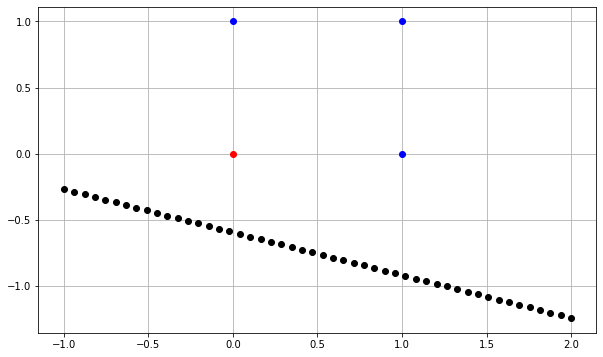

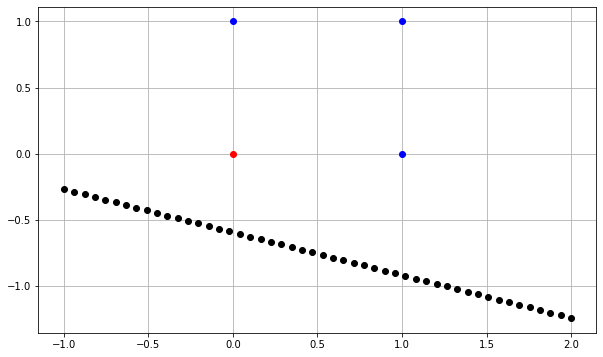

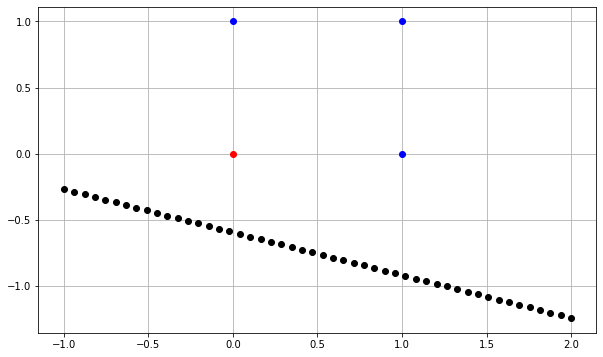

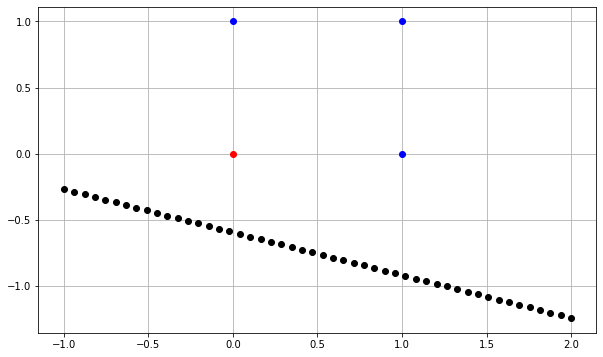

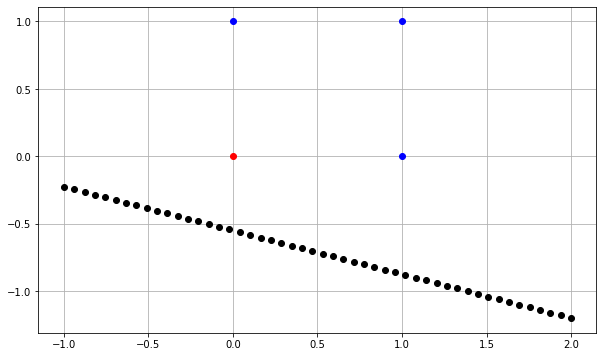

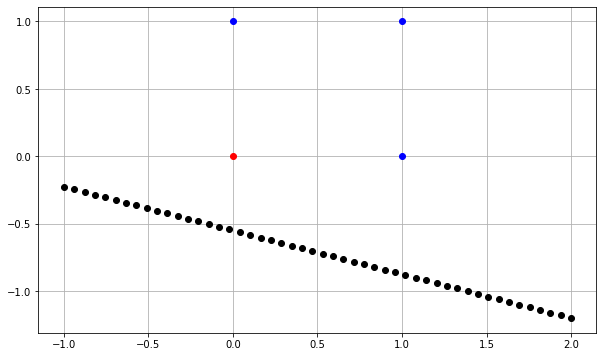

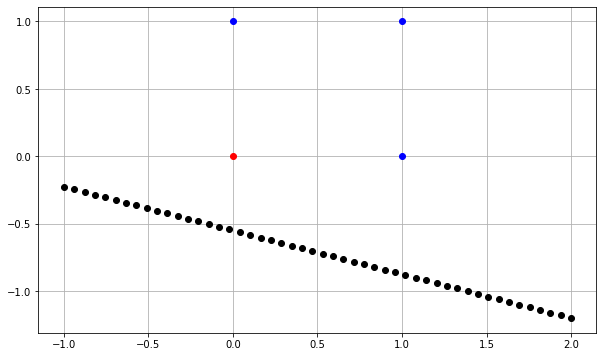

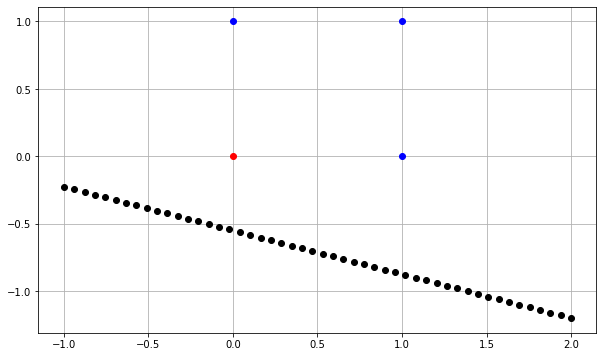

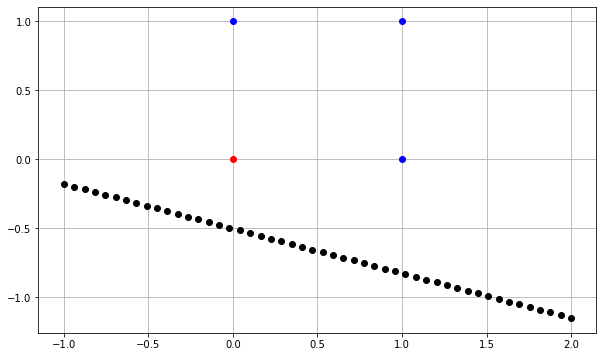

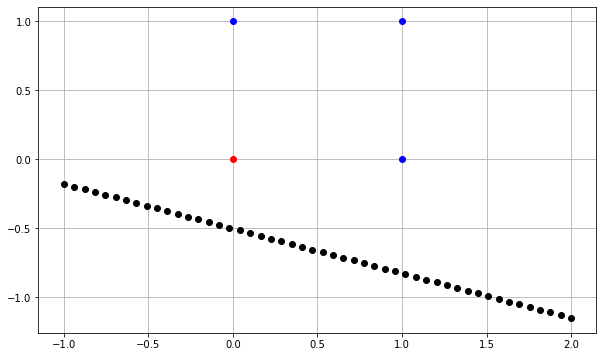

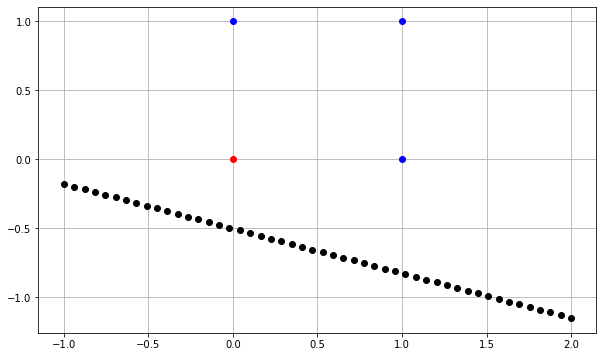

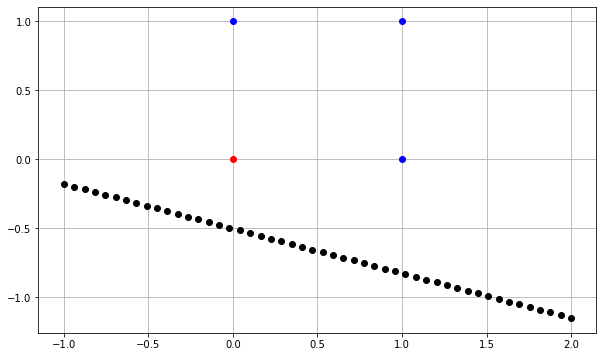

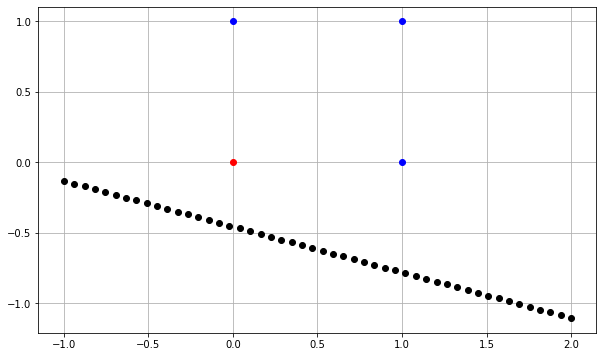

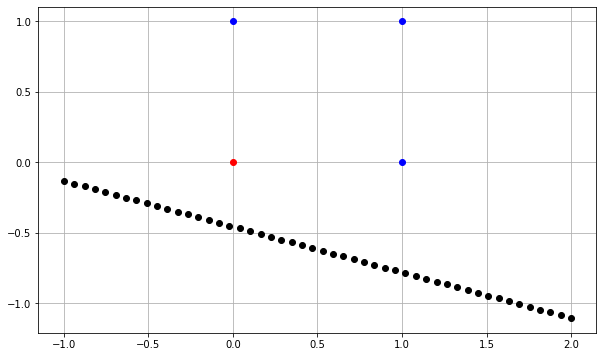

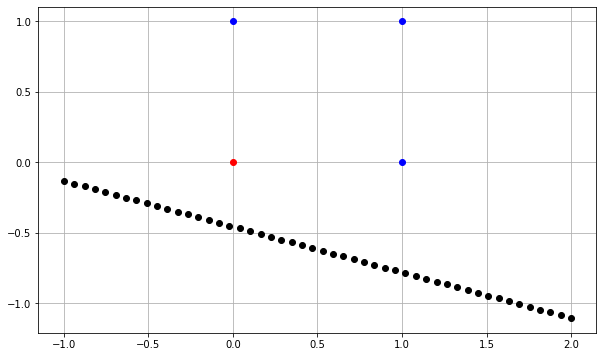

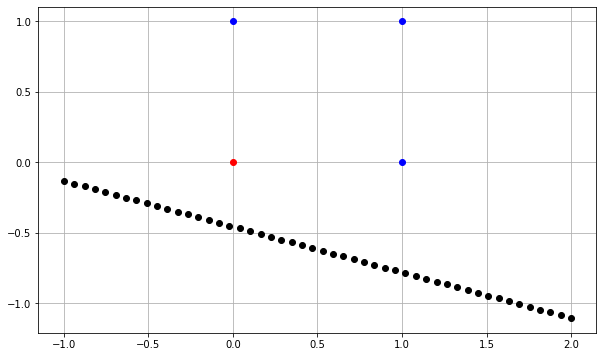

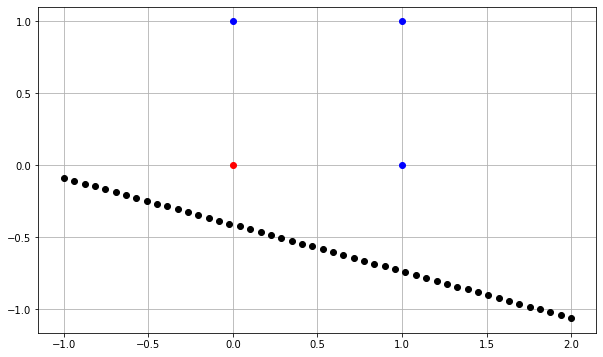

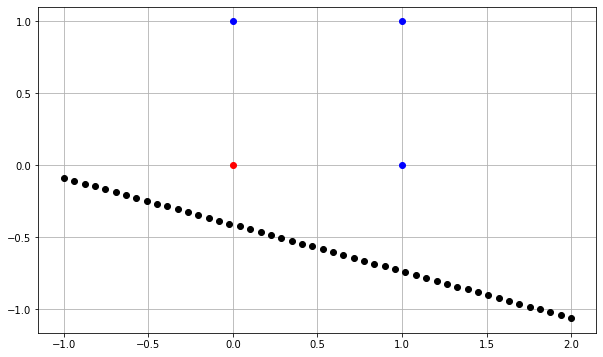

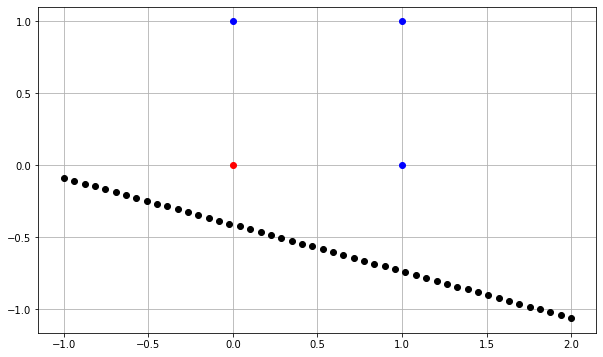

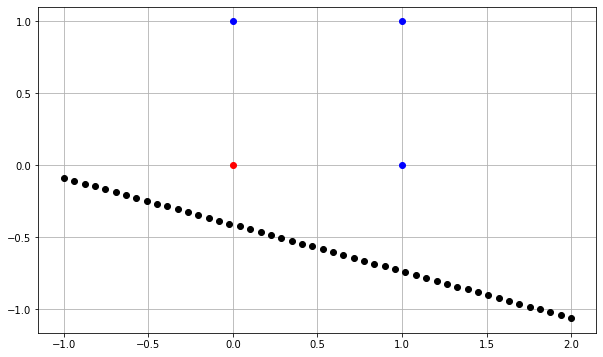

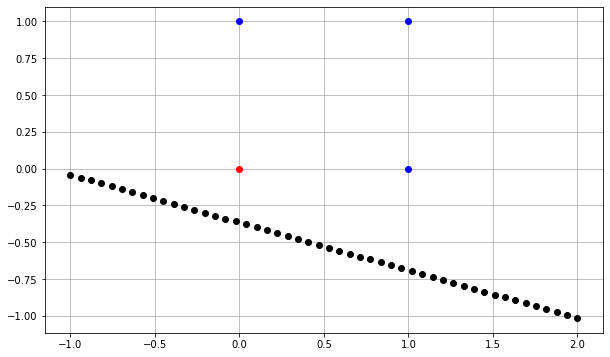

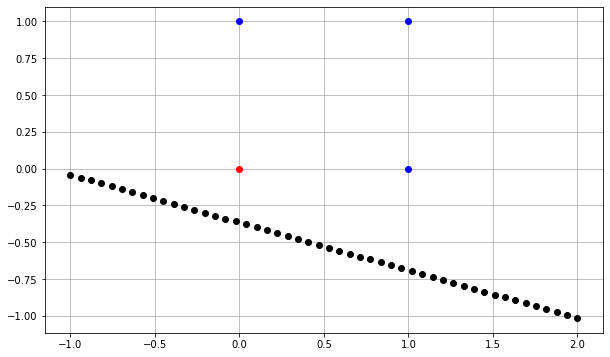

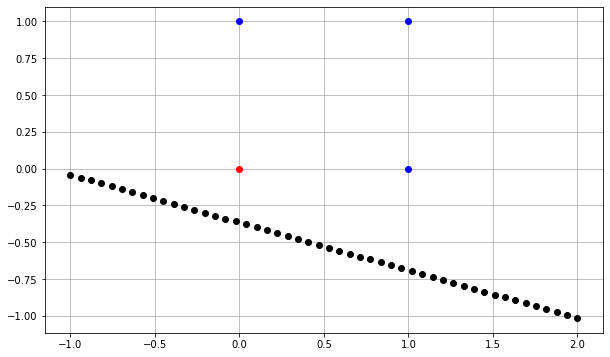

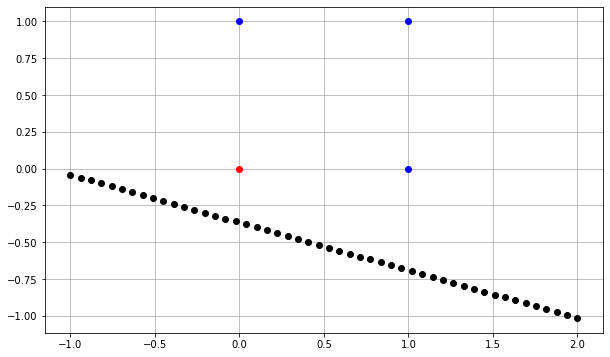

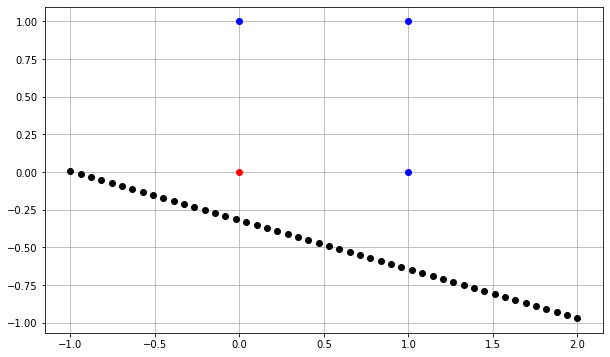

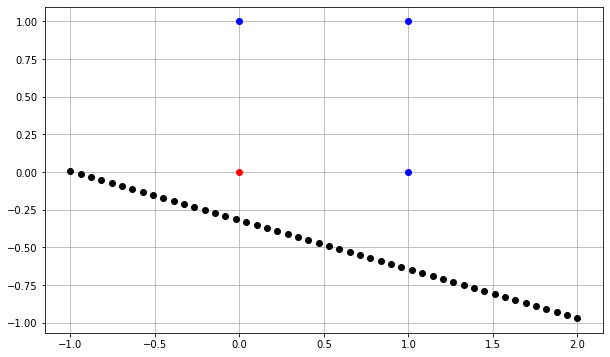

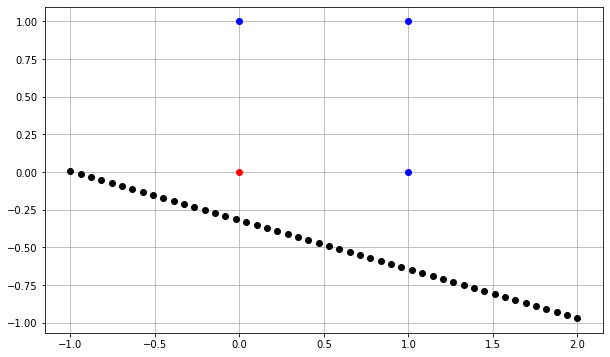

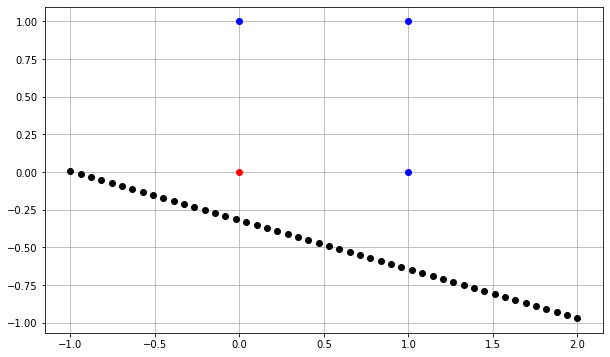

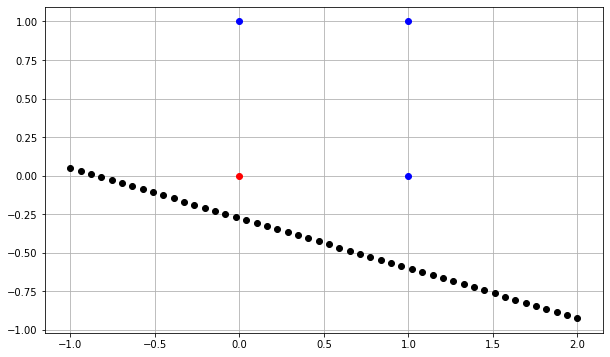

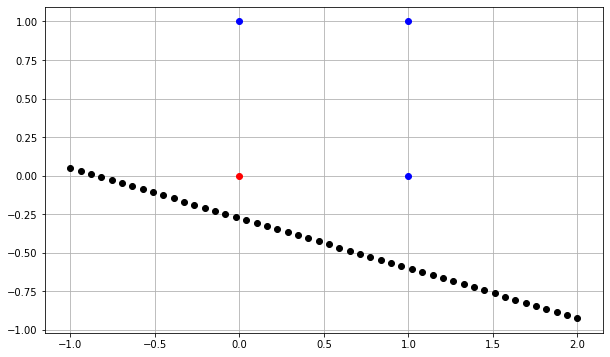

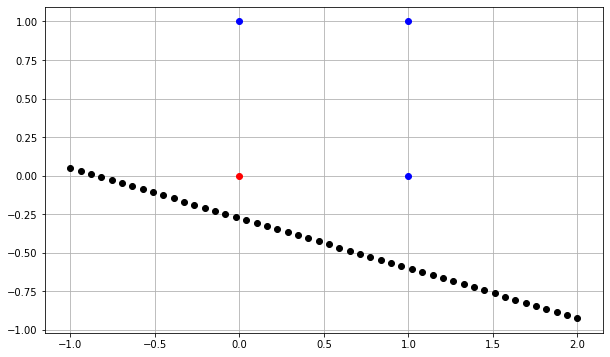

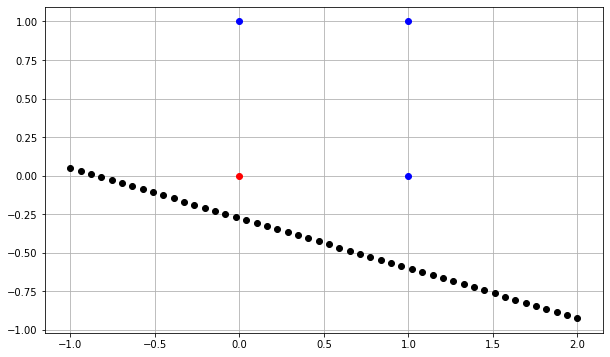

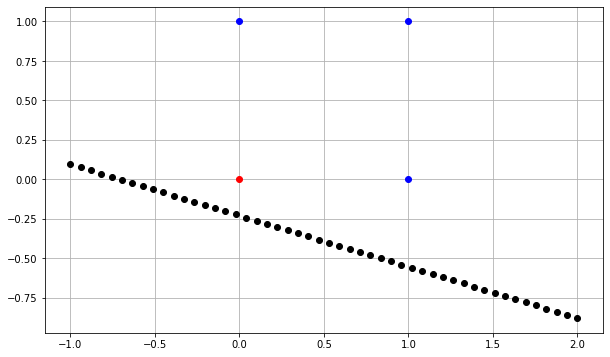

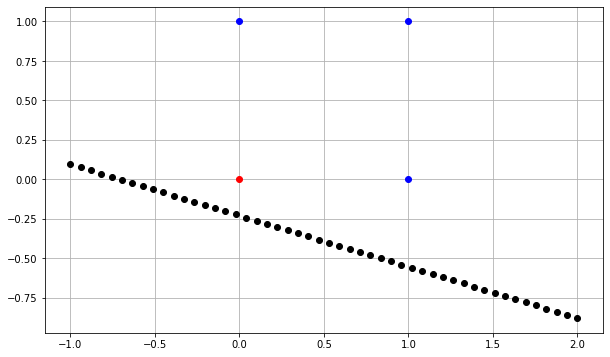

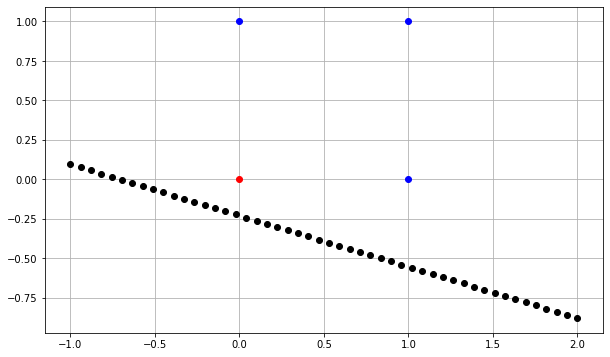

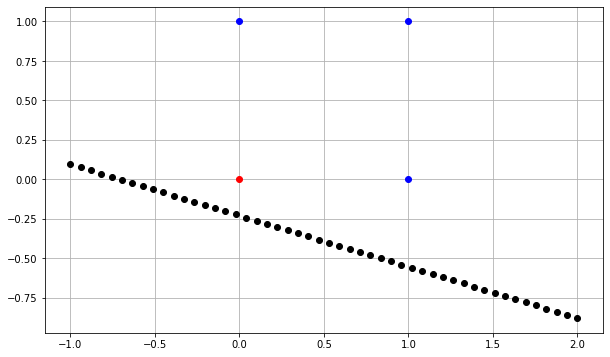

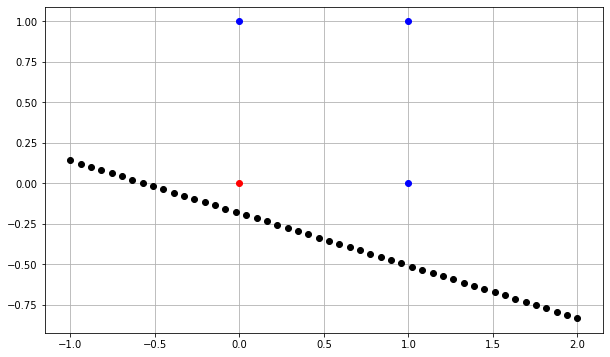

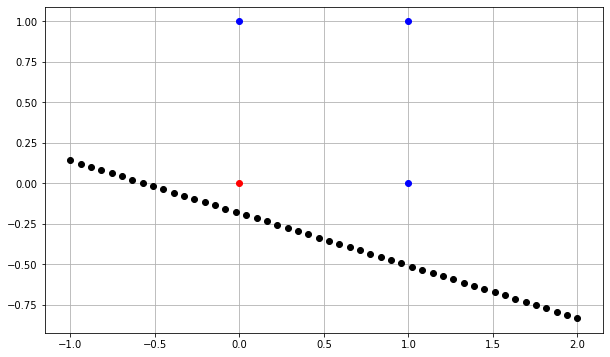

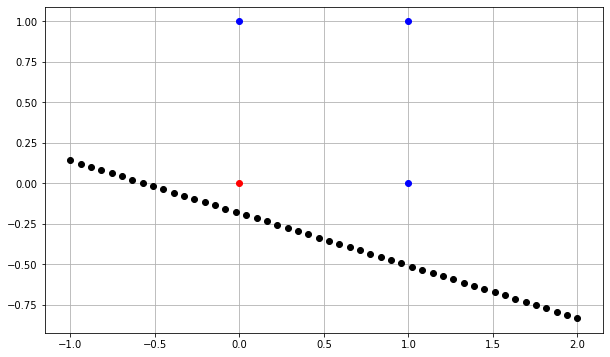

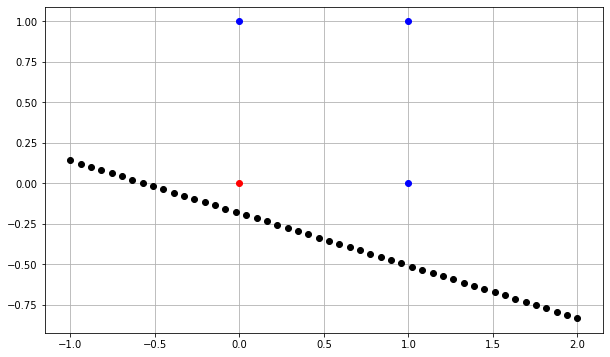

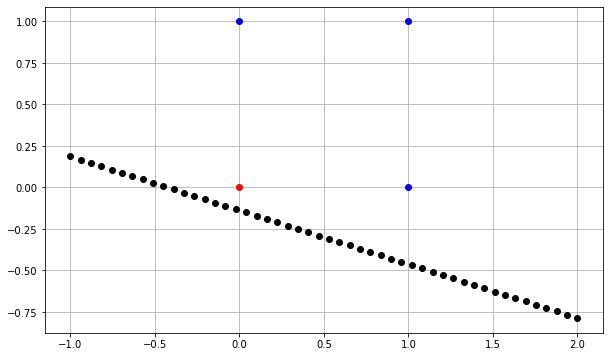

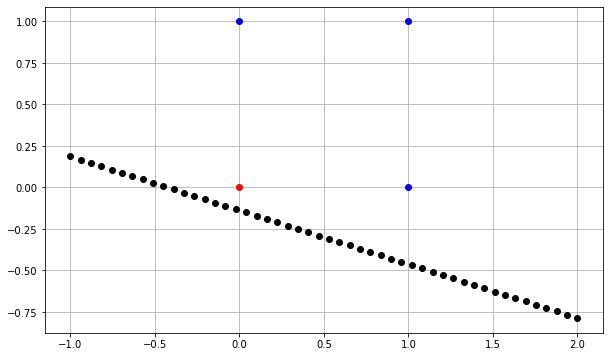

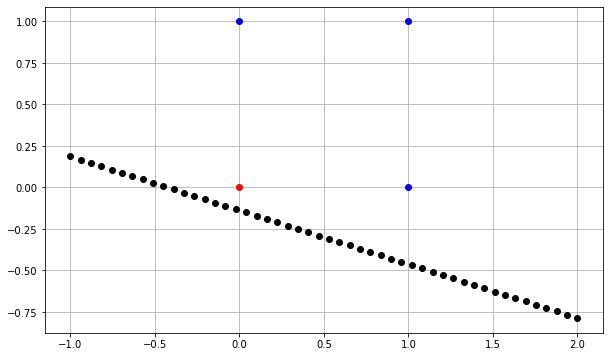

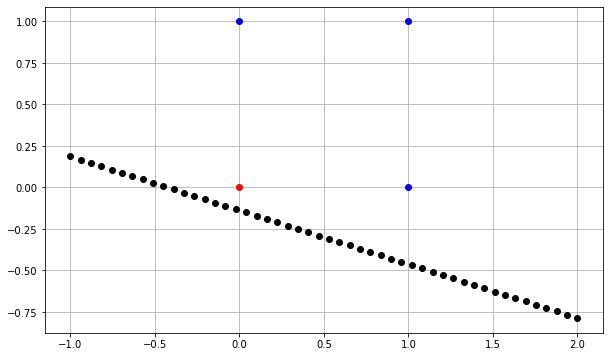

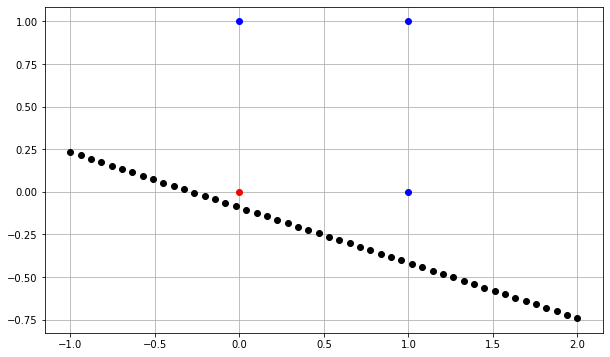

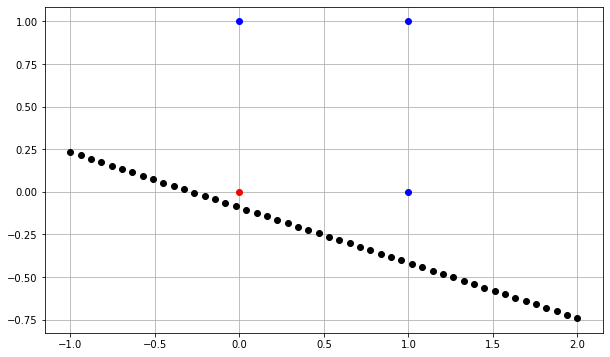

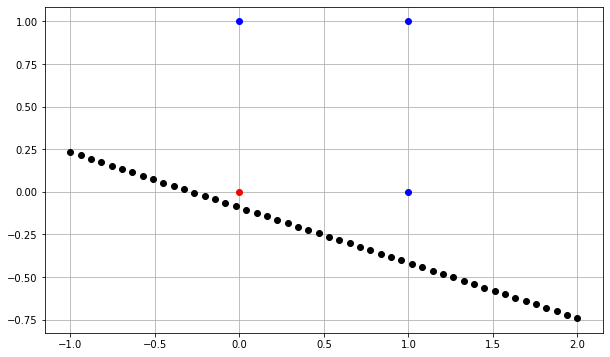

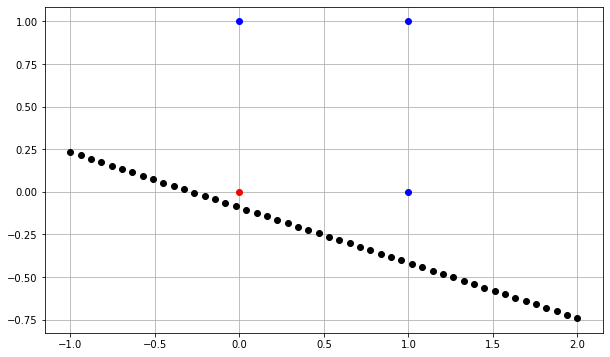

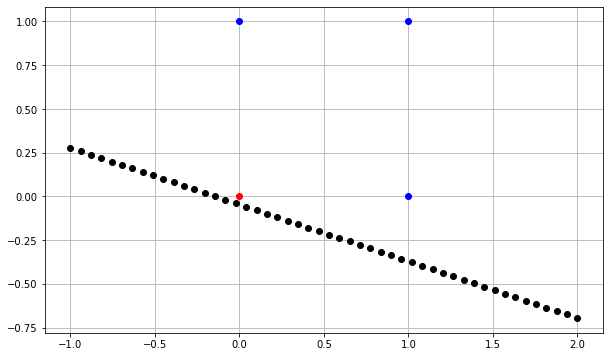

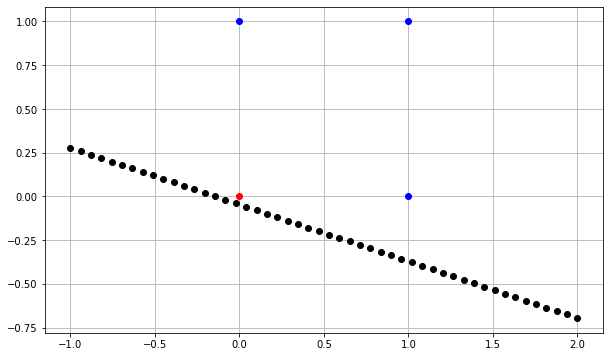

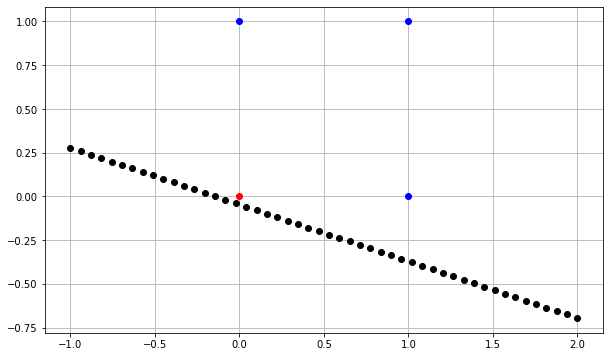

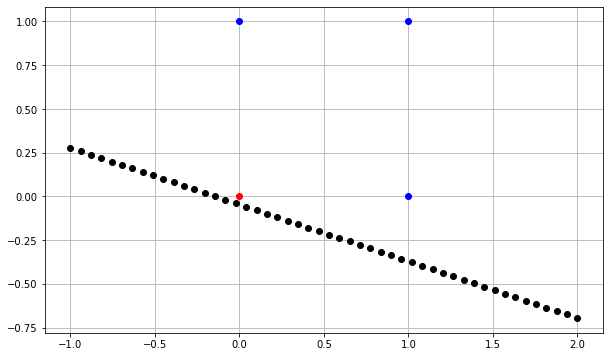

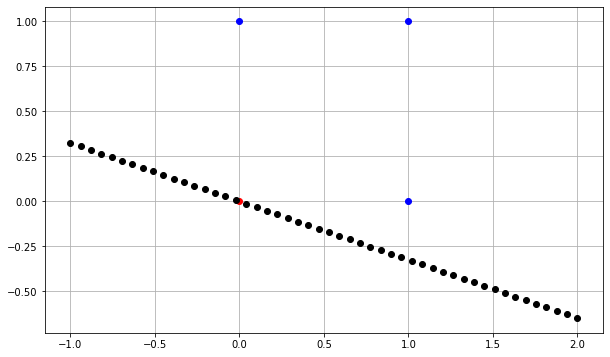

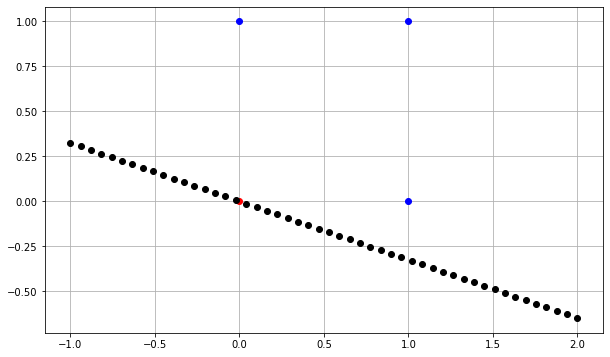

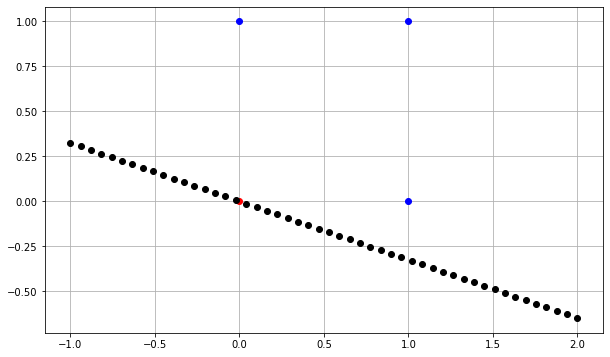

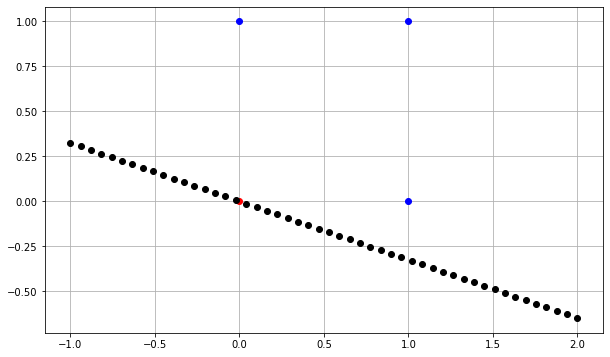

In [8]:
perp = Perceptron(X, Y)
perp.train()

Slope:  -0.32456864995727513 Y-Intercept:  3.4363712967693326e-15


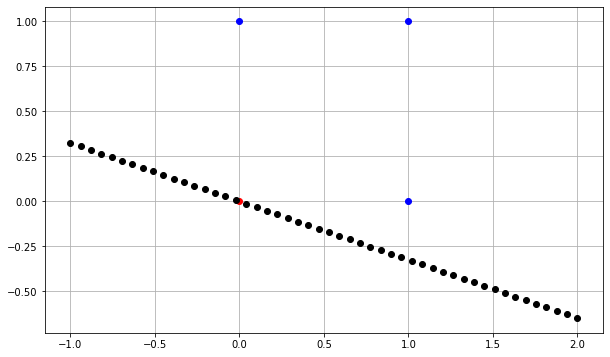

In [9]:
perp.plot_data()

Text(0, 0.5, 'cost')

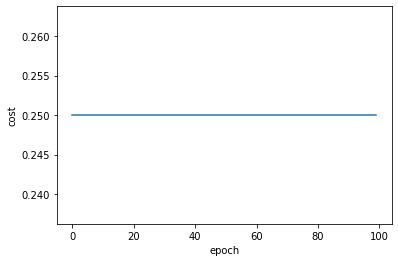

In [10]:
# Visualize Model progress
plt.plot(perp.cost_list)
plt.xlabel('epoch')
plt.ylabel('cost')

In [11]:
# AND
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([0, 0, 0, 1])

..........
Initial Weights:  [0.27402296 0.64292148]
Initial Bias:  1.0
Slope:  -0.42621527995512265 Y-Intercept:  -3.61283597238672
Slope:  -0.4329493740618533 Y-Intercept:  -3.576342679736349
Slope:  -0.4171496258514192 Y-Intercept:  -3.673922931811483
Slope:  -0.4171496258514192 Y-Intercept:  -3.673922931811483
Epoch: 0001	Misclassifed: 03 	Loss: 0.75000		Regression: 0.26(X1) + 0.63(X2) + 0.97
Slope:  -0.4171496258514192 Y-Intercept:  -3.6360474376690965
Slope:  -0.42384629052158673 Y-Intercept:  -3.5981719435267103
Slope:  -0.40779290282766417 Y-Intercept:  -3.70045293276338
Slope:  -0.40779290282766417 Y-Intercept:  -3.70045293276338
Epoch: 0002	Misclassifed: 03 	Loss: 0.75000		Regression: 0.25(X1) + 0.62(X2) + 0.94
Slope:  -0.4077929028276641 Y-Intercept:  -3.6610864122020677
Slope:  -0.41444616783823185 Y-Intercept:  -3.6217198916407547
Slope:  -0.3981308642504709 Y-Intercept:  -3.729157319368741
Slope:  -0.3981308642504709 Y-Intercept:  -3.729157319368741
Epoch: 0003	Misclassif

D:\ProgramData\Anaconda3\envs\appliedaicourse\lib\site-packages\ipykernel_launcher.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Epoch: 0006	Misclassifed: 03 	Loss: 0.75000		Regression: 0.21(X1) + 0.58(X2) + 0.82
Slope:  -0.3671557248309943 Y-Intercept:  -3.7846407109209115
Slope:  -0.3735642072932292 Y-Intercept:  -3.737916751526826
Slope:  -0.35610980844057666 Y-Intercept:  -3.8721132546104595
Slope:  -0.35610980844057666 Y-Intercept:  -3.8721132546104595
Epoch: 0007	Misclassifed: 03 	Loss: 0.75000		Regression: 0.20(X1) + 0.57(X2) + 0.79
Slope:  -0.35610980844057666 Y-Intercept:  -3.8230991627799473
Slope:  -0.36243590936108894 Y-Intercept:  -3.774085070949435
Slope:  -0.34467144241698927 Y-Intercept:  -3.917062226809599
Slope:  -0.34467144241698927 Y-Intercept:  -3.917062226809599
Epoch: 0008	Misclassifed: 03 	Loss: 0.75000		Regression: 0.19(X1) + 0.56(X2) + 0.76
Slope:  -0.3446714424169893 Y-Intercept:  -3.865521934351578
Slope:  -0.35090508418551947 Y-Intercept:  -3.813981641893557
Slope:  -0.33281933352159127 Y-Intercept:  -3.9668963473274483
Slope:  -0.33281933352159127 Y-Intercept:  -3.9668963473274483
E

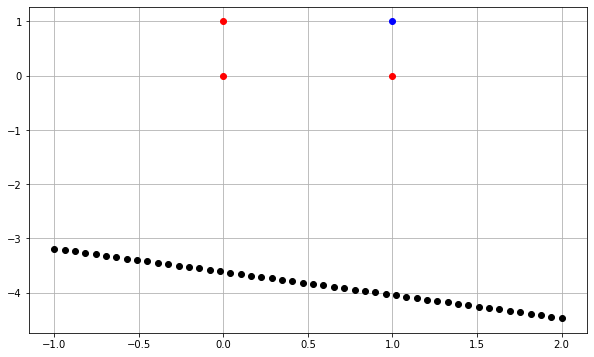

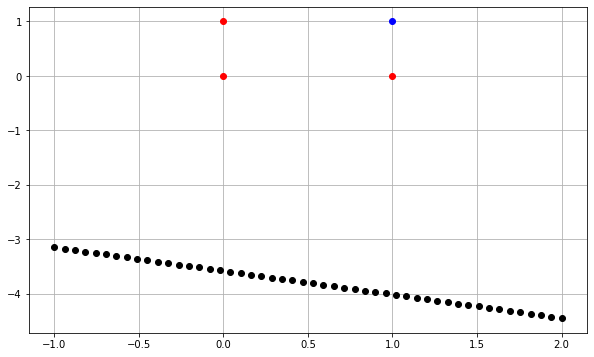

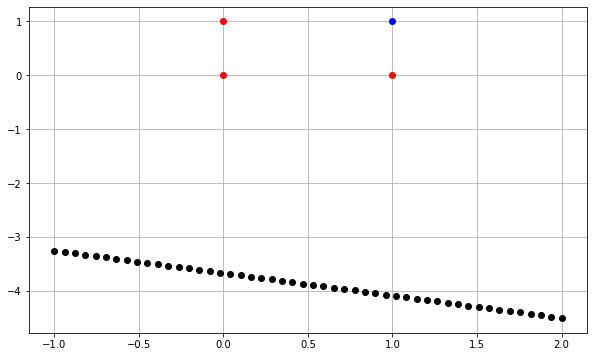

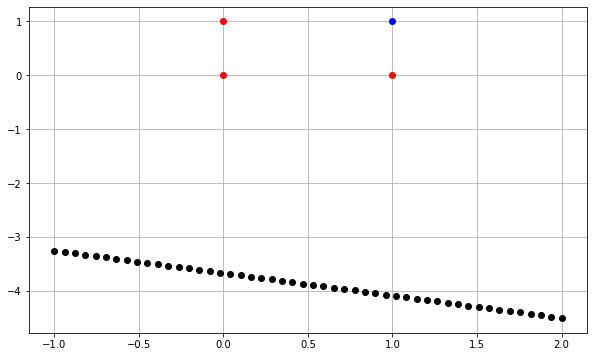

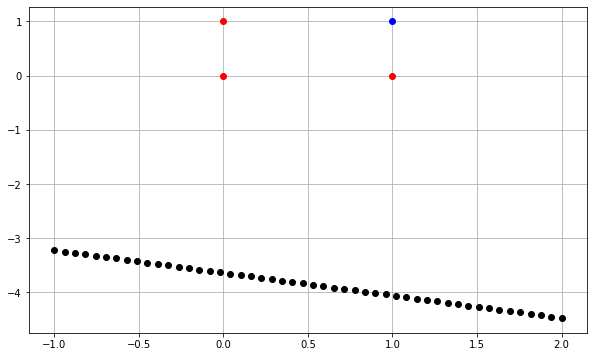

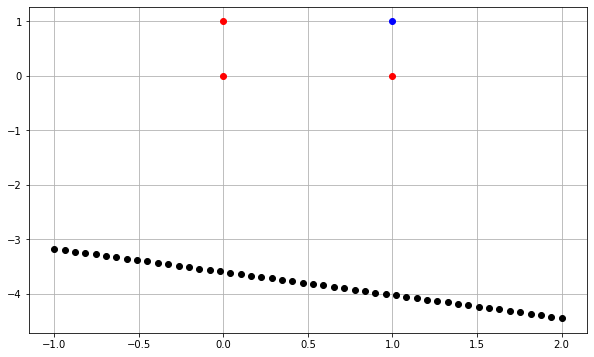

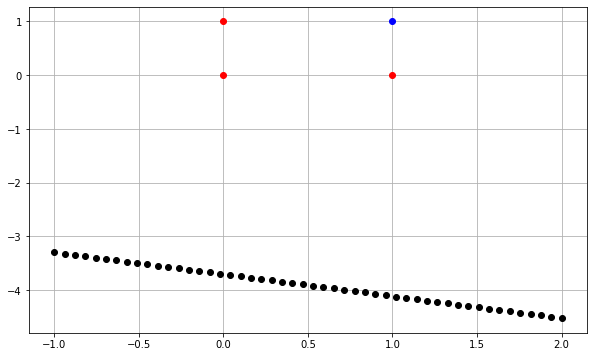

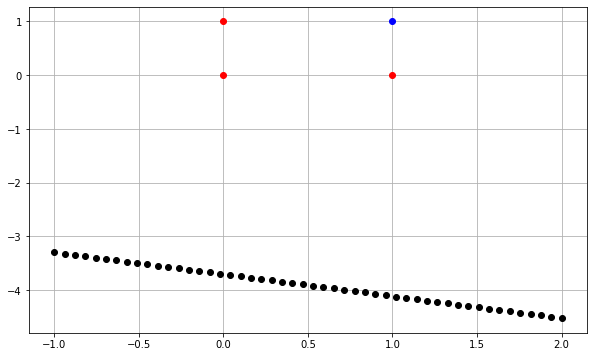

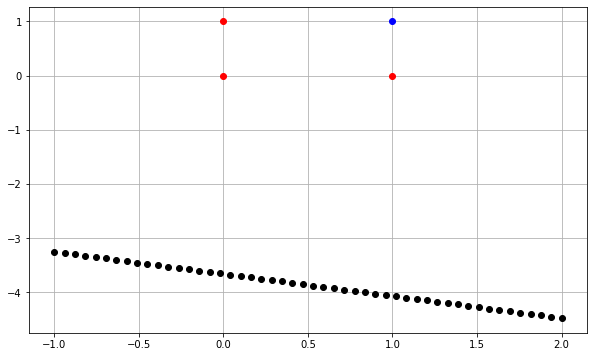

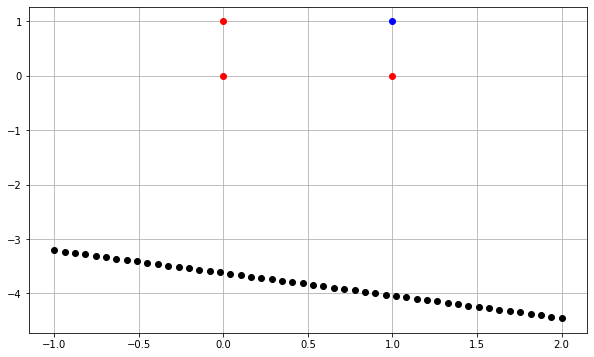

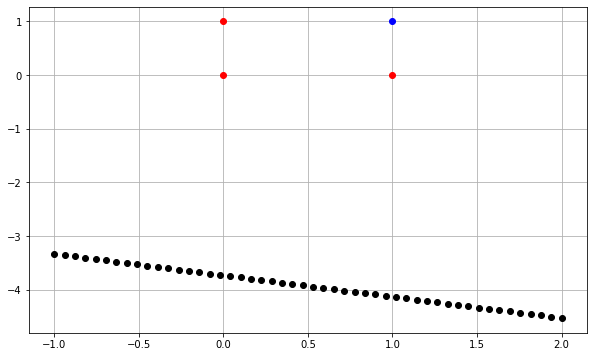

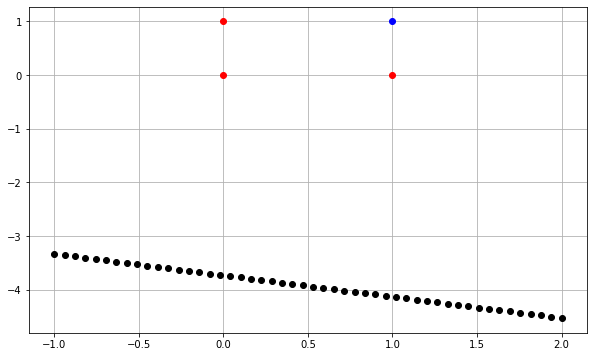

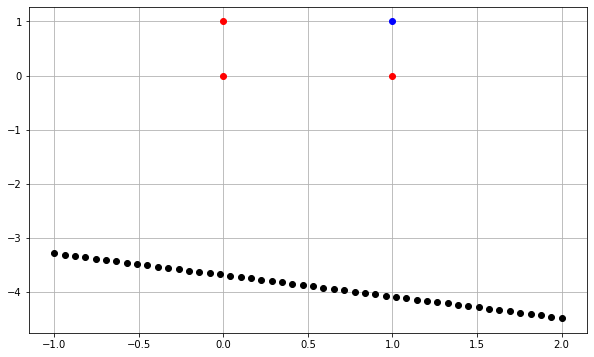

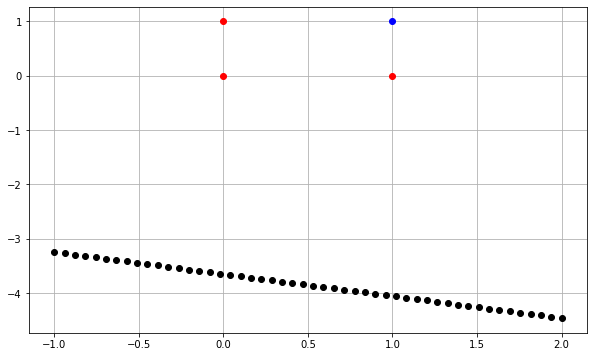

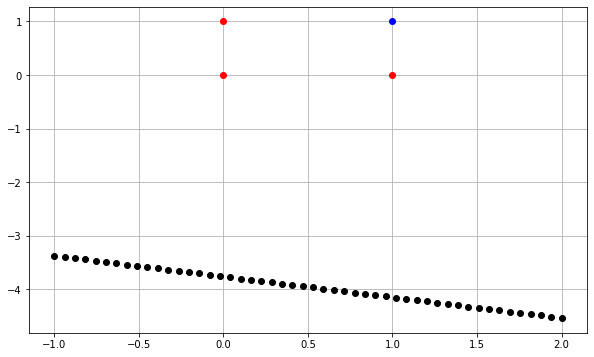

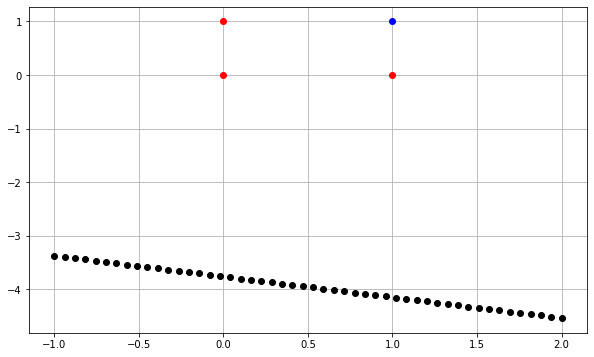

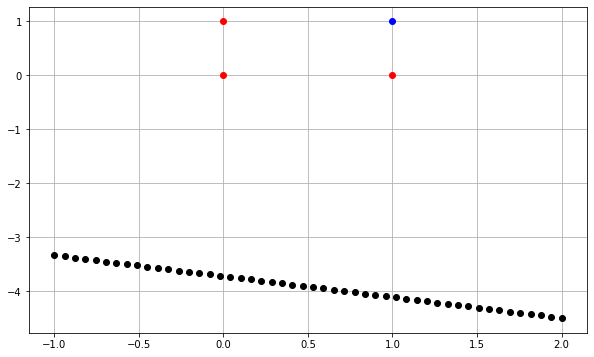

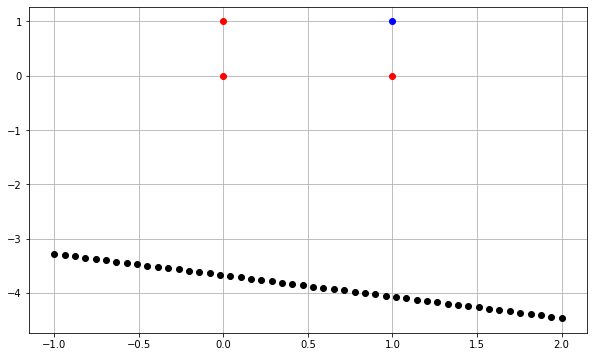

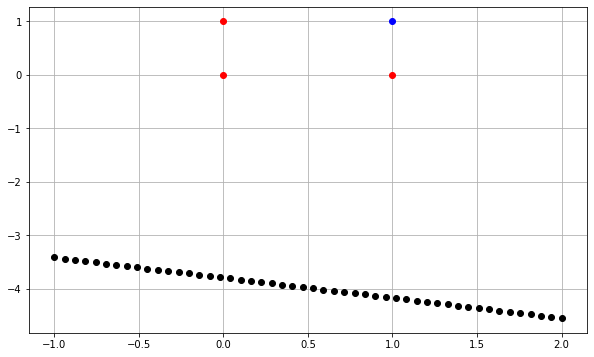

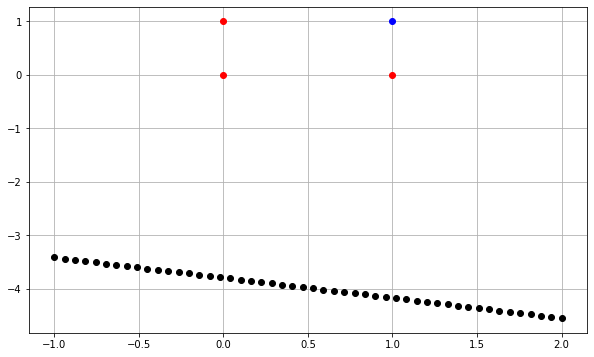

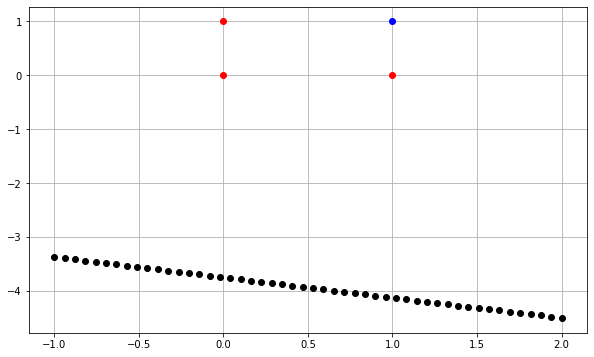

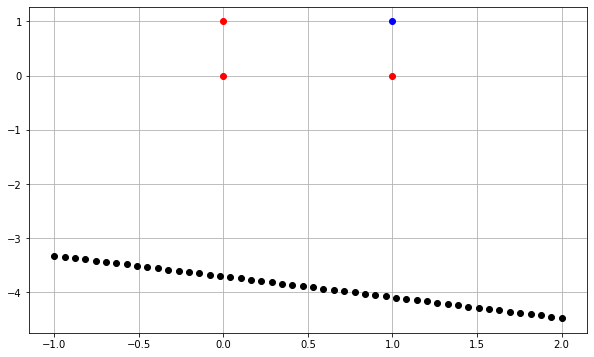

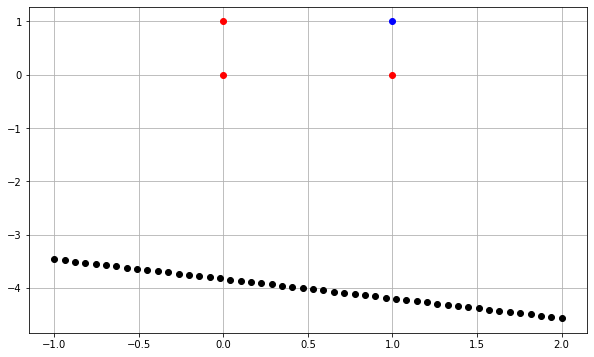

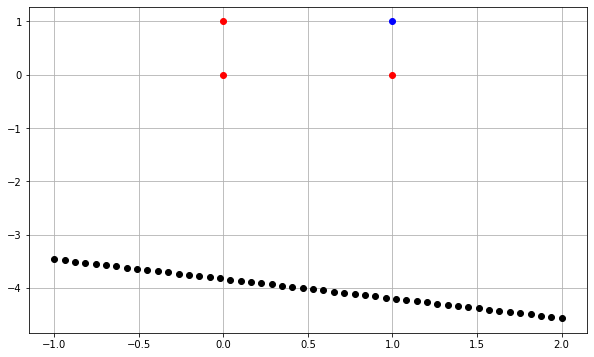

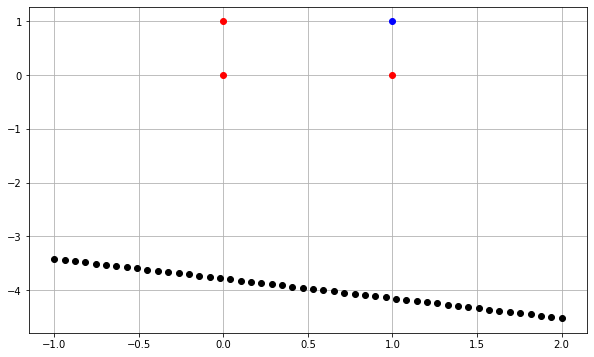

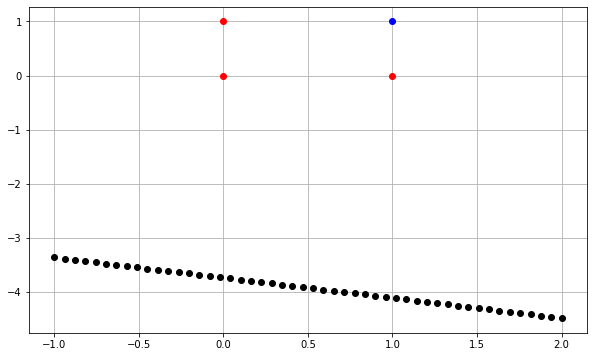

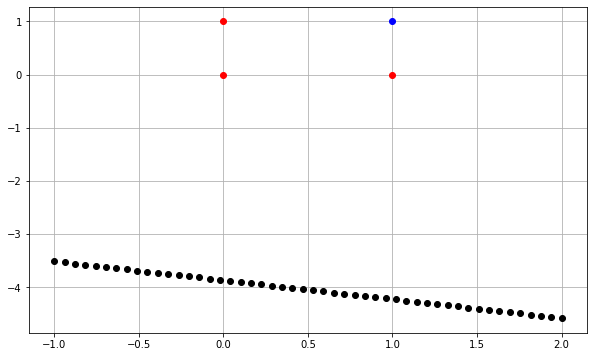

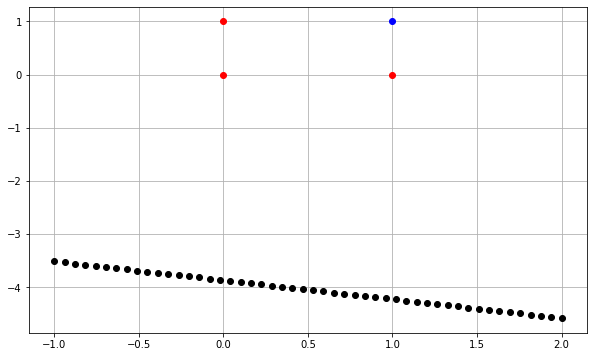

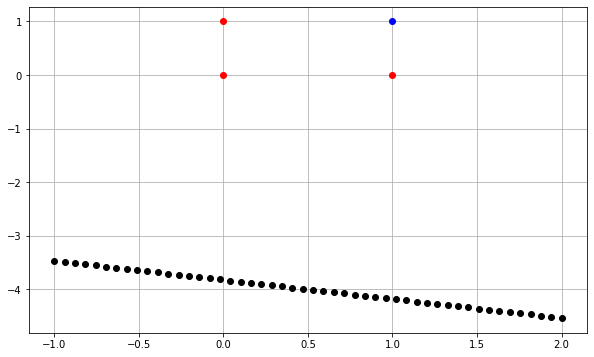

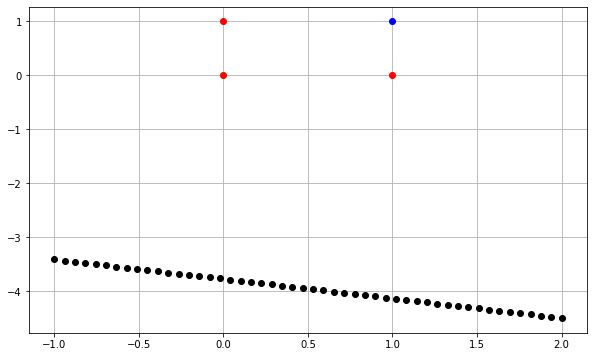

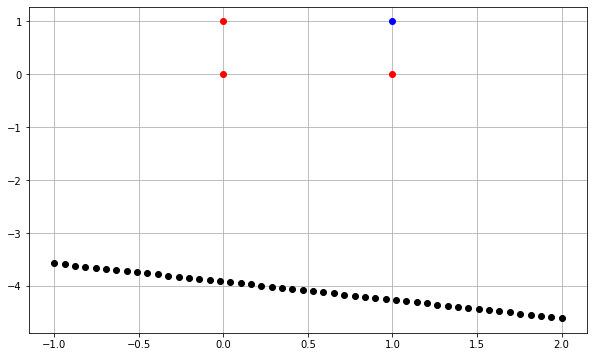

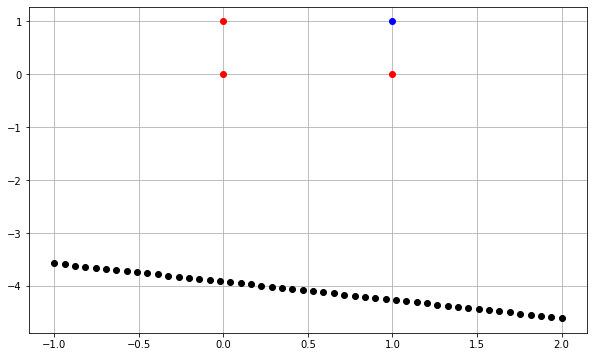

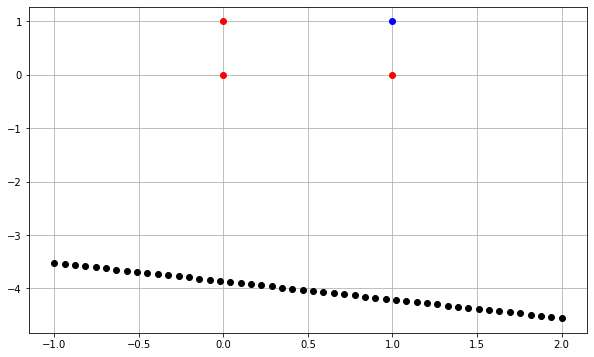

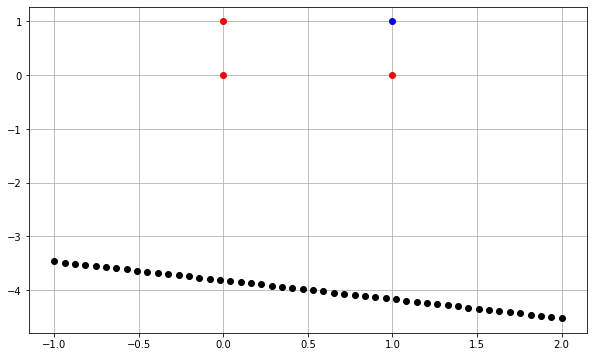

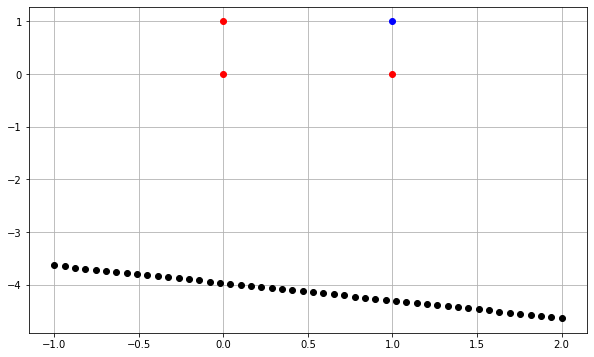

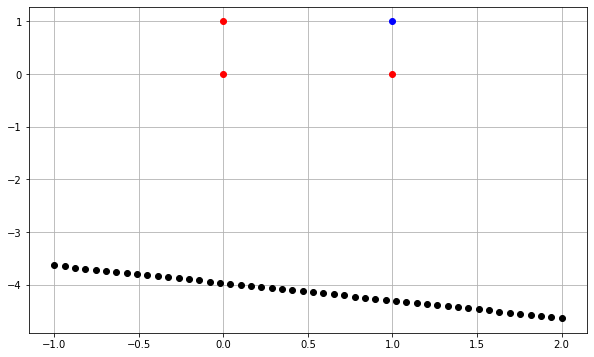

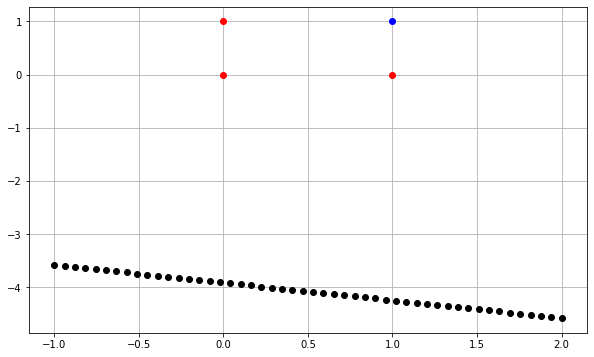

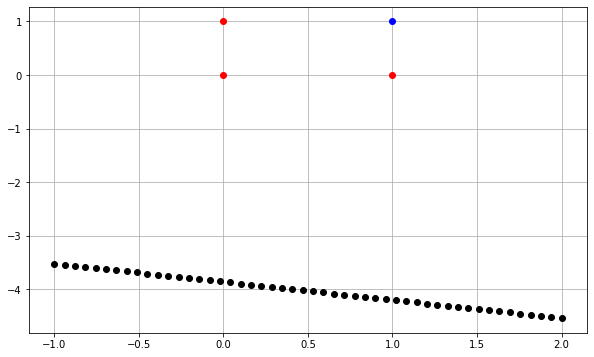

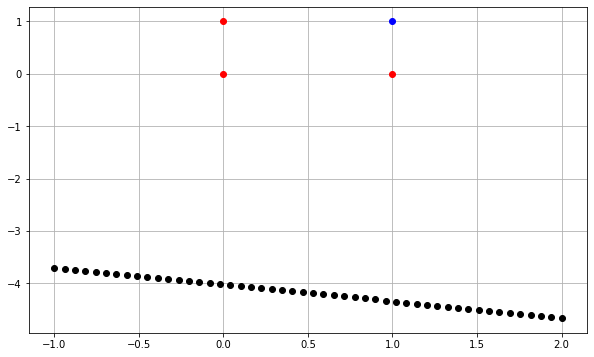

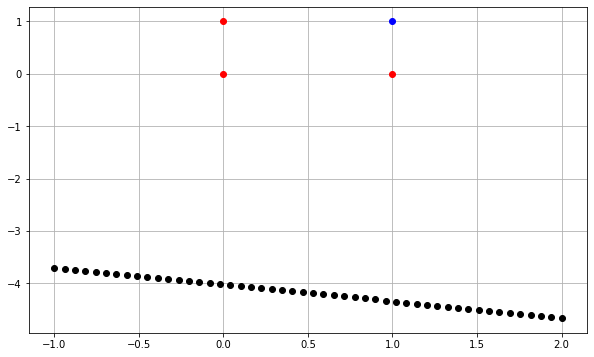

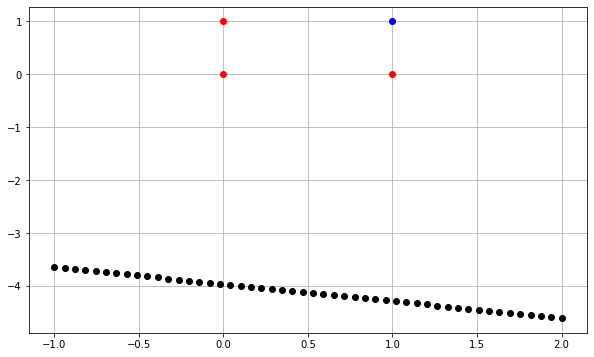

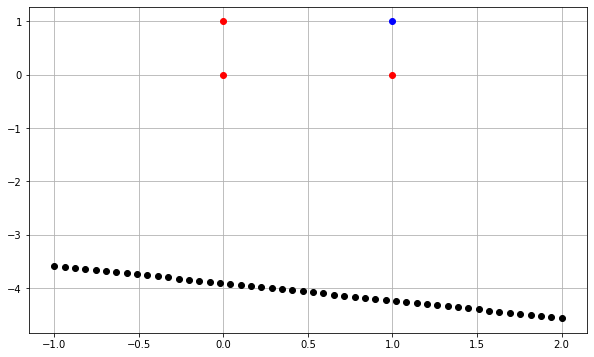

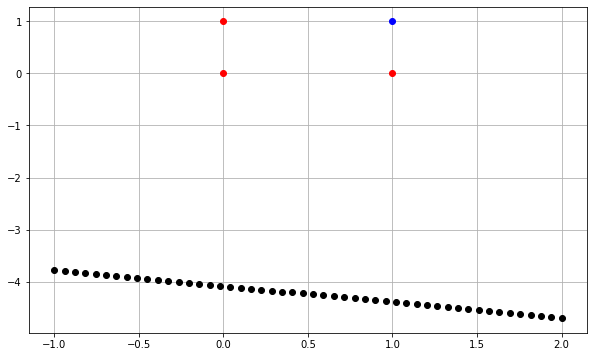

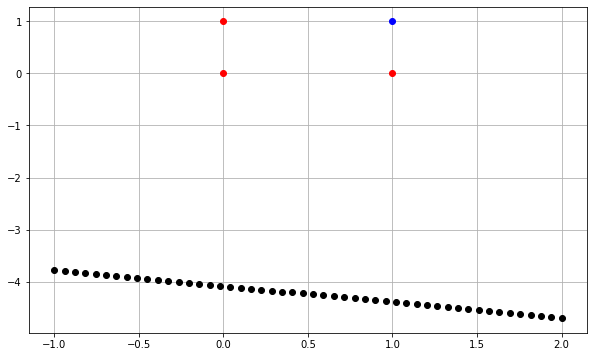

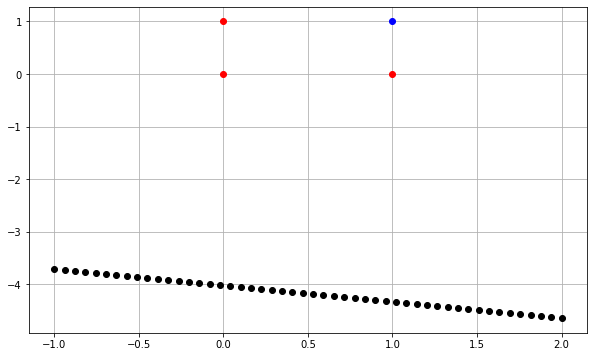

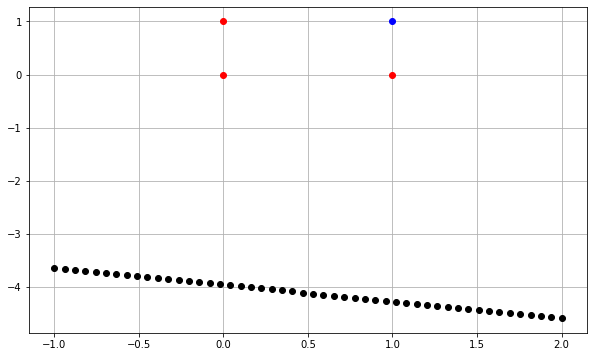

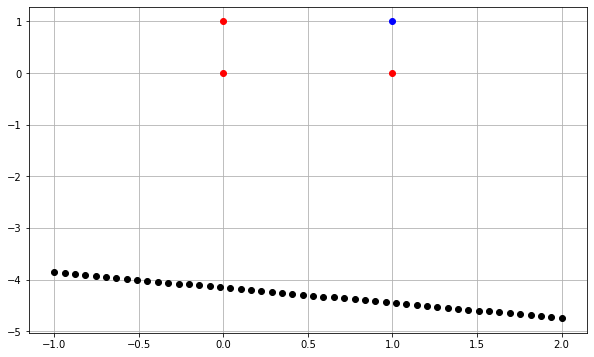

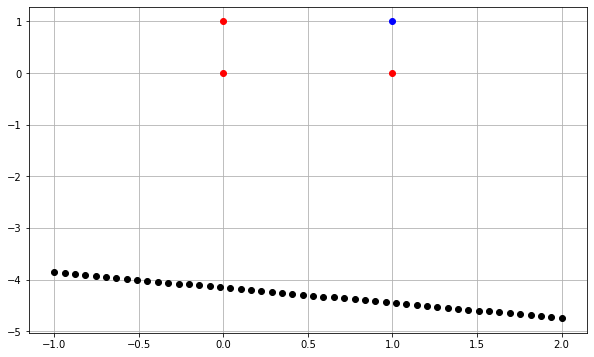

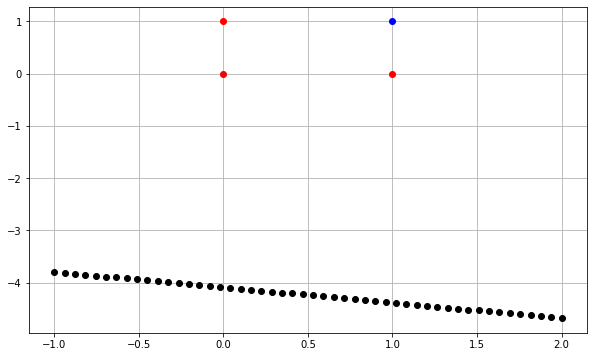

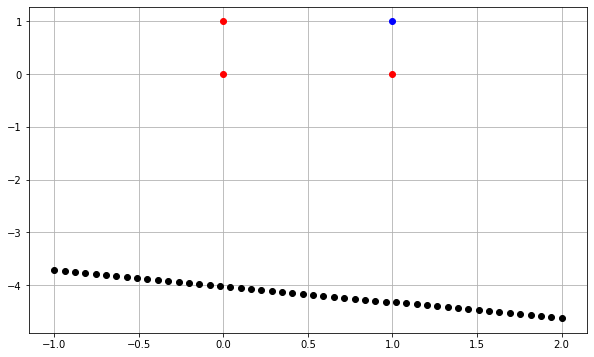

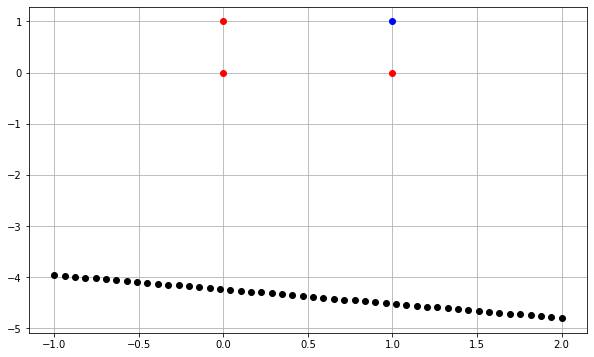

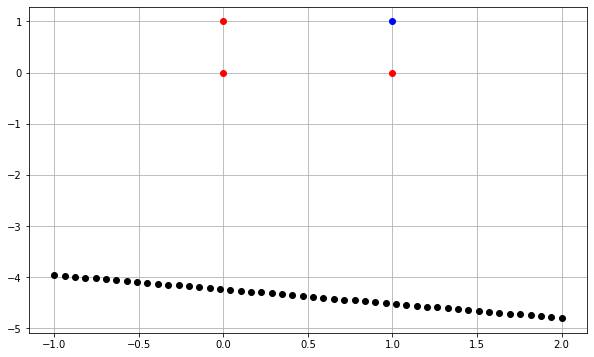

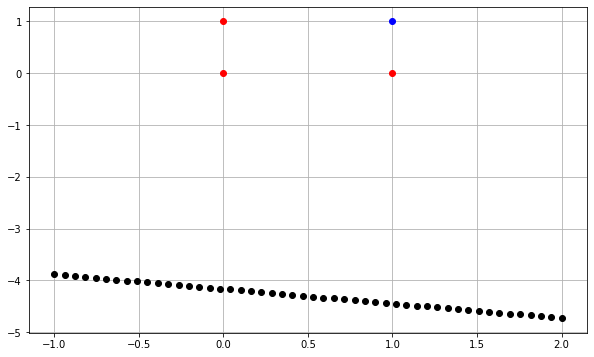

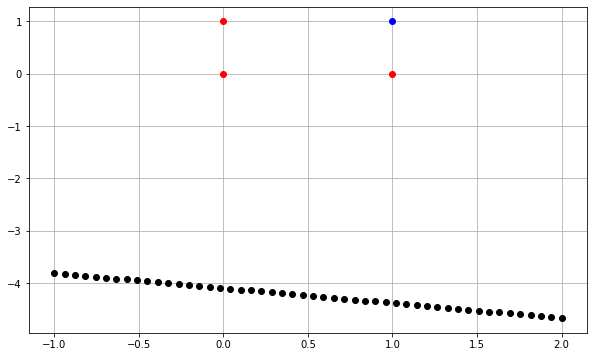

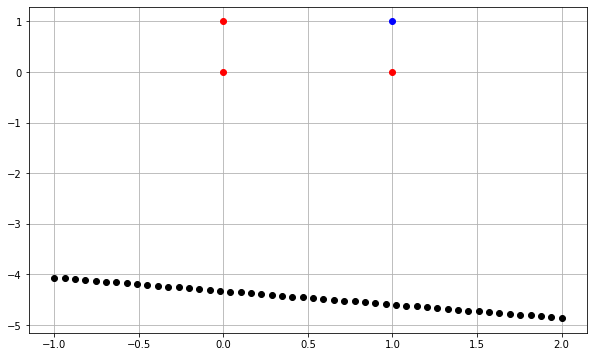

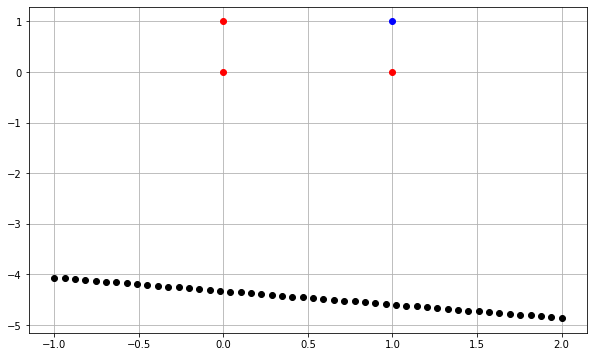

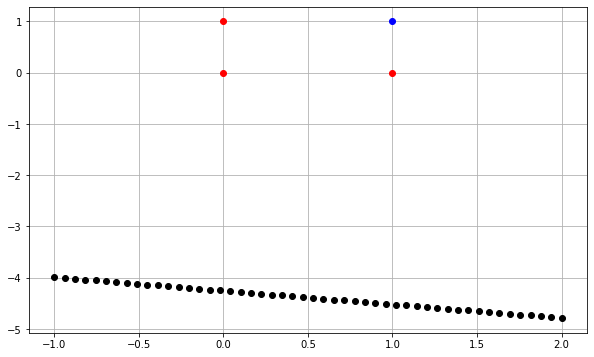

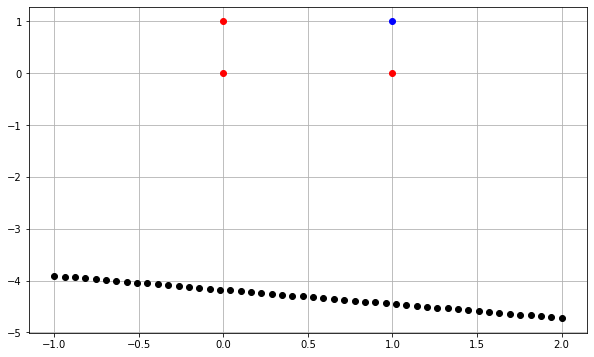

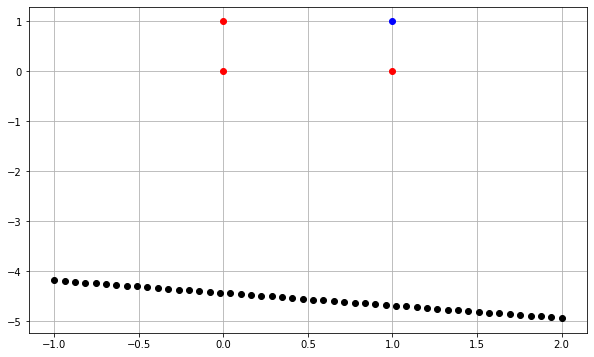

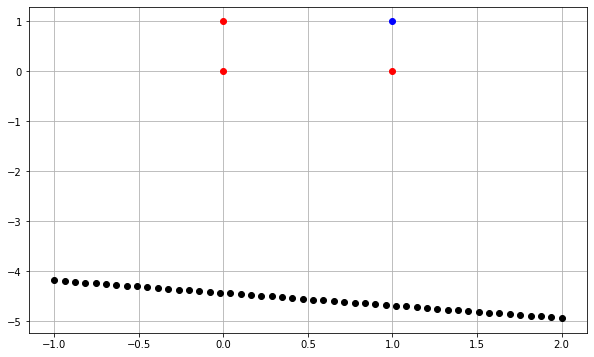

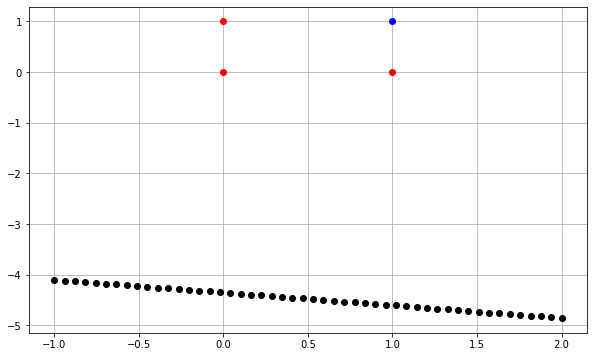

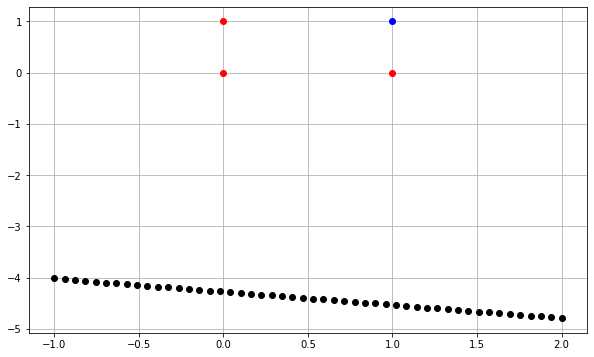

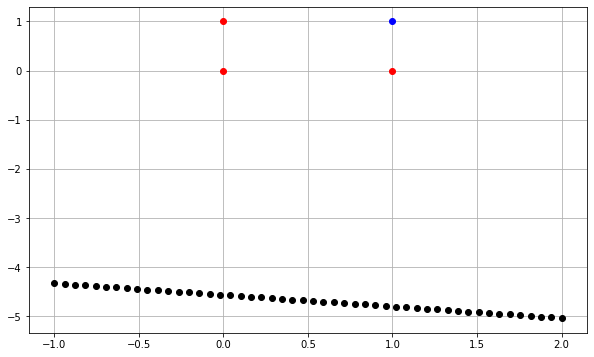

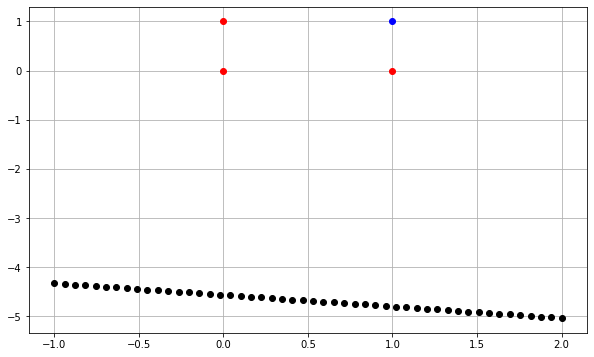

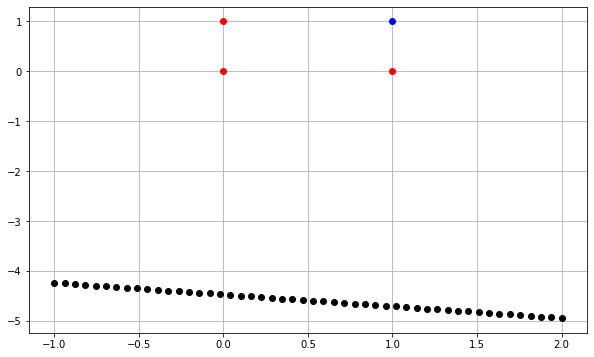

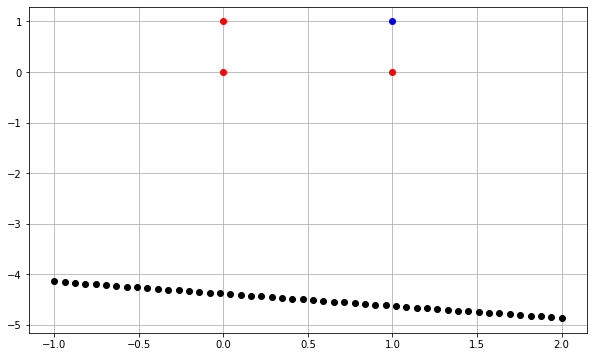

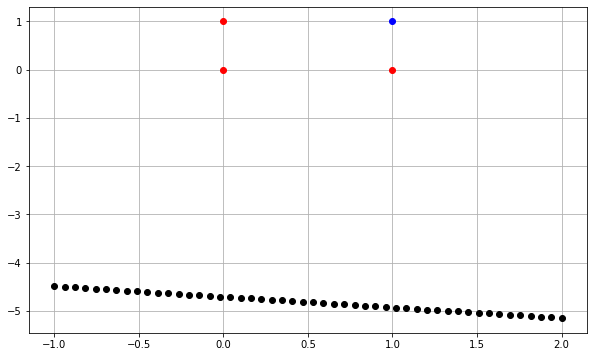

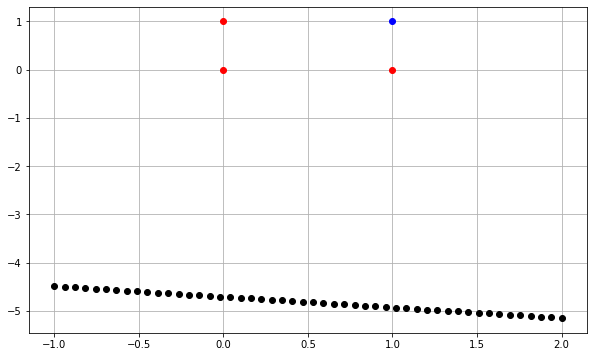

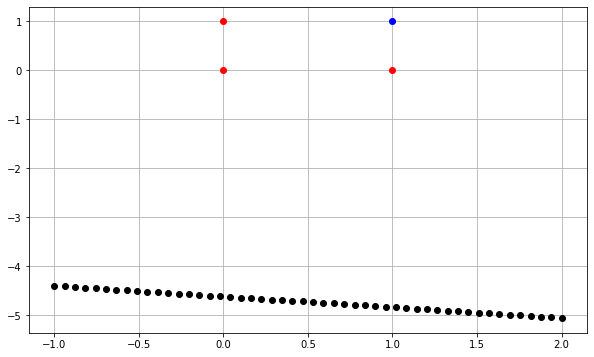

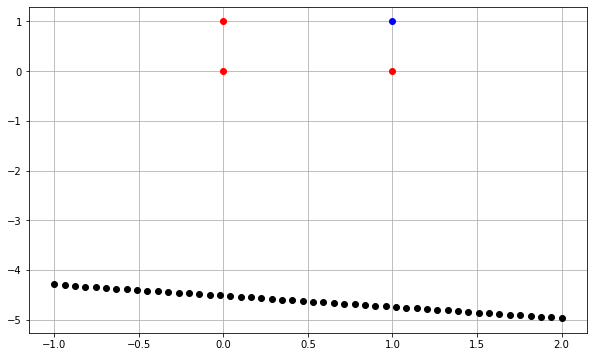

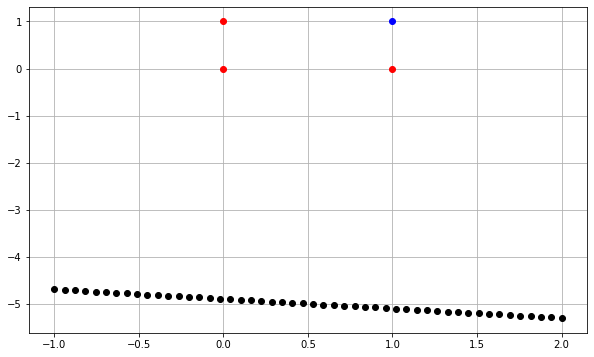

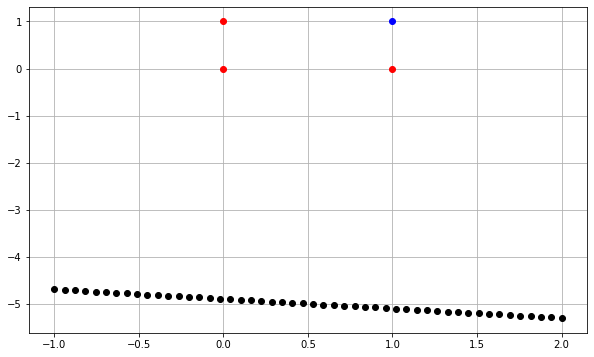

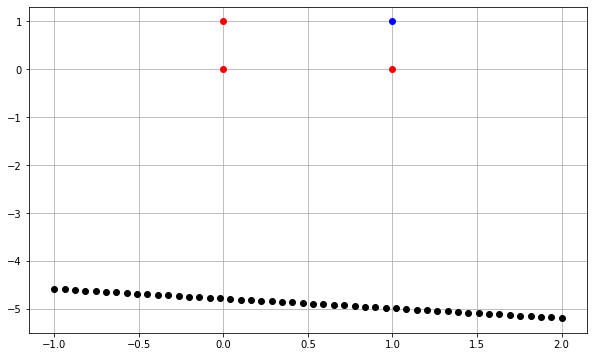

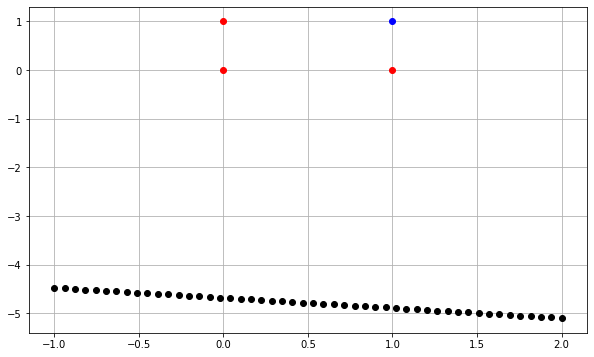

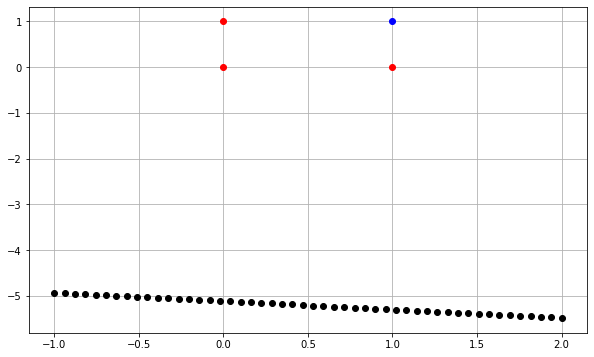

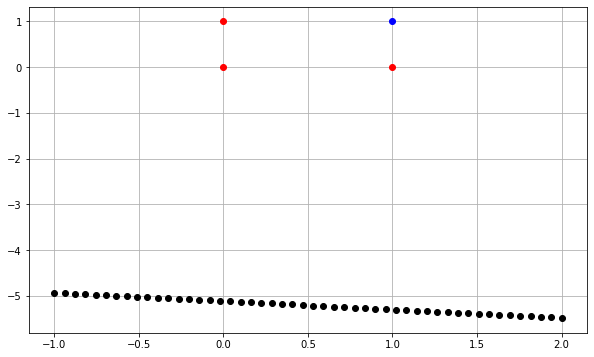

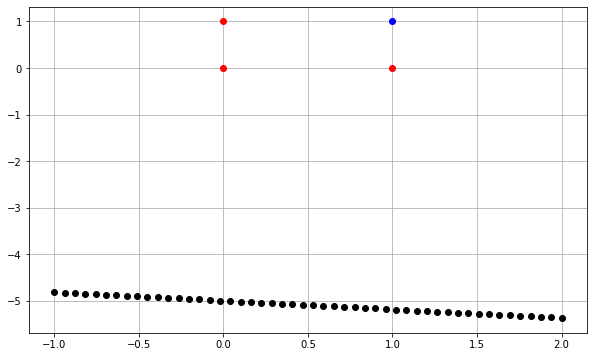

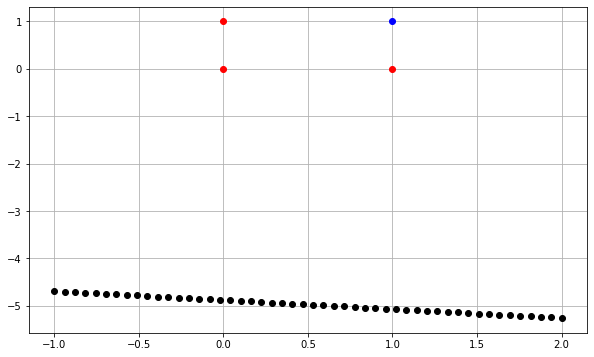

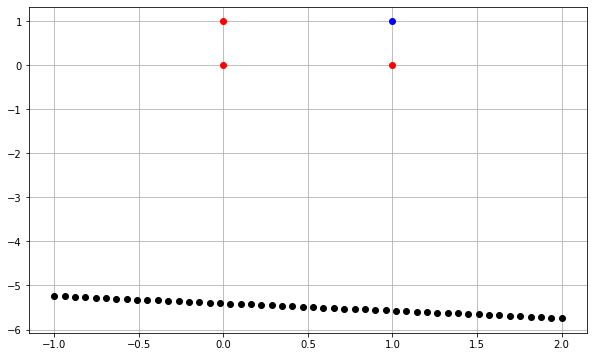

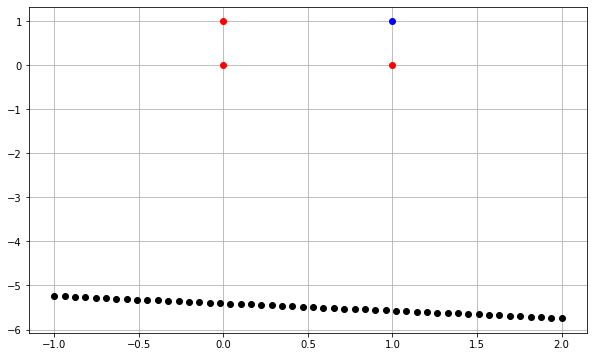

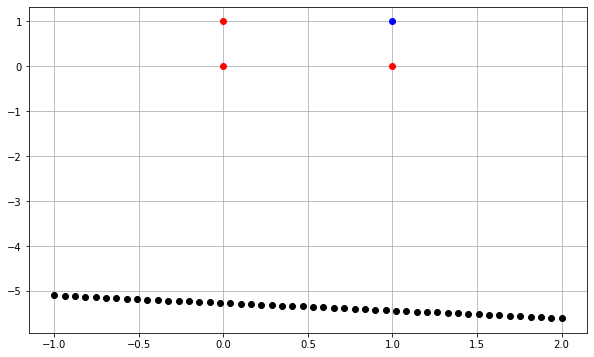

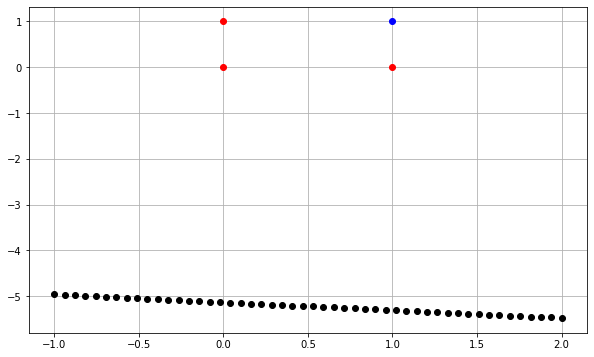

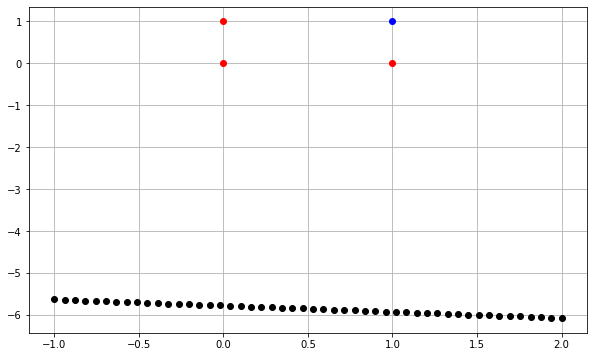

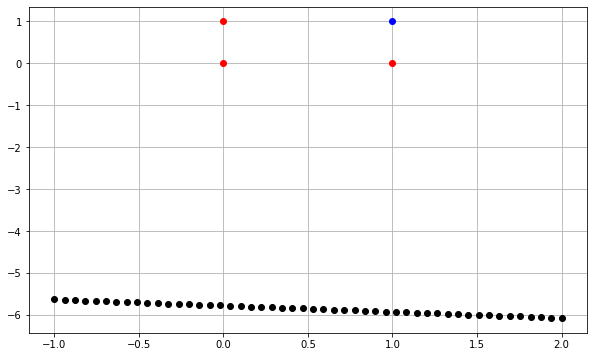

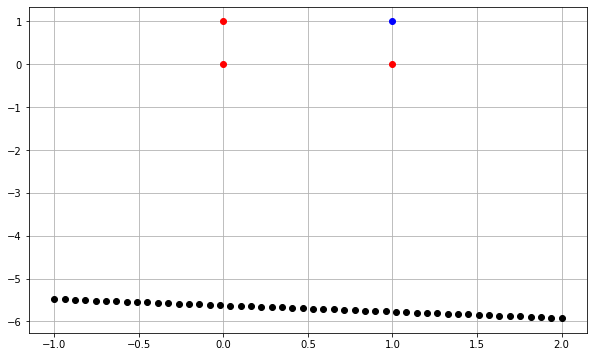

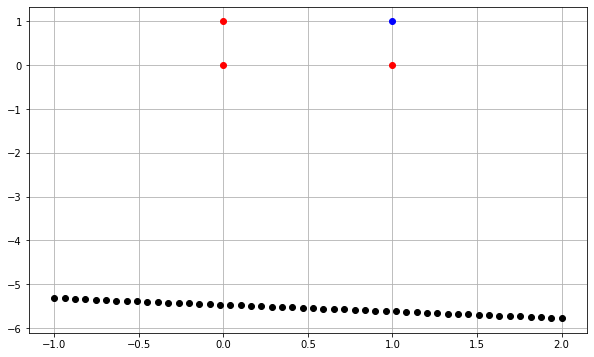

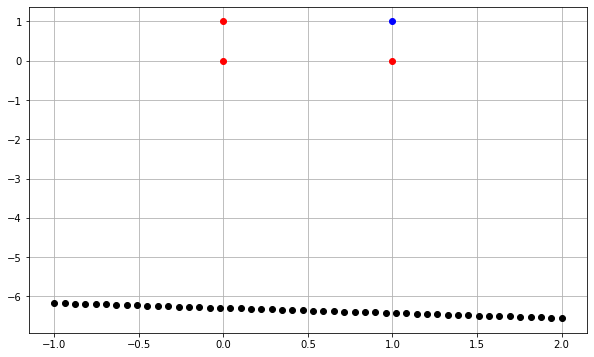

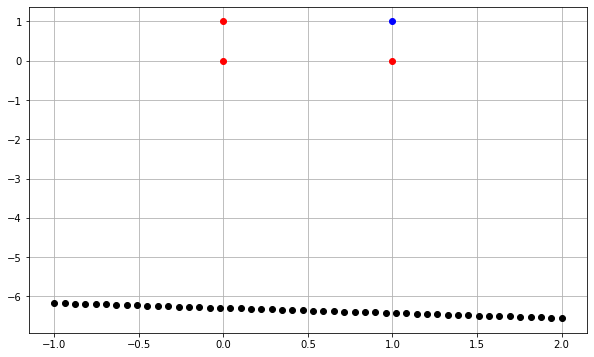

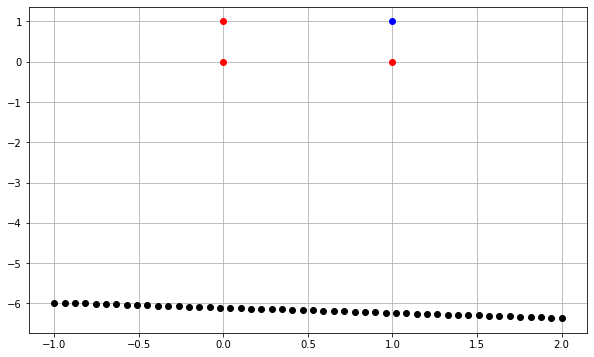

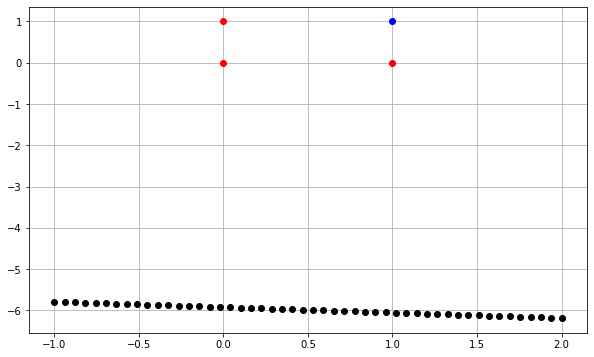

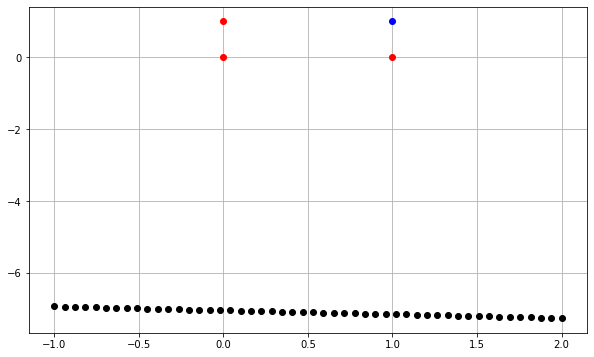

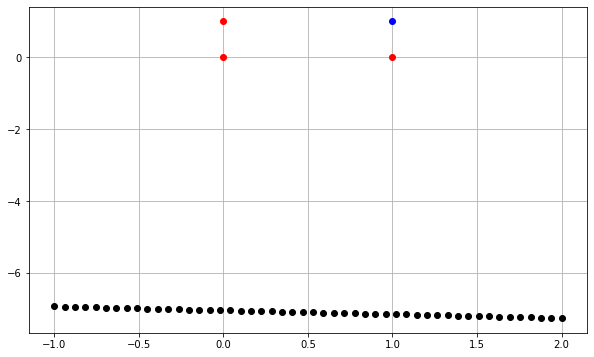

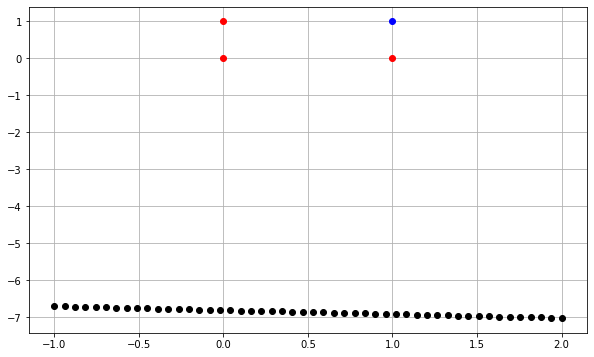

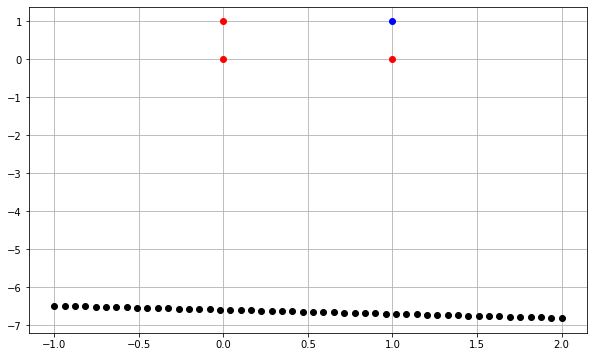

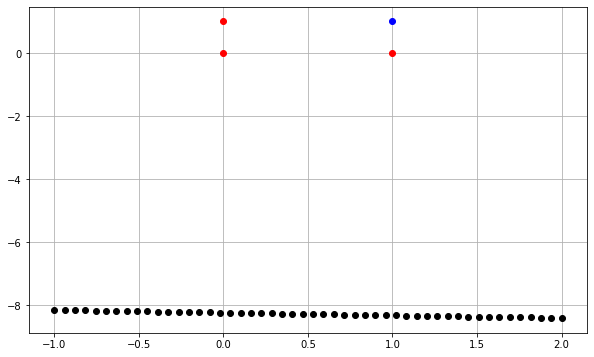

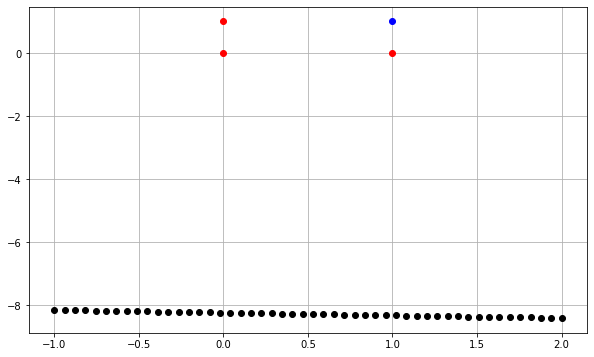

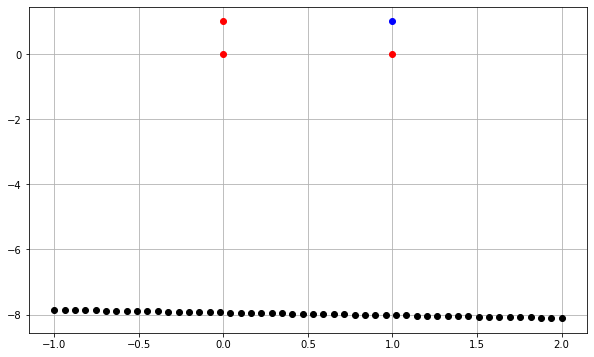

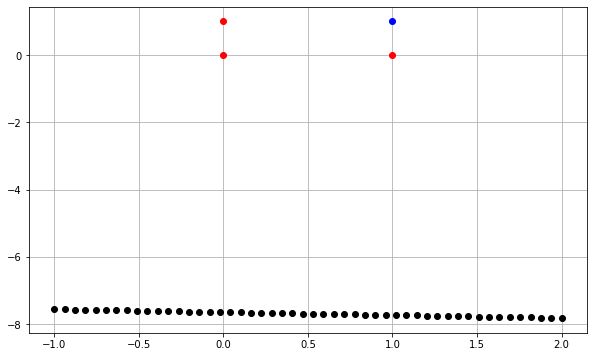

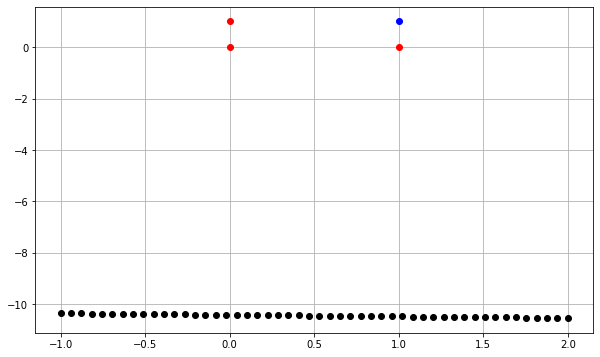

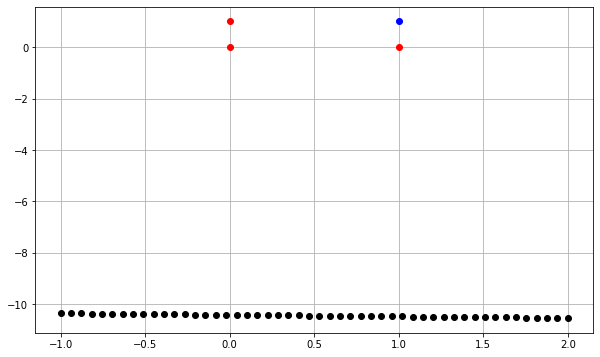

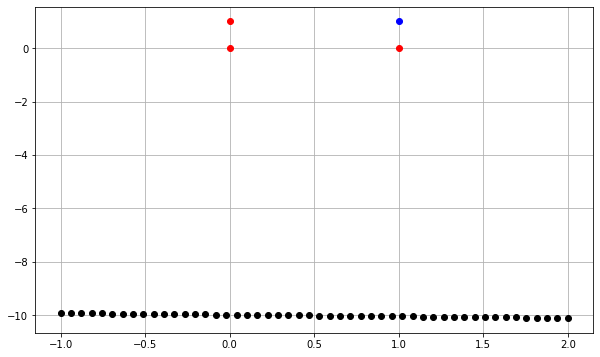

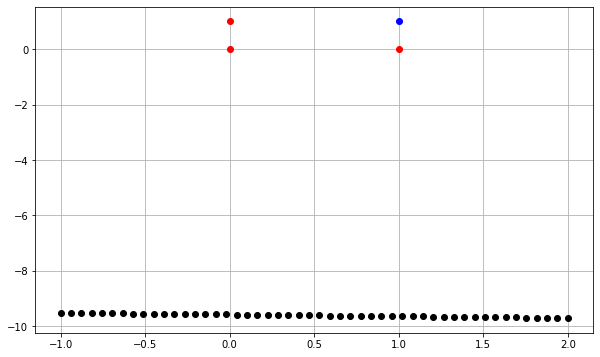

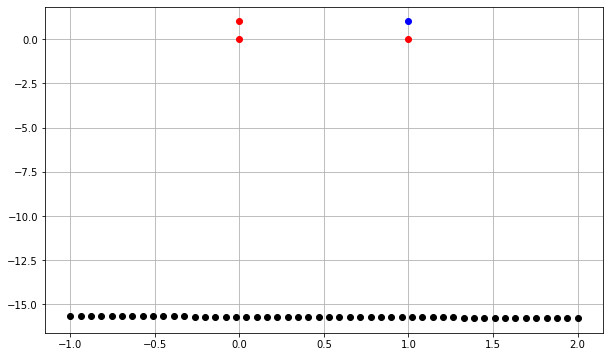

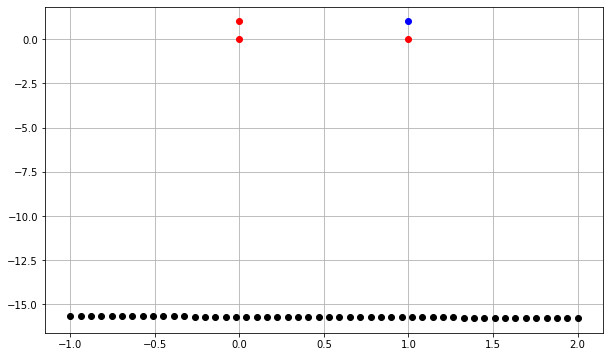

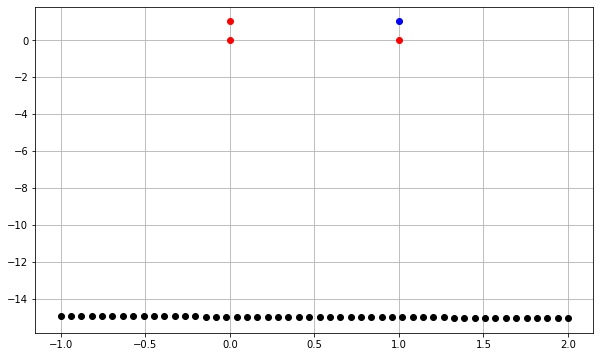

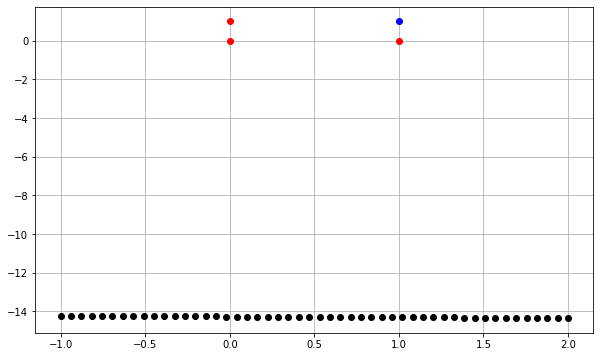

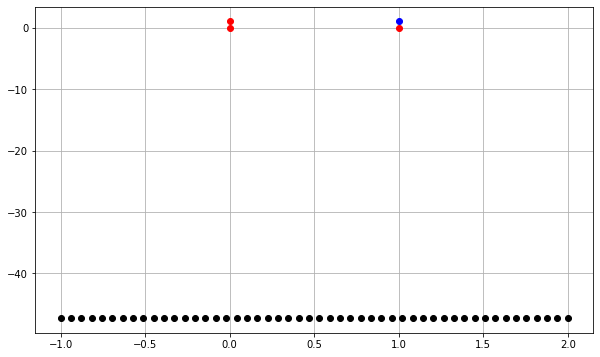

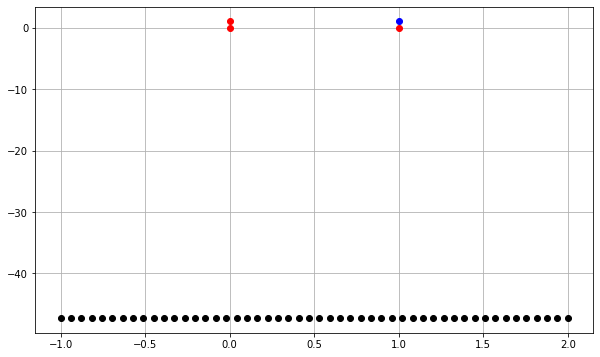

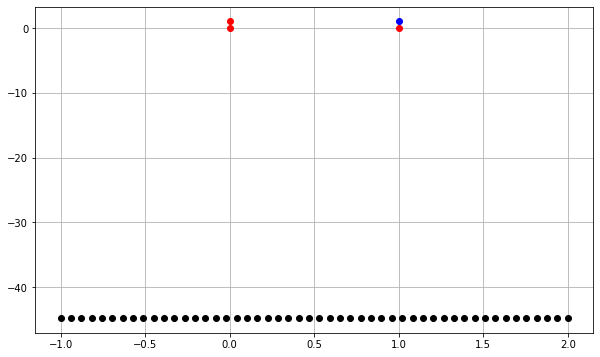

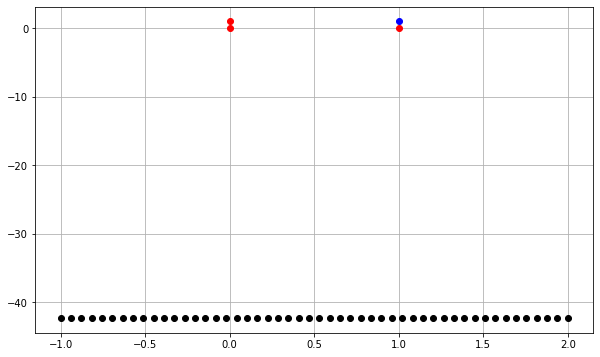

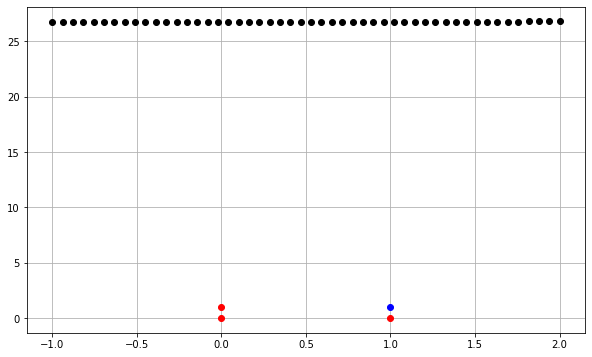

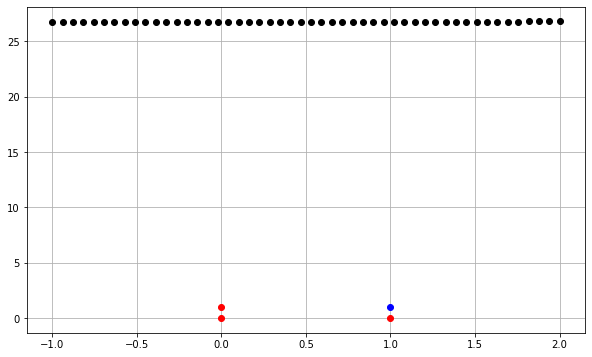

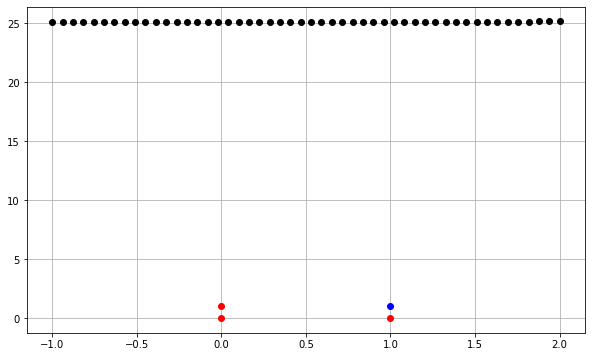

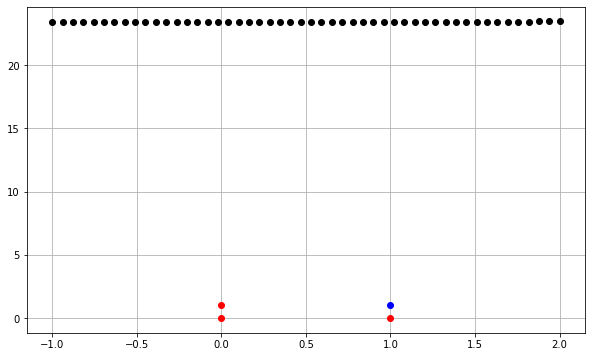

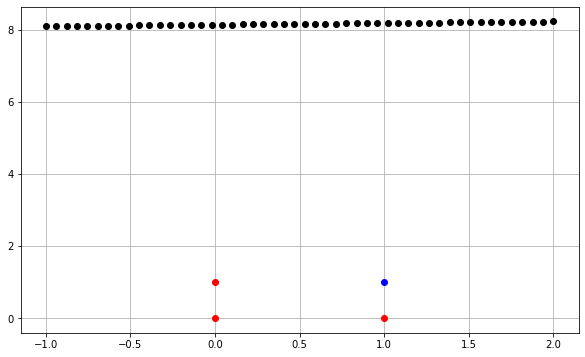

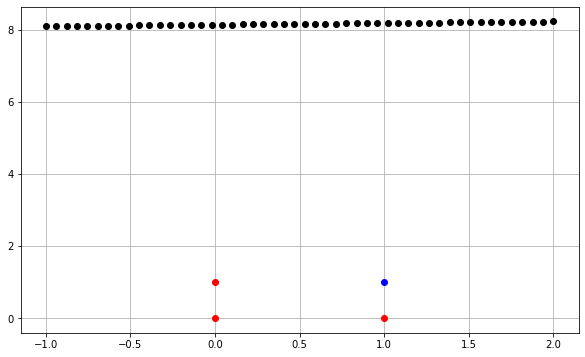

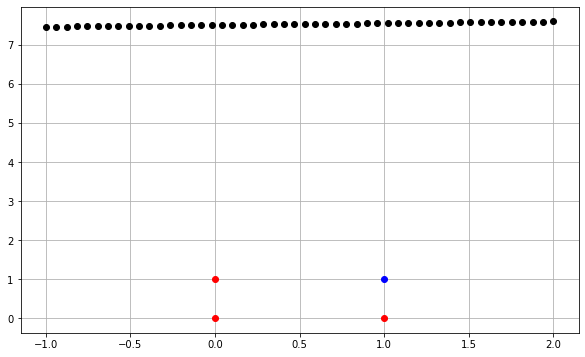

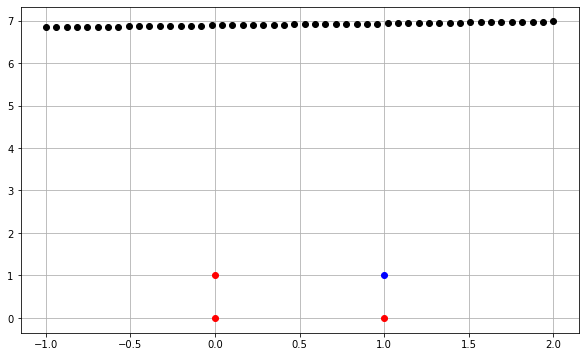

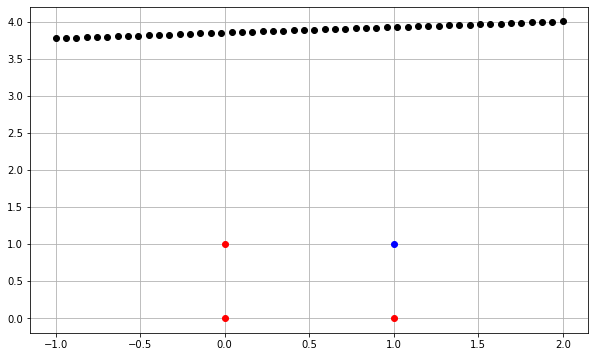

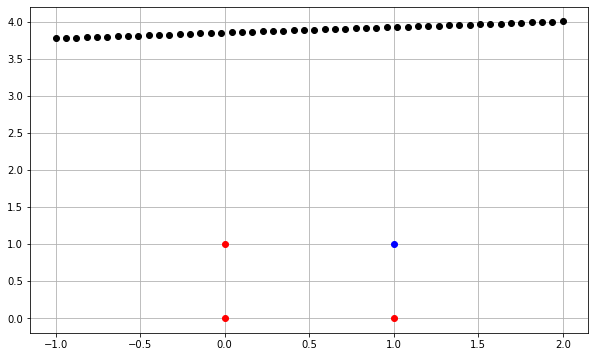

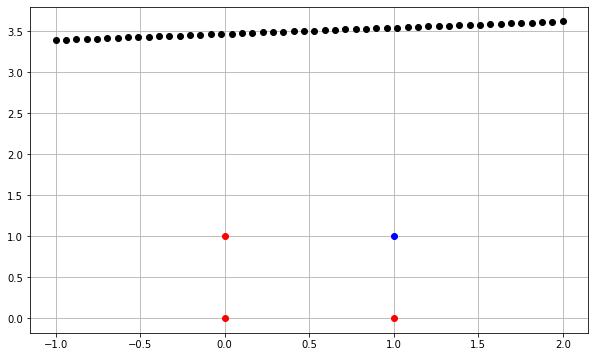

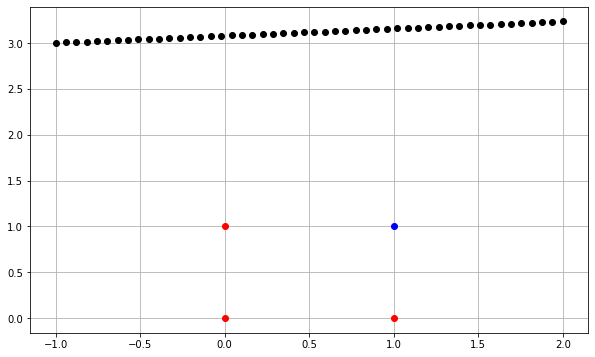

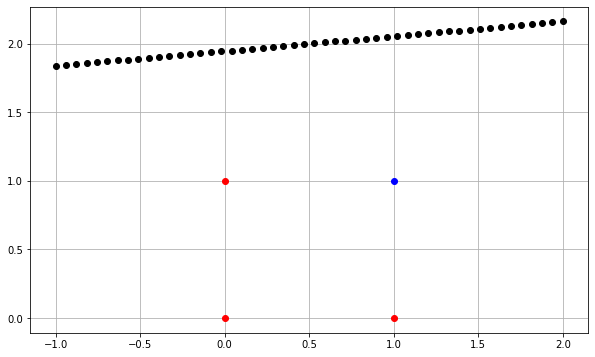

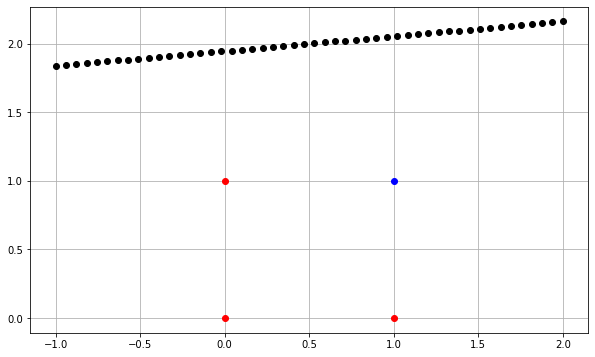

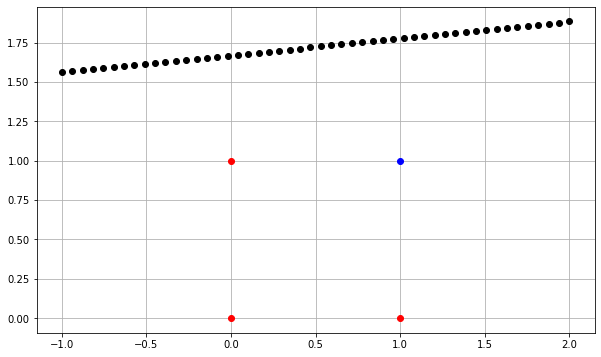

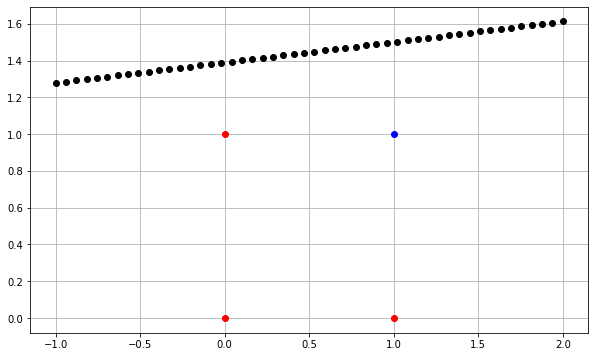

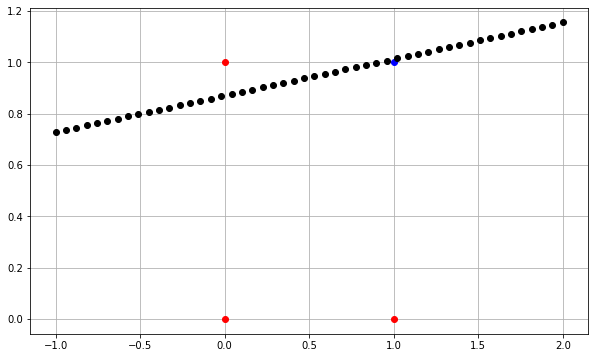

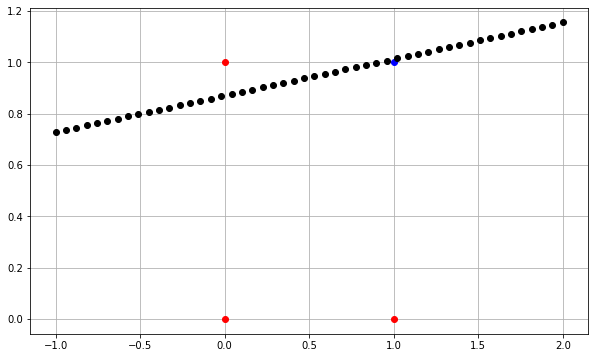

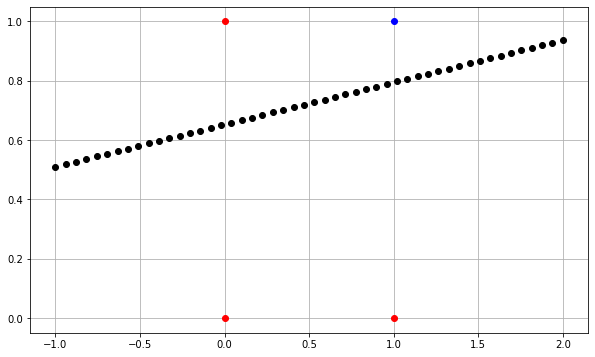

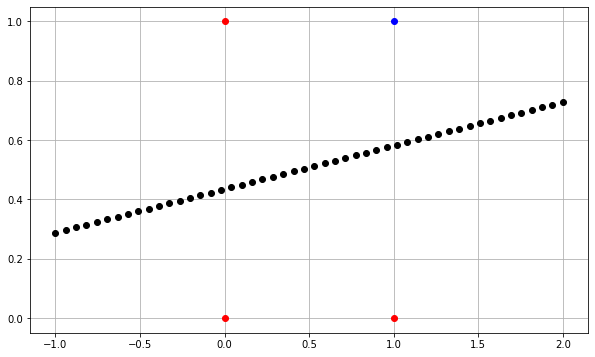

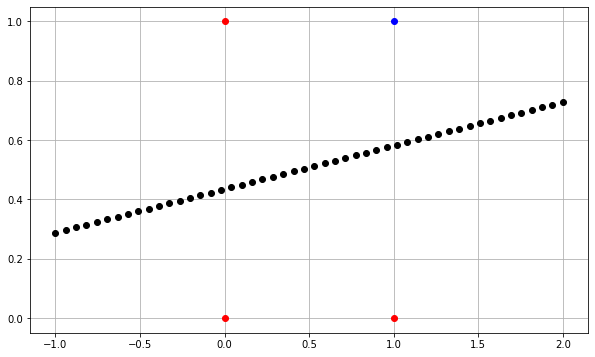

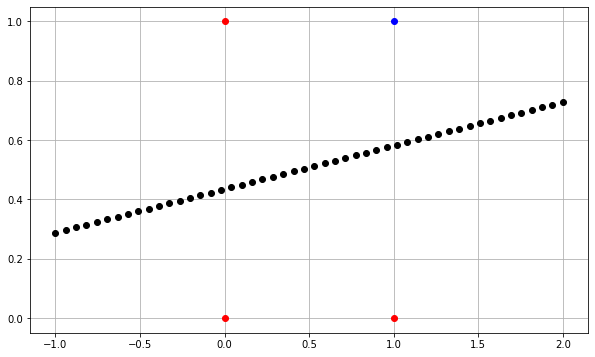

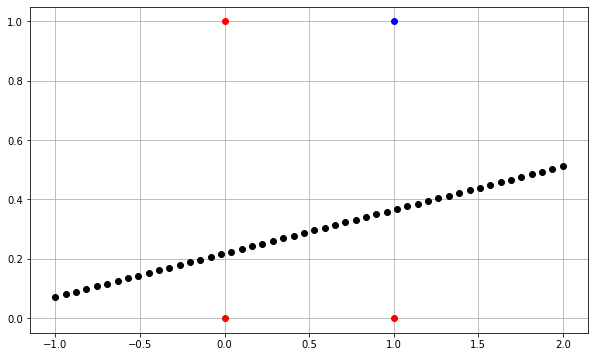

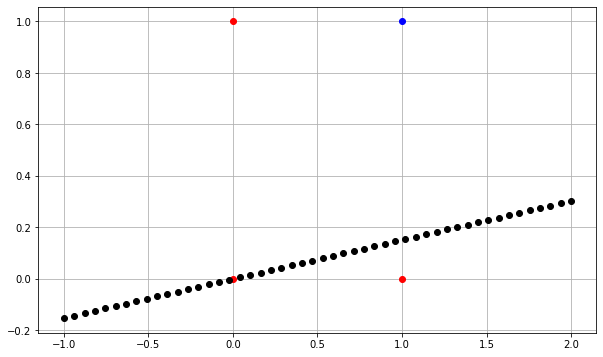

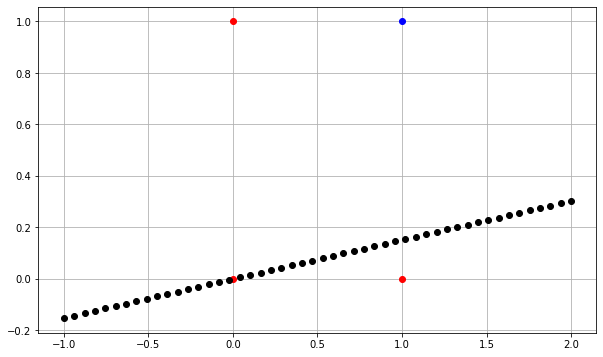

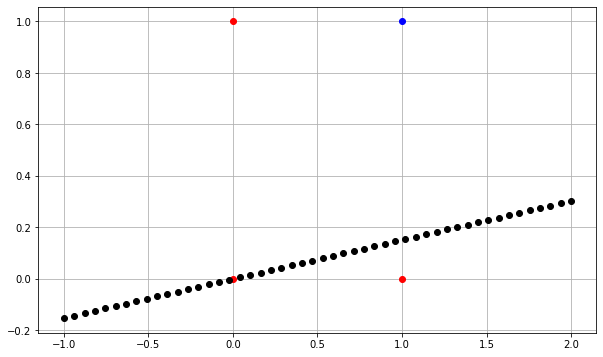

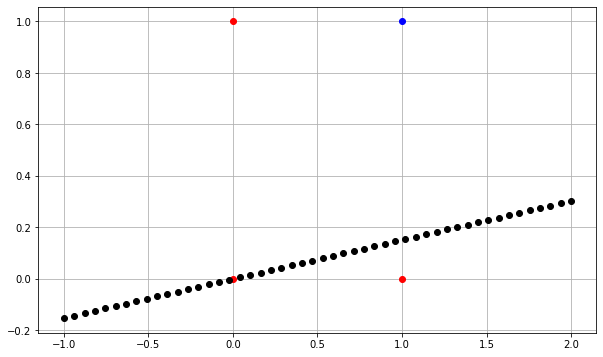

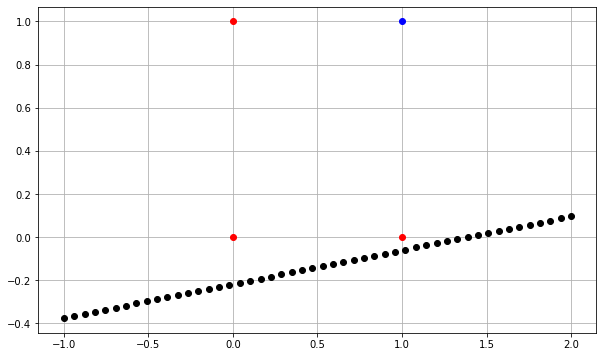

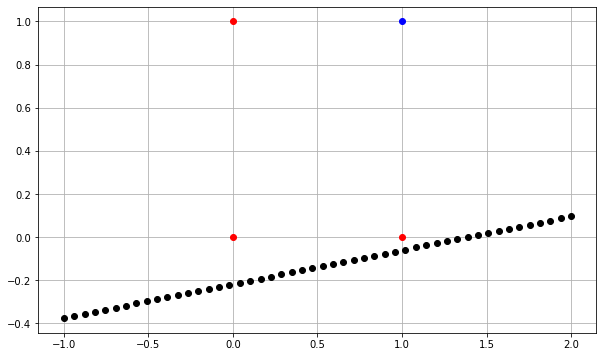

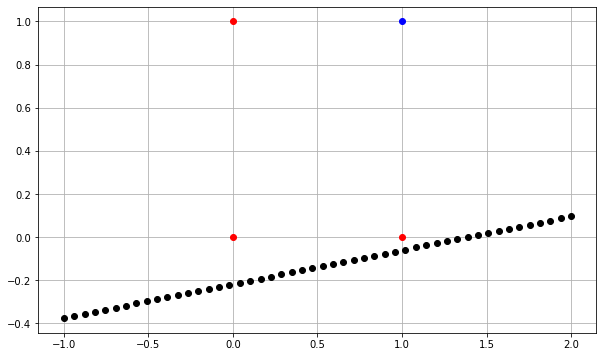

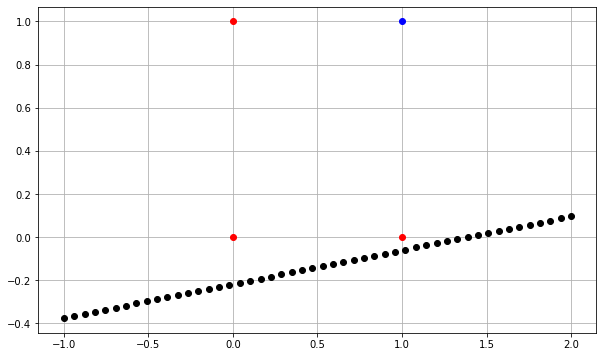

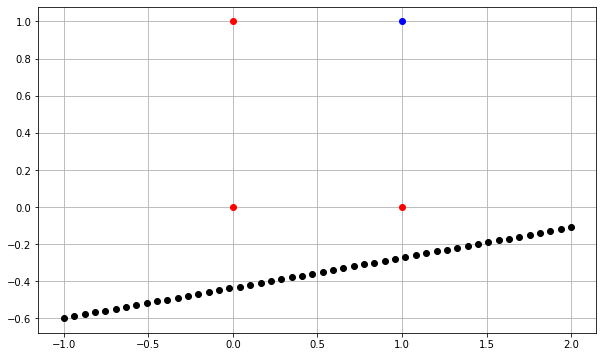

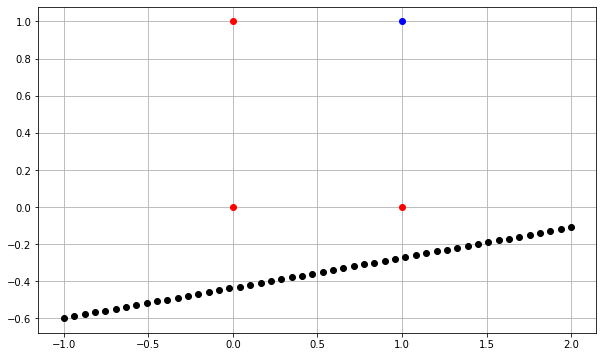

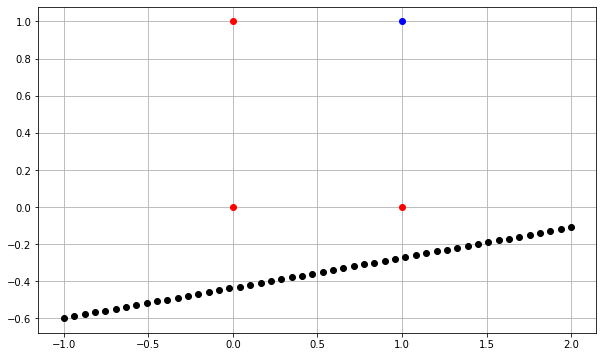

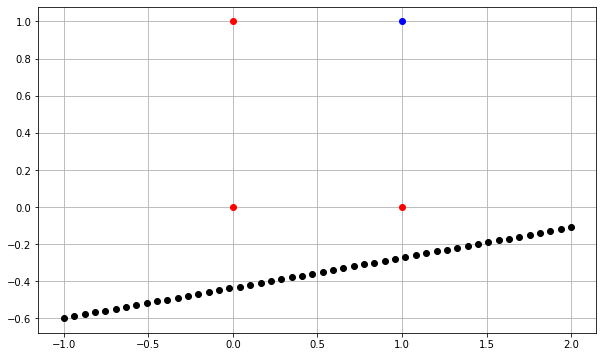

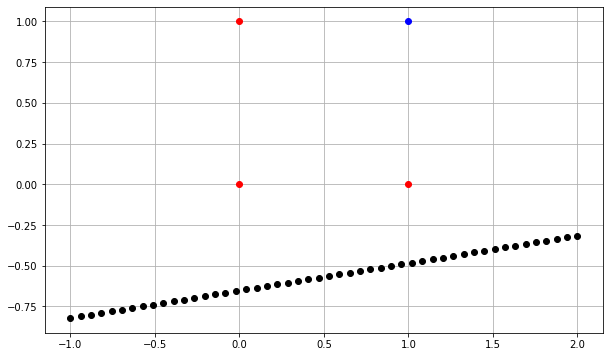

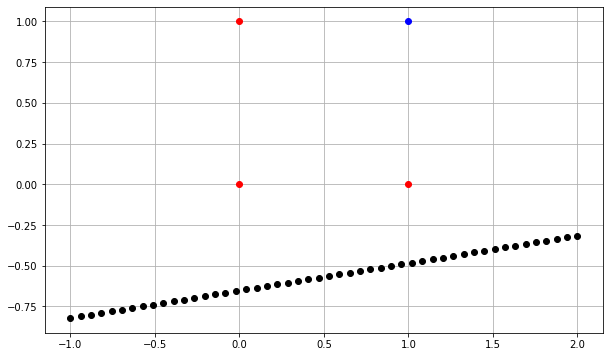

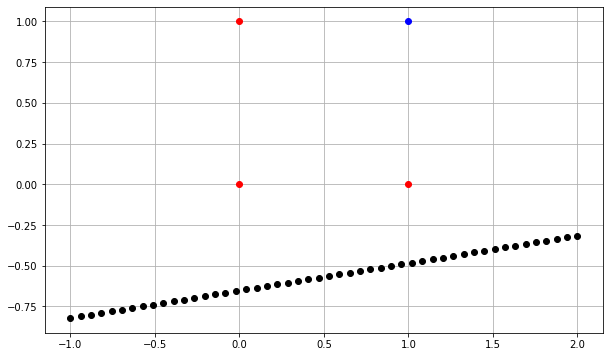

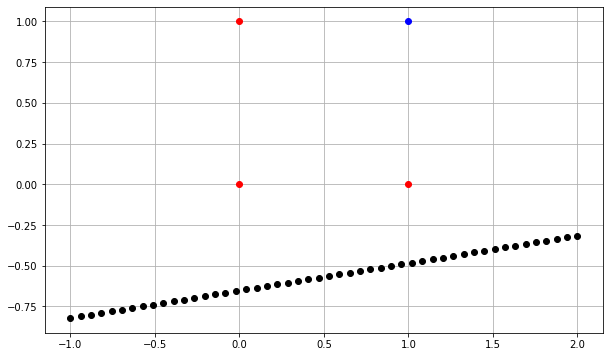

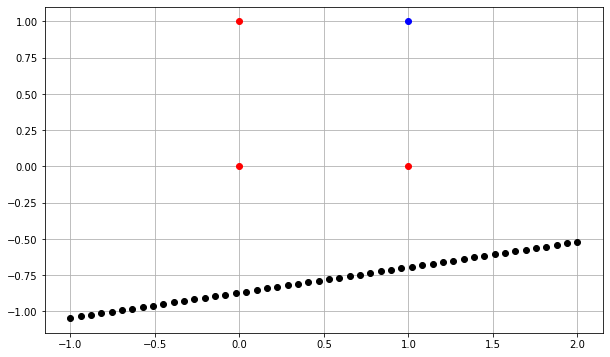

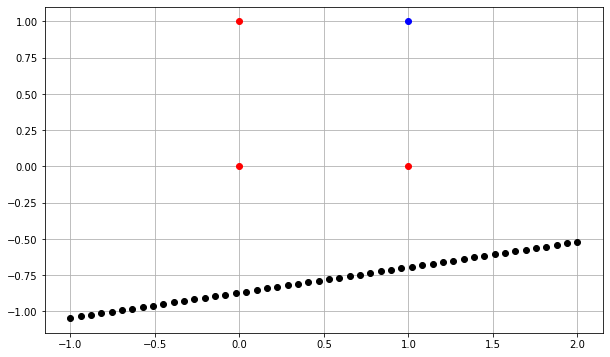

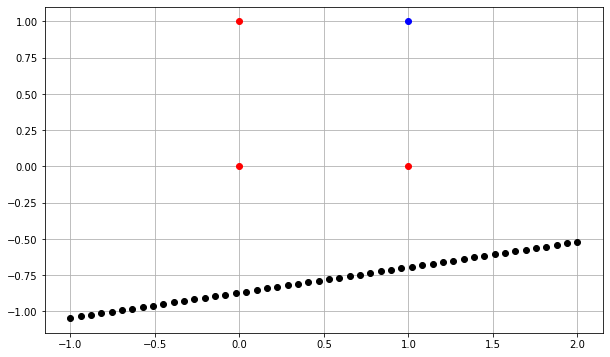

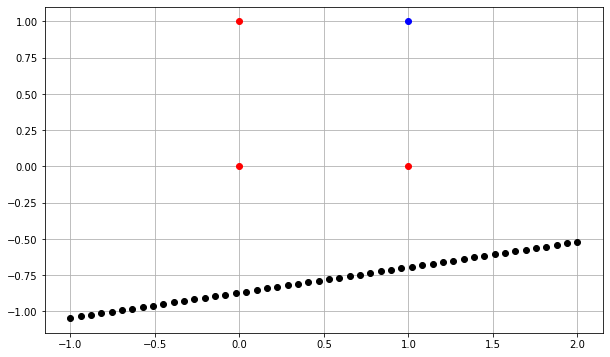

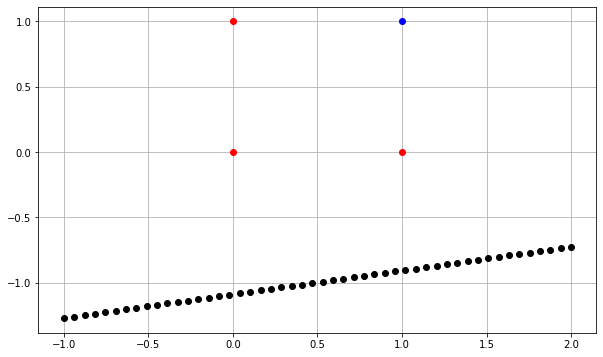

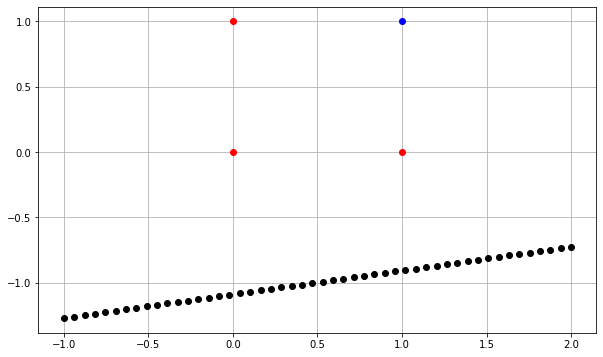

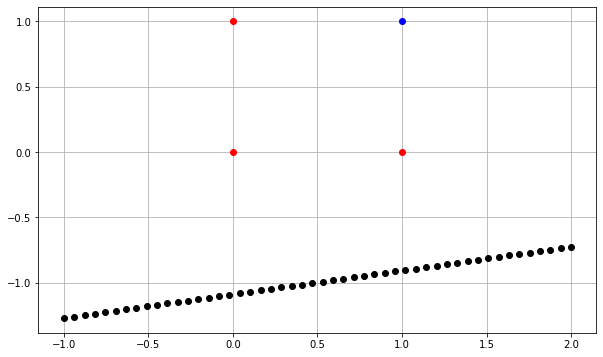

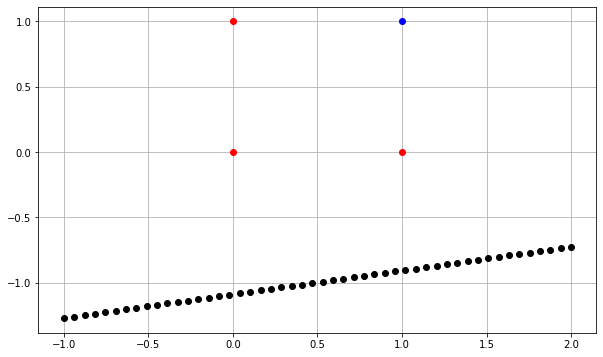

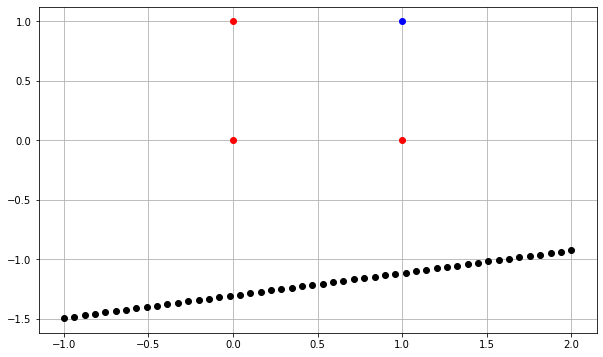

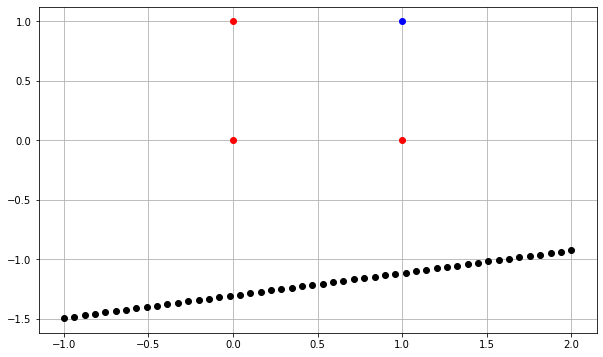

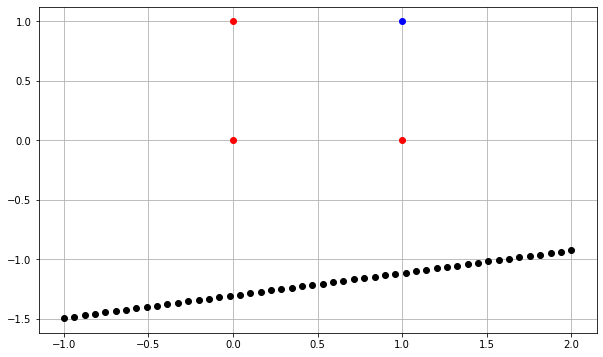

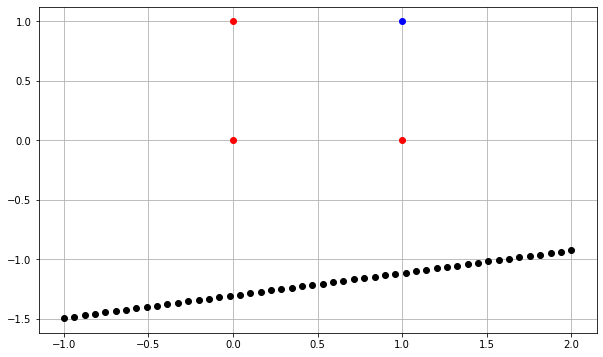

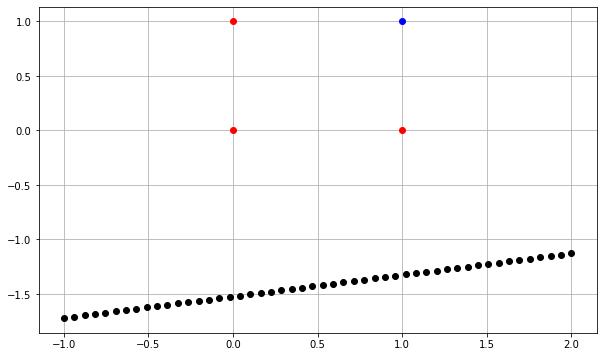

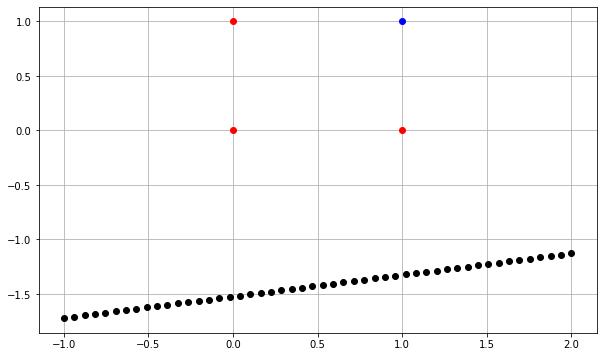

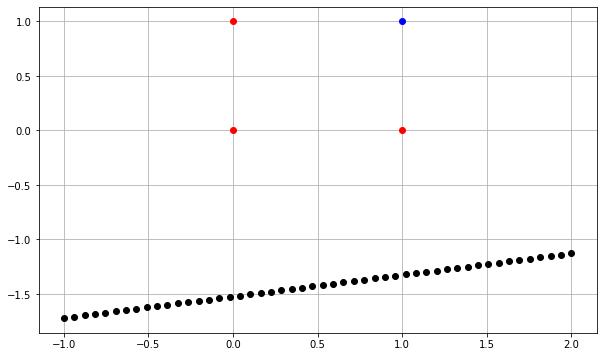

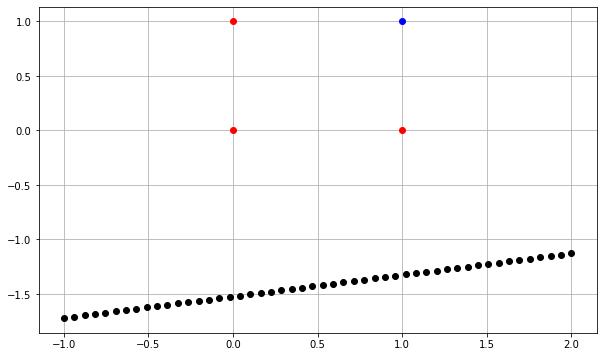

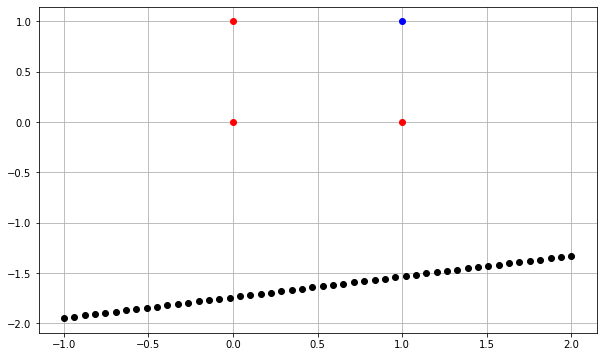

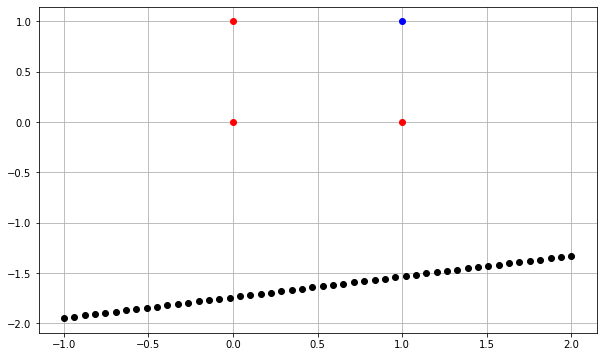

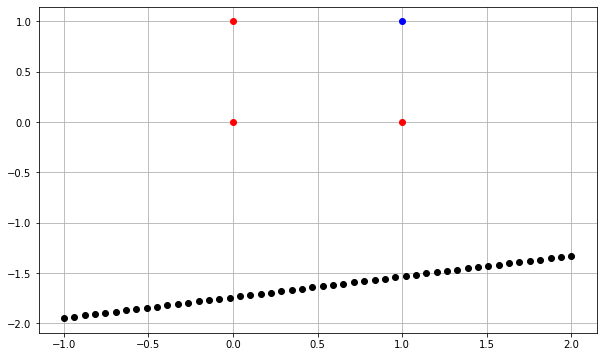

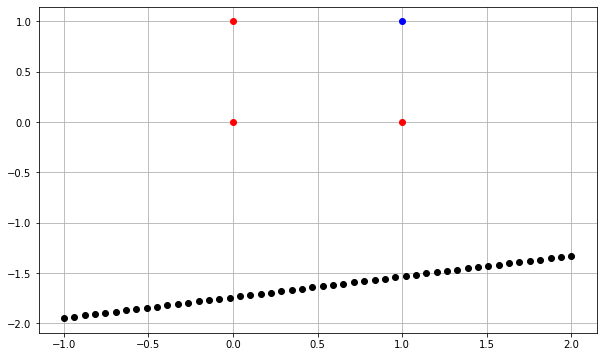

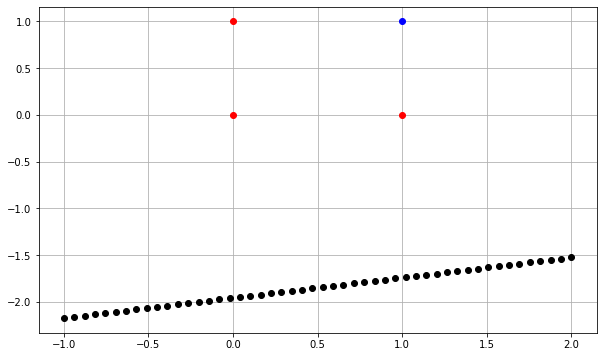

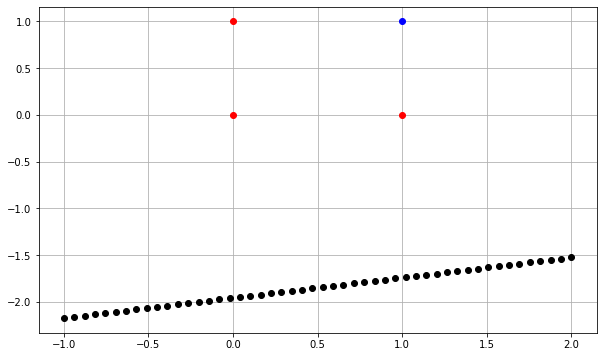

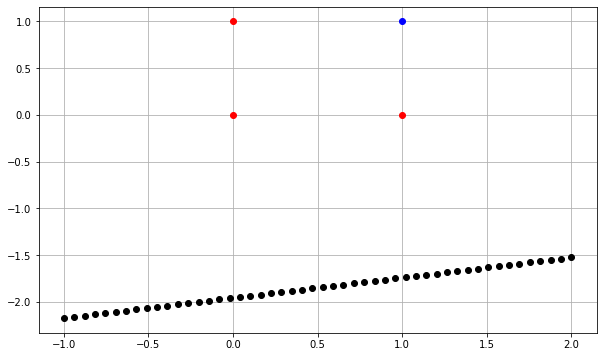

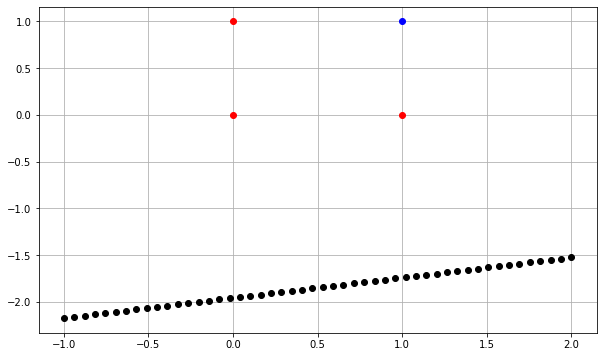

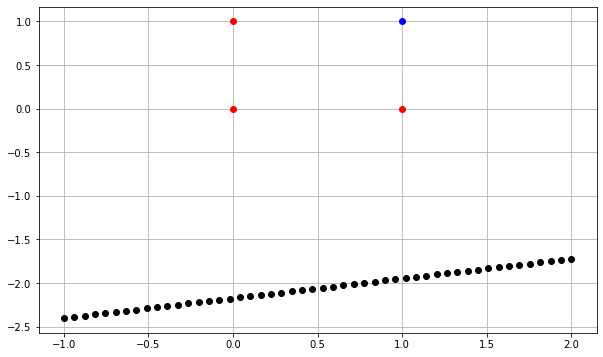

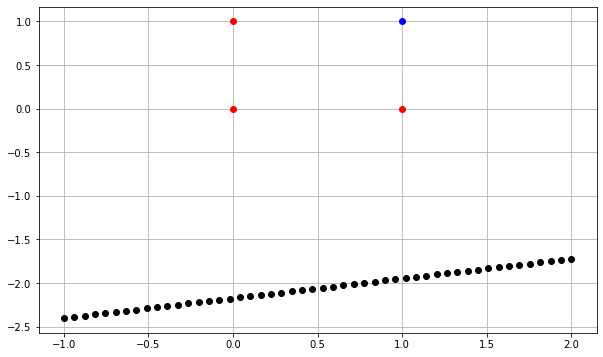

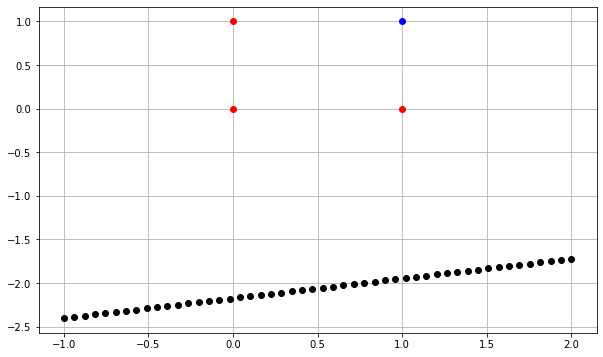

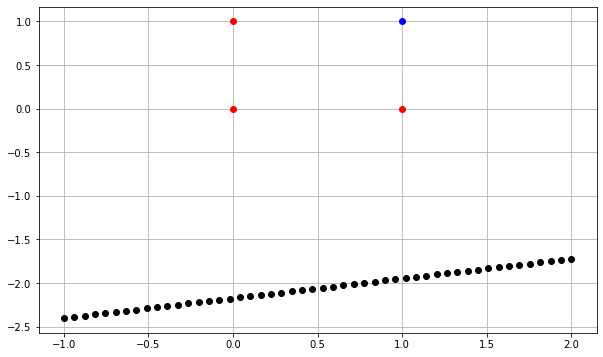

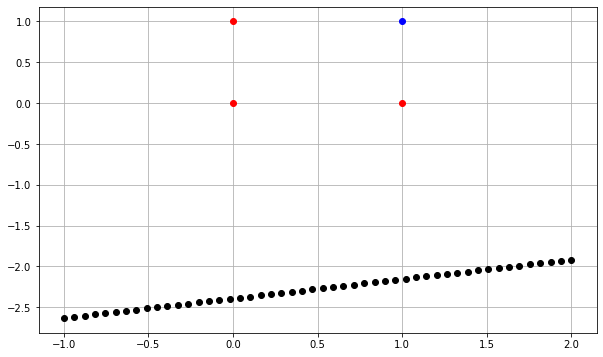

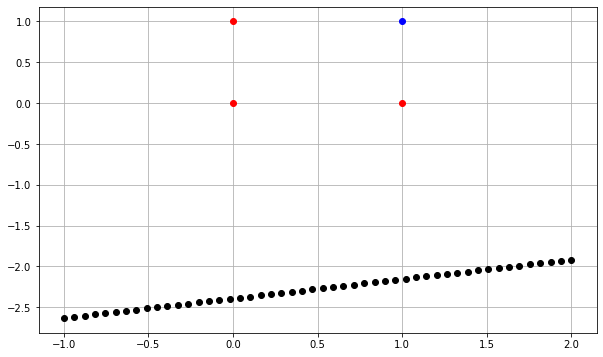

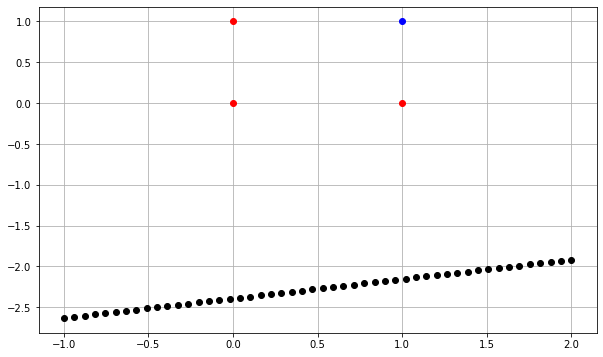

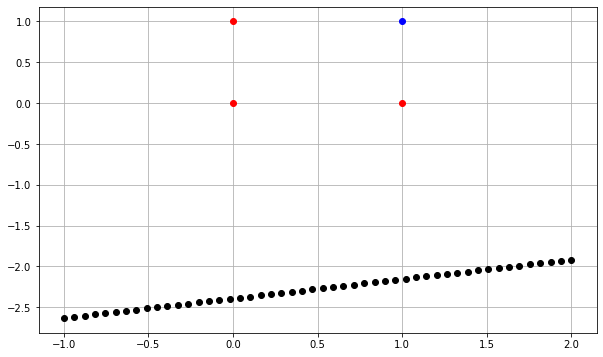

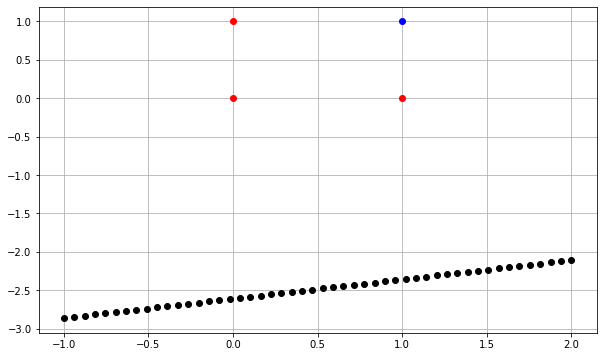

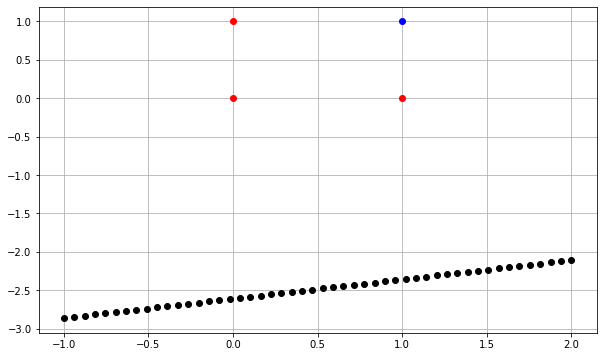

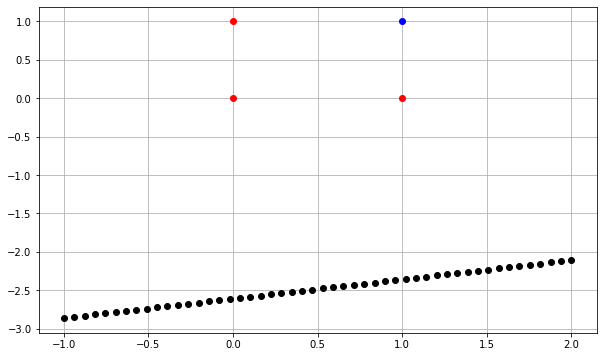

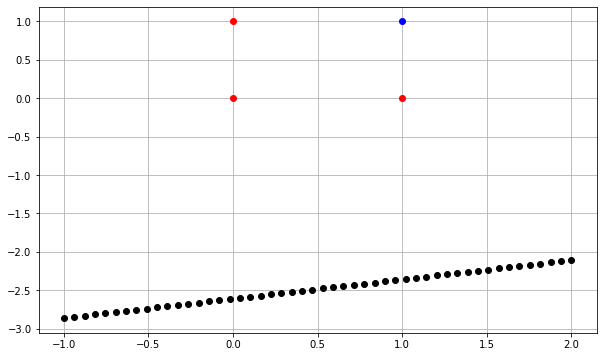

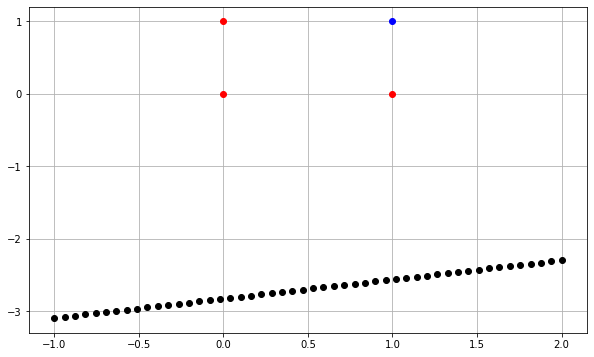

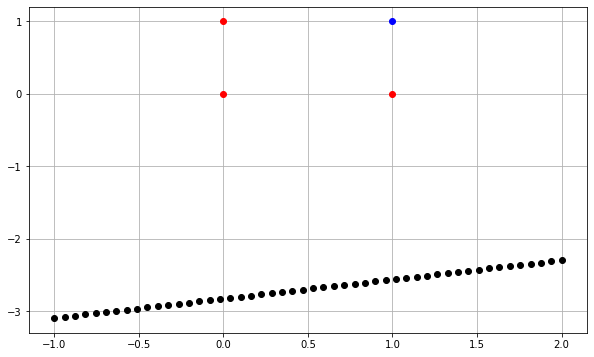

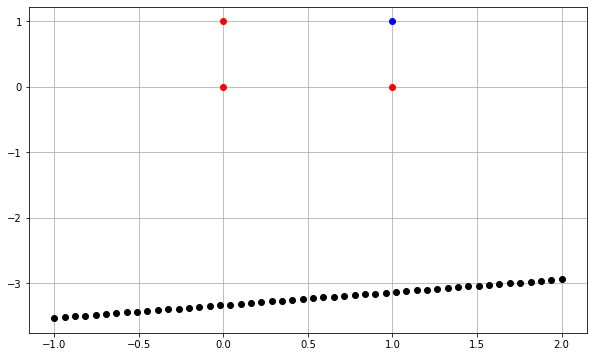

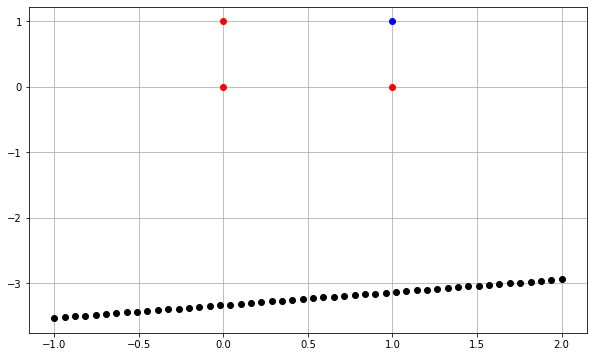

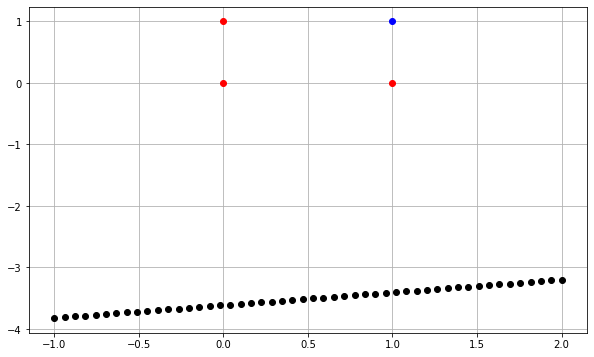

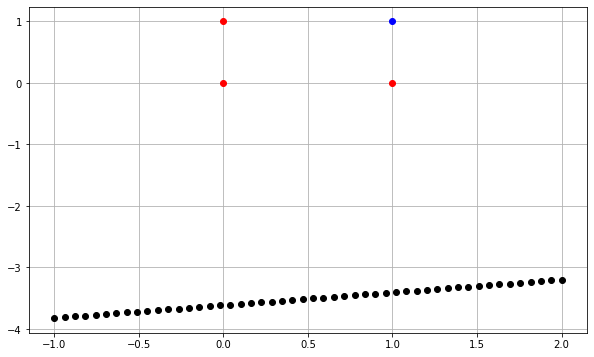

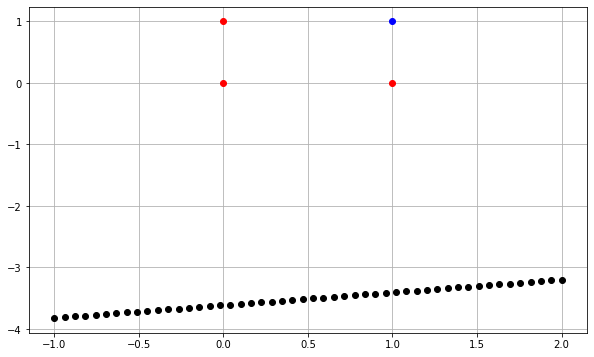

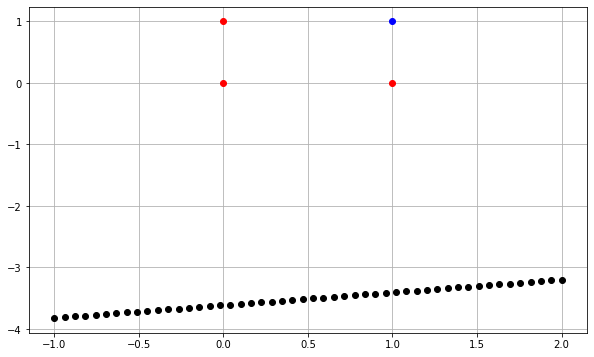

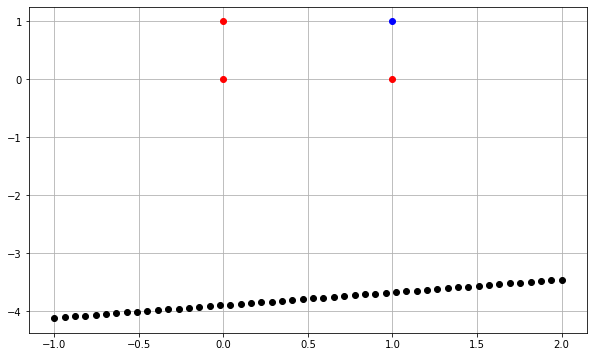

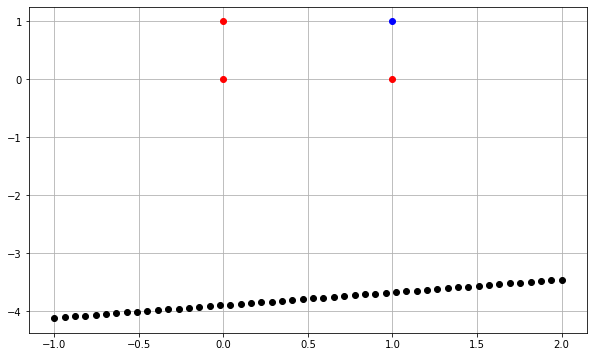

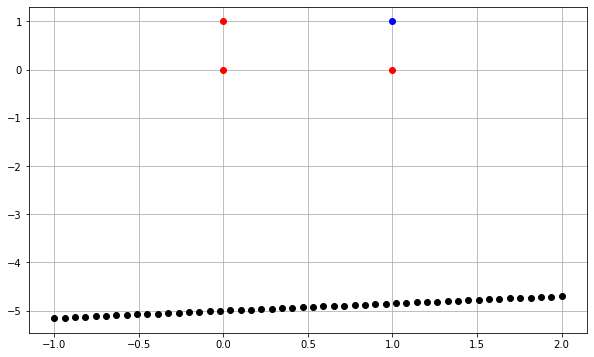

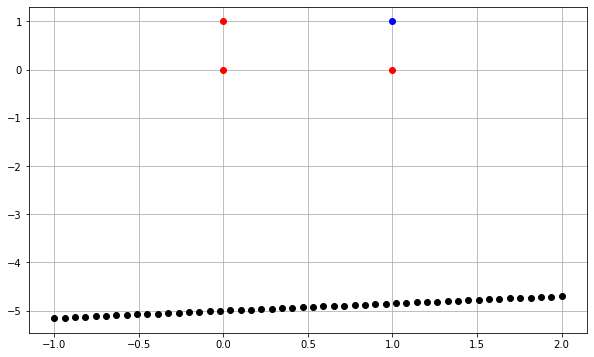

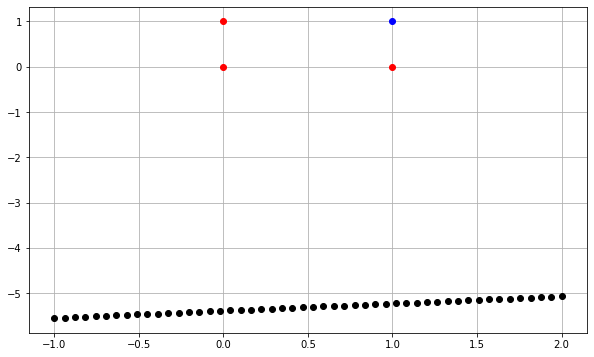

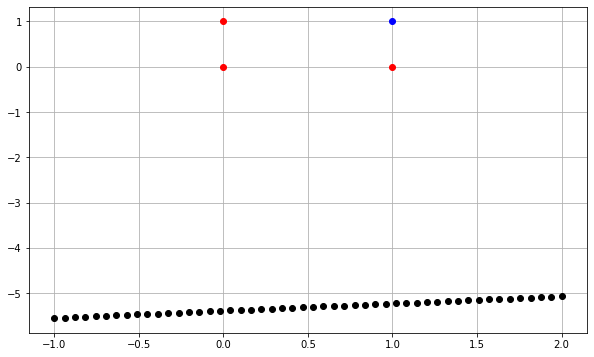

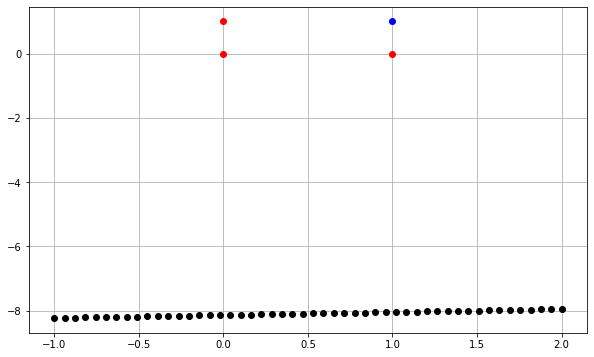

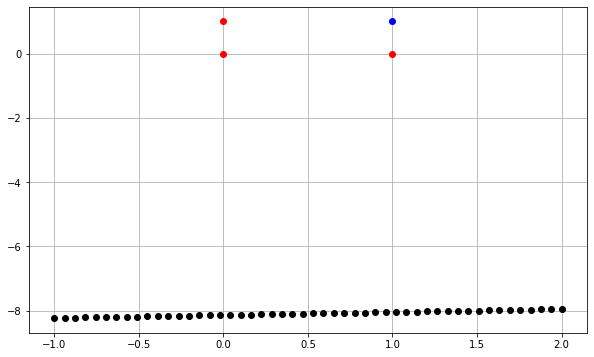

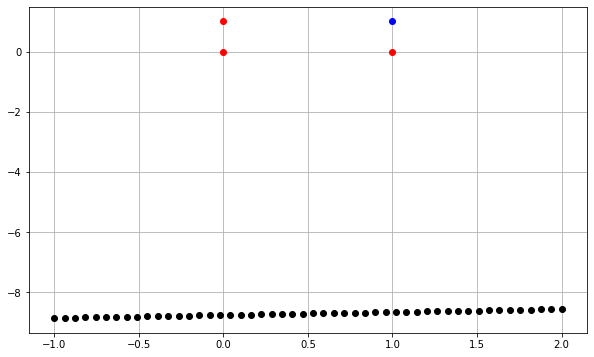

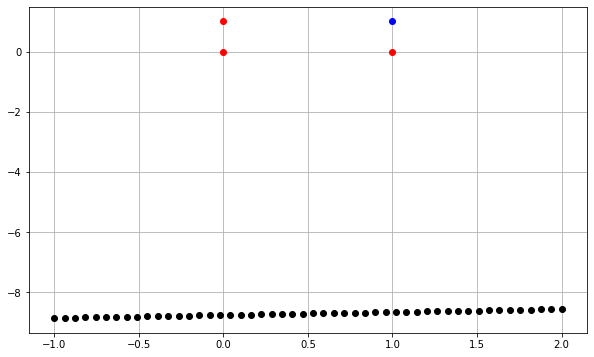

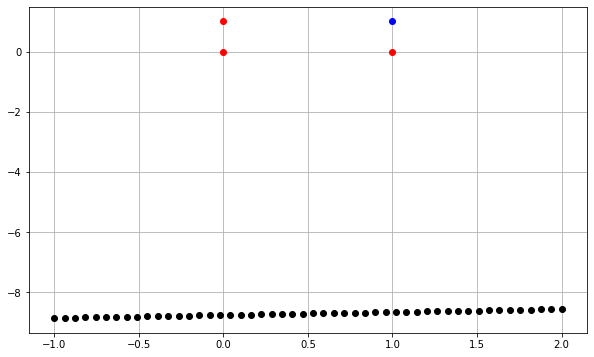

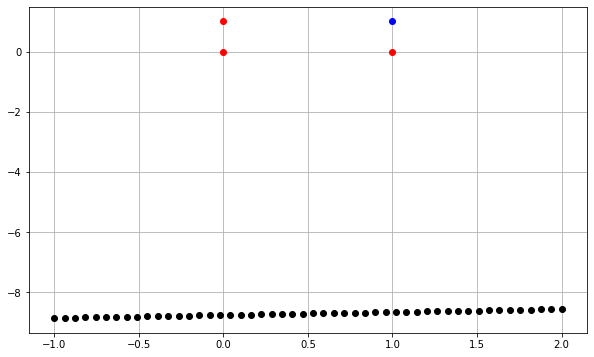

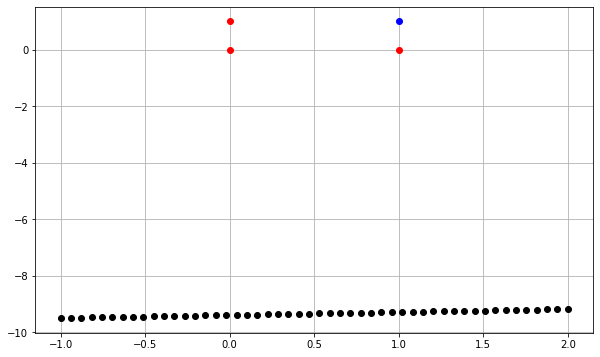

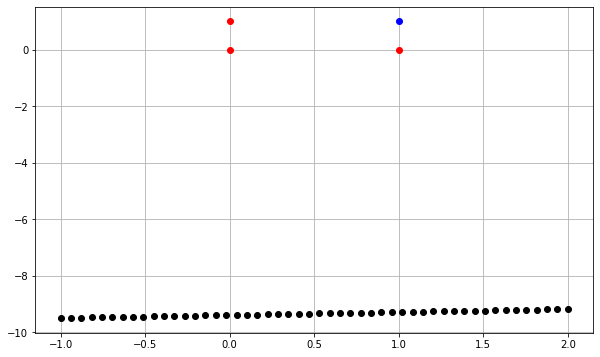

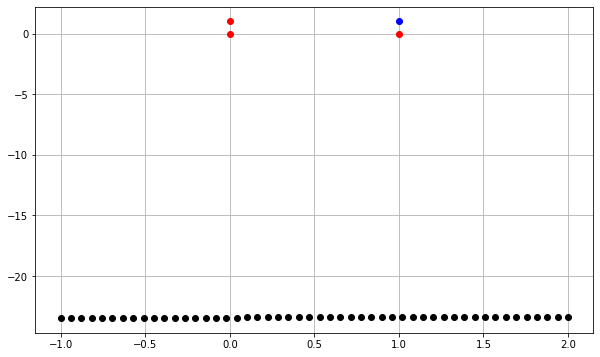

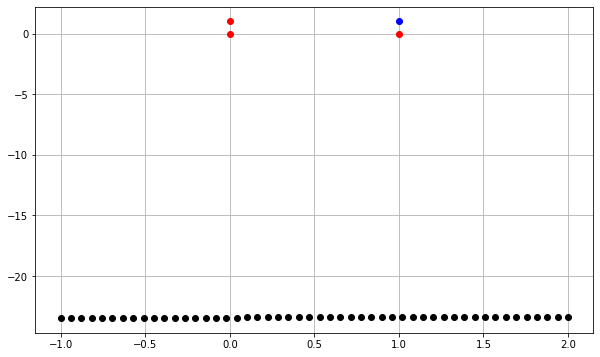

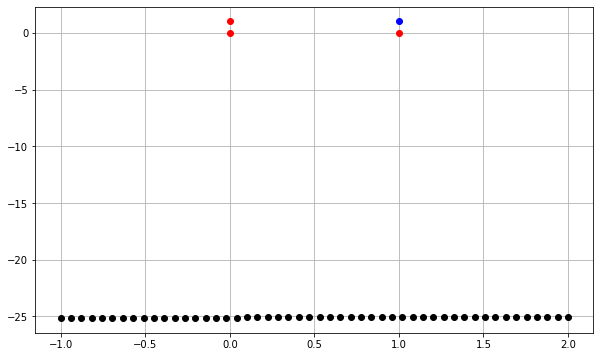

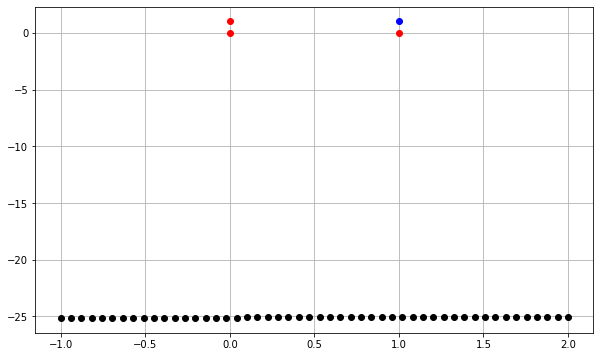

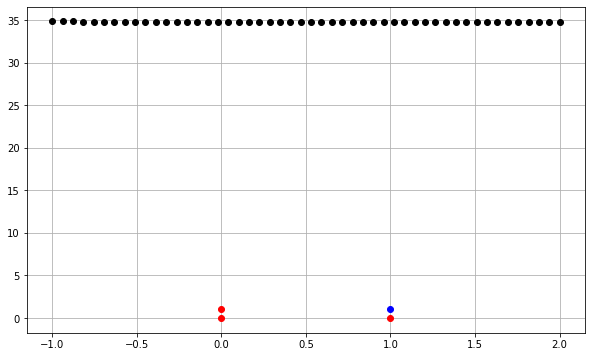

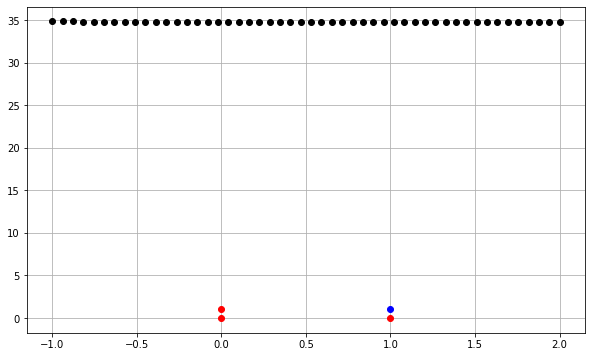

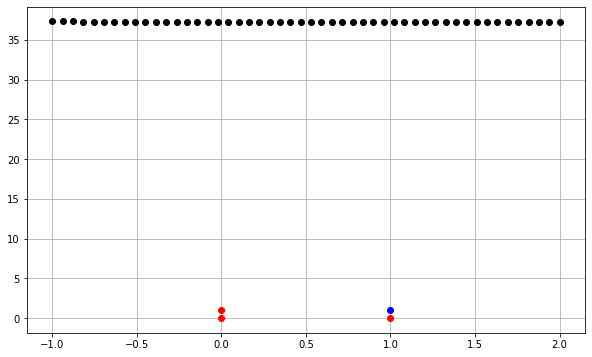

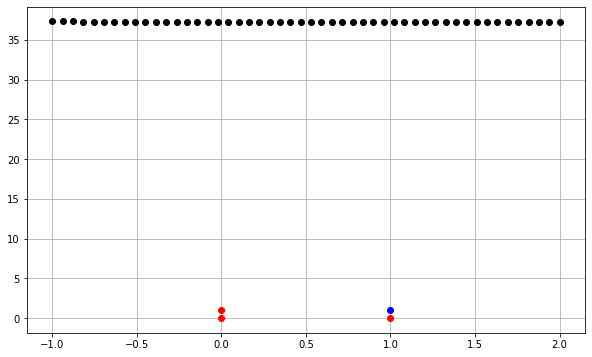

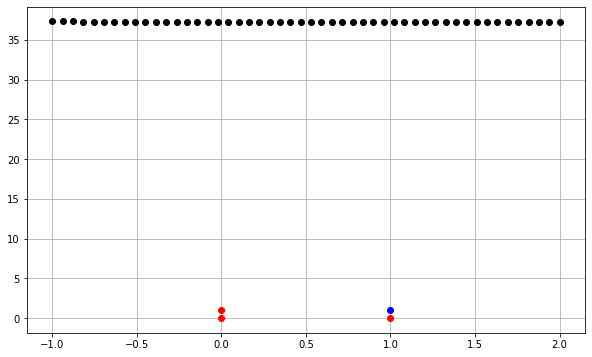

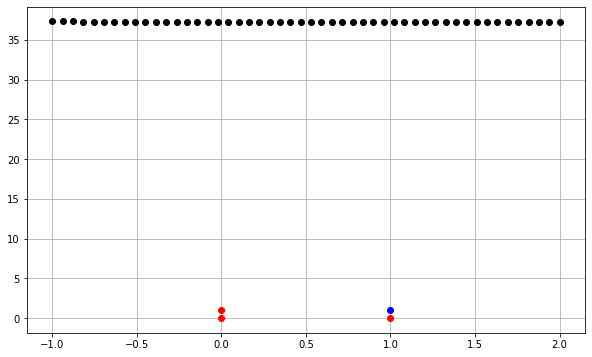

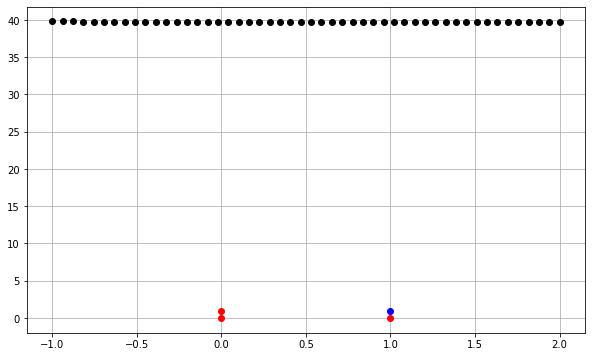

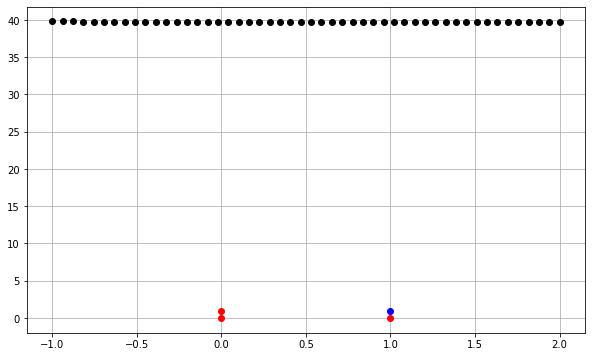

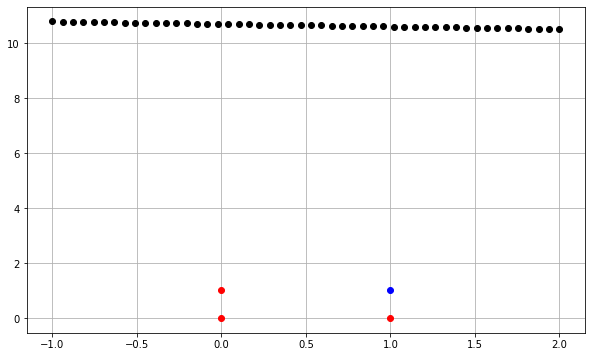

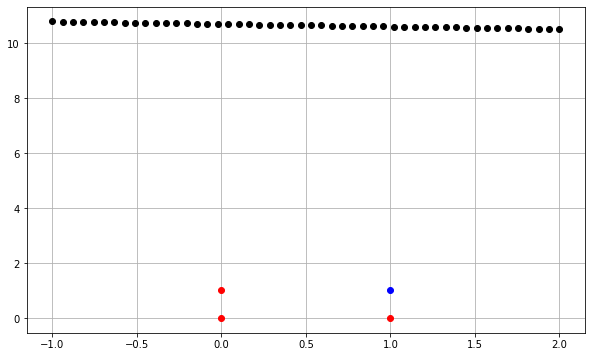

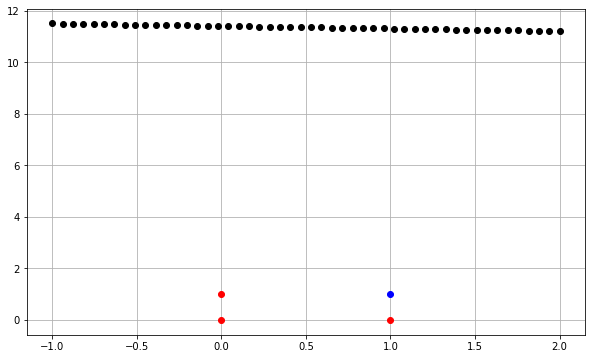

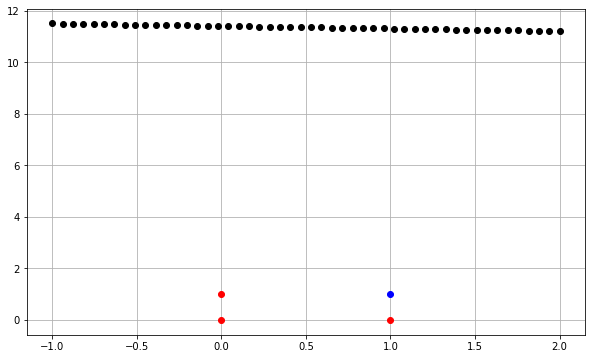

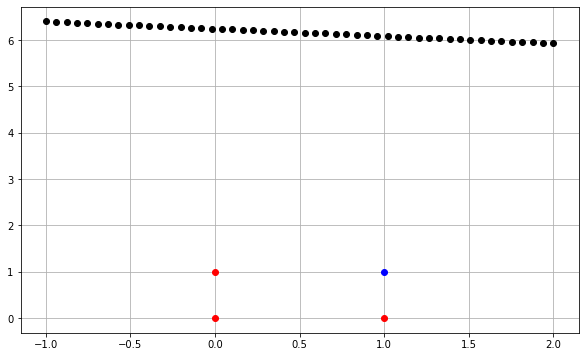

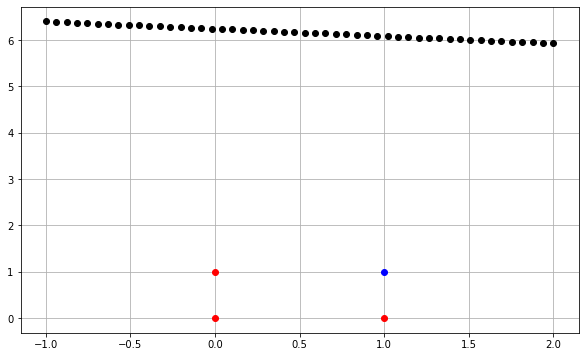

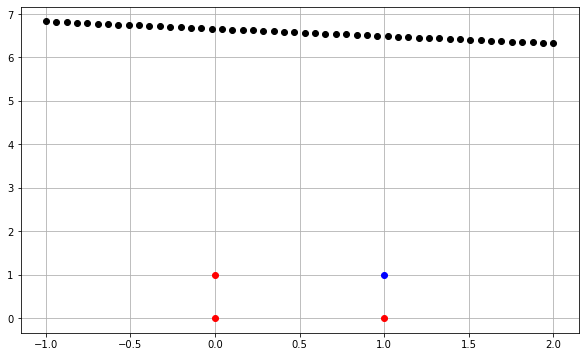

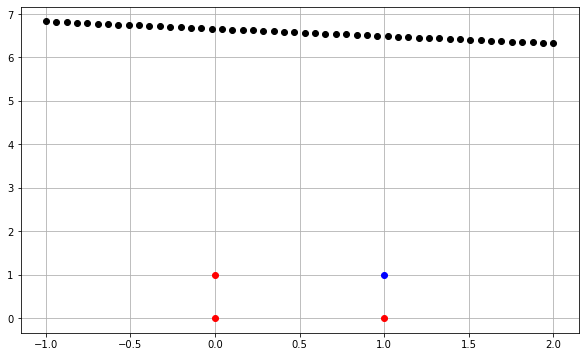

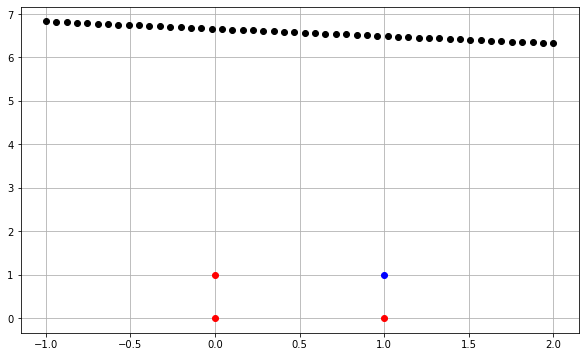

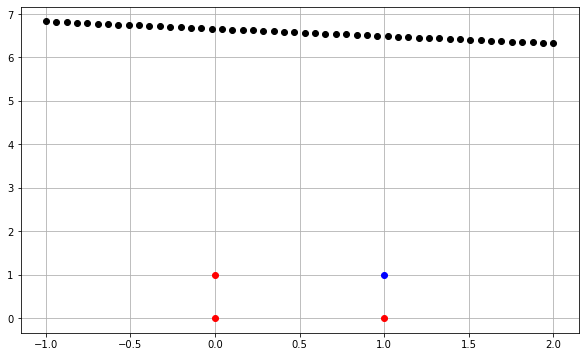

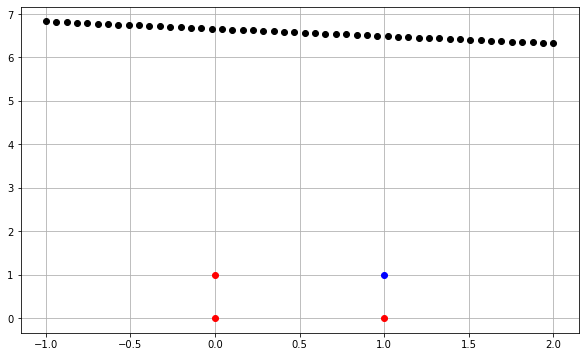

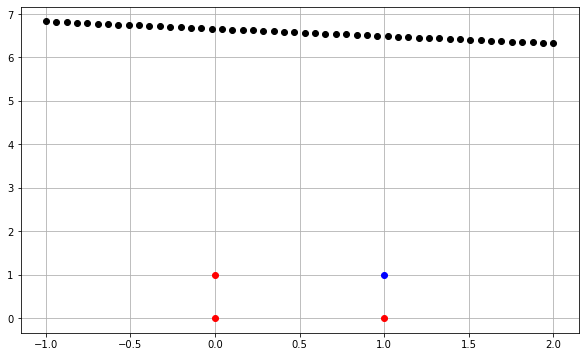

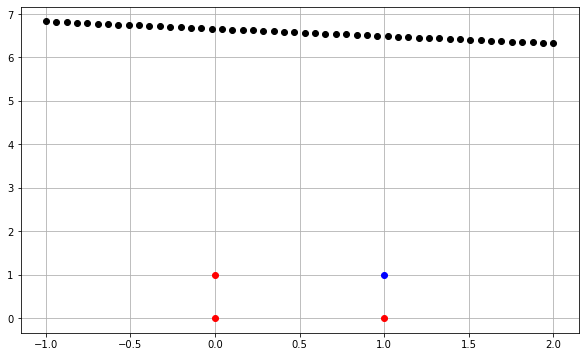

In [12]:
perp = Perceptron(X, Y)
perp.train()

Slope:  -0.16808500894809597 Y-Intercept:  6.6602955329899265


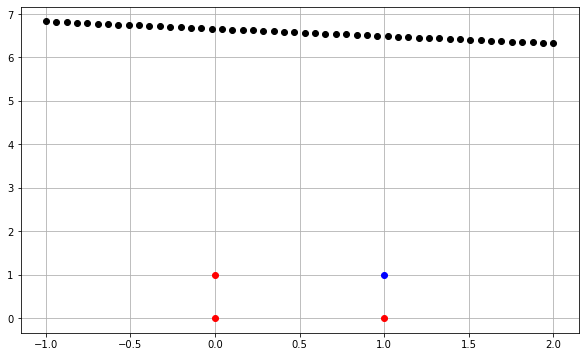

In [13]:
perp.plot_data()

Text(0, 0.5, 'cost')

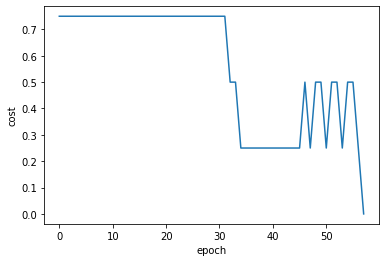

In [14]:
# Visualize Model progress
plt.plot(perp.cost_list)
plt.xlabel('epoch')
plt.ylabel('cost')

In [15]:
# Inital Weights
w = np.random.uniform(0,1,2)
w

array([0.06099269, 0.73992862])

In [16]:
# Initialize Bias
b = np.random.uniform(0,1,1)
b

array([0.35639784])

In [17]:
def calcWeight(x, w, y, b):
    """
    Computes Perceptron node net weight and returns
    """
    net_sum = x.dot(w) + b
    error = y - net_sum
    return error

In [18]:
for i, x_i in enumerate(X):
    print("Input {0}".format(i+1), calcWeight(np.array(x_i), w.T, Y[i], b))

Input 1 [-0.35639784]
Input 2 [-1.09632646]
Input 3 [-0.41739054]
Input 4 [-0.15731916]


In [19]:
np.array(X[0]).dot(w)

0.0

In [20]:
np.array(X[0])

array([0, 0])

In [21]:
type(np.array(Y)[0])

numpy.int32

In [22]:
import numpy as np

# Perceptron function
def perceptron(x, y, z, eta, t):
    '''
    Input Parameters:
        x: data set of input features
        y: actual outputs
        z: activation function threshold
        eta: learning rate
        t: number of iterations
    '''
    
    # initializing the weights
    w = np.zeros(len(x[0]))      
    n = 0                        
    
    # initializing additional parameters to compute sum-of-squared errors
    yhat_vec = np.ones(len(y))     # vector for predictions
    errors = np.ones(len(y))       # vector for errors (actual - predictions)
    J = []                         # vector for the SSE cost function
    
    while n < t:
        for i in range(len(x)):
            # dot product
            f = np.dot(x[i], w)
            # activation function
            if f >= z:                               
                yhat = 1.                               
            else:                                   
                yhat = 0.
            yhat_vec[i] = yhat

            # updating the weights
            for j in range(len(w)):             
                w[j] = w[j] + eta*(y[i]-yhat)*x[i][j]

        n += 1

        # computing the sum-of-squared errors
        for i in range(len(y)):     
            errors[i] = (y[i]-yhat_vec[i])**2
        J.append(0.5*np.sum(errors))
        
    return w, J

In [23]:
#     x0  x1  x2
x = [[1., 0., 0.],
     [1., 0., 1.],
     [1., 1., 0.],
     [1., 1., 1.]]

y =[1.,
    1.,
    1.,
    0.]

z = 0.0
eta = 0.1
t = 50

In [24]:
print ("The weights are:")
print (perceptron(x, y, z, eta, t)[0])

print ("The errors are:")
print (perceptron(x, y, z, eta, t)[1])

The weights are:
[ 0.2 -0.2 -0.1]
The errors are:
[0.5, 1.5, 1.5, 1.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [25]:
print ("The weights are:")
print (perceptron(np.array(X), np.array(Y), z, eta, t)[0])

print ("The errors are:")
print (perceptron(np.array(X), np.array(Y), z, eta, t)[1])

The weights are:
[0. 0.]
The errors are:
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]


In [26]:
# Train, Test data
# https://github.com/arif-zaman/perceptron-algorithm

In [27]:
# https://github.com/luciansr/simple-perceptron-pla-algorithm/blob/master/src/simple-perceptron.ipynb
# Good, TRY

In [28]:
#https://github.com/igerardoh/perceptron-learning-algorithm/blob/master/perceptron-classifier.ipynb
#np.random.seed(93)

class Perceptron(object):
    def __init__(self, learning=0.01, n_epochs=20):
        self.learning = learning
        self.n_epochs = n_epochs
    
    def predict(self, x_i):
        pred = np.dot(x_i, self.w_) + self.b_
        return 1.0 if pred > 0.0 else 0.0
    
    def fit(self, X, y):
        # iniciate the weights and bias
        self.w_ = np.random.uniform(0, 1, X.shape[1])
        self.b_ = np.random.uniform(0, 1, 1)
        
        self.costList_ = []

        for ep in range(self.n_epochs):
            cost_epoch = 0
            for xi, target in zip(X, y):
                # cost function
                pred = self.predict(xi)
                cost = np.square(target - pred)
                cost_epoch += float(cost/len(X))  # MSE
                
                # update weights and bias
                update = self.learning * (target - pred)
                self.w_ += update * xi
                self.b_ += update
            
            # store MSE through every epoch iteration
            self.costList_.append(cost_epoch)
            
            # print model improvements
            print("Epoch: {:04}\tLoss: {:06.5f}".format((ep+1), cost_epoch), end='')
            print("\t\tRegression: {:.2f}(X1) + {:.2f}(X2) + {:.2f}".format(self.w_[0],
                                                                      self.w_[1],
                                                                      float(self.b_)))
            if(cost_epoch == 0):
                slope = -(self.b_/self.w_[1])/(self.b_/self.w_[0])
                intercept = -self.b_/self.w_[0]
                print('Slope: ', slope, 'Y-Intercept: ', intercept)
                break
        return self

Epoch: 0001	Loss: 0.25000		Regression: 0.05(X1) + 0.29(X2) + 0.58
Epoch: 0002	Loss: 0.25000		Regression: 0.05(X1) + 0.29(X2) + 0.57
Epoch: 0003	Loss: 0.25000		Regression: 0.05(X1) + 0.29(X2) + 0.56
Epoch: 0004	Loss: 0.25000		Regression: 0.05(X1) + 0.29(X2) + 0.55
Epoch: 0005	Loss: 0.25000		Regression: 0.05(X1) + 0.29(X2) + 0.54
Epoch: 0006	Loss: 0.25000		Regression: 0.05(X1) + 0.29(X2) + 0.53
Epoch: 0007	Loss: 0.25000		Regression: 0.05(X1) + 0.29(X2) + 0.52
Epoch: 0008	Loss: 0.25000		Regression: 0.05(X1) + 0.29(X2) + 0.51
Epoch: 0009	Loss: 0.25000		Regression: 0.05(X1) + 0.29(X2) + 0.50
Epoch: 0010	Loss: 0.25000		Regression: 0.05(X1) + 0.29(X2) + 0.49
Epoch: 0011	Loss: 0.25000		Regression: 0.05(X1) + 0.29(X2) + 0.48
Epoch: 0012	Loss: 0.25000		Regression: 0.05(X1) + 0.29(X2) + 0.47
Epoch: 0013	Loss: 0.25000		Regression: 0.05(X1) + 0.29(X2) + 0.46
Epoch: 0014	Loss: 0.25000		Regression: 0.05(X1) + 0.29(X2) + 0.45
Epoch: 0015	Loss: 0.25000		Regression: 0.05(X1) + 0.29(X2) + 0.44
Epoch: 001

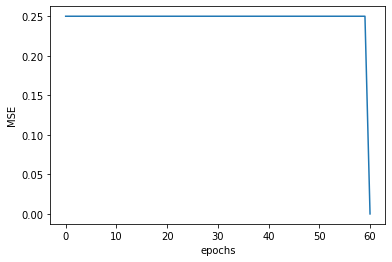

In [29]:
# OR
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([0, 1, 1, 1])

clf = Perceptron(n_epochs=100)
clf.fit(np.array(X), np.array(Y))

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(clf.costList_)
plt.xlabel('epochs')
plt.ylabel('MSE');
plt.show()

In [30]:
# AND
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
Y = [0, 0, 0, 1]

Epoch: 0001	Loss: 0.75000		Regression: 0.75(X1) + 0.68(X2) + 0.47
Epoch: 0002	Loss: 0.75000		Regression: 0.74(X1) + 0.67(X2) + 0.44
Epoch: 0003	Loss: 0.75000		Regression: 0.73(X1) + 0.66(X2) + 0.41
Epoch: 0004	Loss: 0.75000		Regression: 0.72(X1) + 0.65(X2) + 0.38
Epoch: 0005	Loss: 0.75000		Regression: 0.71(X1) + 0.64(X2) + 0.35
Epoch: 0006	Loss: 0.75000		Regression: 0.70(X1) + 0.63(X2) + 0.32
Epoch: 0007	Loss: 0.75000		Regression: 0.69(X1) + 0.62(X2) + 0.29
Epoch: 0008	Loss: 0.75000		Regression: 0.68(X1) + 0.61(X2) + 0.26
Epoch: 0009	Loss: 0.75000		Regression: 0.67(X1) + 0.60(X2) + 0.23
Epoch: 0010	Loss: 0.75000		Regression: 0.66(X1) + 0.59(X2) + 0.20
Epoch: 0011	Loss: 0.75000		Regression: 0.65(X1) + 0.58(X2) + 0.17
Epoch: 0012	Loss: 0.75000		Regression: 0.64(X1) + 0.57(X2) + 0.14
Epoch: 0013	Loss: 0.75000		Regression: 0.63(X1) + 0.56(X2) + 0.11
Epoch: 0014	Loss: 0.75000		Regression: 0.62(X1) + 0.55(X2) + 0.08
Epoch: 0015	Loss: 0.75000		Regression: 0.61(X1) + 0.54(X2) + 0.05
Epoch: 001

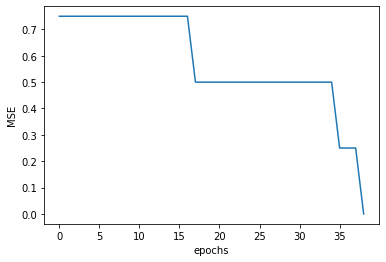

In [31]:
clf = Perceptron(n_epochs=100)
clf.fit(np.array(X), np.array(Y))

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(clf.costList_)
plt.xlabel('epochs')
plt.ylabel('MSE');
plt.show()

In [32]:
# https://medium.com/@thomascountz/19-line-line-by-line-python-perceptron-b6f113b161f3

import numpy as np
import matplotlib.pyplot as plt

class Perceptron(object):

    def __init__(self, no_of_inputs, threshold=100, learning_rate=0.01):
        self.threshold = threshold
        self.learning_rate = learning_rate
        self.weights = np.zeros(no_of_inputs + 1)
           
    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        if summation > 0:
          activation = 1
        else:
          activation = 0            
        return activation

    def train(self, training_inputs, labels):
        for _ in range(self.threshold):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)
        print('Weights: ', self.weights)
        
    def plot_data(self, inputs, labels):
        inputs = np.array(inputs)
        labels = np.array(labels)
        # fig config
        plt.figure(figsize=(10,6))
        plt.grid(True)

        #plot input samples(2D data points) and i have two classes. 
        #one is +1 and second one is -1, so it red color for +1 and blue color for -1
        for input,target in zip(inputs,labels):
            plt.plot(input[0],input[1],'bo' if (target == 1.0) else 'ro')

        # Here i am calculating slope and intercept with given three weights
        slope = -(self.weights[0]/self.weights[2])/(self.weights[0]/self.weights[1])
        intercept = -self.weights[0]/self.weights[1]
        print(np.amin(inputs[:,:1])-1,np.amax(inputs[:,:1]) + 1)
        print('Slope: ', slope, 'Y-Intercept: ', intercept)
        for i in np.linspace(np.amin(inputs[:,:1])-1,np.amax(inputs[:,:1]) + 1):

            #y =mx+c, m is slope and c is intercept
            y = (slope*i) + intercept
            plt.plot(i, y,'ko')

training_inputs = []
'''
training_inputs.append(np.array([1, 1]))
training_inputs.append(np.array([1, 0]))
training_inputs.append(np.array([0, 1]))
training_inputs.append(np.array([0, 0]))

labels = np.array([1, 0, 0, 0])
'''

training_inputs.append(np.array([0, 0]))
training_inputs.append(np.array([0, 1]))
training_inputs.append(np.array([1, 0]))
training_inputs.append(np.array([1, 1]))

labels = np.array([0, 1, 1, 1])


perceptron = Perceptron(2)
perceptron.train(training_inputs, labels)

inputs = np.array([1, 1])
perceptron.predict(inputs) 
#=> 1

inputs = np.array([0, 1])
perceptron.predict(inputs) 

Weights:  [0.   0.01 0.01]


1

-1 2
Slope:  nan Y-Intercept:  -0.0


D:\ProgramData\Anaconda3\envs\appliedaicourse\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in double_scalars


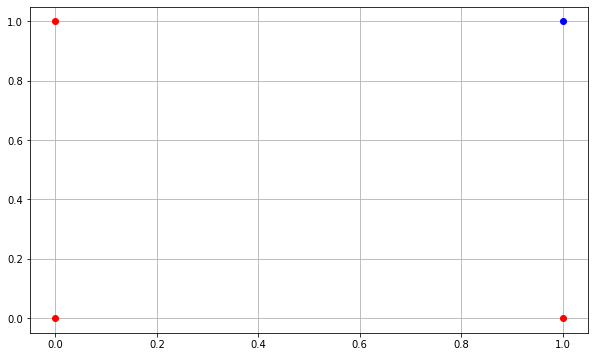

In [33]:
perceptron.plot_data([[0,0],[0,1],[1,0],[1,1]],[0, 0, 0, 1])